In [1]:
shrunk_dataset = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

### TASKS

In [3]:
TASKS = [
'alcoholic', 'aldehydic', 'alliaceous', 'almond', 'amber', 'animal',
'anisic', 'apple', 'apricot', 'aromatic', 'balsamic', 'banana', 'beefy',
'bergamot', 'berry', 'bitter', 'black currant', 'brandy', 'burnt',
'buttery', 'cabbage', 'camphoreous', 'caramellic', 'cedar', 'celery',
'chamomile', 'cheesy', 'cherry', 'chocolate', 'cinnamon', 'citrus', 'clean',
'clove', 'cocoa', 'coconut', 'coffee', 'cognac', 'cooked', 'cooling',
'cortex', 'coumarinic', 'creamy', 'cucumber', 'dairy', 'dry', 'earthy',
'ethereal', 'fatty', 'fermented', 'fishy', 'floral', 'fresh', 'fruit skin',
'fruity', 'garlic', 'gassy', 'geranium', 'grape', 'grapefruit', 'grassy',
'green', 'hawthorn', 'hay', 'hazelnut', 'herbal', 'honey', 'hyacinth',
'jasmin', 'juicy', 'ketonic', 'lactonic', 'lavender', 'leafy', 'leathery',
'lemon', 'lily', 'malty', 'meaty', 'medicinal', 'melon', 'metallic',
'milky', 'mint', 'muguet', 'mushroom', 'musk', 'musty', 'natural', 'nutty',
'odorless', 'oily', 'onion', 'orange', 'orangeflower', 'orris', 'ozone',
'peach', 'pear', 'phenolic', 'pine', 'pineapple', 'plum', 'popcorn',
'potato', 'powdery', 'pungent', 'radish', 'raspberry', 'ripe', 'roasted',
'rose', 'rummy', 'sandalwood', 'savory', 'sharp', 'smoky', 'soapy',
'solvent', 'sour', 'spicy', 'strawberry', 'sulfurous', 'sweaty', 'sweet',
'tea', 'terpenic', 'tobacco', 'tomato', 'tropical', 'vanilla', 'vegetable',
'vetiver', 'violet', 'warm', 'waxy', 'weedy', 'winey', 'woody'
]

TASKS_shrunk = ['alcoholic',
 'burnt',
 'citrus',
 'earthy',
 'green',
 'mint',
 'odorless',
 'phenolic',
 'spicy',
 'sulfurous',
 'sweet',
 'woody']


if shrunk_dataset:
    TASKS = TASKS_shrunk

print("No of tasks: ", len(TASKS))
n_tasks = len(TASKS)

No of tasks:  138


### Mount storage

In [4]:
import warnings
import json

# Ignore all warnings
warnings.filterwarnings("ignore")

odours

In [5]:
perfurmershub2labels_updated = {'Wood': {'main': 'woody', 'accessory':['cedar', 'sandalwood']},
 'Green': {'main': 'green', 'accessory': ['grassy', 'leafy']},
 'Linalool': {'main': 'floral', 'accessory': ['lavender', 'citrus']},#['floral', 'lavender'],
 'Fruity': {'main': 'fruity', 'accessory': ['apple', 'apricot', 'banana', 'berry', 'black currant', 'cherry', 'grape', 'grapefruit', 'melon', 'orange', 'peach', 'pear', 'pineapple', 'plum', 'raspberry', 'strawberry']},#['fruity', 'apple', 'apricot', 'banana', 'berry', 'black currant', 'cherry', 'grape', 'grapefruit', 'melon', 'orange', 'peach', 'pear', 'pineapple', 'plum', 'raspberry', 'strawberry'],
 'Zolvent': {'main': 'solvent', 'accessory': []},
 'Herb': {'main': 'herbal', 'accessory': ['anisic', 'clove', 'mint']},
 'Spice': {'main': 'spicy', 'accessory': ['spicy', 'cinnamon', 'clove']},
 'Citrus': {'main': 'citrus','accessory': ['lemon', 'bergamot', 'grapefruit', 'orange']},
 'Balsamic': {'main': 'balsamic', 'accessory': []},
 'Narcotic': {'main': 'ethereal' , 'accessory': []},
 'Vanilla': {'main': 'vanilla' , 'accessory': []},
 'Rose': {'main': 'rose' , 'accessory': []},
 'Orchid': {'main': 'floral' , 'accessory': []},#['floral'],
 'Animalic': {'main': 'meaty' , 'accessory': ['animal', 'musk','beefy']}, #'animal', 'beefy', 'meaty', 'musk'],
 'Phenolic': {'main': 'phenolic' , 'accessory': []},#['phenolic'],
 'Iris': {'main': 'orris' , 'accessory': []},#['orris'],
 'Musk': {'main': 'musk' , 'accessory': []},#['musk'],
 'Dairy': {'main': 'dairy'  , 'accessory': ['buttery', 'cheesy', 'creamy', 'milky']},#['dairy', 'buttery', 'cheesy', 'creamy', 'milky'],
 'Muguet': {'main': 'muguet', 'accessory': []},#['muguet'],
 'iceBerg': {'main': 'fresh', 'accessory': ['cooling']},#['cooling', 'fresh'],
 'Edible': {'main': 'vanilla', 'accessory': ['chocolate', 'caramellic', 'honey', 'almond', 'cinnamon', 'cocoa', 'coffee', 'fruity', 'sweet', 'buttery', 'creamy', 'milky']},#['almond', 'chocolate', 'cocoa', 'coconut', 'coffee', 'hazelnut', 'honey', 'malty', 'nutty', 'popcorn', 'roasted', 'tea'],
 'Aliphatic': {'main': 'fatty', 'accessory': ['aldehydic', 'oily']},#['aldehydic', 'fatty', 'oily'],
 'Jasmine': {'main': 'jasmin', 'accessory': []}, #['jasmin'],
 'Konifer': {'main': 'pine', 'accessory': ['woody']}}#['pine', 'woody']}

Set model up


In [6]:
import deepchem as dc
from openpom.feat.graph_featurizer import GraphFeaturizer, GraphConvConstants
from openpom.utils.data_utils import get_class_imbalance_ratio, IterativeStratifiedSplitter
from openpom.models.mpnn_pom5 import MPNNPOMModel, MPNNPOM
from datetime import datetime
from tqdm import tqdm
import torch
import numpy as np
from sklearn.metrics import roc_auc_score
from rdkit import Chem
import rdkit
from PIL import Image
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/Users/maadi5/miniconda3/envs/openpom/lib/python3.8/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [7]:
### CUDA

# !pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121
# !pip install -r requirements.txt
# !pip install hdbscan
# !echo "y" | pip uninstall dgl
# !pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html
# !pip install dgllife
# !pip install torch-geometric
# !echo "y" | pip install scipy
# !pip install scipy
# # !pip install scipy==1.10.1
# !python -m pip install pytorch-lightning
# !pip install pyyaml
# !pip install pydantic
# !pip install captum
# !pip install cairosvg
# !pip install nbformat
# !pip install --no-deps chemplot
# !pip install seaborn
# !pip install umap
# !pip install bokeh==2.4.0
# !pip install langchain
# !pip install langchain_openai
# !pip install pysptools

In [8]:
### CPU/ MacOS

# !pip install torch==2.3.0 torchvision torchaudio
# !pip install -r requirements.txt
# !pip install hdbscan
# !echo "y" | pip uninstall dgl
# !pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/repo.html
# !pip install dgllife
# !pip install torch-geometric
# !echo "y" | pip install scipy
# !pip install scipy
# # !pip install scipy==1.10.1
# !python -m pip install pytorch-lightning
# !pip install pyyaml
# !pip install pydantic
# !pip install captum
# !pip install cairosvg
# !pip install nbformat
# !pip install --no-deps chemplot
# !pip install seaborn
# !pip install umap
# !pip install bokeh
# !pip install langchain
# !pip install langchain_openai
# !pip install pysptools
# !pip install beautifulsoup4


save train and test splits

In [9]:
# uncomment and run if no splits saved yet

# download curated dataset
# !wget https://raw.githubusercontent.com/ARY2260/openpom/main/openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv

# The curated dataset can also found at `openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv` in the repo.

import pandas as pd

if shrunk_dataset:
    input_file = r'shrunkdataset_v2.csv' # or new downloaded file path
else:
    input_file = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' # or new downloaded file path
# input_file = r'shrunkdataset_v1.csv'

shrunkdataset_v1 = pd.read_csv(r'shrunkdataset_v2.csv', index_col = False)

datasetdf = pd.read_csv(input_file, index_col = False)


# get dataset

featurizer = GraphFeaturizer()
smiles_field = 'nonStereoSMILES'
loader = dc.data.CSVLoader(tasks=TASKS,
                   feature_field=smiles_field,
                   featurizer=featurizer)
dataset = loader.create_dataset(inputs=[input_file])
n_tasks = len(dataset.tasks)

# get train valid test splits
splitter = IterativeStratifiedSplitter(order=2)
# train_dataset, test_dataset = splitter.train_test_split(dataset, frac_train=0.8, train_dir='./splits/train_data', test_dir='./splits/test_data')

# print("train_dataset: ", len(train_dataset))
# print("test_dataset: ", len(test_dataset))

In [10]:
%ls

LICENSE
README.md
__pycache__/
atomic_number_index.csv
combined_data_w_pca.csv
combined_data_w_preds.csv
combined_data_w_preds_w_pca.csv
config.py
embeddings_all_6.csv
embeddings_all_shrunk.csv
ensemble_models5/
ensemble_models_fixeddataset/
ensemble_models_shrunkdataset2_updated2_10_100/
examples/
gpt_dataset_assessment.json
intensity_epicenters_weighted.csv
intensity_epicenters_weighted_odours.csv
intensity_topk_3d_all.csv
labels_all_6.csv
labels_all_shrunk.csv
odors_from_hapticsol.json
odour_breakdown_gpt.csv
odour_breakdown_gpt_all.csv
odour_intensity_topk_3d_all.csv
openpom/
openpom_playground.ipynb
predictions_all_6.csv
predictions_all_shrunk.csv
requirements.txt
search_agents.py
setup.py
shrunk_datasetv2.csv
shrunkdataset_v1.csv
shrunkdataset_v2.csv
splits/
stratified_test_df.csv
stratified_train_df.csv
vector_distances_bw_labels_3d.csv
vector_distances_bw_labels_odours.csv
weighted_epicenters_f1score.csv


load splits

In [11]:
from skmultilearn.model_selection import IterativeStratification
from typing import List, Optional, Tuple, Iterator

def iterative_splitter_by_indices(
    x_dataset: pd.DataFrame,
    y_dataset: pd.DataFrame,
    frac_train: float = 0.8,
    frac_valid: float = 0.1,
    frac_test: float = 0.1,
    order = 2, #order of iterative stratifications
    seed: Optional[int] = None,
    log_every_n: Optional[int] = None
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    X1: pd.DataFrame
    y1: pd.DataFrame
    X1, y1 = x_dataset, y_dataset
    stratifier1: IterativeStratification = IterativeStratification(
        n_splits=2,
        order=order,
        sample_distribution_per_fold=[frac_test + frac_valid, frac_train],
        # shuffle=True,
        random_state=seed,
    )

    train_indices: np.ndarray
    other_indices: np.ndarray
    train_indices, other_indices = next(stratifier1.split(X1, y1))

    return train_indices, other_indices


# train_indices, test_indices = iterative_splitter_by_indices(x_dataset=datasetdf[datasetdf.columns[0]], y_dataset=datasetdf[datasetdf.columns[2:]])

In [12]:
# stratified_train_df = datasetdf.iloc[train_indices]
# stratified_test_df = datasetdf.iloc[test_indices]

if shrunk_dataset == False:
    stratified_train_df_path = r'stratified_train_df.csv'
    stratified_test_df_path = r'stratified_test_df.csv'

# stratified_train_df.to_csv(stratified_train_df_path, index=False)
# stratified_test_df.to_csv(stratified_test_df_path, index= False)

stratified_train_df = pd.read_csv(stratified_train_df_path, index_col = False)
stratified_test_df = pd.read_csv(stratified_test_df_path, index_col = False)

gnn_train_dataset = loader.create_dataset(inputs=[stratified_train_df_path])
gnn_test_dataset = loader.create_dataset(inputs=[stratified_test_df_path])

In [13]:
train_dataset = gnn_train_dataset#dc.data.DiskDataset('./splits/train_data')
test_dataset = gnn_test_dataset#dc.data.DiskDataset('./splits/test_data')
print("train_dataset: ", len(train_dataset))
print("test_dataset: ", len(test_dataset))

train_dataset:  3970
test_dataset:  1013


set parameters

In [14]:
train_ratios = get_class_imbalance_ratio(train_dataset)
assert len(train_ratios) == n_tasks

# learning_rate = 0.001
learning_rate = dc.models.optimizers.ExponentialDecay(initial_rate=0.001, decay_rate=0.5, decay_steps=32*20, staircase=True)

accuracy_metric = dc.metrics.Metric(dc.metrics.accuracy_score)
precision_metric = dc.metrics.Metric(dc.metrics.precision_score)
recall_metric = dc.metrics.Metric(dc.metrics.recall_score)

roc_auc_metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
# classification_report = dc.metrics.Metric(dc.metrics)

In [17]:
# no of models in the ensemble
n_models = 10

# no of epochs each model is trained for
nb_epoch = 100

Get test score from the ensemble

In [19]:
# list_preds = []
# for i in range(n_models):
from openpom.models.mpnn_pom5 import MPNNPOMModel, MPNNPOM
import torch.nn.functional as F

model = MPNNPOMModel(n_tasks = n_tasks,
                        batch_size = 128,
                        learning_rate=learning_rate,
                        class_imbalance_ratio = train_ratios,
                        loss_aggr_type = 'sum',
                        node_out_feats = 100,
                        edge_hidden_feats = 75,
                        edge_out_feats = 100,
                        num_step_message_passing = 5,
                        mpnn_residual = True,
                        message_aggregator_type = 'sum',
                        mode = 'classification',
                        number_atom_features = GraphConvConstants.ATOM_FDIM,
                        number_bond_features = GraphConvConstants.BOND_FDIM,
                        n_classes = 1,
                        readout_type = 'set2set',
                        num_step_set2set = 3,
                        num_layer_set2set = 2,
                        ffn_hidden_list= [392, 392],
                        ffn_embeddings = 256,
                        ffn_activation = 'relu',
                        ffn_dropout_p = 0.12,
                        ffn_dropout_at_input_no_act = False,
                        weight_decay = 1e-5,
                        self_loop = False,
                        optimizer_name = 'adam',
                        log_frequency = 32,
                        model_dir = f'./ensemble_models5/experiments_{n_models}',
                        device_name='cpu')


if shrunk_dataset:
    model.restore(f"./ensemble_models_shrunkdataset2_updated2_10_100/experiments_{n_models}/checkpoint2.pt")
else:
    model.restore(f"./ensemble_models_fixeddataset/experiments_{n_models}/checkpoint2.pt")


RuntimeError: Error(s) in loading state_dict for MPNNPOM:
	size mismatch for ffn.linears.3.weight: copying a param with shape torch.Size([12, 256]) from checkpoint, the shape in current model is torch.Size([138, 256]).
	size mismatch for ffn.linears.3.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([138]).
	size mismatch for linears.3.weight: copying a param with shape torch.Size([12, 256]) from checkpoint, the shape in current model is torch.Size([138, 256]).
	size mismatch for linears.3.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([138]).
	size mismatch for get_embeddings.ffn.linears.3.weight: copying a param with shape torch.Size([12, 256]) from checkpoint, the shape in current model is torch.Size([138, 256]).
	size mismatch for get_embeddings.ffn.linears.3.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([138]).

In [ ]:
# # list_preds = []
# # for i in range(n_models):
# from openpom.models.mpnn_pom5 import MPNNPOMModel, MPNNPOM

# import torch.nn.functional as F
# model = MPNNPOMModel(n_tasks = n_tasks,
#                         batch_size=128,
#                         loss_aggr_type = 'sum',
#                         node_out_feats = 100,
#                         edge_hidden_feats = 75,
#                         edge_out_feats = 100,
#                         num_step_message_passing = 5,
#                         mpnn_residual = True,
#                         message_aggregator_type = 'sum',
#                         mode = 'classification',
#                         number_atom_features = GraphConvConstants.ATOM_FDIM,
#                         number_bond_features = GraphConvConstants.BOND_FDIM,
#                         n_classes = 1,
#                         readout_type = 'set2set',
#                         num_step_set2set = 3,
#                         num_layer_set2set = 2,
#                         ffn_hidden_list= [392, 392],
#                         ffn_embeddings = 256,
#                         ffn_activation = 'relu',
#                         ffn_dropout_p = 0.12,
#                         ffn_dropout_at_input_no_act = False,
#                         weight_decay = 1e-5,
#                         self_loop = False,
#                         optimizer_name = 'adam',
#                         log_frequency = 32,
#                         model_dir = f'./ensemble_models5/experiments_{n_models}',
#                         device_name='cpu')
# model.restore(f"./ensemble_models5/experiments_{n_models}/checkpoint2.pt")

 Accessory functions

In [ ]:
import dgl

def convert_to_dgl(graph_data):
    # Extract node features, edge indices, and edge features
    node_features = torch.tensor(graph_data.node_features, dtype=torch.float32)
    edge_indices = torch.tensor(graph_data.edge_index, dtype=torch.long)
    edge_features = torch.tensor(graph_data.edge_features, dtype=torch.float32)

    # Create a DGL graph
    dgl_graph = dgl.graph((edge_indices[0], edge_indices[1]), num_nodes=node_features.shape[0])

    # Assign node features to the DGL graph
    dgl_graph.ndata['x'] = node_features
    # Assign edge features to the DGL graph
    dgl_graph.edata['edge_attr'] = edge_features
    return dgl_graph


In [ ]:
def other_smells(odour_cluster, targets):
  all_covered_smells = []
  for k, v in odour_cluster.items():
    all_covered_smells.extend(v)

  remaining_smells = list(set(targets).difference(set(all_covered_smells)))
  reordered_cluster = {}
  reordered_cluster['remaining'] = remaining_smells
  for k, v in odour_cluster.items():
    reordered_cluster[k] = v

  return reordered_cluster

In [ ]:
import colorsys

def generate_distinct_colors(n):
    colors = []
    for i in range(n):
        hue = i / n
        rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        scaled_rgb = tuple(int(x * 255) for x in rgb)
        colors.append(scaled_rgb)
    return colors

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def calculate_cluster_distance(cluster1, cluster2):
    min_distance = float('inf')

    for point1 in cluster1:
        for point2 in cluster2:
            distance = np.linalg.norm(np.array(point1) - np.array(point2))
            if distance < min_distance:
                min_distance = distance

    return min_distance

def rank_keys_by_cluster_distance(data):
    keys = list(data.keys())
    points_lists = list(data.values())

    # Flatten the list of points for each key
    flattened_points = [point for sublist in points_lists for point in sublist]

    # Convert the flattened points to a numpy array
    X = np.array(flattened_points)

    # Use KMeans clustering to cluster the points
    kmeans = KMeans(n_clusters=len(keys), random_state=42)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Create clusters for each key
    key_clusters = {key: [] for key in keys}
    for i, label in enumerate(labels):
        key_clusters[keys[label]].append(flattened_points[i])

    # Calculate the average distance between clusters for each key
    key_distances = {}
    for key1 in keys:
        distance_sum = 0
        for key2 in keys:
            if key1 != key2:
                distance_sum += calculate_cluster_distance(
                    key_clusters[key1], key_clusters[key2]
                )
        key_distances[key1] = distance_sum / (len(keys) - 1)

    # Rank keys by average cluster distance
    ranked_keys = sorted(keys, key=lambda key: key_distances[key])

    return ranked_keys

# Example usage
data = {
    'key1': [[1, 2], [2, 3], [3, 4]],
    'key2': [[5, 6], [6, 7], [7, 8]],
    'key3': [[9, 10], [10, 11], [11, 12]]
}

ranked_keys = rank_keys_by_cluster_distance(data)
print("Ranked Keys:", ranked_keys)


Ranked Keys: ['key1', 'key2', 'key3']


In [ ]:
import math

def cluster_centroids(centroid_dict, thresh=2):

  thresh_dist = math.sqrt(thresh**2 + thresh**2)
  clustered_centroids = {}
  for k, v in centroid_dict.items():
    if clustered_centroids == {}:
      clustered_centroids[(v[0], v[1])] = [k]
    else:
      count = 0
      distance_cluster = []
      for k1, v1 in clustered_centroids.items():
        distance_cluster.append((math.sqrt((v[0]- k1[0])**2 + (v[1]- k1[1])**2), k1, count))
        count += 1
      min_dist = sorted(distance_cluster, key = lambda x: x[0])[0]
      if min_dist[0]<= thresh_dist:
        existing_key = list(clustered_centroids.keys())[min_dist[-1]]
        new_coords = min_dist[1]
        clustered_centroids[existing_key].append(k)
        # new_key = ((existing_key[0] + new_coords[0])/2, (existing_key[1] + new_coords[1])/2)
        # clustered_centroids[new_key] = clustered_centroids[existing_key]
        # del clustered_centroids[existing_key]
      else:
        clustered_centroids[(v[0], v[1])] = [k]
  return clustered_centroids


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def calculate_cluster_distance(cluster1, cluster2):
    min_distance = float('inf')
    for point1 in cluster1:
        for point2 in cluster2:
            distance = np.linalg.norm(np.array(point1) - np.array(point2))
            if distance < min_distance:
                min_distance = distance
    return min_distance

def calculate_cluster_centroid(cluster):
    if not cluster:
        return None
    cluster_array = np.array(cluster)
    centroid = np.mean(cluster_array, axis=0)
    return centroid.tolist()

def centroid(points):
    # print('points: ', points)
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

def rank_keys_by_cluster_distance(data):
    keys = list(data.keys())
    points_lists = list(data.values())

    centroid_dict = {}
    for k,v in data.items():
      # print(v)
      centroid_dict[k] = centroid(v)


    # Flatten the list of points for each key
    flattened_points = [point for sublist in points_lists for point in sublist]

    # Convert the flattened points to a numpy array
    X = np.array(flattened_points)

    # Use KMeans clustering to cluster the points
    kmeans = KMeans(n_clusters=len(keys), random_state=42)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Create clusters for each key
    key_clusters = {key: [] for key in keys}
    for i, label in enumerate(labels):
        key_clusters[keys[label]].append(flattened_points[i])

    if len(keys)>1:
    # Calculate the average distance between clusters for each key
      key_distances = {}
      key_centroids = {}
      for key1 in keys:
          distance_sum = 0
          for key2 in keys:
              if key1 != key2:
                  distance_sum += calculate_cluster_distance(
                      key_clusters[key1], key_clusters[key2]
                  )
          key_distances[key1] = distance_sum / (len(keys) - 1)

          # Calculate the centroid for each key's cluster
          key_centroids[key1] = calculate_cluster_centroid(key_clusters[key1])

      # Rank keys by average cluster distance
      ranked_keys = sorted(keys, key=lambda key: key_distances[key])

    else:
      ranked_keys = keys
      key_centroids = {}
      key_centroids[keys[0]] = calculate_cluster_centroid(key_clusters[keys[0]])

    sorted_centroids = {}
    for l in ranked_keys:
      sorted_centroids[l] = centroid_dict[l]


    return ranked_keys, centroid_dict

# Example usage
data = {
    'key1': [[1, 2], [2, 3], [3, 4]],
    'key2': [[5, 6], [6, 7], [7, 8]],
    'key3': [[9, 10], [10, 11], [11, 12]]
}

ranked_keys, key_centroids = rank_keys_by_cluster_distance(data)
print("Ranked Keys:", ranked_keys)
print("Centroids:", key_centroids)
# print('Centroids2: ', centroid_dict)


Ranked Keys: ['key1', 'key2', 'key3']
Centroids: {'key1': [2.0, 3.0], 'key2': [6.0, 7.0], 'key3': [10.0, 11.0]}


In [ ]:
from copy import deepcopy

def pick_odour_bracket(label_list, flavour_bracket):
  n = len(flavour_bracket.keys())
  distinct_colors = generate_distinct_colors(n)
  flav_color_map = {}
  distinct_colors = [[128,255,0], [128,50,170], [0,70,128],
                     [0,128,255], [128,0,0], [255,0,128],
                     [0, 70, 30], [0, 2, 0], [0, 0, 255],
                     [128, 100, 70], [128, 0, 255]]
  for idx, f in enumerate(flavour_bracket.keys()):
    flav_color_map[f] = {'color': distinct_colors[idx], 'idx': idx}

  bracket = []
  fragrance_in_category = {}
  for l in label_list:
    for k,v in flavour_bracket.items():
      totlist = deepcopy(v)
      totlist.append(k)
      if l in totlist:
        bracket.append(k)
        if k in fragrance_in_category:
          fragrance_in_category[k].append(','.join(label_list))
        else:
          fragrance_in_category[k] = [','.join(label_list)]


  num_valid_labels = len(bracket)
  all_labels = len(label_list)

  if num_valid_labels>0:
    try:
      ratio = num_valid_labels/all_labels
    except:
      ratio = 1
  else:
    ratio = 1

  bracket = list(set(bracket))
  # print('ratio: ', ratio)
  # if ratio<.1:
  #   colour = ('orange', [255, 165, 0], 'valid_but_other_labels')
  if len(bracket)>1: #ratio<.2:
      if 'remaining' in bracket:
        bracket.pop(bracket.index('remaining'))
      if len(bracket)>1:
        exact_odours = []
        for k, v in fragrance_in_category.items():
          exact_odours.extend(v)
        colour = ('orange', [255, 156, 0], 'overlap', exact_odours)


  if len(bracket) == 1:
    color_dict = flav_color_map[bracket[0]]
    color = color_dict['color']
    cid = color_dict['idx']
    exact_odors = fragrance_in_category[bracket[0]]
    colour = ('color_' + str(cid), color, bracket[0], exact_odors)
  if len(bracket) == 0:
    colour = ('white', [255, 255, 255], 'OOS', 'oos')
  return colour

In [ ]:

def colour_indices_map(all_labels, flavour_bracket):

  colour_index_map = {}

  if type(flavour_bracket) == dict:
    for idx, l_list in enumerate(all_labels):
      colour, c_val, label, exact_odors = pick_odour_bracket(l_list, flavour_bracket)
      # print(colour)
      if colour not in colour_index_map:
        colour_index_map[colour] = {'c_val': c_val, 'indices':[idx], 'label': label,
                                    'exact_odors': [exact_odors]}
      else:
        colour_index_map[colour]['indices'].append(idx)
        colour_index_map[colour]['exact_odors'].append(exact_odors)

  elif type(flavour_bracket) == list:
    for idx, l_list in enumerate(all_labels):
      if idx in flavour_bracket:
        c_val = [128,255,0]
        colour = 'green'
        label = 'indexed_label'
        idxlist = [str(idx)]
        idxlist.extend(l_list)
        exact_odors = idxlist
        # colour, c_val, label, exact_odors = pick_odour_bracket(l_list, flavour_bracket)
        # print(colour)
        if colour not in colour_index_map:
          colour_index_map[colour] = {'c_val': c_val, 'indices':[idx],
                                      'label': label,
                                      'exact_odors': [exact_odors]}
        else:
          colour_index_map[colour]['indices'].append(idx)
          colour_index_map[colour]['exact_odors'].append(exact_odors)


  return colour_index_map



In [ ]:
def rgb_to_rgba_normalized(rgb_color, alpha):
    """
    Convert RGB tuple (0-255 range) to normalized RGBA tuple by adding an alpha value.

    Parameters:
    - rgb_color (tuple): RGB color tuple (e.g., (100, 150, 200) for specific RGB values).
    - alpha (float): Alpha value for transparency (0.0 for fully transparent, 1.0 for fully opaque).

    Returns:
    - tuple: Normalized RGBA color tuple.
    """
    # Normalize RGB values to the 0-1 range
    normalized_rgb_color = tuple(component / 255.0 for component in rgb_color)

    # Add alpha value
    return (*normalized_rgb_color, alpha)

Flavour Buckets

In [ ]:
flavour_buckets = {'floral': ['muguet', 'lavender', 'jasmin'], 'meaty': ['savory', 'beefy', 'roasted'], 'ethereal': ['cognac', 'fermented', 'alcoholic']}

In [ ]:
flavour_buckets2 = {
    'Fruity': ['apple', 'apricot', 'banana', 'berry', 'cherry', 'citrus', 'grape', 'grapefruit', 'lemon', 'orange', 'peach', 'pear', 'pineapple', 'plum', 'raspberry', 'strawberry'],
    'Floral': ['chamomile', 'hawthorn', 'hyacinth', 'jasmin', 'lily', 'muguet', 'rose', 'violet'],
    'Herbal and Spicy': ['aldehydic', 'anisic', 'balsamic', 'cinnamon', 'clove', 'herbal', 'lavender', 'mint', 'spicy', 'tea'],
    'Woody and Earthy': ['cedar', 'earthy', 'mossy', 'mushroom', 'pine', 'sandalwood', 'vetiver'],
    # 'Sweet and Gourmand': ['almond', 'burnt', 'buttery', 'caramellic', 'chocolate', 'cocoa', 'coconut', 'creamy', 'honey', 'malty', 'powdery', 'vanilla'],
    'Animalic and Musky': ['amber', 'animal', 'musk'],
    'Green and Vegetal': ['celery', 'green', 'leafy', 'vegetable', 'weedy'],
    'Smoky and Roasted': ['roasted', 'smoky'],
    'Alcoholic and Boozy': ['alcoholic', 'brandy', 'cognac', 'rummy', 'winey'],
    'Savory and Spicy': [ 'cheesy', 'garlic', 'onion', 'pungent', 'savory', 'sharp'], #'gassy', 'meaty''beefy',
    'Clean and Fresh': ['clean', 'fresh', 'ozone', 'solvents'],
    # 'Miscellaneous': ['camphoreous', 'coumarinic', 'dry', 'ethereal', 'fatty', 'fermented', 'metallic', 'oily', 'phenolic', 'sulfurous', 'odorless']
}


In [ ]:
flavour_buckets3 = {'Fragrant': ['rose', 'chamomile', 'jasmine', 'hyacinth', 'lily', 'violet', 'hawthorn'],
    'Ethereal': ['cognac', 'fermented', 'alcoholic'],
    'Resinous': ['resin', 'turpentine', 'cedar', 'pine', 'sandalwood', 'amber'],
    'Spicy': ['cinnamon', 'nutmeg', 'clove'],
    'Putrid': ['gassy'], #, 'radish'
    'Onion/Garlic': ['garlic', 'onion'],
    'Burnt': ['burnt', 'tar', 'roasted', 'smoky']}


In [ ]:
primary_odours = {'fragrant': ['rose', 'lavender'],
                  'ethereal' : ['ethereal'],
                  'resinous': ['terpenic'],
                  'spicy': ['cinnamon'],
                  'putrid': ['sulfurous', 'fermented'],
                  'burnt': ['burnt', 'smoky', 'phenolic']}

# primary_odours = other_smells(primary_odours, targets=TASKS)


crocker_henderson = {'fragrant': ['rose', 'lavender'],
                  'putrid': ['sulfurous', 'fermented'],
                  'burnt': ['burnt', 'smoky', 'phenolic']
                     #'acid'
                    }

                  # 'ethereal' : ['ethereal'],
                  # 'resinous': ['terpenic'],
                  # 'spicy': ['cinnamon'],

# crocker_henderson = other_smells(crocker_henderson,  targets=TASKS)


zwaardemaker = {'ambrosial': ['rose', 'lavender'],
                'alliaceous': ['alliaceous'],
                'ethereal' : ['ethereal'],
                'hircine': ['sulfurous'],
                'empryeumatic': ['burnt', 'coffee', 'tobacco', 'vanilla', 'cocoa','woody'],
                'foul': ['sulfurous', 'fermented'],
                'aromatic': ['aromatic'],}

all_odours_considered = {#'sweet': ['sweet', 'fruity'],
                        'fragrant': ['rose', 'lavender'],
                        #  'putrid': ['sulfurous', 'fermented'],
                         'ethereal' : ['ethereal'],
                         'resinous': ['terpenic'],
                         'spicy': ['cinnamon'],
                         'burnt': ['burnt', 'smoky', 'phenolic'],
                         'alliaceous': ['alliaceous'],
                         'cocoa': ['coffee', 'tobacco', 'vanilla', 'cocoa','woody'],
                         'aromatic': ['aromatic'],
                         }

all_odours_custom_clustered = {'cinnamon': ['cinnamon'],
                               'fragrant': ['lavender', 'rose'],
                               'ethereal': ['ethereal'],
                               'cocoa': ['cocoa'],
                               'woody': ['woody'],
                               'spicy': ['spicy'],
                               'vanilla': ['vanilla'],
                               'phenolic': ['phenolic'],
                               'smoky': ['smoky'],
                               'burnt': ['burnt'],
                               'sulfurous': ['sulfurous'],
                               'cinnamon': ['cinnamon']}


custom_odours_2 = {
 'woody': ['woody', 'burnt'], #,'smoky'],
 'floral': ['lavender', 'rose'],
 'sharp': ['alcoholic'],
 'sweet': ['sweet']
#  'fruity': ['apple', 'berry', 'grape', 'pineapple'],
}

fruity_smell = {'fruity': ['fruity']}
sweet_smell = {'sweet': ['sweet']}
green_smell = {'green': ['green']}
floral_smell = {'floral': ['floral']}
sulfurous_smell = {'sulfurous': ['sulfurous']}
fresh_smell = {'fresh': ['fresh']}
woody_smell = {'woody': ['woody']}
campherous_smell = {'camphoreous': ['camphoreous']}
roasted_smell = {'roasted': ['roasted']}
burnt_smell = {'burnt': ['burnt']}
ethereal_smell = {'ethereal': ['ethereal']}

# zwaardemaker = other_smells(zwaardemaker,  targets=TASKS)

Get predictions from dataset

In [ ]:
def get_all_outputs_from_model4(dataset):
  model.model.eval()
  all_embeddings_alldata = []
  all_target_alldata = []
  all_labels_alldata = []
  individual_indices= []
  all_predictions = []

  for i in range(len(dataset.X)):
    gt_labels = dataset.y[i]
    tg = []
    for idx, t in enumerate(gt_labels):
        if t >=.5:
            tg.append(TASKS[idx])
    if len(tg) == 1:
      try:
        individual_indices.append(i)
      except:
        pass

  for i in range(len(dataset.X)):
    gt_labels = dataset.y[i]
    tg = []
    for idx, t in enumerate(gt_labels):
        if t >=.5:
            tg.append(TASKS[idx])
    if True:
      deepchem_graph_data = dataset.X[i]
      dgl_data = convert_to_dgl(deepchem_graph_data)
      node_feats: torch.Tensor = torch.tensor(dgl_data.ndata['x'])
      edge_feats: torch.Tensor = torch.tensor(dgl_data.edata['edge_attr'])

      # try:
      model.model.load_graph_obj(dgl_data)
      model_outputs = model.model(node_feats, edge_feats, torch.tensor([0], device = 'cpu'))
      # model_outputs = model.model(dgl_data)
      model_outputs = F.sigmoid(torch.Tensor(model_outputs))
      model_outputs = model_outputs.squeeze(-1)
      model_outputs = model_outputs.detach().numpy().tolist()
      embeddings = model.model.get_embeddings(node_feats, edge_feats)
      embeddings = embeddings.detach().numpy()
      preds = model_outputs
      target_list = preds
      all_y = []
      for target in target_list:
        # print(target)
        tg = []
        for idx, t in enumerate(target):
            if t >=.5:
                tg.append(TASKS[idx])
        all_y.append(tg)
      all_labels_alldata.append(all_y[0])
      all_target_alldata.append(target_list)
      all_embeddings_alldata.append(embeddings)
      all_predictions.append(preds)

      # except:
      #   print('Failed at idx: ', i)
      #   print(gt_labels)
        # print(traceback.format_exc())
  return all_labels_alldata, all_embeddings_alldata, all_predictions, individual_indices

In [ ]:
import pandas as pd

# download curated dataset
# !wget https://raw.githubusercontent.com/ARY2260/openpom/main/openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv

# The curated dataset can also found at `openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv` in the repo.

# input_file = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' #  or new downloaded file path

base_dataset = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' # or new downloaded file path

# custom_input_file = r'openpom/data/intensity_dataset_v1.csv'
# custom_input_file_temp = r'openpom/data/intensity_dataset_v1_temp.csv'
# custom_input_file_woody = r'openpom/data/Woody-2.csv'
combined_dataset_temp = r'openpom/data/intensity_dataset_v3_temp.csv'

# custom_input_file2 = r'openpom/data/intensity_dataset_v1.csv'

base_dataset_csv = pd.read_csv(base_dataset, index_col = False)

# custom_input_csv = pd.read_csv(custom_input_file, index_col = False)

# custom_input_csv_woody = pd.read_csv(custom_input_file_woody, index_col = False)


def canonical_smiles(smiles):
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles = True)

def remove_stereo(smiles):
    smiles = smiles.replace('@','')
    smiles = smiles.replace('/','')
    smiles = smiles.replace('\\','')
    return canonical_smiles(smiles)

#SubDF
# custom_input_csv = custom_input_csv[custom_input_csv['descriptors'].str.contains('Phenolic')]
# custom_input_csv = custom_input_csv[custom_input_csv['descriptors'].str.contains('Wood')&custom_input_csv['descriptors'].str.contains('Fruity')]

# custom_input_csv['nonStereoSMILES'] = custom_input_csv['SMILES'].apply(lambda x: remove_stereo(x))

# custom_input_csv_woody['nonStereoSMILES'] = custom_input_csv_woody['SMILES'].apply(lambda x: remove_stereo(x))

# custom_input_csv.to_csv(custom_input_file_temp, index= False)

# custom_input_csv_woody.to_csv(custom_input_file_woody, index= False)


# compound_details = list(custom_input_csv['descriptors'])

# compound_details_woody = list(custom_input_csv_woody['descriptors'])

# compound_names = [c.split(';')[0] for c in compound_details]

# compound_names_woody = [c.split(';')[0] for c in compound_details_woody]

# print("test_dataset: ", len(dataset))

In [ ]:
# # get individual dataset and combine

# all_labels_alldata, all_embeddings_alldata, individual_indices = get_all_outputs_from_model(dataset)

# featurizer = GraphFeaturizer()
# smiles_field = 'nonStereoSMILES'
# loader = dc.data.CSVLoader(tasks=TASKS,
#                    feature_field=smiles_field,
#                    featurizer=featurizer)

# oj_dataset = loader.create_dataset(inputs=[custom_input_file_temp])

# woody_dataset = loader.create_dataset(inputs=[custom_input_file_woody])

# n_tasks = len(oj_dataset.tasks)

# n_tasks_woody = len(woody_dataset.tasks)

# # get train valid test splits
# splitter = IterativeStratifiedSplitter(order=2)

# # train_dataset, test_dataset = splitter.train_test_split(dataset, frac_train=0.8, train_dir='./splits/train_data', test_dir='./splits/test_data')

# print("OJ dataset: ", len(oj_dataset))

# oj_all_labels_alldata, oj_all_embeddings_alldata, individual_indices = get_all_outputs_from_model(oj_dataset)

# print("woody dataset: ", len(woody_dataset))

# woody_all_labels_alldata, woody_all_embeddings_alldata, woody_individual_indices = get_all_outputs_from_model(woody_dataset)

# ##include smell labels in label
# updated_compound_details_woody = []
# for idx, val in enumerate(compound_details_woody):
#   compound_name_list = val.split(';')
#   pred_labels = woody_all_labels_alldata[idx]
#   combine_label_str = ','.join(pred_labels)
#   compound_name_list_updated = ';'.join([combine_label_str, compound_name_list[1]])
#   updated_compound_details_woody.append(compound_name_list_updated)

# combined_alllabels = deepcopy(oj_all_labels_alldata)
# combined_alllabels.extend(all_labels_alldata)
# combined_allembeddings = deepcopy(oj_all_embeddings_alldata)
# combined_allembeddings.extend(all_embeddings_alldata)

In [ ]:

# # create combined dataset

# custom_input_csv = custom_input_csv.drop(182)

# compound_details = list(custom_input_csv['descriptors'])
# compound_names = [c.split(';')[0] for c in compound_details]

# print(len(custom_input_csv))

# combined_data = pd.concat([custom_input_csv, base_dataset_csv])

# combined_data = combined_data.drop(index=combined_data.index[[3668,3673,3841,3842,3861,3874,3875,3975,4705,4841,4850]])

# combined_data.to_csv(combined_dataset_temp, index=False)

# combined_dataset = loader.create_dataset(inputs=[combined_dataset_temp])

# # combined_alllabels, combined_allembeddings, individual_indices = get_all_outputs_from_model(combined_dataset)


In [ ]:

if shrunk_dataset:
  embeddings = pd.read_csv('embeddings_all_shrunk.csv', index_col= False)
  labels = pd.read_csv('labels_all_shrunk.csv', index_col = False)
  combined_data = pd.read_csv(combined_dataset_temp, index_col = False)
  predictions = pd.read_csv('predictions_all_shrunk.csv', index_col = False)

else:
  embeddings = pd.read_csv('embeddings_all_6.csv', index_col= False)
  labels = pd.read_csv('labels_all_6.csv', index_col = False)
  combined_data = pd.read_csv(combined_dataset_temp, index_col = False)
  predictions = pd.read_csv('predictions_all_6.csv', index_col = False)

embeddings_list = []
for idx, row in embeddings.iterrows():
  embed = []
  for k,v in dict(row).items():
    if k !='id':
      embed.append(v)
  embeddings_list.append(np.array(embed))

combined_allembeddings = np.asarray(embeddings_list)

combined_alllabels = []
for idx, row in labels.iterrows():
  lvals = []
  for k,v in dict(row).items():
    if k!='id' and v == 1:
      lvals.append(k)
  combined_alllabels.append(lvals)

combined_allpredictions = []
labels_order = []
for idx, row in predictions.iterrows():
  lvals = []
  for k,v in dict(row).items():

    if k!='id':
      lvals.append(v)
  combined_allpredictions.append(lvals)

In [ ]:
odour_labels = len(list(combined_data.columns)[2:-1])
dataset_labels = combined_data[list(combined_data.columns)[2:-1]]
lvals = dataset_labels.values

label counts

In [ ]:
label_counts = {}

for ls in combined_alllabels:
  for lb in ls:
    if lb not in label_counts:
      label_counts[lb] = 1
    else:
      label_counts[lb] += 1

In [ ]:
label_counts = dict(sorted(list(label_counts.items()), key=lambda x: x[1], reverse=True))

In [ ]:
if shrunk_dataset:
    combined_data_w_preds = pd.read_csv(r'combined_data_w_preds.csv', index_col = False)

else:
    count = 0
    combined_w_preds = []
    for idx, row in combined_data.iterrows():
        rdict = dict(row)
        max_pred_odour = ''
        max_pred_val = 0
        for idt, t in enumerate(TASKS):
            rdict[f'p_{t}'] = combined_allpredictions[count][idt]
            if float(combined_allpredictions[count][idt])> max_pred_val:
                max_pred_val = combined_allpredictions[count][idt]
                max_pred_odour = t
        rdict['max_odour_name'] = max_pred_odour
        combined_w_preds.append(rdict)
        count += 1

    combined_data_w_preds = pd.DataFrame(combined_w_preds)


    combined_data_w_preds.to_csv(r'combined_data_w_preds.csv', index= False)


### Captum

In [56]:
import torch
import torch.nn.functional as F
from captum.attr import IntegratedGradients
from dgl import DGLGraph

model.model.eval()


# # Example input data (replace with your actual data)
# deepchem_graph_data = combined_dataset.X[260]
# dgl_data = convert_to_dgl(deepchem_graph_data)

dataset_id = 260
label_id = 49


# deepchem_graph_data = combined_dataset.X[dataset_id]
# g = convert_to_dgl(deepchem_graph_data)

def calculate_attributions(g, label_id):

  node_feats_dataset: torch.Tensor = torch.tensor(g.ndata['x'], requires_grad = True)
  edge_feats_dataset: torch.Tensor = torch.tensor(g.edata['edge_attr'], requires_grad = True)

  n_steps_value = 50

  model.model.load_graph_obj(g)
  ig = IntegratedGradients(model.model.forward)

  # Perform the attribution
  attr = ig.attribute(inputs=(node_feats_dataset, edge_feats_dataset, torch.tensor([1], device='cpu')), target=label_id,n_steps=n_steps_value)

  return attr

smiles = list(combined_data['nonStereoSMILES'])[dataset_id]
# smiles = list(combined_data['nonStereoSMILES'])[dataset_id]
mol = Chem.MolFromSmiles(smiles)
deepchem_graph_data, node_feats, edges, edge_feats = featurizer.featurize2(mol)
g = convert_to_dgl(deepchem_graph_data)

attr = calculate_attributions(g = g, label_id = label_id)


IndexError: index 49 is out of bounds for dimension 1 with size 12

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def value_to_rgb(value, min_value= -0.1, max_value= 0.1, colormap='coolwarm'):#'viridis'):
    """
    Convert a value between min_value and max_value to an RGB heatmap value.

    Parameters:
    value (float): The value to be converted to an RGB color.
    min_value (float): The minimum value of the range.
    max_value (float): The maximum value of the range.
    colormap (str): The name of the colormap to use (default is 'viridis').

    Returns:
    tuple: A tuple representing the RGB color.
    """
    # Normalize the value between 0 and 1
    normalized_value = (value - min_value) / (max_value - min_value)
    
    # Get the colormap
    cmap = plt.get_cmap(colormap)
    
    # Get the RGBA color from the colormap
    rgba_color = cmap(normalized_value)
    
    # Convert RGBA to RGB
    rgb_color = rgba_color[:3]
    
    # Scale RGB values to 0-255
    rgb_color_255 = tuple(int(255 * c) for c in rgb_color)
    
    return rgb_color

# Example usage
value = 0.5
min_value = 0
max_value = 1
rgb_color = value_to_rgb(value, min_value, max_value)
print(rgb_color)


(0.8674276350862745, 0.864376599772549, 0.8626024620196079)


In [ ]:
label_name = 'alcoholic'
label_id = TASKS.index(label_name)

count = 0
dataset_candidates = {}
for idx, row in combined_data.iterrows():
  if row[TASKS[label_id]] == 1:
    dataset_candidates[count] = row['nonStereoSMILES']
  count += 1

index_to_look_at = 0

alcoholic: 0.59
almond: 0.54
ethereal: 0.86
fresh: 0.52
fruity: 0.81
gassy: 0.55
nutty: 0.72
pungent: 0.72
sharp: 0.59


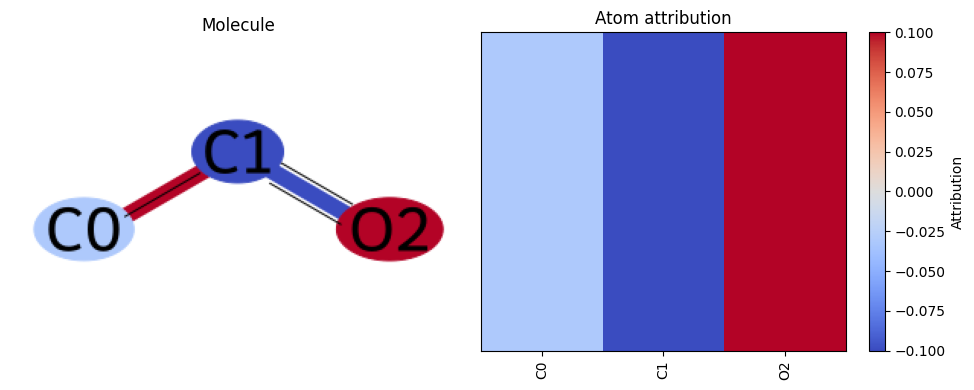

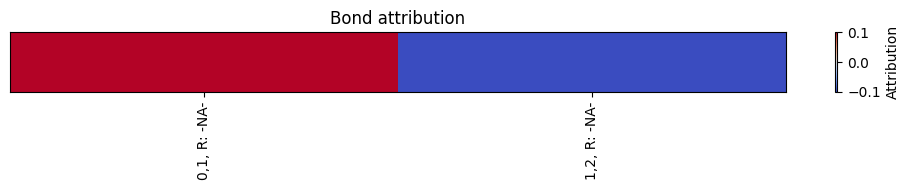

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import dgl
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from matplotlib.colors import Normalize
from PIL import Image
from io import BytesIO
import pandas as pd

import os
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/opt/cairo/lib'
os.environ['PKG_CONFIG_PATH'] = '/opt/homebrew/opt/cairo/lib/pkgconfig'

atomic_numbers = pd.read_csv(r'atomic_number_index.csv', index_col = False)

bond_to_index = {'SINGLE': 1, 'DOUBLE': 2, 'TRIPLE': 3, 'AROMATIC': 4, 'IsRing': 5}

import cairosvg

import numpy as np

def normalize_ig(ig_values):
    abs_values = np.abs(ig_values)
    min_val, max_val = np.min(abs_values), np.max(abs_values)
    normalized = (abs_values - min_val) / (max_val - min_val)
    return np.sign(ig_values) * normalized


target_id = list(dataset_candidates.items())[index_to_look_at][0]
smiles = list(dataset_candidates.items())[index_to_look_at][1]
predictions_dict = dict(predictions.iloc[target_id])

for k,v in predictions_dict.items():
   if k!= 'id':
      if v>.5:
         val = round(v, 2)
         print(f'{k}: {val}')

# smiles = list(combined_data['nonStereoSMILES'])[target_id]
mol = Chem.MolFromSmiles(smiles)
deepchem_graph_data, node_feats, edges, edge_feats = featurizer.featurize2(mol)
g = convert_to_dgl(deepchem_graph_data)

# Example IG values
# ig_values = np.array([-0.5, 0.3, 0.1, -0.2, 0.4])
# normalized_ig_values = normalize_ig(ig_values)
# print(normalized_ig_values)

# Load your graph, node, and edge attributions
# (replace this with your actual data loading and IG calculations)
# g = dgl.graph(([0, 1, 2], [1, 2, 3]))
attr = calculate_attributions(g = g, label_id = label_id)
node_attributions = attr[0].detach()
edge_attributions = attr[1].detach()


# Modify atom names (arbitrary example)
index_to_atomic_number = {}
# atom_colors = {0: (1, 0, 0),  # Red color for the first carbon atom
#                1: (0, 1, 0),  # Green color for the second carbon atom
#                2: (0, 0, 1)}  # Blue color for the oxygen atom

# bond_colors = {(0, 1): (0, 1, 1),  # Cyan color for the bond between the first and second carbon atoms
#                (1, 2): (1, 0, 1)}  # Magenta color for the bond between the second carbon atom and oxygen

for atom in mol.GetAtoms():
  atomic_number = atom.GetAtomicNum()
  get_index = atom.GetIdx()
  symbol = list(atomic_numbers[atomic_numbers['Atomic Number'] == atomic_number]['Symbol of the Element'])[0]
  index_to_atomic_number[get_index] = {'atomic_number': atomic_number, 'symbol': symbol}
  atom.SetProp('atomLabel', f'{symbol}{get_index}')


index_with_bond_type = {}
ring_attr = []
for bond in mol.GetBonds():
  index_with_bond_type[bond.GetIdx()] = bond.GetBondType()
  start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
  ring_attr.append(bond.IsInRing())

     


# Normalize attributions for visualization
norm = Normalize(vmin=-0.1, vmax=0.1)

# # Prepare the molecule for drawing
# mol = Draw.PrepareMolForDrawing(mol)
# Prepare the molecule for drawing
rdDepictor.Compute2DCoords(mol)

required_node_attributions = []
atom_colors = {}
for idx, val in enumerate(node_attributions):
  atns = val[-107:-7]
  required_node_attributions.append(atns[index_to_atomic_number[idx]['atomic_number']-1])
  atom_colors[idx] = value_to_rgb(float(atns[index_to_atomic_number[idx]['atomic_number']-1]))

required_edge_attributions = []
bond_colors = {}
idx = 0
counter = 0
bond_names = []
while idx<len(edge_attributions):
    bond_vec = edge_attributions[idx]
    bondtype = index_with_bond_type[counter]
    index_to_look_at = bond_to_index[str(bondtype)]
    reqd_attr = bond_vec[index_to_look_at]
    bond_colors[counter] = value_to_rgb(float(reqd_attr))
    required_edge_attributions.append(reqd_attr)
    start, end = edges[0][idx], edges[1][idx]
    if ring_attr[counter]:
       ring_attr_value = round(float(bond_vec[-1]),2)
    else:
       ring_attr_value = '-NA-'
    bond_names.append(','.join([str(start), str(end), f' R: {ring_attr_value}']))
    counter += 1
    idx += 2


drawer = rdMolDraw2D.MolDraw2DSVG(300, 200)
drawOptions = drawer.drawOptions()

# Set all colors to black
drawOptions.useBWAtomPalette()
drawOptions.bondLineWidth = 1.0
drawOptions.colorBonds = False
drawOptions.highlightColour = (0, 0, 0)
# fig = Draw.MolToMPL(mol, size = (300,300))
# opts = drawer.drawOptions()
# for idx in atom_colors:
#     opts.atomColourPalette[idx] = atom_colors[idx]
# drawer.DrawMolecule(mol, highlightAtoms=list(atom_colors.keys()), highlightAtomColors=atom_colors, highlightBonds=bond_colors.keys(), highlightBondColors=bond_colors)
drawer.DrawMolecule(mol, highlightAtoms=list(atom_colors.keys()), highlightAtomColors=atom_colors, highlightBonds=list(bond_colors.keys()), highlightBondColors=bond_colors)
# drawer.DrawMolecule(mol)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()

# Convert SVG to PNG
png = cairosvg.svg2png(bytestring=svg.encode('utf-8'))
image = Image.open(BytesIO(png))

# Display molecular structure
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title("Molecule")

# Generate node heatmap
try:
    node_heatmap = np.array(required_node_attributions) #torch.mean(node_attributions, dim=1).numpy()
except TypeError as e:
    print(f"Error: {e}")
    node_heatmap = node_attributions.mean(1) #.numpy()  # Fallback if dim=1 is not recognized

plt.subplot(122)
plt.imshow(node_heatmap.reshape(1, -1), cmap='coolwarm', aspect='auto', norm=norm)
plt.colorbar(label='Attribution')
plt.title("Atom attribution")
plt.yticks([])

x_ones = []
for i in range(len(node_heatmap)):
  symbol = index_to_atomic_number[i]['symbol']
  # atomic_num = index_to_atomic_number[i]['atomic_number']
  x_ones.append(f'{symbol}{i}')
plt.xticks(range(len(node_heatmap)), x_ones, rotation=90)

plt.tight_layout()
plt.show()

# Generate edge heatmap
plt.figure(figsize=(10, 2))
try:
    edge_heatmap = np.array(required_edge_attributions)#torch.mean(edge_attributions, dim=1).numpy()
except TypeError as e:
    print(f"Error: {e}")
    edge_heatmap = edge_attributions.mean(1) #.numpy()  # Fallback if dim=1 is not recognized

plt.imshow(edge_heatmap.reshape(1, -1), cmap='coolwarm', aspect='auto', norm=norm)
plt.colorbar(label='Attribution')
plt.title("Bond attribution")
plt.yticks([])
plt.xticks(range(len(edge_heatmap)), bond_names, rotation=90)

plt.tight_layout()
plt.show()

if index_to_look_at<len(list(dataset_candidates.items())):
  index_to_look_at += 1
else:
   index_to_look_at = 0

In [ ]:
for atom in mol.GetAtoms():
  atomic_number = atom.GetAtomicNum()
  get_index = atom.GetIdx()
#   symbol = list(atomic_numbers[atomic_numbers['Atomic Number'] == atomic_number]['Symbol of the Element'])[0]
  print(atomic_number, get_index)

6 0
6 1
8 2


### PCA all experiments 

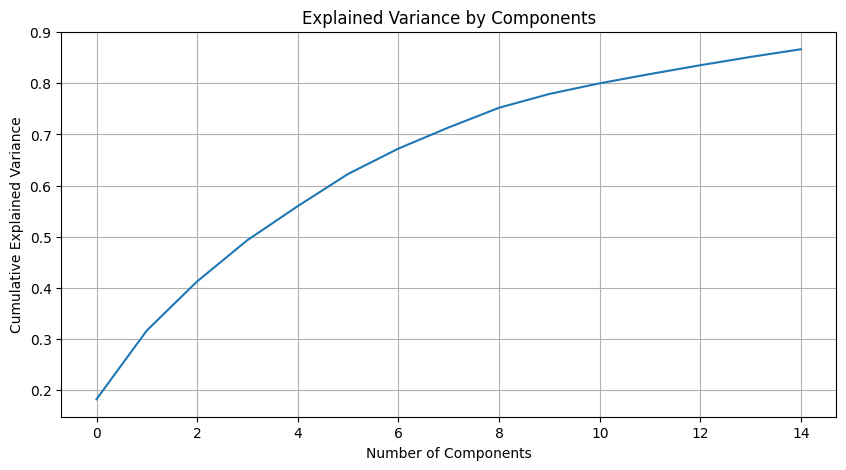

In [271]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume `embeddings` is a numpy array of shape (num_samples, 256)
# Assume `labels` is a binary matrix of shape (num_samples, 104), where each column represents an odour

embeddings_all = np.asarray(combined_allembeddings)
# del combined_allembeddings
# Step 1: Dimensionality Reduction using PCA
pca = PCA(n_components=15)
principal_components = pca.fit_transform(embeddings_all)

# Plotting explained variance to find the optimal number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Choose n dimensions based on explained variance plot
n_components = 15
pca_n = PCA(n_components=n_components) #n_components=n_components)
principal_components_n = pca_n.fit_transform(embeddings_all)
# Step 2: Analyze Component Loadings with respect to labels
# Correlate each principal component with each label
# correlations = np.array([np.corrcoef(principal_components_n[:, i], lvals[:, j])[0, 1]
#                          for i in range(n_components) for j in range(138)]).reshape(n_components, 138)

# Assuming odour names are given as follows:
odour_names = np.array(TASKS)  # Replace with actual names if available

# # Print top contributing odours for each principal component
# print("Top contributing odours for each principal component:")
# for i in range(n_components):
#     print(f"Principal Component {i+1}:")
#     sorted_indices = np.argsort(np.abs(correlations[i]))[::-1]
#     print(odour_names[sorted_indices[:5]])  # Show top 5 odours for simplicity

# Print top contribu
# ting odours for each principal component along with their correlation values
# Print top 5 contributing odours for each UMAP component along with their correlation values
# print("Top 5 contributing odours for each UMAP component:")
# for i in range(n_components):
#     print(f"PCA Component {i+1}:")
#     sorted_indices = np.argsort(correlations[i])[::-1]  # Sort in descending order
#     for j in sorted_indices[:5]:  # Show top 5 odours
#         print(f"{odour_names[j]}: {correlations[i, j]:.3f}")

In [272]:
principal_components_n[0]

array([15.38767738,  2.24326331, -2.39756496,  5.65535081, -7.90681954,
       -2.95644157, -2.6377768 ,  9.46719498,  2.45732807, -0.47056425,
       -7.61419412, -0.56224715,  2.84288312, -1.19290964, -1.35624247])

In [273]:
import torch.nn.functional as F


def get_probabilites(vectorval):
    activation_func = model.model.activation(torch.tensor(vectorval, dtype=torch.float32))
    final_linear = model.model.linears[-1](activation_func)
    logits = model.model.get_logits_from_output(output=final_linear)
    output_values: torch.Tensor = F.sigmoid(logits)
    output_values = output_values.reshape(-1).detach().numpy()
    return output_values  

def get_labels_along_vector(vectorval):
    output_values: torch.Tensor = get_probabilites(vectorval)

    label_vals = []
    for idx, v in enumerate(output_values):
        if v>.5:
            label_vals.append([TASKS[idx], v])

    return label_vals

# for idx, val in enumerate(pca_n.components_):
#     print(f'PCA {idx+1}: {get_labels_along_vector(val)}')

In [274]:
# Generate points along the direction of v
t_values = np.linspace(-2, 2, 100)  # Generate 100 points for t in the range [-2, 2]
print(t_values)
points = np.outer(t_values, pca_n.components_[0])  # Compute the points as t * v

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

In [275]:

def get_most_delta_along_vector(vectorval, range=(-20, 20)):
    # Generate points along the direction of v
    t_values = np.linspace(range[0], range[1], 100)  # Generate 100 points for t in the range [-2, 2]
    points = np.outer(t_values, vectorval)  # Compute the points as t * v

    each_smell = {}
    for idx, val in enumerate(points):
        probas = get_probabilites(val)
        for idx, s in enumerate(TASKS):
            if s not in each_smell:
                each_smell[s] = []
            each_smell[s].append(probas[idx])

    ranges = {}
    for k,v in each_smell.items():
        ranges[k] = np.max(v) - np.min(v)

    ranges = sorted(list(ranges.items()), key=lambda x: x[1], reverse=True)
    return ranges

In [276]:

def accumulate_deltas_across_pca(pca_components):
    pca_deltas = {}
    for pc in pca_components:
        itemlist = get_most_delta_along_vector(pc, range=(-5, 5))
        topval = itemlist[0]
        if topval[0] not in pca_deltas:
            pca_deltas[topval[0]] = []  
        pca_deltas[topval[0]].append(topval[1])
    return pca_deltas

accumulate_deltas_across_pca(pca_n.components_[:30])

{'floral': [0.4537849],
 'fruity': [0.47840092],
 'waxy': [0.39264965],
 'green': [0.36817354],
 'caramellic': [0.37704086],
 'cognac': [0.33791745],
 'sulfurous': [0.44668597],
 'alcoholic': [0.36767983, 0.33165437],
 'woody': [0.34773982],
 'cheesy': [0.36977533, 0.31290925],
 'citrus': [0.37911546],
 'sweet': [0.41831878],
 'phenolic': [0.32856315]}

In [277]:
import numpy as np
from scipy.linalg import null_space

# # Define your n-dimensional vector v
# v = np.array([1, 2, 3, 4])

# Find a vector that is perpendicular to v using null space
# # v.dot(w) = 0, so we find the null space of the transpose of v
# w = null_space(pca_n.components_[0].reshape(1, -1)).flatten()

null_space_vectors = null_space(pca_n.components_[0].reshape(1, -1))

# Select the first vector in the null space and normalize it (if needed)
w = null_space_vectors[:, 0]

outs1 = get_probabilites(w)

# print("Original vector v:", v)
# print("Perpendicular vector w:", w)


In [278]:
outs2 = get_probabilites(pca_n.components_[0])

In [279]:
outs2[outs2>.5]

array([0.50214595], dtype=float32)

In [280]:
outs1[outs1>0.5]

array([0.50013614, 0.5047587 , 0.5086456 , 0.5027714 , 0.5068881 ,
       0.50495946, 0.51083463, 0.501684  , 0.50259125, 0.5121498 ,
       0.50715137, 0.50334954, 0.5043855 , 0.50989145, 0.50124156,
       0.5064573 , 0.5107822 , 0.506541  , 0.51094025], dtype=float32)

In [281]:
get_most_delta_along_vector(pca_n.components_[10], range=(-5, 5))

[('citrus', 0.37911546),
 ('roasted', 0.29436335),
 ('lactonic', 0.28350633),
 ('lemon', 0.27887046),
 ('ketonic', 0.27839252),
 ('beefy', 0.26562285),
 ('hazelnut', 0.26067257),
 ('bergamot', 0.25850406),
 ('grape', 0.2570755),
 ('coffee', 0.25461227),
 ('musk', 0.25334328),
 ('animal', 0.25324267),
 ('gassy', 0.25298983),
 ('odorless', 0.2513945),
 ('meaty', 0.24981351),
 ('grapefruit', 0.24833587),
 ('orange', 0.24805701),
 ('amber', 0.24731979),
 ('cabbage', 0.24659266),
 ('garlic', 0.24626516),
 ('brandy', 0.24422805),
 ('jasmin', 0.24230655),
 ('smoky', 0.23886395),
 ('cucumber', 0.23696494),
 ('cheesy', 0.23522416),
 ('orangeflower', 0.23521183),
 ('popcorn', 0.23437247),
 ('coumarinic', 0.23395456),
 ('black currant', 0.23348573),
 ('cortex', 0.23280412),
 ('pine', 0.23178643),
 ('tobacco', 0.23004755),
 ('lavender', 0.22698766),
 ('cherry', 0.22677243),
 ('sandalwood', 0.2267696),
 ('geranium', 0.22537321),
 ('phenolic', 0.22527882),
 ('banana', 0.2235151),
 ('cocoa', 0.222793

In [282]:
accumulate_deltas_across_pca(pca_n.components_[:12])

{'floral': [0.4537849],
 'fruity': [0.47840092],
 'waxy': [0.39264965],
 'green': [0.36817354],
 'caramellic': [0.37704086],
 'cognac': [0.33791745],
 'sulfurous': [0.44668597],
 'alcoholic': [0.36767983],
 'woody': [0.34773982],
 'cheesy': [0.36977533],
 'citrus': [0.37911546],
 'sweet': [0.41831878]}

In [283]:
activation_func = model.model.activation(torch.tensor(points[0], dtype=torch.float32))
final_linear = model.model.linears[-1](activation_func)
logits = model.model.get_logits_from_output(output=final_linear)
output_values: torch.Tensor = F.sigmoid(logits)
output_values = output_values.reshape(-1).detach().numpy()
output_values

array([0.33822942, 0.43633747, 0.31632894, 0.38796425, 0.43202204,
       0.39815432, 0.4214733 , 0.47550848, 0.47313094, 0.42402148,
       0.45349035, 0.45072746, 0.3650291 , 0.46500024, 0.46585578,
       0.40567753, 0.41430226, 0.4056849 , 0.33196393, 0.39093593,
       0.35311785, 0.40420178, 0.39642432, 0.38108906, 0.4241784 ,
       0.39864963, 0.38912886, 0.4126781 , 0.4263825 , 0.41513237,
       0.48744473, 0.44160208, 0.39787304, 0.38327283, 0.43475333,
       0.33546633, 0.4136831 , 0.38746822, 0.39370698, 0.43804413,
       0.38917258, 0.43044648, 0.41783243, 0.39923114, 0.46189836,
       0.44600666, 0.39908686, 0.47465828, 0.39382055, 0.38226962,
       0.56154853, 0.49319512, 0.43605798, 0.58442026, 0.3231885 ,
       0.32161567, 0.47124106, 0.43528107, 0.43660092, 0.43229845,
       0.5628552 , 0.39817277, 0.44207987, 0.36747518, 0.4883369 ,
       0.4727843 , 0.4422732 , 0.44011047, 0.4263967 , 0.3851618 ,
       0.4346092 , 0.45667145, 0.4593478 , 0.41620374, 0.44826

### Generate pca

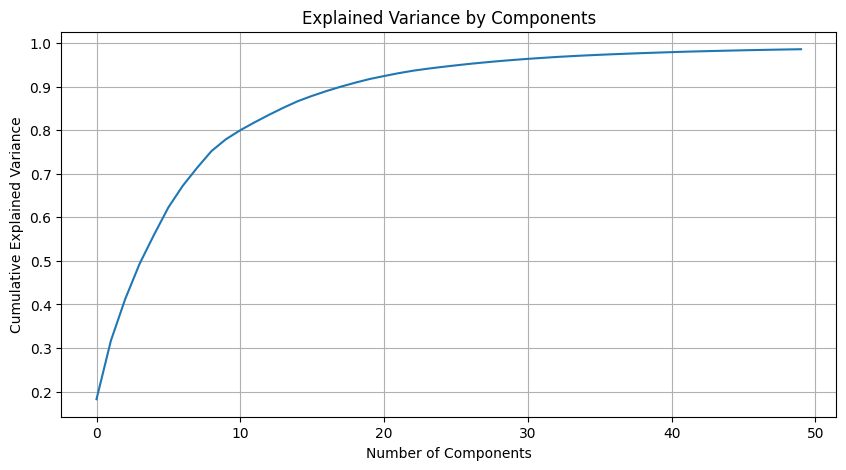

Top 5 contributing odours for each UMAP component:
PCA Component 1:
odorless: 0.379
sulfurous: 0.344
meaty: 0.298
roasted: 0.286
onion: 0.253
PCA Component 2:
woody: 0.329
floral: 0.272
phenolic: 0.191
balsamic: 0.191
spicy: 0.165
PCA Component 3:
fatty: 0.381
waxy: 0.378
oily: 0.211
green: 0.196
onion: 0.177
PCA Component 4:
roasted: 0.281
green: 0.279
nutty: 0.252
vegetable: 0.241
meaty: 0.218
PCA Component 5:
green: 0.209
herbal: 0.188
mint: 0.184
odorless: 0.173
camphoreous: 0.167
PCA Component 6:
green: 0.260
ethereal: 0.220
alcoholic: 0.183
sweet: 0.157
pungent: 0.141
PCA Component 7:
sulfurous: 0.423
onion: 0.271
garlic: 0.257
alliaceous: 0.252
meaty: 0.221
PCA Component 8:
alcoholic: 0.263
ethereal: 0.233
nutty: 0.209
cognac: 0.203
fermented: 0.185
PCA Component 9:
woody: 0.309
herbal: 0.165
camphoreous: 0.164
pine: 0.161
terpenic: 0.159
PCA Component 10:
sweet: 0.192
musk: 0.157
citrus: 0.146
sulfurous: 0.142
fatty: 0.135
PCA Component 11:
musk: 0.154
balsamic: 0.150
garlic: 0

In [284]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume `embeddings` is a numpy array of shape (num_samples, 256)
# Assume `labels` is a binary matrix of shape (num_samples, 104), where each column represents an odour

embeddings_all = np.asarray(combined_allembeddings)
# del combined_allembeddings
# Step 1: Dimensionality Reduction using PCA
pca = PCA(n_components=50)
principal_components = pca.fit_transform(embeddings_all)

# Plotting explained variance to find the optimal number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Choose n dimensions based on explained variance plot
n_components = 50
pca_n = PCA(n_components=n_components) #n_components=n_components)
principal_components_n = pca_n.fit_transform(embeddings_all)
# Step 2: Analyze Component Loadings with respect to labels
# Correlate each principal component with each label
correlations = np.array([np.corrcoef(principal_components_n[:, i], lvals[:, j])[0, 1]
                         for i in range(n_components) for j in range(138)]).reshape(n_components, 138)

# Assuming odour names are given as follows:
odour_names = np.array(TASKS)  # Replace with actual names if available

# # Print top contributing odours for each principal component
# print("Top contributing odours for each principal component:")
# for i in range(n_components):
#     print(f"Principal Component {i+1}:")
#     sorted_indices = np.argsort(np.abs(correlations[i]))[::-1]
#     print(odour_names[sorted_indices[:5]])  # Show top 5 odours for simplicity

# Print top contribu
# ting odours for each principal component along with their correlation values
# Print top 5 contributing odours for each UMAP component along with their correlation values
print("Top 5 contributing odours for each UMAP component:")
for i in range(n_components):
    print(f"PCA Component {i+1}:")
    sorted_indices = np.argsort(correlations[i])[::-1]  # Sort in descending order
    for j in sorted_indices[:5]:  # Show top 5 odours
        print(f"{odour_names[j]}: {correlations[i, j]:.3f}")

In [285]:
combined_data_w_pca = []

count = 0
for idx, row in combined_data.iterrows():
    dfdict = dict(row)
    dfdict['coords'] = principal_components_n[count]
    combined_data_w_pca.append(dfdict)
    count += 1

combined_data_w_pca = pd.DataFrame(combined_data_w_pca)

# combined_data_w_pca.to_csv(r'combined_data_w_pca.csv', index= False)


combined_data_w_preds_w_pca = []

count = 0
for idx, row in combined_data_w_preds.iterrows():
    dfdict = dict(row)
    dfdict['coords'] = principal_components_n[count]
    combined_data_w_preds_w_pca.append(dfdict)
    count += 1

combined_data_w_preds_w_pca = pd.DataFrame(combined_data_w_preds_w_pca)

# combined_data_w_preds_w_pca.to_csv(r'combined_data_w_preds_w_pca.csv', index = False)

In [286]:
# combined_data_w_pca = pd.read_csv(r'combined_data_w_pca.csv', index_col = False)
# combined_data_w_preds_w_pca = pd.read_csv(r'combined_data_w_preds_w_pca.csv', index_col = False)

### Convexhull + PPI

In [105]:
embed100 = embeddings_all[:][:]
embed100 = np.expand_dims(embed100, axis=1)
embed100.shape

(417, 1, 256)

In [106]:
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
ppi = eea.PPI()
endMem = ppi.extract(embed100, 59)

In [107]:
ppiIdx = ppi.get_idx()
ppiIdx = [i[1] for i in ppiIdx]
np.array(ppiIdx)

array([ 42, 281,  41, 218, 236,  35, 212, 153, 332, 320,  21, 325,  22,
       240, 205, 154, 133, 134, 135, 136, 151, 147, 148, 138, 139, 140,
       150, 141, 149, 142, 143, 144, 145, 146, 137, 416, 132, 119, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 131, 121, 122,
       123, 124, 125, 126, 127, 128, 129])

In [108]:
principal_components_3 = principal_components_n[:,:3]
principal_components_3.shape
from scipy.spatial import ConvexHull

ch = ConvexHull(principal_components_3)
ch.vertices[:]

array([  8,  14,  18,  20,  25,  31,  40,  41,  44,  47,  50,  67,  70,
        77,  87, 138, 165, 229, 233, 236, 240, 320, 347, 353, 393, 397,
       405, 406, 410], dtype=int32)

In [109]:
# predictions convert pandas to list
predictions_list = []
labels_order = []
for idx, row in predictions.iterrows():
  lvals = []
  for k,v in dict(row).items():

    if k!='id':
      lvals.append(v)
  predictions_list.append(lvals)

In [110]:
lb_extremum = []
lb_extrmeum_topn = []
intensities = []
coords = []
vertex_to_pred_topn = {}
vertex_to_pred = {}
labels_order = list(predictions.columns)
# for v in ch.vertices:
for v in ppiIdx:
  mp = 0
  vals = []
  for idx, p in enumerate(predictions_list[v]):
    if p>0.5:
      lb_extrmeum_topn.append(labels_order[idx+1])
      intensities.append(p)
      coords.append(ch.points[v])
      vals.append(labels_order[idx+1])
    if p > mp:
      mp = p
      lb = labels_order[idx+1]
    # print(labels_order[idx+1], p)
  vertex_to_pred[v] = lb
  vertex_to_pred_topn[v] = vals if vals !=[] else [lb]
  lb_extremum.append(lb)

lb_set = set(lb_extremum)

In [111]:
counts = {}
for val in lb_extrmeum_topn:
  if val not in counts:
    counts[val] = 0
  counts[val] += 1

counts = dict(sorted(list(counts.items()), key=lambda x: x[1], reverse= True))
print(counts)

{'odorless': 27, 'sweet': 18, 'burnt': 8, 'citrus': 7, 'earthy': 6, 'green': 6, 'mint': 5, 'sulfurous': 4, 'spicy': 4, 'woody': 4, 'phenolic': 4, 'alcoholic': 1}


In [112]:
# dist = np.zeros((59,59))
# for i,p in enumerate(idx):
#     for j,q in enumerate(ch.vertices):
#         dist[i,j] = np.linalg.norm(embeddings_all[p,:]-embeddings_all[q,:])

In [113]:
# print(dist[7,:])
# print(idx[2])
# print(ch.vertices[49])
# print(np.linalg.norm(embeddings_all[2,:]-embeddings_all[41,:]))

In [114]:
import traceback

In [115]:
convex_hull_3d_points = {'sweet': 36, 'fruity': 33, 'green': 26, 'floral': 24, 'waxy': 18, 'apple': 14, 'tropical': 13, 'woody': 11, 'ethereal': 11, 'spicy': 11, 'pineapple': 10, 'powdery': 9, 'rose': 9, 'cherry': 9, 'pear': 9, 'fatty': 8, 'phenolic': 7, 'banana': 7, 'herbal': 6, 'fresh': 6, 'berry': 5, 'anisic': 5, 'coumarinic': 5, 'hawthorn': 5, 'vanilla': 5, 'citrus': 5, 'geranium': 4, 'hay': 4, 'melon': 4, 'sulfurous': 4, 'aldehydic': 3, 'almond': 3, 'honey': 3, 'medicinal': 3, 'smoky': 3, 'ripe': 3, 'burnt': 3, 'oily': 3, 'onion': 3, 'roasted': 3, 'odorless': 3, 'orris': 2, 'violet': 2, 'metallic': 2, 'leathery': 2, 'pungent': 2, 'nutty': 2, 'ketonic': 2, 'cucumber': 2, 'orange': 2, 'cooked': 2, 'meaty': 2, 'balsamic': 2, 'alliaceous': 2, 'fishy': 2, 'cheesy': 2, 'raspberry': 1, 'alcoholic': 1, 'solvent': 1, 'camphoreous': 1, 'aromatic': 1, 'bitter': 1, 'cinnamon': 1, 'winey': 1, 'dry': 1, 'animal': 1, 'tobacco': 1, 'jasmin': 1, 'fermented': 1, 'caramellic': 1, 'garlic': 1, 'savory': 1}
ppiIdx_eea_59_points  = {'fruity': 36, 'floral': 24, 'sweet': 21, 'green': 20, 'citrus': 13, 'waxy': 12, 'fresh': 12, 'herbal': 12, 'fatty': 11, 'rose': 9, 'sulfurous': 8, 'woody': 6, 'apple': 6, 'oily': 6, 'roasted': 6, 'meaty': 6, 'winey': 5, 'creamy': 5, 'mint': 5, 'spicy': 4, 'caramellic': 4, 'onion': 4, 'tropical': 3, 'aldehydic': 3, 'dairy': 3, 'grapefruit': 3, 'berry': 2, 'powdery': 2, 'buttery': 2, 'milky': 2, 'peach': 2, 'pineapple': 2, 'ethereal': 2, 'earthy': 2, 'hazelnut': 2, 'nutty': 2, 'cognac': 2, 'vegetable': 2, 'orange': 2, 'burnt': 2, 'vanilla': 2, 'alliaceous': 2, 'cooked': 2, 'garlic': 2, 'savory': 2, 'camphoreous': 1, 'metallic': 1, 'pungent': 1, 'dry': 1, 'raspberry': 1, 'coconut': 1, 'lactonic': 1, 'almond': 1, 'potato': 1, 'chamomile': 1, 'cooling': 1, 'leafy': 1, 'alcoholic': 1, 'coffee': 1, 'black currant': 1, 'clean': 1, 'muguet': 1, 'phenolic': 1, 'banana': 1, 'warm': 1, 'fermented': 1, 'cheesy': 1, 'jasmin': 1, 'balsamic': 1, 'honey': 1}

sc = set(convex_hull_3d_points)
sp = set(ppiIdx_eea_59_points)
sinter = sc.intersection(sp)
print(len(sc))
print(len(sp))
print(len(sinter))
print(sinter)

72
70
48
{'garlic', 'apple', 'floral', 'jasmin', 'sweet', 'banana', 'waxy', 'orange', 'green', 'fermented', 'herbal', 'winey', 'tropical', 'rose', 'vanilla', 'woody', 'caramellic', 'honey', 'meaty', 'citrus', 'alcoholic', 'spicy', 'phenolic', 'powdery', 'ethereal', 'balsamic', 'sulfurous', 'fruity', 'almond', 'savory', 'nutty', 'pungent', 'onion', 'pineapple', 'cheesy', 'burnt', 'oily', 'metallic', 'fresh', 'dry', 'aldehydic', 'cooked', 'roasted', 'raspberry', 'berry', 'camphoreous', 'alliaceous', 'fatty'}


In [116]:
convex_hull_3d_points

{'sweet': 36,
 'fruity': 33,
 'green': 26,
 'floral': 24,
 'waxy': 18,
 'apple': 14,
 'tropical': 13,
 'woody': 11,
 'ethereal': 11,
 'spicy': 11,
 'pineapple': 10,
 'powdery': 9,
 'rose': 9,
 'cherry': 9,
 'pear': 9,
 'fatty': 8,
 'phenolic': 7,
 'banana': 7,
 'herbal': 6,
 'fresh': 6,
 'berry': 5,
 'anisic': 5,
 'coumarinic': 5,
 'hawthorn': 5,
 'vanilla': 5,
 'citrus': 5,
 'geranium': 4,
 'hay': 4,
 'melon': 4,
 'sulfurous': 4,
 'aldehydic': 3,
 'almond': 3,
 'honey': 3,
 'medicinal': 3,
 'smoky': 3,
 'ripe': 3,
 'burnt': 3,
 'oily': 3,
 'onion': 3,
 'roasted': 3,
 'odorless': 3,
 'orris': 2,
 'violet': 2,
 'metallic': 2,
 'leathery': 2,
 'pungent': 2,
 'nutty': 2,
 'ketonic': 2,
 'cucumber': 2,
 'orange': 2,
 'cooked': 2,
 'meaty': 2,
 'balsamic': 2,
 'alliaceous': 2,
 'fishy': 2,
 'cheesy': 2,
 'raspberry': 1,
 'alcoholic': 1,
 'solvent': 1,
 'camphoreous': 1,
 'aromatic': 1,
 'bitter': 1,
 'cinnamon': 1,
 'winey': 1,
 'dry': 1,
 'animal': 1,
 'tobacco': 1,
 'jasmin': 1,
 'ferment

In [117]:
# combined_data_w_preds[combined_data_w_preds['putrid']==1]

In [118]:
TASKS

['alcoholic',
 'burnt',
 'citrus',
 'earthy',
 'green',
 'mint',
 'odorless',
 'phenolic',
 'spicy',
 'sulfurous',
 'sweet',
 'woody']

In [119]:
corrs = dict()
for onm1 in sinter:
    for onm2 in sinter:
        if (onm1 != onm2):
            if onm1 > onm2:
                corrs[(onm1, onm2)] = np.corrcoef(labels[onm1], labels[onm2])[0][1]
            else:
                corrs[(onm2, onm1)] = np.corrcoef(labels[onm1], labels[onm2])[0][1]
            # print(onm1, onm2, '\n', np.corrcoef(labels[onm1], labels[onm2])[0][1])



KeyError: 'garlic'

In [ ]:
sorted(list(corrs.items()), key= lambda x: x[1], reverse = True)

[(('onion', 'garlic'), 0.7842596434840721),
 (('fermented', 'alcoholic'), 0.771828729172453),
 (('garlic', 'alliaceous'), 0.7516567955069886),
 (('onion', 'alliaceous'), 0.7154400569337916),
 (('sulfurous', 'onion'), 0.6668720233573054),
 (('roasted', 'meaty'), 0.5929313047885957),
 (('sulfurous', 'meaty'), 0.5787287494982593),
 (('waxy', 'fatty'), 0.5745433728148942),
 (('sulfurous', 'garlic'), 0.5551979182052091),
 (('roasted', 'nutty'), 0.5392063815202215),
 (('savory', 'onion'), 0.5211905435890891),
 (('ethereal', 'alcoholic'), 0.5204313936597442),
 (('raspberry', 'berry'), 0.5141844623003458),
 (('pineapple', 'banana'), 0.5031996576213931),
 (('fermented', 'ethereal'), 0.49580892649456976),
 (('sulfurous', 'alliaceous'), 0.4950466919243111),
 (('oily', 'fatty'), 0.4937885681850134),
 (('savory', 'garlic'), 0.489754626963784),
 (('fresh', 'citrus'), 0.48956068105070105),
 (('sulfurous', 'savory'), 0.483877574808102),
 (('pineapple', 'apple'), 0.4812134031597585),
 (('savory', 'meat

In [ ]:
merged = {}
merge_count = 1

while merge_count != 0:
	merge_count = 0
	for k,v in corrs.items():
		if v>0.5:
			key_notpresent = True
			to_remove = set()
			for k_m, v_m in merged.items():
				if k[0] in v_m or k[1] in v_m:
					key_notpresent = False
					merged[k_m].add(k[0])
					merged[k_m].add(k[1])
					
					if k[0]!=k_m and k[0] in merged:
						to_remove.add(k[0])
					if k[1]!=k_m and k[1] in merged:
						to_remove.add(k[1])
					# if k[0] in v_m and k[1] not in v_m:
					# 	merged[k_m].add(k[1])
					# 	merge_count += 1
					# if k[1] in v_m and k[0] not in v_m:
					# 	merged[k_m].add(k[0])
					# 	merge_count +=1
			for ke in to_remove:
				del merged[ke]
				
			if key_notpresent  == True:
				merged[k[0]] = {k[0], k[1]}
				merge_count += 1

# merged['garlic'] = merged['roasted']
# del merged['roasted']

In [ ]:
odors_to_remove = set
for k,v in merged.items():
    subset = v.difference(set(k))
    odors_to_remove = odors_to_remove.union(subset)
odors_to_remove

{'alcoholic',
 'alliaceous',
 'banana',
 'berry',
 'ethereal',
 'fatty',
 'fermented',
 'garlic',
 'meaty',
 'nutty',
 'onion',
 'pineapple',
 'raspberry',
 'roasted',
 'savory',
 'sulfurous',
 'waxy'}

In [ ]:
# labels_copy = labels.copy()
new_df_list = []
for idx, row in labels.iterrows():
	dc = dict(row)
	new_row = {}
	for k1, v1 in dc.items():
		for k2,v2 in merged.items():
			if k1 in v2:
				new_row[k2] = v1
		if k1 not in odors_to_remove:
			new_row[k1] = v1
	new_df_list.append(new_row)

final_df = pd.DataFrame(new_df_list)

In [ ]:
corrsMerged = dict()
for onm1 in sinter:
    for onm2 in sinter:
        if (onm1 != onm2):
            if onm1 not in list(final_df.columns) or onm2 not in list(final_df.columns):
                continue
            if onm1 > onm2:
                corrsMerged[(onm1, onm2)] = np.corrcoef(final_df[onm1], final_df[onm2])[0][1]
            else:
                corrsMerged[(onm2, onm1)] = np.corrcoef(final_df[onm1], final_df[onm2])[0][1]
            # print(onm1, onm2, '\n', np.corrcoef(labels[onm1], labels[onm2])[0][1])
sorted(list(corrsMerged.items()), key= lambda x: x[1], reverse = True)

[(('fresh', 'citrus'), 0.48956068105070105),
 (('pineapple', 'apple'), 0.4812134031597585),
 (('rose', 'floral'), 0.46697374427401334),
 (('tropical', 'pineapple'), 0.44022494994073746),
 (('citrus', 'aldehydic'), 0.3832569540528499),
 (('fresh', 'aldehydic'), 0.3807790818637528),
 (('waxy', 'oily'), 0.3753051320927087),
 (('sweet', 'floral'), 0.3368743648196609),
 (('tropical', 'apple'), 0.33537180102424735),
 (('vanilla', 'phenolic'), 0.31718377600839454),
 (('fruity', 'apple'), 0.3146366729320896),
 (('winey', 'oily'), 0.31178123641236244),
 (('tropical', 'fruity'), 0.30556229196997786),
 (('vanilla', 'powdery'), 0.30163199537873175),
 (('fresh', 'floral'), 0.29809146914523504),
 (('floral', 'balsamic'), 0.2909168700049885),
 (('woody', 'dry'), 0.2908979970640195),
 (('spicy', 'herbal'), 0.2879372368882475),
 (('waxy', 'citrus'), 0.28652384703310513),
 (('winey', 'apple'), 0.28580666849962877),
 (('orange', 'aldehydic'), 0.2840758684269283),
 (('tropical', 'savory'), 0.2823450179763

In [ ]:
for k, v in corrsMerged.items():
    if 'garlic' == k[0] or 'garlic' == k[1]:
        print(k)

In [ ]:
sorted(list(corrs.items()), key= lambda x: x[1], reverse = True)
corrs[('waxy', 'aldehydic')]
corrsMerged[('waxy', 'aldehydic')]

0.2068010769469115

In [ ]:
merged_in_ppi = {}
keys_to_del = []
for k,v in merged.items():
    odr_in_ppi_list = None
    for ods in ppiIdx_eea_59_points:
        if ods in v:
            odr_in_ppi_list = ods
            break
    if odr_in_ppi_list is not None:
        merged_in_ppi[odr_in_ppi_list] = merged[k]
    # else:
    #     keys_to_del.append(k)
merged_in_ppi['garlic'] = merged_in_ppi['sulfurous']
del merged_in_ppi['sulfurous']

In [ ]:
merged_in_ppi

{'waxy': {'fatty', 'waxy'},
 'pineapple': {'banana', 'pineapple'},
 'ethereal': {'alcoholic', 'ethereal', 'fermented'},
 'berry': {'berry', 'raspberry'},
 'garlic': {'alliaceous',
  'garlic',
  'meaty',
  'nutty',
  'onion',
  'roasted',
  'savory',
  'sulfurous'}}

In [ ]:
import copy

merged_ppiIdx_eea_59_points = copy.deepcopy(ppiIdx_eea_59_points)

to_delete = set()
for k, v in ppiIdx_eea_59_points.items():
    for k1, v1 in merged_in_ppi.items():
        if k in v1 and k != k1:
            merged_ppiIdx_eea_59_points[k1] += merged_ppiIdx_eea_59_points[k]
            to_delete.add(k)

for od in to_delete:
    del merged_ppiIdx_eea_59_points[od]




In [ ]:
merged_ppiIdx_eea_59_points['savory'] = merged_ppiIdx_eea_59_points['garlic']
del merged_ppiIdx_eea_59_points['garlic']
merged_ppiIdx_eea_59_points = dict(sorted(list(merged_ppiIdx_eea_59_points.items()), key=lambda x: x[1], reverse=True))


In [ ]:
# odour_breakdown_gpt = pd.read_csv(r'odour_breakdown_gpt_all.csv', index_col = False)

In [ ]:
merged_ppiIdx_eea_59_points

{'fruity': 36,
 'savory': 32,
 'floral': 24,
 'waxy': 23,
 'sweet': 21,
 'green': 20,
 'citrus': 13,
 'fresh': 12,
 'herbal': 12,
 'rose': 9,
 'woody': 6,
 'apple': 6,
 'oily': 6,
 'winey': 5,
 'creamy': 5,
 'mint': 5,
 'spicy': 4,
 'caramellic': 4,
 'ethereal': 4,
 'tropical': 3,
 'aldehydic': 3,
 'dairy': 3,
 'grapefruit': 3,
 'berry': 3,
 'pineapple': 3,
 'powdery': 2,
 'buttery': 2,
 'milky': 2,
 'peach': 2,
 'earthy': 2,
 'hazelnut': 2,
 'cognac': 2,
 'vegetable': 2,
 'orange': 2,
 'burnt': 2,
 'vanilla': 2,
 'cooked': 2,
 'camphoreous': 1,
 'metallic': 1,
 'pungent': 1,
 'dry': 1,
 'coconut': 1,
 'lactonic': 1,
 'almond': 1,
 'potato': 1,
 'chamomile': 1,
 'cooling': 1,
 'leafy': 1,
 'coffee': 1,
 'black currant': 1,
 'clean': 1,
 'muguet': 1,
 'phenolic': 1,
 'warm': 1,
 'cheesy': 1,
 'jasmin': 1,
 'balsamic': 1,
 'honey': 1}

In [ ]:
# odour_to_check = 'milky'
# print(f'MAIN ODOUR: {odour_to_check}')
# for idx, row in odour_breakdown_gpt[odour_breakdown_gpt['Main Odour'] == odour_to_check].iterrows():
#     for k,v in dict(row).items():
#         if type(v) is not float and k!= 'Main Odour':
#             print(f'{k}: {v}')

In [ ]:
compound_odours_based_on_gpt = ['savory', 'honey', 'balsamic', 'jasmin', 'muguet', 'black currant', 
'coffee', 'dry', 'leafy', 'chamomile', 'almond', 'camphoreous', 'vanilla', 'cooked','cooling',
'cognac','vegetable','orange',  'peach',  'grapefruit','berry','pineapple', 'creamy', 'winey', 'apple', 'herbal', 
'fresh', 'potato', 'coconut', 'aldehydic', 'caramellic', 'rose', 'tropical', 'oily', 'powdery']

doubtful = ['cheesy', 'warm', 'clean', 'metallic']
dairy = ['lactonic', 'buttery','milky', 'dairy']
still_doubtful = ['earthy', 'waxy']




# There's something up with 'Green' smell. Need to investigate separately
# Is leafy and green different?
# Does leafy and floral overlap - yes, apparently they do
# Soft vs sharp odour distinction
# Is a softer version of spicy something like 'aromatic'?
# Floral smells have so much variance.. what is the'floral' odour considered to be?
# Is vanilla really a simple combination?
# milky/buttery feels like a separate category according to gpt? - milky, creamy, buttery, the smell from paneer/curd - are there similar?
# wtf is 'fragrant' smell?
# phenolic = chemical smell?
# Clove is spicy (same thing)!
# coconut - sweet + nut + 'creamy?'
# dairy = sweet, fragrant, nutty
# tropical = fruity + floral + cocnut + citrus + green + spicy
# powdery = more of a qualitative descriptor. not really a separate smell
# 

# After experiencing:
# - rose seems to be sweet + a mild tinge of the synthetic fruitiness + a teeny tiny bit of tangy/salty/hajmola types?
# - Jasmine: seems to have a low level of phenolic smell with it? Along with a few others




In [ ]:
merged_ppiIdx_eea_59_points_without_compound = {}
for k, v in merged_ppiIdx_eea_59_points.items():
    if k not in compound_odours_based_on_gpt and k not in doubtful and k not in dairy and k not in still_doubtful:
        merged_ppiIdx_eea_59_points_without_compound[k] = v


In [ ]:
merged_ppiIdx_eea_59_points_without_compound['nutty'] = merged_ppiIdx_eea_59_points_without_compound['hazelnut']
del merged_ppiIdx_eea_59_points_without_compound['hazelnut']

In [ ]:
merged_ppiIdx_eea_59_points_without_compound['sulfurous'] = 1

In [ ]:
merged_ppiIdx_eea_59_points_without_compound

{'fruity': 36,
 'floral': 24,
 'sweet': 21,
 'green': 20,
 'citrus': 13,
 'woody': 6,
 'mint': 5,
 'spicy': 4,
 'ethereal': 4,
 'burnt': 2,
 'pungent': 1,
 'phenolic': 1,
 'nutty': 2,
 'sulfurous': 1}

### Trying to create new datasets

In [122]:
'''
Final hapticsol smells

sweet: Vanilla Bean
burnt - Burnt Rubber
citrus - Citrus Blast
earthy - Earth
woody - Cedarwood
green - Fresh Cut Grass
Spicy - Cinnamon Spice
ethereal/alcoholic - Absinthe
phenolic - Exhaust Gas
mint: Spearmint
'''

'\nFinal hapticsol smells\n\nsweet: Vanilla Bean\nburnt - Burnt Rubber\ncitrus - Citrus Blast\nearthy - Earth\nwoody - Cedarwood\ngreen - Fresh Cut Grass\nSpicy - Cinnamon Spice\nethereal/alcoholic - Absinthe\nphenolic - Exhaust Gas\nmint: Spearmint\n'

In [123]:
import pandas as pd

weighted_epicenters_f1scores = pd.read_csv(r'weighted_epicenters_f1score.csv', index_col = False)


In [124]:
labels_w_f1_cxhull = {}

for idx, row in weighted_epicenters_f1scores.iterrows():
    labels_w_f1_cxhull[row['label']] = row['f1']

labels_w_f1_cxhull = dict(sorted(list(labels_w_f1_cxhull.items()), key= lambda x: x[1], reverse=True))

In [125]:
cut_off_openpom_f1_70 = {k for k,v in labels_w_f1_cxhull.items() if v>=.7}

In [181]:
final_primary = {'alcoholic',
 'burnt',
 'citrus',
 'earthy',
 'green',
 'mint',
 'odorless',
 'phenolic',
 'spicy',
 'sulfurous',
 'sweet',
 'woody'}

In [127]:
primary_odors_openpom_g_acc = {'citrus', 'green', 'sweet', 'roasted'}

In [128]:
odour_breakdown_gpt = pd.read_csv(r'odour_breakdown_gpt_all.csv', index_col = False)

In [129]:
odour_to_check = 'vegetable'
print(f'MAIN ODOUR: {odour_to_check}')
for idx, row in odour_breakdown_gpt[odour_breakdown_gpt['Main Odour'] == odour_to_check].iterrows():
    for k,v in dict(row).items():
        if type(v) is not float and k!= 'Main Odour':
            print(f'{k}: {v}')

MAIN ODOUR: vegetable
Pungent: Low
Earthy: Medium
Sweet: Low
Woody/Resinous: Low


In [130]:
### OPENPOM Cleaned Dataset

# dataset_breakdown_prompt = f'''
# You are a world-class expert in fragrance and odor sciences.\n
# The user will give you an odour, you have to categorize them into 2 categories:\n
# 1. Compound odours that can be exactly broken down into primary odours.\n
# 2. Ambiguous smells\n\n

# Here are the exhaustive primary odour list to rely on:\n
# {final_primary}\n\n

# Put odours in the 'Compound odour' category only if you are absolutely certain that the 
# odour is an EXACT combination of the given primary odours without any other additional odours.\n\n

# Your output format should be either:\n
# 1. {"Odour": "apple", "Type": "compound", "Breakup": ["sweet", "citrus"]}\n
# 2. {"Odour": "alliaceous", "Type": "ambiguous", "Breakup": None}
# '''

dataset_breakdown_prompt2 = f'''
You are a world-class expert in fragrance and odor sciences.

The user will give you an odor, and your task is to categorize it into one of two categories:
1. **Compound Odors**: Odors that can be precisely broken down into primary odors.
2. **Ambiguous Odors**: Odors that don’t align exactly with primary odors or have other scent elements.

Here is the exhaustive list of primary odors to reference:
{final_primary}

Only classify an odor as a "Compound Odor" if you are absolutely certain it is an exact combination of the given primary odors, with no additional elements.

Your output format should be:
1. {{ "Odor": "apple", "Type": "compound", "Breakdown": ["sweet", "citrus"] }}
2. {{ "Odor": "alliaceous", "Type": "ambiguous", "Breakdown": None }}
'''


from openai import OpenAI
import config
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = config.openai_key

client = OpenAI()


def extract_gpt_odour_assessment(odour):

    completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": dataset_breakdown_prompt2},
        {"role": "user", "content": odour}
    ],
    temperature= 0.0
    )

    # print(completion.choices[0].message)
    return completion.choices[0].message





In [131]:
### Curate list of odours that are at the intersection of all odours minus primary


# all_odours_minus_chosen_primary = set(TASKS).difference(final_primary)

# odor_breakdown_list = []

# for od in all_odours_minus_chosen_primary:
#     model_output = extract_gpt_odour_assessment(od)
#     try:
#         dict_output = eval(dict(model_output)['content'])
#         odor_breakdown_list.append(dict_output)
#     except:
#         print('Failed format: ', od)


# final_gpt_output = {'final_gpt_output': odor_breakdown_list}

import json
# json.dump(final_gpt_output, open('gpt_dataset_assessment.json', 'w', encoding='utf8'), ensure_ascii= False)

In [132]:
gpt_odour_assessment = json.load(open('gpt_dataset_assessment.json', encoding='utf8'))

In [133]:
ambiguous = []
compound = []

for od in gpt_odour_assessment['final_gpt_output']:
    if od['Type'] == 'ambiguous':
        ambiguous.append(od['Odor'])
    elif od['Type'] == 'compound':
        compound.append({od['Odor']: od['Breakdown']})

compound_odor_dict = {}
for c in compound:
    for k,v in c.items():
        compound_odor_dict[k] = v


In [134]:
len(ambiguous)

100

In [135]:
ambiguous

['solvent',
 'warm',
 'dairy',
 'weedy',
 'hyacinth',
 'grassy',
 'clean',
 'herbal',
 'sweaty',
 'muguet',
 'radish',
 'dry',
 'ozone',
 'vegetable',
 'violet',
 'soapy',
 'orangeflower',
 'fresh',
 'gassy',
 'leafy',
 'fishy',
 'vetiver',
 'coumarinic',
 'musty',
 'malty',
 'potato',
 'chamomile',
 'rummy',
 'leathery',
 'lactonic',
 'odorless',
 'creamy',
 'cucumber',
 'fruity',
 'garlic',
 'alliaceous',
 'berry',
 'medicinal',
 'geranium',
 'roasted',
 'tropical',
 'fatty',
 'hay',
 'sharp',
 'ripe',
 'fruit skin',
 'onion',
 'aldehydic',
 'amber',
 'black currant',
 'orris',
 'almond',
 'juicy',
 'animal',
 'honey',
 'meaty',
 'tomato',
 'cabbage',
 'rose',
 'metallic',
 'floral',
 'nutty',
 'fermented',
 'natural',
 'jasmin',
 'pungent',
 'sour',
 'waxy',
 'cortex',
 'lavender',
 'vanilla',
 'tea',
 'milky',
 'celery',
 'coconut',
 'plum',
 'camphoreous',
 'ketonic',
 'powdery',
 'musk',
 'tobacco',
 'ethereal',
 'cooked',
 'anisic',
 'balsamic',
 'savory',
 'aromatic',
 'terpeni

In [136]:
compound

[{'pear': ['sweet', 'green']},
 {'grapefruit': ['citrus', 'sweet']},
 {'brandy': ['alcoholic', 'sweet']},
 {'cognac': ['woody', 'alcoholic', 'sweet']},
 {'strawberry': ['sweet', 'citrus']},
 {'apple': ['sweet', 'citrus']},
 {'popcorn': ['sweet', 'burnt']},
 {'mushroom': ['earthy', 'woody']},
 {'pine': ['woody', 'green']},
 {'pineapple': ['sweet', 'citrus']},
 {'melon': ['sweet', 'green']},
 {'apricot': ['sweet', 'citrus']},
 {'lemon': ['citrus']},
 {'cedar': ['woody', 'earthy']},
 {'orange': ['citrus', 'sweet']},
 {'chocolate': ['sweet', 'earthy']},
 {'raspberry': ['sweet', 'citrus']},
 {'cinnamon': ['spicy', 'sweet']},
 {'caramellic': ['sweet', 'burnt']},
 {'banana': ['sweet', 'green']},
 {'cherry': ['sweet', 'citrus']},
 {'clove': ['spicy', 'woody']},
 {'bergamot': ['citrus', 'sweet']},
 {'grape': ['sweet', 'citrus']},
 {'sandalwood': ['woody', 'spicy']},
 {'cocoa': ['sweet', 'earthy']},
 {'peach': ['sweet', 'citrus']}]

In [137]:
count_of_odor_datapoint = {}
for idx, row in combined_data.iterrows():
    for k,v in dict(row).items():
        if k in TASKS and v == 1:
            if k not in count_of_odor_datapoint:
                count_of_odor_datapoint[k] = 0
            count_of_odor_datapoint[k] += 1
                        
count_of_odor_datapoint = dict(sorted(list(count_of_odor_datapoint.items()), key = lambda x: x[1], reverse= True))    

In [138]:
count_of_odor_datapoint_ranked = [{'odour': dct[0], 'count': dct[1], 'rank': idx+1} for idx, dct in enumerate(count_of_odor_datapoint.items())]

In [139]:
count_of_odor_datapoint_ranked_without_primary = [val for val in count_of_odor_datapoint_ranked if val['odour'] not in final_primary]

In [140]:
non_ambiguous_odours = final_primary.union({list(val.items())[0][0] for val in compound})
non_ambiguous_odours.add('odorless')

ambiguous_odors = set(TASKS).difference(non_ambiguous_odours)

In [141]:
non_ambiguous_odours

{'alcoholic',
 'apple',
 'apricot',
 'banana',
 'bergamot',
 'brandy',
 'burnt',
 'caramellic',
 'cedar',
 'cherry',
 'chocolate',
 'cinnamon',
 'citrus',
 'clove',
 'cocoa',
 'cognac',
 'earthy',
 'grape',
 'grapefruit',
 'green',
 'lemon',
 'melon',
 'mint',
 'mushroom',
 'odorless',
 'orange',
 'peach',
 'pear',
 'phenolic',
 'pine',
 'pineapple',
 'popcorn',
 'raspberry',
 'sandalwood',
 'spicy',
 'strawberry',
 'sulfurous',
 'sweet',
 'woody'}

In [142]:
non_ambiguous_counts = 0
ambiguous_occurances = {}

for idx, row in combined_data.iterrows():
    odour_in_datapoint = set()
    for k,v in dict(row).items():
        if k in TASKS and v == 1:
            odour_in_datapoint.add(k)
    flag = 1
    for o in ambiguous_odors:
        if o in odour_in_datapoint:
            if o not in ambiguous_occurances:
                ambiguous_occurances[o] = 0
            ambiguous_occurances[o] += 1
            flag = 0
            break
    
    if flag==1:
        non_ambiguous_counts += 1


ambiguous_occurances = dict(sorted(list(ambiguous_occurances.items()), key = lambda x: x[1], reverse = True))

In [143]:
count_of_odor_datapoint_ranked_without_primary

[{'odour': 'fruity', 'count': 2011, 'rank': 1},
 {'odour': 'floral', 'count': 1181, 'rank': 4},
 {'odour': 'herbal', 'count': 807, 'rank': 5},
 {'odour': 'fatty', 'count': 632, 'rank': 7},
 {'odour': 'fresh', 'count': 559, 'rank': 8},
 {'odour': 'waxy', 'count': 488, 'rank': 10},
 {'odour': 'oily', 'count': 388, 'rank': 13},
 {'odour': 'tropical', 'count': 386, 'rank': 14},
 {'odour': 'rose', 'count': 367, 'rank': 15},
 {'odour': 'nutty', 'count': 366, 'rank': 16},
 {'odour': 'ethereal', 'count': 331, 'rank': 17},
 {'odour': 'meaty', 'count': 324, 'rank': 19},
 {'odour': 'balsamic', 'count': 322, 'rank': 20},
 {'odour': 'apple', 'count': 308, 'rank': 21},
 {'odour': 'roasted', 'count': 305, 'rank': 22},
 {'odour': 'vegetable', 'count': 287, 'rank': 23},
 {'odour': 'caramellic', 'count': 234, 'rank': 24},
 {'odour': 'winey', 'count': 221, 'rank': 26},
 {'odour': 'pineapple', 'count': 205, 'rank': 27},
 {'odour': 'musty', 'count': 200, 'rank': 29},
 {'odour': 'pungent', 'count': 198, 'ra

In [144]:

# zipf law estimation
k = 30/100

topk = round(k*138)

print(topk)


sum_thresh = 0
sum_total = 0

for od in count_of_odor_datapoint_ranked:
    if od['rank']<= topk:
        sum_thresh += od['count']
    sum_total += od['count']


print('topk count: ', sum_thresh, '\ntotal count: ', sum_total, '\npercentage in topk: ', sum_thresh/sum_total)

41
topk count:  17808 
total count:  25196 
percentage in topk:  0.7067788537863153


In [145]:
count_of_odor_datapoint_ranked_without_primary_ambiguous = [val for val in count_of_odor_datapoint_ranked_without_primary if val['odour'] in ambiguous]

In [146]:
for val in count_of_odor_datapoint_ranked_without_primary_ambiguous:
    if val['rank']<=41:
        print(val)

{'odour': 'fruity', 'count': 2011, 'rank': 1}
{'odour': 'floral', 'count': 1181, 'rank': 4}
{'odour': 'herbal', 'count': 807, 'rank': 5}
{'odour': 'fatty', 'count': 632, 'rank': 7}
{'odour': 'fresh', 'count': 559, 'rank': 8}
{'odour': 'waxy', 'count': 488, 'rank': 10}
{'odour': 'oily', 'count': 388, 'rank': 13}
{'odour': 'tropical', 'count': 386, 'rank': 14}
{'odour': 'rose', 'count': 367, 'rank': 15}
{'odour': 'nutty', 'count': 366, 'rank': 16}
{'odour': 'ethereal', 'count': 331, 'rank': 17}
{'odour': 'meaty', 'count': 324, 'rank': 19}
{'odour': 'balsamic', 'count': 322, 'rank': 20}
{'odour': 'roasted', 'count': 305, 'rank': 22}
{'odour': 'vegetable', 'count': 287, 'rank': 23}
{'odour': 'winey', 'count': 221, 'rank': 26}
{'odour': 'musty', 'count': 200, 'rank': 29}
{'odour': 'pungent', 'count': 198, 'rank': 30}
{'odour': 'creamy', 'count': 190, 'rank': 31}
{'odour': 'odorless', 'count': 190, 'rank': 32}
{'odour': 'cheesy', 'count': 187, 'rank': 33}
{'odour': 'onion', 'count': 177, 'ra

In [147]:
#CREATE DATASET WITH NON_AMBIGUOUS SMELLS
input_file = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' # or new downloaded file path
datasetdf = pd.read_csv(input_file, index_col = False)

no_ambiguous_counts = 0

shrunkdataset_v1 = []
for idx, row in datasetdf.iterrows():
    odour_in_datapoint = set()
    for k,v in dict(row).items():
        if k in TASKS and v == 1:
            odour_in_datapoint.add(k)
    flag = 1
    for o in ambiguous_odors:
        if o in odour_in_datapoint:
            if o not in ambiguous_occurances:
                ambiguous_occurances[o] = 0
            ambiguous_occurances[o] += 1
            flag = 0
            break
    
    #Only for these data points, create the lowered dataset
    if flag==1:
        rowdict = dict(row)
        for c in compound_odor_dict.keys():
            if rowdict[c] == 1:
                primary_equivalents = compound_odor_dict[c]
                primary_equivalents_str = ';'.join(primary_equivalents)
                rowdict['descriptors'] = primary_equivalents_str
                
                for p_od in primary_equivalents:
                    rowdict[p_od] = 1
        shrunkdataset_v1.append(rowdict)

shrunkdataset_v1 = pd.DataFrame(shrunkdataset_v1)       
    

In [148]:
all_odors_to_remove_from_dataset = set(ambiguous_odors).union(set(compound_odor_dict.keys()))

In [149]:
shrunkdataset_v1 = shrunkdataset_v1.drop(columns=all_odors_to_remove_from_dataset)

In [150]:
# shrunkdataset_v1.to_csv(r'shrunkdataset_v2.csv', index=False)# 

In [151]:
eval(dict(extract_gpt_odour_assessment('winey'))['content'])

{'Odor': 'winey', 'Type': 'compound', 'Breakdown': ['sweet', 'alcoholic']}

In [152]:
eval(dict(extract_gpt_odour_assessment('rummy'))['content'])

{'Odor': 'rummy', 'Type': 'compound', 'Breakdown': ['alcoholic', 'sweet']}

In [153]:
eval(dict(extract_gpt_odour_assessment('solvent'))['content'])

{'Odor': 'solvent', 'Type': 'ambiguous', 'Breakdown': None}

In [154]:
eval(dict(extract_gpt_odour_assessment('ethereal'))['content'])

{'Odor': 'ethereal', 'Type': 'ambiguous', 'Breakdown': None}

In [155]:
eval(dict(extract_gpt_odour_assessment('ketonic'))['content'])

{'Odor': 'ketonic', 'Type': 'ambiguous', 'Breakdown': None}

In [156]:
eval(dict(extract_gpt_odour_assessment('camphoreous'))['content'])

{'Odor': 'camphoreous', 'Type': 'ambiguous', 'Breakdown': None}

In [157]:
eval(dict(extract_gpt_odour_assessment('anisic'))['content'])

{'Odor': 'anisic', 'Type': 'compound', 'Breakdown': ['sweet', 'spicy']}

In [158]:
filtered_df = datasetdf[datasetdf['winey'] == 1]


In [159]:
from copy import deepcopy
compound2 = deepcopy(compound)
ambiguous2 = deepcopy(ambiguous)

compound2.extend([{'winey': ['alcoholic', 'sweet']},
                  {'rummy': ['alcoholic', 'sweet']}])

ambiguous2.remove('winey')
ambiguous2.remove('rummy')

In [160]:
compound2

[{'pear': ['sweet', 'green']},
 {'grapefruit': ['citrus', 'sweet']},
 {'brandy': ['alcoholic', 'sweet']},
 {'cognac': ['woody', 'alcoholic', 'sweet']},
 {'strawberry': ['sweet', 'citrus']},
 {'apple': ['sweet', 'citrus']},
 {'popcorn': ['sweet', 'burnt']},
 {'mushroom': ['earthy', 'woody']},
 {'pine': ['woody', 'green']},
 {'pineapple': ['sweet', 'citrus']},
 {'melon': ['sweet', 'green']},
 {'apricot': ['sweet', 'citrus']},
 {'lemon': ['citrus']},
 {'cedar': ['woody', 'earthy']},
 {'orange': ['citrus', 'sweet']},
 {'chocolate': ['sweet', 'earthy']},
 {'raspberry': ['sweet', 'citrus']},
 {'cinnamon': ['spicy', 'sweet']},
 {'caramellic': ['sweet', 'burnt']},
 {'banana': ['sweet', 'green']},
 {'cherry': ['sweet', 'citrus']},
 {'clove': ['spicy', 'woody']},
 {'bergamot': ['citrus', 'sweet']},
 {'grape': ['sweet', 'citrus']},
 {'sandalwood': ['woody', 'spicy']},
 {'cocoa': ['sweet', 'earthy']},
 {'peach': ['sweet', 'citrus']},
 {'winey': ['alcoholic', 'sweet']},
 {'rummy': ['alcoholic', 'sw

In [189]:
compound_odor_dict2 = {}
for c in compound2:
    for k,v in c.items():
        compound_odor_dict2[k] = v

non_ambiguous_odours2 = final_primary.union({list(val.items())[0][0] for val in compound2})
non_ambiguous_odours2.add('odorless')

ambiguous_odors2 = set(TASKS).difference(non_ambiguous_odours2)

non_ambiguous_counts2 = 0
ambiguous_occurances2 = {}

for idx, row in combined_data.iterrows():
    odour_in_datapoint = set()
    for k,v in dict(row).items():
        if k in TASKS and v == 1:
            odour_in_datapoint.add(k)
    flag = 1
    for o in ambiguous_odors2:
        if o in odour_in_datapoint:
            if o not in ambiguous_occurances2:
                ambiguous_occurances2[o] = 0
            ambiguous_occurances2[o] += 1
            flag = 0
            break
    
    if flag==1:
        non_ambiguous_counts2 += 1


ambiguous_occurances2 = dict(sorted(list(ambiguous_occurances2.items()), key = lambda x: x[1], reverse = True))


#CREATE DATASET WITH NON_AMBIGUOUS SMELLS
input_file = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' # or new downloaded file path
datasetdf = pd.read_csv(input_file, index_col = False)

no_ambiguous_counts = 0

shrunkdataset_v3 = []
for idx, row in datasetdf.iterrows():
    odour_in_datapoint = set()
    for k,v in dict(row).items():
        if k in TASKS and v == 1:
            odour_in_datapoint.add(k)
    
    winey_flag = False
    
    if 'winey' in odour_in_datapoint:
        winey_flag = True
    flag = 1
    for o in ambiguous_odors2:
        if o in odour_in_datapoint:
            if o not in ambiguous_occurances2:
                ambiguous_occurances2[o] = 0
            ambiguous_occurances2[o] += 1
            flag = 0
            break
    
    #Only for these data points, create the lowered dataset
    if flag==1:
        rowdict = dict(row)
        odour_descriptor_list = []
        for c in compound_odor_dict2.keys():
            if rowdict[c] == 1:
                primary_equivalents = compound_odor_dict2[c]
                odour_descriptor_list.extend(primary_equivalents)
                # rowdict['descriptors'] = primary_equivalents_str
                for p_od in primary_equivalents:
                    rowdict[p_od] = 1

        for p in final_primary:
            if rowdict[p] == 1:
                odour_descriptor_list.append(p)


        odour_descriptor_list = sorted(list(set(odour_descriptor_list)))
        odour_descriptor_str = ';'.join(odour_descriptor_list)
        rowdict['descriptors'] = odour_descriptor_str
        shrunkdataset_v3.append(rowdict)

shrunkdataset_v3 = pd.DataFrame(shrunkdataset_v3)    

all_odors_to_remove_from_dataset2 = set(ambiguous_odors2).union(set(compound_odor_dict2.keys()))
shrunkdataset_v3 = shrunkdataset_v3.drop(columns=all_odors_to_remove_from_dataset2)

In [197]:
shrunkdataset_v3.to_csv(r'shrunkdataset_v2.csv', index=False)

In [198]:
shrunkdataset_v3

nonStereoSMILES   descriptors  \
0                                             O=C(O)CO      odorless   
1                                 O=C(O)C(O)C(O)C(=O)O   burnt;sweet   
2                                  NC(Cc1ccccc1)C(=O)O  earthy;sweet   
3                                              CC(O)CO         sweet   
4                                      CC(C)C(N)C(=O)O      odorless   
..                                                 ...           ...   
425  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...      odorless   
426  CN1c2c(nc(N)[nH]c2=O)NCC1CNc1ccc(C(=O)NC(CCC(=...      odorless   
427  O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C...      odorless   
428  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...      odorless   
429  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...      odorless   

     alcoholic  burnt  citrus  earthy  green  mint  odorless  phenolic  spicy  \
0            0      0       0       0      0     0         1         0      0   
1            0      1       0       0      0     0         0         0      0   
2            0      0       0       1      0     0         0         0      0   
3            0      0       0       0      0     0         0         0      0   
4            0      0       0       0      0     0         1         0      0   
..         ...    ...     ...     ...    ...   ...       ...       ...    ...   
425          0      0       0       0      0     0         1         0      0   
426          0      0       0       0      0     0         1         0      0   
427          0      0       0       0      0     0         1         0      0   
428          0      0       0       0      0     0         1         0      0   
429          0      0       0       0      0     0         1         0      0   

     sulfurous  sweet  woody  
0            0      0      0  
1            0      1      0  
2            0      1      0  
3            0      1      0  
4            0      0      0  
..         ...    ...    ...  
425          0      0      0  
426          0      0      0  
427          0      0      0  
428          0      0      0  
429          0      0      0  

[430 rows x 14 columns]

In [184]:
shrunkdataset_v3

nonStereoSMILES    descriptors  \
0                                             O=C(O)CO       odorless   
1                                 O=C(O)C(O)C(O)C(=O)O   burnt; sweet   
2                                  NC(Cc1ccccc1)C(=O)O  earthy; sweet   
3                                              CC(O)CO          sweet   
4                                      CC(C)C(N)C(=O)O       odorless   
..                                                 ...            ...   
425  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...       odorless   
426  CN1c2c(nc(N)[nH]c2=O)NCC1CNc1ccc(C(=O)NC(CCC(=...       odorless   
427  O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C...       odorless   
428  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...       odorless   
429  Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...       odorless   

     alcoholic  burnt  citrus  earthy  green  mint  odorless  phenolic  spicy  \
0            0      0       0       0      0     0         1         0      0   
1            0      1       0       0      0     0         0         0      0   
2            0      0       0       1      0     0         0         0      0   
3            0      0       0       0      0     0         0         0      0   
4            0      0       0       0      0     0         1         0      0   
..         ...    ...     ...     ...    ...   ...       ...       ...    ...   
425          0      0       0       0      0     0         1         0      0   
426          0      0       0       0      0     0         1         0      0   
427          0      0       0       0      0     0         1         0      0   
428          0      0       0       0      0     0         1         0      0   
429          0      0       0       0      0     0         1         0      0   

     sulfurous  sweet  woody  
0            0      0      0  
1            0      1      0  
2            0      1      0  
3            0      1      0  
4            0      0      0  
..         ...    ...    ...  
425          0      0      0  
426          0      0      0  
427          0      0      0  
428          0      0      0  
429          0      0      0  

[430 rows x 14 columns]

In [163]:
compound_odor_dict2

{'pear': ['sweet', 'green'],
 'grapefruit': ['citrus', 'sweet'],
 'brandy': ['alcoholic', 'sweet'],
 'cognac': ['woody', 'alcoholic', 'sweet'],
 'strawberry': ['sweet', 'citrus'],
 'apple': ['sweet', 'citrus'],
 'popcorn': ['sweet', 'burnt'],
 'mushroom': ['earthy', 'woody'],
 'pine': ['woody', 'green'],
 'pineapple': ['sweet', 'citrus'],
 'melon': ['sweet', 'green'],
 'apricot': ['sweet', 'citrus'],
 'lemon': ['citrus'],
 'cedar': ['woody', 'earthy'],
 'orange': ['citrus', 'sweet'],
 'chocolate': ['sweet', 'earthy'],
 'raspberry': ['sweet', 'citrus'],
 'cinnamon': ['spicy', 'sweet'],
 'caramellic': ['sweet', 'burnt'],
 'banana': ['sweet', 'green'],
 'cherry': ['sweet', 'citrus'],
 'clove': ['spicy', 'woody'],
 'bergamot': ['citrus', 'sweet'],
 'grape': ['sweet', 'citrus'],
 'sandalwood': ['woody', 'spicy'],
 'cocoa': ['sweet', 'earthy'],
 'peach': ['sweet', 'citrus'],
 'winey': ['alcoholic', 'sweet'],
 'rummy': ['alcoholic', 'sweet']}

In [164]:
len(non_ambiguous_odours2)

41

In [191]:
shrunkdataset_v3[shrunkdataset_v3['burnt']==1]

nonStereoSMILES  \
1                                 O=C(O)C(O)C(O)C(=O)O   
14                                      Cc1cc2ccccc2o1   
17                               CC1CCC(C(C)C)OC(=O)C1   
18                                   CCC1=C(O)C(=O)CC1   
22                                    CC(C)=CCc1occc1C   
27                                  CCC1=C(O)C(=O)CC1C   
33                                          Oc1ccccc1O   
43                                      c1ccc2nccnc2c1   
44                                       c1ccc2sccc2c1   
55                                        O=C1CCCC=C1O   
56                                   CC1CC(=O)C(=O)C1C   
60                               CC(=O)C(=O)c1ccc(C)o1   
66                                CC1=C(O)C(=O)C(O)CO1   
84                                       O=CCC1CCOC1=O   
112                                        CS(C)(=O)=O   
118                                   CC1=C(O)C(=O)CC1   
218                                 CCC1OC(C)=C(O)C1=O   
235                                        O=C1CCC=C1O   
239                                  CC1=C(O)C(=O)CC1C   
250                                 COC1=C(C)CC(C)C1=O   
251                                    CCC1CCC(=O)C1=O   
278                                       CCOC(=O)CCCO   
295                             CC1=C(O)C(=O)C(C)(C)C1   
300                                          COc1nccs1   
312                                   CCC1OC=C(CO)C1=O   
340                               CC1=C(O)C(=O)CC1(C)C   
358                                  CC1OC(C)C(=O)C1=O   
376                             CCOC(=O)CCC(O)C(=O)OCC   
378                          CCOC(=O)OC1=C(C)OC(C)C1=O   
388                                   Cc1ncc2c(n1)COC2   
390                                Cc1ncc2c(n1)C(C)OC2   
406  O=C(O)C(O)C(O)C(O)C(O)CO.O=C(O)C(O)C(O)C(O)C(O...   

                       descriptors  alcoholic  burnt  citrus  earthy  green  \
1                      burnt;sweet          0      1       0       0      0   
14                  burnt;phenolic          0      1       0       0      0   
17                     burnt;sweet          0      1       0       0      0   
18           alcoholic;burnt;sweet          1      1       0       0      0   
22   burnt;citrus;green;mint;sweet          0      1       1       0      1   
27                     burnt;sweet          0      1       0       0      0   
33                  burnt;phenolic          0      1       0       0      0   
43                           burnt          0      1       0       0      0   
44          burnt;earthy;sulfurous          0      1       0       1      0   
55                     burnt;sweet          0      1       0       0      0   
56                     burnt;sweet          0      1       0       0      0   
60                     burnt;sweet          0      1       0       0      0   
66                     burnt;sweet          0      1       0       0      0   
84                     burnt;sweet          0      1       0       0      0   
112                burnt;sulfurous          0      1       0       0      0   
118                    burnt;sweet          0      1       0       0      0   
218                    burnt;sweet          0      1       0       0      0   
235                    burnt;sweet          0      1       0       0      0   
239                    burnt;sweet          0      1       0       0      0   
250                    burnt;sweet          0      1       0       0      0   
251                    burnt;sweet          0      1       0       0      0   
278                    burnt;sweet          0      1       0       0      0   
295                    burnt;sweet          0      1       0       0      0   
300                    burnt;sweet          0      1       0       0      0   
312                    burnt;sweet          0      1       0       0      0   
340                    burnt;sweet          0      1       0       0  

In [167]:
smiles_list_of_burnt = list(shrunkdataset_v1[shrunkdataset_v1['burnt']==1]['nonStereoSMILES'])

In [168]:
original_file = r'openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv' # or new downloaded file path
original_dataset = pd.read_csv(original_file, index_col = False)

In [196]:
original_dataset[original_dataset['nonStereoSMILES'].isin(smiles_list_of_burnt)]
# original_dataset[original_dataset['nonStereoSMILES']=='CC1=C(O)C(=O)CC1C']

nonStereoSMILES  \
38                                 O=C(O)C(O)C(O)C(=O)O   
734                                      Cc1cc2ccccc2o1   
1104                              CC1CCC(C(C)C)OC(=O)C1   
1302                                   CC(C)=CCc1occc1C   
1681                                 CCC1=C(O)C(=O)CC1C   
2160                                         Oc1ccccc1O   
2191                                     c1ccc2nccnc2c1   
2194                                      c1ccc2sccc2c1   
2395                                       O=C1CCCC=C1O   
2398                                  CC1CC(=O)C(=O)C1C   
2447                              CC(=O)C(=O)c1ccc(C)o1   
2659                               CC1=C(O)C(=O)C(O)CO1   
3093                                      O=CCC1CCOC1=O   
3419                                        CS(C)(=O)=O   
3429                                   CC1=C(O)C(=O)CC1   
3637                                 CCC1OC(C)=C(O)C1=O   
3762                                        O=C1CCC=C1O   
3808                                  CC1=C(O)C(=O)CC1C   
4016                                 COC1=C(C)CC(C)C1=O   
4029                                    CCC1CCC(=O)C1=O   
4186                                       CCOC(=O)CCCO   
4251                             CC1=C(O)C(=O)C(C)(C)C1   
4290                                          COc1nccs1   
4348                                   CCC1OC=C(CO)C1=O   
4471                               CC1=C(O)C(=O)CC1(C)C   
4572                                  CC1OC(C)C(=O)C1=O   
4674                             CCOC(=O)CCC(O)C(=O)OCC   
4680                          CCOC(=O)OC1=C(C)OC(C)C1=O   
4785                                   Cc1ncc2c(n1)COC2   
4787                                Cc1ncc2c(n1)C(C)OC2   
4833  O=C(O)C(O)C(O)C(O)C(O)CO.O=C(O)C(O)C(O)C(O)C(O...   

                             descriptors  alcoholic  aldehydic  alliaceous  \
38                            caramellic          0          0           0   
734                       phenolic;burnt          0          0           0   
1104                          caramellic          0          0           0   
1302  citrus;lemon;caramellic;green;mint          0          0           0   
1681              burnt;caramellic;sweet          0          0           0   
2160                      burnt;phenolic          0          0           0   
2191                               burnt          0          0           0   
2194              burnt;earthy;sulfurous          0          0           0   
2395                    burnt;caramellic          0          0           0   
2398              burnt;caramellic;sweet          0          0           0   
2447                    burnt;caramellic          0          0           0   
2659                          caramellic          0          0           0   
3093                    burnt;caramellic          0          0           0   
3419                     burnt;sulfurous          0          0           0   
3429                          caramellic          0          0           0   
3637                    caramellic;sweet          0          0           0   
3762                          caramellic          0          0           0   
3808                          caramellic          0          0           0   
4016                          caramellic          0          0           0   
4029                    caramellic;sweet          0          0           0   
4186                          caramellic          0          0           0   
4251                    caramellic;sweet          0          0           0   
4290                          caramellic          0          0           0   
4348                          caramellic          0          0           0   
4471                         sweet;burnt          0          0           0   
4572                          caramellic          0          0           0   
4674                          caramellic     

In [173]:
compound_odor_dict

{'pear': ['sweet', 'green'],
 'grapefruit': ['citrus', 'sweet'],
 'brandy': ['alcoholic', 'sweet'],
 'cognac': ['woody', 'alcoholic', 'sweet'],
 'strawberry': ['sweet', 'citrus'],
 'apple': ['sweet', 'citrus'],
 'popcorn': ['sweet', 'burnt'],
 'mushroom': ['earthy', 'woody'],
 'pine': ['woody', 'green'],
 'pineapple': ['sweet', 'citrus'],
 'melon': ['sweet', 'green'],
 'apricot': ['sweet', 'citrus'],
 'lemon': ['citrus'],
 'cedar': ['woody', 'earthy'],
 'orange': ['citrus', 'sweet'],
 'chocolate': ['sweet', 'earthy'],
 'raspberry': ['sweet', 'citrus'],
 'cinnamon': ['spicy', 'sweet'],
 'caramellic': ['sweet', 'burnt'],
 'banana': ['sweet', 'green'],
 'cherry': ['sweet', 'citrus'],
 'clove': ['spicy', 'woody'],
 'bergamot': ['citrus', 'sweet'],
 'grape': ['sweet', 'citrus'],
 'sandalwood': ['woody', 'spicy'],
 'cocoa': ['sweet', 'earthy'],
 'peach': ['sweet', 'citrus']}


### Inverse Tanimoto similarity dataset(s) - approach 1 absolute similarity

In [287]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')

def calculate_tanimoto(smiles1, smiles2):
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Generate Morgan fingerprints (ECFP-like)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, radius=2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=2, nBits=2048)

    # Calculate Tanimoto similarity
    tanimoto_sim = DataStructs.TanimotoSimilarity(fp1, fp2)
    return tanimoto_sim

# Example usage
smiles1 = 'CCO'
smiles2 = 'CCN'
similarity = calculate_tanimoto(smiles1, smiles2)
print(f"Tanimoto similarity: {similarity}")


Tanimoto similarity: 0.3333333333333333


In [288]:
list(shrunkdataset_v1['descriptors'])

['odorless',
 'burnt;sweet',
 'earthy;sweet',
 'sweet',
 'odorless',
 'phenolic',
 'phenolic;woody',
 'odorless',
 'sweet',
 'odorless',
 'odorless',
 'odorless',
 'phenolic',
 'citrus;sweet',
 'burnt;phenolic',
 'green',
 'earthy;green;sweet',
 'burnt;sweet',
 'alcoholic;burnt;sweet',
 'earthy;sulfurous;woody',
 'earthy;phenolic;woody',
 'green;sweet',
 'burnt;citrus;green;mint;sweet',
 'sweet;woody',
 'alcoholic;sweet;woody',
 'earthy;sweet;woody',
 'earthy;woody',
 'burnt;sweet',
 'citrus;green;sweet;woody',
 'citrus;sweet',
 'spicy;sweet',
 'citrus',
 'citrus;green;sweet',
 'burnt;phenolic',
 'sweet',
 'sulfurous',
 'sulfurous',
 'sulfurous',
 'odorless',
 'odorless',
 'sweet',
 'sulfurous',
 'phenolic;sweet',
 'burnt',
 'burnt;earthy;sulfurous',
 'sweet',
 'sweet',
 'sweet',
 'odorless',
 'green',
 'sweet',
 'odorless',
 'odorless',
 'citrus;sweet',
 'earthy;green',
 'burnt;sweet',
 'burnt;sweet',
 'odorless',
 'phenolic;spicy',
 'earthy;sweet',
 'burnt;sweet',
 'sulfurous',
 'odo

In [289]:
# Specify the column to split on
column_to_split = "descriptors"

# Group by the specified column
grouped_dfs = {key: group.reset_index(drop=True) for key, group in shrunkdataset_v1.groupby(column_to_split)}

# # Access individual DataFrames
# for key, group in grouped_dfs.items():
#     print(f"Group for {column_to_split}={key}:\n{group}\n")

In [290]:
single_odour_dfs = {}
multiple_odour_dfs = {}
for k, v in grouped_dfs.items():
    if len(k.split(';')) == 1:
        single_odour_dfs[k] = v
    else:
        multiple_odour_dfs[k] = v

In [291]:
for k,v in multiple_odour_dfs.items():
    print(k, v.shape[0])

alcoholic;burnt;sweet 1
alcoholic;citrus;green;sweet;woody 1
alcoholic;sweet;woody 2
burnt;citrus;green;mint;sweet 1
burnt;earthy;sulfurous 1
burnt;phenolic 2
burnt;sulfurous 1
burnt;sweet 25
citrus;earthy;green 1
citrus;green 1
citrus;green;sweet 5
citrus;green;sweet;woody 1
citrus;green;woody 1
citrus;mint 1
citrus;sweet 11
earthy;green 2
earthy;green;sweet 2
earthy;green;woody 1
earthy;phenolic;woody 1
earthy;spicy;woody 2
earthy;sulfurous;sweet 1
earthy;sulfurous;woody 2
earthy;sweet 5
earthy;sweet;woody 1
earthy;woody 8
green;sweet 5
green;woody 7
mint;spicy 2
phenolic;spicy 1
phenolic;spicy;sweet;woody 1
phenolic;sweet 2
phenolic;woody 1
spicy;sweet 7
spicy;sweet;woody 3
spicy;woody 5
sweet;woody 2


In [292]:
single_odour_dfs['alcoholic']

nonStereoSMILES descriptors  alcoholic  \
0                             CCOC1OC(CO)C(O)C(O)C1O   alcoholic          1   
1                                                 CO   alcoholic          1   
2                                      CC(O)COCC(C)O   alcoholic          1   
3                                          OCCCOCCCO   alcoholic          1   
4                               CC(=O)OCC(CO)OC(C)=O   alcoholic          1   
5  CCCCCCCCC=CCCCCCCCC(=O)OCCOCC(OCCO)C1OCC(OCCO)...   alcoholic          1   
6  CCCCCCCCCCCCCCCCCC(=O)OCCOCC(OCCOC)C1OCC(OCCOC...   alcoholic          1   

   burnt  citrus  earthy  green  mint  odorless  phenolic  spicy  sulfurous  \
0      0       0       0      0     0         0         0      0          0   
1      0       0       0      0     0         0         0      0          0   
2      0       0       0      0     0         0         0      0          0   
3      0       0       0      0     0         0         0      0          0   
4      0       0       0      0     0         0         0      0          0   
5      0       0       0      0     0         0         0      0          0   
6      0       0       0      0     0         0         0      0          0   

   sweet  woody  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  
6      0      0

In [293]:
from itertools import combinations


similarity_dfs_single_odours = {}

for o in single_odour_dfs.keys():
    similarity_df = []
    odour_to_calc_similarity = o#'alcoholic'

    all_indexes = list(single_odour_dfs[odour_to_calc_similarity].index)
    combs = combinations(all_indexes, 2)
    similarity_list = []
    for c in combs:
        c = sorted(c)
        smiles1 = single_odour_dfs[odour_to_calc_similarity].iloc[c[0]]['nonStereoSMILES']
        smiles2 = single_odour_dfs[odour_to_calc_similarity].iloc[c[1]]['nonStereoSMILES']
        similarity_value = calculate_tanimoto(smiles1, smiles2)
        similarity_df.append({'odour': odour_to_calc_similarity, 'idx1': c[0], 'idx2': c[1], 'similarity': similarity_value})
        similarity_list.append(similarity_value)

    try:
        similarity_dfs_single_odours[odour_to_calc_similarity] = {'df': pd.DataFrame(similarity_df), 'avg_similarity': sum(similarity_list)/len(similarity_list), 'count': len(all_indexes)}
    except:
        pass




In [294]:
similarity_dfs_single_odours.keys()

dict_keys(['alcoholic', 'citrus', 'earthy', 'green', 'mint', 'odorless', 'phenolic', 'spicy', 'sulfurous', 'sweet', 'woody'])

In [295]:
test_odr = 'sulfurous'
print(similarity_dfs_single_odours[test_odr]['avg_similarity'], similarity_dfs_single_odours[test_odr]['count'])

0.09079981808407075 20


In [296]:
pd.DataFrame([dict(single_odour_dfs['alcoholic'].iloc[0])])

nonStereoSMILES descriptors  alcoholic  burnt  citrus  earthy  \
0  CCOC1OC(CO)C(O)C(O)C1O   alcoholic          1      0       0       0   

   green  mint  odorless  phenolic  spicy  sulfurous  sweet  woody  
0      0     0         0         0      0          0      0      0

In [297]:
single_odour_smiles = {}
for k, v in single_odour_dfs.items():
    single_odour_smiles[k] = list(v['nonStereoSMILES'])

In [298]:
print(json.dumps(single_odour_smiles, indent=1))

{
 "alcoholic": [
  "CCOC1OC(CO)C(O)C(O)C1O",
  "CO",
  "CC(O)COCC(C)O",
  "OCCCOCCCO",
  "CC(=O)OCC(CO)OC(C)=O",
  "CCCCCCCCC=CCCCCCCCC(=O)OCCOCC(OCCO)C1OCC(OCCO)C1OCCO",
  "CCCCCCCCCCCCCCCCCC(=O)OCCOCC(OCCOC)C1OCC(OCCOC)C1OCCOC"
 ],
 "burnt": [
  "c1ccc2nccnc2c1"
 ],
 "citrus": [
  "CC(C)C1CCC(C)(S)CC1=O",
  "CC(C)=CCCC(C)=CC1OCC(CO)O1",
  "CC(=CC=O)CCC1CC1(C)C",
  "CC1CC=CCC1",
  "CC1C=CCCC1",
  "CC1=CCCCC1",
  "CC=CCCCCCC",
  "C=CCCCCCC=C",
  "CCCCCCCCCCCCCCCC(=O)OCC(O)C1OC(=O)C(O)=C1O"
 ],
 "earthy": [
  "COc1nc(C)cnc1C",
  "COc1ncc(C)nc1C",
  "C=Cc1ncc(C)nc1CC",
  "CCCCCC(=O)C(C)(O)C(C)=O"
 ],
 "green": [
  "COc1nccnc1CC(C)C",
  "CCc1cccs1",
  "CCCCCCc1nccnc1OC",
  "CC(C)CC1N=CCS1",
  "CC=CC(C)O",
  "CCCCOC(=O)c1ccccc1O",
  "CCCCOC(=O)C1CCCCC1",
  "CCCCc1ncsc1C",
  "CC1=CCC2(CC1)COC(C)OC2",
  "C=CC=CC=CCC",
  "CCC=CCCOC(=O)C#CCCCCCC",
  "CC(C)=CCC=C(C)CC=O",
  "CCC(C)Cn1cccc1"
 ],
 "mint": [
  "CC(C)C1=CC(=O)C(C)CC1",
  "CC(C)=CCC(=O)c1ccoc1",
  "CC1=CC=CC(C)(C)CC1=O",
  "CC1=CCC

### Inverse Tanimoto similarity dataset(s) - approach 2 domain knowledge based similarity est

In [249]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Draw
from rdkit.Chem.rdMolDescriptors import CalcNumRings

def evaluate_odors(smiles):
    """
    Evaluate a compound's closeness to the odor criteria based on its SMILES string.

    Parameters:
        smiles (str): SMILES representation of the compound.

    Returns:
        dict: Scores for each odor category.
    """
    # Define SMARTS patterns for each odor category
    odor_patterns = {
        "alcoholic": Chem.MolFromSmarts("[OX2H]"),  # Hydroxyl group
        "burnt": Chem.MolFromSmarts("[cR1,cR2]"),  # Aromatic carbons (e.g., PAHs)
        "citrus": Chem.MolFromSmarts("C=C(C)C"),  # Limonene-like structure
        "earthy": Chem.MolFromSmarts("[C,O,N]~[C,O,N]~[C,O,N]"),  # General microbial metabolites
        "green": Chem.MolFromSmarts("C=CC[OH]"),  # Unsaturated aldehydes/alcohols
        "mint": Chem.MolFromSmarts("CC(C)C1=CCC(CC1)O"),  # Menthol-like
        "phenolic": Chem.MolFromSmarts("c1ccccc1O"),  # Phenol
        "spicy": Chem.MolFromSmarts("c1ccc(O)cc1"),  # Eugenol-like
        "sulfurous": Chem.MolFromSmarts("[#16]"),  # Sulfur-containing groups
        "sweet": Chem.MolFromSmarts("[CX3](=O)[OX2H1]"),  # Esters
        "woody": Chem.MolFromSmarts("c1ccc(CO)cc1"),  # Guaiacol-like
    }

    # Convert SMILES to molecule
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")

    # Evaluate each odor category
    scores = {}
    for odor, pattern in odor_patterns.items():
        matches = mol.GetSubstructMatches(pattern)
        scores[odor] = len(matches)  # Count of matching substructures

    return scores

# Example usage
if __name__ == "__main__":
    # compounds = [
    #     "CCO",  # Ethanol (alcoholic)
    #     "CC1=CC=CC=C1",  # Toluene (burnt)
    #     "CC=C(C)C",  # Limonene (citrus)
    #     "CCC(=O)C(O)C",  # Geosmin (earthy)
    #     "C=CC(O)C",  # cis-3-Hexen-1-ol (green)
    #     "CC(C)C1CCC(CC1)O",  # Menthol (mint)
    #     "c1ccccc1O",  # Phenol (phenolic)
    #     "c1ccc(O)cc1C",  # Eugenol (spicy)
    #     "CCS",  # Methanethiol (sulfurous)
    #     "CC(=O)OCC",  # Ethyl butyrate (sweet)
    #     "COc1ccc(CC)c(OC)c1",  # Guaiacol (woody)
    # ]
    compounds = list(single_odour_dfs['alcoholic']['nonStereoSMILES'])

    for smiles in compounds:
        scores = evaluate_odors(smiles)
        print(f"Compound: {smiles}\nScores: {scores}\n")


Compound: CCOC1OC(CO)C(O)C(O)C1O
Scores: {'alcoholic': 4, 'burnt': 0, 'citrus': 0, 'earthy': 19, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}

Compound: CO
Scores: {'alcoholic': 1, 'burnt': 0, 'citrus': 0, 'earthy': 0, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}

Compound: CC(O)COCC(C)O
Scores: {'alcoholic': 2, 'burnt': 0, 'citrus': 0, 'earthy': 9, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}

Compound: OCCCOCCCO
Scores: {'alcoholic': 2, 'burnt': 0, 'citrus': 0, 'earthy': 7, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}

Compound: CC(=O)OCC(CO)OC(C)=O
Scores: {'alcoholic': 1, 'burnt': 0, 'citrus': 0, 'earthy': 13, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}

Compound: CCCCCCCCC=CCCCCCCCC(=O)OCCOCC(OCCO)C1OCC(OCCO)C1OCCO
Scores: {'alcoholic': 3, 'burnt': 0, 'citrus

In [250]:
single_odour_dfs['alcoholic']

nonStereoSMILES descriptors  alcoholic  \
0                             CCOC1OC(CO)C(O)C(O)C1O   alcoholic          1   
1                                                 CO   alcoholic          1   
2                                      CC(O)COCC(C)O   alcoholic          1   
3                                          OCCCOCCCO   alcoholic          1   
4                               CC(=O)OCC(CO)OC(C)=O   alcoholic          1   
5  CCCCCCCCC=CCCCCCCCC(=O)OCCOCC(OCCO)C1OCC(OCCO)...   alcoholic          1   
6  CCCCCCCCCCCCCCCCCC(=O)OCCOCC(OCCOC)C1OCC(OCCOC...   alcoholic          1   

   burnt  citrus  earthy  green  mint  odorless  phenolic  spicy  sulfurous  \
0      0       0       0      0     0         0         0      0          0   
1      0       0       0      0     0         0         0      0          0   
2      0       0       0      0     0         0         0      0          0   
3      0       0       0      0     0         0         0      0          0   
4      0       0       0      0     0         0         0      0          0   
5      0       0       0      0     0         0         0      0          0   
6      0       0       0      0     0         0         0      0          0   

   sweet  woody  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  
6      0      0

In [251]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Draw

def evaluate_odors_similarity2(smiles):
    """
    Evaluate a compound's closeness to the odor criteria based on its SMILES string.

    Parameters:
        smiles (str): SMILES representation of the compound.

    Returns:
        dict: Scores for each odor category.
    """
    # Define SMARTS patterns for each odor category
    odor_patterns = {
        "alcoholic": Chem.MolFromSmarts("[OX2H]"),  # Hydroxyl group
        "burnt": Chem.MolFromSmarts("[cR1,cR2]"),  # Aromatic carbons (e.g., PAHs)
        "citrus": Chem.MolFromSmarts("C=C(C)C"),  # Limonene-like structure
        "earthy": Chem.MolFromSmarts("[C,O,N]~[C,O,N]~[C,O,N]"),  # General microbial metabolites
        "green": Chem.MolFromSmarts("C=CC[OH]"),  # Unsaturated aldehydes/alcohols
        "mint": Chem.MolFromSmarts("CC(C)C1=CCC(CC1)O"),  # Menthol-like
        "phenolic": Chem.MolFromSmarts("c1ccccc1O"),  # Phenol
        "spicy": Chem.MolFromSmarts("c1ccc(O)cc1"),  # Eugenol-like
        "sulfurous": Chem.MolFromSmarts("[#16]"),  # Sulfur-containing groups
        "sweet": Chem.MolFromSmarts("[CX3](=O)[OX2H1]"),  # Esters
        "woody": Chem.MolFromSmarts("c1ccc(CO)cc1"),  # Guaiacol-like
    }

    # Define weights for molecular descriptors
    descriptor_weights = {
        "alcoholic": {"logP": -0.5, "TPSA": 0.8, "RotatableBonds": -0.2},
        "burnt": {"logP": 0.7, "AromaticRings": 1.0, "TPSA": -0.5},
        "citrus": {"logP": 0.6, "RingCount": 0.3, "TPSA": -0.3},
        "earthy": {"logP": 0.2, "HBD": 0.5, "TPSA": 0.4},
        "green": {"logP": 0.3, "HBA": 0.4, "TPSA": 0.5},
        "mint": {"logP": 0.4, "RotatableBonds": 0.6, "TPSA": -0.1},
        "phenolic": {"logP": 0.5, "AromaticRings": 0.8, "TPSA": 0.2},
        "spicy": {"logP": 0.4, "AromaticRings": 0.6, "TPSA": 0.3},
        "sulfurous": {"logP": 0.1, "HBA": 0.2, "TPSA": -0.2},
        "sweet": {"logP": 0.3, "HBA": 0.6, "TPSA": 0.5},
        "woody": {"logP": 0.5, "AromaticRings": 0.7, "TPSA": 0.3},
    }

    # Convert SMILES to molecule
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")

    # Compute molecular descriptors
    logP = Descriptors.MolLogP(mol)
    TPSA = Descriptors.TPSA(mol)
    RotatableBonds = Descriptors.NumRotatableBonds(mol)
    AromaticRings = CalcNumRings(mol)
    HBA = rdMolDescriptors.CalcNumHBA(mol)
    HBD = rdMolDescriptors.CalcNumHBD(mol)

    descriptors = {
        "logP": logP,
        "TPSA": TPSA,
        "RotatableBonds": RotatableBonds,
        "AromaticRings": AromaticRings,
        "HBA": HBA,
        "HBD": HBD,
    }

    # Evaluate each odor category
    scores = {}
    for odor, pattern in odor_patterns.items():
        # Substructure match score
        matches = len(mol.GetSubstructMatches(pattern))

        # Descriptor-based score
        descriptor_score = sum(
            weight * descriptors[descriptor]
            for descriptor, weight in descriptor_weights[odor].items()
            if descriptor in descriptors
        )

        # Combine scores (weighted sum)
        scores[odor] = matches + descriptor_score

    return scores

# Example usage
if __name__ == "__main__":
    # compounds = [
    #     "CCO",  # Ethanol (alcoholic)
    #     "CC1=CC=CC=C1",  # Toluene (burnt)
    #     "CC=C(C)C",  # Limonene (citrus)
    #     "CCC(=O)C(O)C",  # Geosmin (earthy)
    #     "C=CC(O)C",  # cis-3-Hexen-1-ol (green)
    #     "CC(C)C1CCC(CC1)O",  # Menthol (mint)
    #     "c1ccccc1O",  # Phenol (phenolic)
    #     "c1ccc(O)cc1C",  # Eugenol (spicy)
    #     "CCS",  # Methanethiol (sulfurous)
    #     "CC(=O)OCC",  # Ethyl butyrate (sweet)
    #     "COc1ccc(CC)c(OC)c1",  # Guaiacol (woody)
    # ]
    compounds = list(single_odour_dfs['earthy']['nonStereoSMILES'])
    for smiles in compounds:
        scores = evaluate_odors_similarity2(smiles)
        print(f"Compound: {smiles}\nScores: {scores}\n")


Compound: COc1nc(C)cnc1C
Scores: {'alcoholic': 27.256980000000006, 'burnt': -11.733572000000002, 'citrus': -9.841776000000001, 'earthy': 14.224408000000004, 'green': 19.035612000000004, 'mint': -2.460184000000001, 'phenolic': 8.35302, 'spicy': 11.543816000000001, 'sulfurous': -6.2917960000000015, 'sweet': 19.635612000000002, 'woody': 11.754020000000002}

Compound: COc1ncc(C)nc1C
Scores: {'alcoholic': 27.256980000000006, 'burnt': -11.733572000000002, 'citrus': -9.841776000000001, 'earthy': 14.224408000000004, 'green': 19.035612000000004, 'mint': -2.460184000000001, 'phenolic': 8.35302, 'spicy': 11.543816000000001, 'sulfurous': -6.2917960000000015, 'sweet': 19.635612000000002, 'woody': 11.754020000000002}

Compound: C=Cc1ncc(C)nc1CC
Scores: {'alcoholic': 19.228790000000004, 'burnt': -6.496706, 'citrus': -6.5397479999999995, 'earthy': 10.710084000000002, 'green': 14.287126, 'mint': -0.5818320000000003, 'phenolic': 6.9512100000000006, 'spicy': 9.130168, 'sulfurous': -4.556958000000001, 'sw

In [252]:
from rdkit.Chem import rdMolDescriptors

def evaluate_odors_refined(smiles):
    # Define SMARTS patterns for specific odors
    # odor_patterns = {
    #     "alcoholic": Chem.MolFromSmarts("[OX2H]"),  # Hydroxyl group
    #     "earthy": Chem.MolFromSmarts("[C&!R][C&!R]=[O]"),  # Ketones, aldehydes, or esters in non-aromatic systems
    #     # Other patterns remain unchanged...
    # }

    odor_patterns = {
        "alcoholic": Chem.MolFromSmarts("[OX2H]"),  # Hydroxyl group
        "burnt": Chem.MolFromSmarts("[cR1,cR2]"),  # Aromatic carbons (e.g., PAHs)
        "citrus": Chem.MolFromSmarts("C=C(C)C"),  # Limonene-like structure
        "earthy": Chem.MolFromSmarts("[C&!R][C&!R]=[O]"),  # General microbial metabolites
        "green": Chem.MolFromSmarts("C=CC[OH]"),  # Unsaturated aldehydes/alcohols
        "mint": Chem.MolFromSmarts("CC(C)C1=CCC(CC1)O"),  # Menthol-like
        "phenolic": Chem.MolFromSmarts("c1ccccc1O"),  # Phenol
        "spicy": Chem.MolFromSmarts("c1ccc(O)cc1"),  # Eugenol-like
        "sulfurous": Chem.MolFromSmarts("[#16]"),  # Sulfur-containing groups
        "sweet": Chem.MolFromSmarts("[CX3](=O)[OX2H1]"),  # Esters
        "woody": Chem.MolFromSmarts("c1ccc(CO)cc1"),  # Guaiacol-like
    }

    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")

    # Molecular descriptors to refine classification
    mw = Descriptors.MolWt(mol)  # Molecular weight
    h_donors = rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen bond donors
    oxygen_count = len([atom for atom in mol.GetAtoms() if atom.GetSymbol() == "O"])
    carbon_count = len([atom for atom in mol.GetAtoms() if atom.GetSymbol() == "C"])
    o_to_c_ratio = oxygen_count / carbon_count if carbon_count else 0

    # Initial pattern-based scores
    scores = {odor: len(mol.GetSubstructMatches(pattern)) for odor, pattern in odor_patterns.items()}

    # Refined scoring logic
    if scores["alcoholic"] > 0:
        # Weight alcoholic more strongly if many hydroxyls and high oxygen ratio
        scores["alcoholic"] += h_donors * 2 + int(o_to_c_ratio > 0.3)

    if scores["earthy"] > 0:
        # Penalize earthy if molecule is highly oxygenated
        scores["earthy"] -= int(o_to_c_ratio > 0.4)
        # Reward earthy if ketones dominate over hydroxyl groups
        if scores["alcoholic"] > 0 and scores["earthy"] > scores["alcoholic"]:
            scores["earthy"] += 1

    return scores

# Test on your molecule
# compound = "CCCCCCCC=CCCCCCCCC(=O)OCCOCC(OCCO)C1OCC(OCCO)C1OCCO"
# scores = evaluate_odors_refined(compound)
# print(f"Compound: {compound}\nScores: {scores}")
compounds = ['C=CCCCCCC(=O)OCC']#list(single_odour_dfs['earthy']['nonStereoSMILES'])
for smiles in compounds:
    scores = evaluate_odors_refined(smiles)
    print(f"Compound: {smiles}\nScores: {scores}\n")


Compound: C=CCCCCCC(=O)OCC
Scores: {'alcoholic': 0, 'burnt': 0, 'citrus': 0, 'earthy': 1, 'green': 0, 'mint': 0, 'phenolic': 0, 'spicy': 0, 'sulfurous': 0, 'sweet': 0, 'woody': 0}



### Inverse Tanimoto 3

In [133]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define mappings from functional groups to odours
functional_group_odour_mapping = {
    'Alcohol': ['alcoholic'],
    'Aldehyde': ['sweet'],
    'Ketone': ['sweet'],
    'Carboxylic Acid': ['sour', 'unpleasant'],
    'Ester': ['sweet', 'fruity'],
    'Ether': ['sweet'],
    'Amine': ['fishy', 'unpleasant'],
    'Phenol': ['phenolic'],
    'Thiol': ['sulfurous'],
    'Alkene': ['green'],
    'Alkyne': [],
    'Halide': [],
    'Terpene': ['citrus', 'mint', 'woody'],
    'Aromatic': ['woody', 'sweet'],
    'Nitro': [],
    'Sulfoxide': ['sulfurous'],
    'Sulfone': ['sulfurous'],
    'Anhydride': ['burnt'],
    'Imine': [],
    'Acyl Halide': [],
    'Thioester': ['sulfurous'],
    'Lactone': ['sweet'],
    'Lactam': [],
    'Epoxide': [],
    'Peroxide': ['burnt'],
    'Disulfide': ['sulfurous'],
    'Isocyanate': [],
    'Nitrile': [],
    'Azide': [],
    'Diazo': []
}

# Define SMARTS patterns for functional groups
functional_group_smarts = {
    'Alcohol': '[OX2H]',  # Hydroxyl group
    'Aldehyde': '[CX3H1](=O)[#6]',  # Aldehyde group
    'Ketone': '[CX3](=O)[#6]',  # Ketone group
    'Carboxylic Acid': 'C(=O)[OX2H1]',  # Carboxylic acid group
    'Ester': 'C(=O)[OX2][#6]',  # Ester group
    'Ether': '[OD2]([#6])[#6]',  # Ether group
    'Amine': '[NX3;H2,H1;!$(NC=O)]',  # Primary or secondary amine
    'Phenol': 'c[OH]',  # Phenol group
    'Thiol': '[#16X2H]',  # Thiol group
    'Alkene': 'C=C',  # Alkene (double bond)
    'Alkyne': 'C#C',  # Alkyne (triple bond)
    'Halide': '[F,Cl,Br,I]',  # Halogen atoms
    'Terpene': 'C=C(C)C',  # Isoprene unit (simplified for terpenes)
    'Aromatic': 'c1ccccc1',  # Benzene ring (aromatic)
    'Nitro': '[$([NX3](=O)=O)]',  # Nitro group
    'Sulfoxide': '[#16X3](=O)',  # Sulfoxide group
    'Sulfone': '[#16X4](=O)(=O)',  # Sulfone group
    'Anhydride': 'C(=O)OC(=O)',  # Anhydride group
    'Imine': '[CX2]=[NX3]',  # Imine group
    'Acyl Halide': 'C(=O)[F,Cl,Br,I]',  # Acyl halide group
    'Thioester': 'C(=O)[SX2][#6]',  # Thioester group
    'Lactone': 'O=C1OC(C=O)C1',  # Lactone ring
    'Lactam': 'O=C1NCC1',  # Lactam ring
    'Epoxide': '[OX2r3]',  # Epoxide ring
    'Peroxide': 'OO',  # Peroxide group
    'Disulfide': '[#16X2]-[#16X2]',  # Disulfide bond
    'Isocyanate': 'N=C=O',  # Isocyanate group
    'Nitrile': 'C#N',  # Nitrile group
    'Azide': 'N=[N+]=[N-]',  # Azide group
    'Diazo': '[N2]=[N+]=[N-]',  # Diazo group
}

def get_functional_groups(mol):
    """
    Identify functional groups present in the molecule.
    """
    functional_groups = []
    for fg_name, fg_smarts in functional_group_smarts.items():
        pattern = Chem.MolFromSmarts(fg_smarts)
        if mol.HasSubstructMatch(pattern):
            functional_groups.append(fg_name)
    return functional_groups

def map_functional_groups_to_odours(functional_groups):
    """
    Map functional groups to their corresponding odours.
    """
    odours = set()
    for fg in functional_groups:
        odour_list = functional_group_odour_mapping.get(fg, [])
        odours.update(odour_list)
    return list(odours)

def predict_odours(smiles):
    """
    Predict odours for a compound given its SMILES notation.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES string.")
        return []
    functional_groups = get_functional_groups(mol)
    odours = map_functional_groups_to_odours(functional_groups)
    return odours

# Example usage
if __name__ == "__main__":
    # Example SMILES strings for testing
    # smiles_list = [
    #     'CCO',          # Ethanol
    #     'O=C=O',        # Carbon dioxide (no odour)
    #     'CCCC=O',       # Butanal (aldehyde)
    #     'CC(=O)OCC',    # Ethyl acetate (ester)
    #     'c1ccccc1',     # Benzene
    #     'CC=C(C)C',     # Isoprene (terpene)
    #     'CCS',          # Ethanethiol (thiol)
    #     'CC(=O)N',      # Acetamide (amine derivative)
    #     'CC(=O)Cl',     # Acetyl chloride (acyl halide)
    #     'C1CCOC1',      # Tetrahydrofuran (ether)
    #     'CS(=O)C',      # Dimethyl sulfoxide (sulfoxide)
    #     'CN(C)C=O',     # Dimethylformamide (amide)
    #     'CC1=CC=CC=C1', # Styrene (aromatic, alkene)
    #     'CC#N',         # Acetonitrile (nitrile)
    #     'CC(=O)OC(=O)C',# Acetic anhydride (anhydride)
    # ]

    # smiles_list = list(single_odour_dfs['citrus']['nonStereoSMILES'])
    # for smiles in smiles_list:
    #     odours = predict_odours(smiles)
    #     print(f"SMILES: {smiles}")
    #     print(f"Predicted odours: {odours}\n")
    for odour in single_odour_dfs:
        smiles_list = list(single_odour_dfs[odour]['nonStereoSMILES'])
        count = 0
        
        for smiles in smiles_list:
            odours = predict_odours(smiles)
            # print(f"SMILES: {smiles}")
            # print(f"Predicted odours: {odours}")
            if odour in odours:
                count += 1
        print('Ratio of accurate hits for ', odour,': ', count/len(smiles_list), ' ', count, '/', len(smiles_list))

Ratio of accurate hits for  alcoholic :  0.8571428571428571   6 / 7
Ratio of accurate hits for  burnt :  0.0   0 / 1
Ratio of accurate hits for  citrus :  0.3   3 / 10
Ratio of accurate hits for  earthy :  0.0   0 / 4
Ratio of accurate hits for  green :  0.38461538461538464   5 / 13
Ratio of accurate hits for  mint :  0.7142857142857143   5 / 7
Ratio of accurate hits for  odorless :  0.0   0 / 199
Ratio of accurate hits for  phenolic :  1.0   8 / 8
Ratio of accurate hits for  spicy :  0.0   0 / 12
Ratio of accurate hits for  sulfurous :  0.7   14 / 20
Ratio of accurate hits for  sweet :  0.6875   11 / 16
Ratio of accurate hits for  woody :  0.7222222222222222   13 / 18


In [134]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
import math

# Define odour descriptors
odour_list = ['alcoholic', 'burnt', 'citrus', 'earthy', 'green', 'mint',
              'phenolic', 'spicy', 'sulfurous', 'sweet', 'woody']

# Define weighted mappings from functional groups to odours
functional_group_odour_weights = {
    'Alcohol': {'alcoholic': 3, 'sweet': 1},
    'Aldehyde': {'sweet': 3, 'green': 2, 'woody': 1},
    'Ketone': {'sweet': 2, 'mint': 1},
    'Carboxylic Acid': {'sour': 3, 'unpleasant': 2, 'sulfurous': 1},
    'Ester': {'sweet': 3, 'fruity': 2, 'citrus': 1},
    'Ether': {'sweet': 2, 'fruity': 1},
    'Amine': {'fishy': 3, 'unpleasant': 2, 'earthy': 1},
    'Phenol': {'phenolic': 3, 'burnt': 2},
    'Thiol': {'sulfurous': 3, 'garlic': 2, 'unpleasant': 1},
    'Alkene': {'green': 3, 'fresh': 2},
    'Alkyne': {'ethereal': 1},
    'Terpene': {'citrus': 3, 'woody': 2, 'mint': 2, 'spicy': 1},
    'Aromatic': {'woody': 3, 'sweet': 2, 'phenolic': 1},
    'Nitro': {'sweet': 1, 'unpleasant': 2},
    'Sulfoxide': {'sulfurous': 3},
    'Sulfone': {'sulfurous': 2},
    'Anhydride': {'burnt': 3, 'acrid': 2},
    'Imine': {'fishy':1},
    'Acyl Halide': {'pungent': 2},
    'Thioester': {'sulfurous': 2, 'unpleasant':1},
    'Lactone': {'sweet': 3, 'creamy': 1},
    'Epoxide': {'sweet': 1},
    'Peroxide': {'burnt': 3, 'sharp':1},
    'Disulfide': {'sulfurous': 3, 'garlic': 2},
    'Isocyanate': {'pungent':2},
    'Nitrile': {'almond': 2},
    'Azide': {'unpleasant':1},
    'Diazo': {'unpleasant':1},
    # Adding more specific structures
    'Furan': {'sweet': 2, 'bready':1},
    'Pyrazine': {'earthy': 3, 'nutty':2},
    'Pyridine': {'fishy': 2, 'unpleasant': 2},
    'Indole': {'fecal': 3, 'floral':1},
    'Skatole': {'fecal': 3, 'animalic':2},
    'Lactam': {'creamy':2},
    # Terpenoid structures
    'Monoterpene': {'citrus': 3, 'mint': 2, 'spicy': 1},
    'Sesquiterpene': {'woody':3, 'earthy':2},
    # Specific molecules
    'Vanillin': {'sweet': 3, 'woody':2, 'spicy':1},
    'Coumarin': {'sweet':2, 'spicy':2, 'woody':1},
}

# Extend SMARTS patterns for functional groups
functional_group_smarts = {
    'Alcohol': '[OX2H]',  # Hydroxyl group
    'Aldehyde': '[CX3H1](=O)[#6]',  # Aldehyde group
    'Ketone': '[CX3](=O)[#6]',  # Ketone group
    'Carboxylic Acid': 'C(=O)[OX2H1]',  # Carboxylic acid group
    'Ester': 'C(=O)[OX2][#6]',  # Ester group
    'Ether': '[OD2]([#6])[#6]',  # Ether group
    'Amine': '[NX3;!$(N[C,S]=O)]',  # Exclude amides and sulfonamides
    'Phenol': '[cH]-[OH]',  # Phenol group
    'Thiol': '[#16X2H]',  # Thiol group
    'Alkene': 'C=C',  # Alkene (double bond)
    'Alkyne': 'C#C',  # Alkyne (triple bond)
    'Terpene': '[#6][CH](C=C)[#6]',  # Allylic carbon
    'Aromatic': 'a1aaaaa1',  # General aromatic ring
    'Nitro': '[NX3](=O)=O',  # Nitro group
    'Sulfoxide': '[#16X3](=O)',  # Sulfoxide group
    'Sulfone': '[#16X4](=O)(=O)',  # Sulfone group
    'Anhydride': 'C(=O)OC(=O)',  # Anhydride group
    'Imine': '[CX2]=[NX3]',  # Imine group
    'Acyl Halide': 'C(=O)[F,Cl,Br,I]',  # Acyl halide group
    'Thioester': 'C(=O)[SX2][#6]',  # Thioester group
    'Lactone': 'O=C1OC[C,N]C1',  # Lactone ring
    'Epoxide': '[OX2r3]',  # Epoxide ring
    'Peroxide': 'OO',  # Peroxide group
    'Disulfide': '[#16X2]-[#16X2]',  # Disulfide bond
    'Isocyanate': 'N=C=O',  # Isocyanate group
    'Nitrile': 'C#N',  # Nitrile group
    'Azide': 'N=[N+]=[N-]',  # Azide group
    'Diazo': '[N2]=[N+]=[N-]',  # Diazo group
    # Additional heterocycles and aromatics
    'Furan': 'c1ccoc1',
    'Pyrazine': 'n1ccncc1',
    'Pyridine': 'c1ccncc1',
    'Indole': 'c1cc2c(c1)ccc(n2)[H]',
    'Skatole': 'c1cc2c(c1)ccc(n2)C',
    # Terpenoids
    'Monoterpene': '[#6]-[CH]([#6])-[CH]=[CH2]',  # Simplified pattern for monoterpenes
    'Sesquiterpene': 'C1=C[C@@H](C=C1)[C@H](C)CC=C(C)C',  # Example pattern (complex)
    # Specific molecules (Using SMILES since unique)
    'Vanillin': 'COc1cc(C=O)ccc1O',
    'Coumarin': 'O=C1C=CC2=C(C=CC=C2)O1',
}

# Molecular descriptor thresholds (example values)
mw_threshold = 300  # Molecular weight
logp_threshold = 5  # LogP value
tpsa_threshold = 100  # Topological Polar Surface Area

def get_functional_groups(mol):
    """
    Identify functional groups present in the molecule.
    """
    functional_groups = []
    for fg_name, fg_smarts in functional_group_smarts.items():
        pattern = Chem.MolFromSmarts(fg_smarts)
        if mol.HasSubstructMatch(pattern):
            functional_groups.append(fg_name)
    return functional_groups

def calculate_molecular_descriptors(mol):
    """
    Calculate molecular descriptors relevant to odour.
    """
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    tpsa = Descriptors.TPSA(mol)
    return mw, logp, tpsa

def map_functional_groups_to_odours(functional_groups):
    """
    Map functional groups to their corresponding odours with weights.
    """
    odour_scores = {}
    for fg in functional_groups:
        odour_dict = functional_group_odour_weights.get(fg, {})
        for odour, weight in odour_dict.items():
            if odour in odour_scores:
                odour_scores[odour] += weight
            else:
                odour_scores[odour] = weight
    return odour_scores

def apply_descriptor_filters(odour_scores, mw, logp, tpsa):
    """
    Adjust odour scores based on molecular descriptors.
    """
    # Example adjustments
    if mw > mw_threshold:
        # Heavier molecules may be less volatile
        for odour in odour_scores:
            odour_scores[odour] *= 0.8
    if logp > logp_threshold:
        # Very hydrophobic molecules may have different odour profiles
        for odour in odour_scores:
            odour_scores[odour] *= 1.1
    if tpsa > tpsa_threshold:
        # High polarity may affect volatility and odour
        for odour in odour_scores:
            odour_scores[odour] *= 0.9
    return odour_scores

def predict_odours(smiles):
    """
    Predict odours for a compound given its SMILES notation.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES string.")
        return []
    functional_groups = get_functional_groups(mol)
    odour_scores = map_functional_groups_to_odours(functional_groups)
    mw, logp, tpsa = calculate_molecular_descriptors(mol)
    odour_scores = apply_descriptor_filters(odour_scores, mw, logp, tpsa)
    if not odour_scores:
        # print("No odours predicted based on functional groups.")
        return []
    # Sort odours by scores
    sorted_odours = sorted(odour_scores.items(), key=lambda x: x[1], reverse=True)
    # Extract odour names
    predicted_odours = [odour for odour, score in sorted_odours if score > 0]
    return predicted_odours

# Example usage
if __name__ == "__main__":
    # Example SMILES strings for testing
    # smiles_list = [
    #     'CCO',          # Ethanol
    #     'O=C=O',        # Carbon dioxide (no odour)
    #     'CCCC=O',       # Butanal (aldehyde)
    #     'CC(=O)OCC',    # Ethyl acetate (ester)
    #     'c1ccccc1',     # Benzene
    #     'CC=C(C)C',     # Isoprene (terpene)
    #     'CCS',          # Ethanethiol (thiol)
    #     'CC(=O)N',      # Acetamide (amide)
    #     'CC(=O)Cl',     # Acetyl chloride (acyl halide)
    #     'C1CCOC1',      # Tetrahydrofuran (ether)
    #     'CS(=O)C',      # Dimethyl sulfoxide (sulfoxide)
    #     'CN(C)C=O',     # Dimethylformamide (amide)
    #     'CC1=CC=CC=C1', # Styrene (aromatic, alkene)
    #     'CC#N',         # Acetonitrile (nitrile)
    #     'CC(=O)OC(=O)C',# Acetic anhydride (anhydride)
    #     'C1=CC=CN=C1',  # Pyridine
    #     'c1ccncc1',     # Pyridine (alternate)
    #     'c1ccoc1',      # Furan
    #     'c1ccn2c(c1)ccc2', # Indole
    #     'c1cc2ccccc2cc1',  # Naphthalene (aromatic)
    #     'CN1CCCC1=O',   # N-Methyl-4-piperidone (ketone, amine)
    #     'Oc1ccccc1C=O', # Salicylaldehyde (aldehyde, phenol)
    #     'COc1cc(C=O)ccc1O', # Vanillin
    #     'O=C1C=CC2=C(C=CC=C2)O1', # Coumarin
    # ]

    for odour in single_odour_dfs:
        smiles_list = list(single_odour_dfs[odour]['nonStereoSMILES'])
        count = 0
        
        for smiles in smiles_list:
            odours = predict_odours(smiles)
            # print(f"SMILES: {smiles}")
            # print(f"Predicted odours: {odours}")
            if odour in odours:
                count += 1
        print('Ratio of accurate hits for ', odour,': ', count/len(smiles_list))

Ratio of accurate hits for  alcoholic :  0.8571428571428571
Ratio of accurate hits for  burnt :  0.0
Ratio of accurate hits for  citrus :  0.3
Ratio of accurate hits for  earthy :  0.75
Ratio of accurate hits for  green :  0.38461538461538464
Ratio of accurate hits for  mint :  1.0
Ratio of accurate hits for  odorless :  0.0
Ratio of accurate hits for  phenolic :  1.0
Ratio of accurate hits for  spicy :  0.3333333333333333
Ratio of accurate hits for  sulfurous :  0.7
Ratio of accurate hits for  sweet :  0.8125
Ratio of accurate hits for  woody :  0.5555555555555556


In [135]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

# Define characteristic substructures (SMARTS patterns) for each odor label
# These are based on conventional wisdom or known chemical correlations
odor_smarts = {
    'alcoholic': '[CX4][OH]',  # Alcohol functional group
    'burnt': 'C=O',           # Carbonyl group (e.g., aldehydes or ketones)
    'citrus': 'C(=O)O',       # Ester functional group
    'earthy': 'c1ccccc1',     # Aromatic ring (e.g., phenolic or terpene structures)
    'green': 'C=C',           # Alkene group (e.g., plant-derived smells)
    'mint': 'C1CCCCC1',       # Cyclohexane (common in menthol-related structures)
    'phenolic': 'c1ccc(O)cc1',# Phenol functional group
    'spicy': '[CX3]=[CX3]',   # Double bond or conjugated systems
    'sulfurous': '[#16]',     # Sulfur atom
    'sweet': 'O=C[CH2]',      # Carbonyl and methyl group
    'woody': 'C1=CC=C(C=C1)C',# Benzyl or phenyl derivatives
}

data = shrunkdataset_v1

# Initialize results dictionary
hard_positives = {key: [] for key in odor_smarts.keys()}
hard_negatives = {key: [] for key in odor_smarts.keys()}

# Analyze each compound in the dataset
for idx, row in data.iterrows():
    smiles = row['nonStereoSMILES']
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        for odor, smarts in odor_smarts.items():
            pattern = Chem.MolFromSmarts(smarts)
            if mol.HasSubstructMatch(pattern):
                if row[odor] == 1:
                    hard_positives[odor].append(smiles)  # Match with positive label
                elif row[odor] == 0:
                    hard_negatives[odor].append(smiles)  # Mismatch with negative label

# Display the number of hard positives and negatives found for each odor
hard_positive_counts = {odor: len(smiles) for odor, smiles in hard_positives.items()}
hard_negative_counts = {odor: len(smiles) for odor, smiles in hard_negatives.items()}

hard_positive_counts, hard_negative_counts

({'alcoholic': 6,
  'burnt': 22,
  'citrus': 7,
  'earthy': 4,
  'green': 15,
  'mint': 4,
  'phenolic': 14,
  'spicy': 26,
  'sulfurous': 25,
  'sweet': 22,
  'woody': 0},
 {'alcoholic': 109,
  'burnt': 185,
  'citrus': 143,
  'earthy': 80,
  'green': 97,
  'mint': 31,
  'phenolic': 36,
  'spicy': 86,
  'sulfurous': 34,
  'sweet': 70,
  'woody': 0})

### Inverse Tanimoto 4

In [272]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Define the odor dictionary with chemical signatures
# Define the odor dictionary with valid SMILES chemical signatures
odor_dict = {
    'Alcoholic': ['CCO', 'CC(C)O', 'CCC(C)O'],  # Ethanol, Isobutanol, 1-Butanol
    'Sweet': ['CC(=O)OC1=CC=CC=C1C(=O)O', 'C1=CC=C(C=C1)C(=O)O', 'CC(=O)C(C)C(=O)O'],  # Ethyl acetate, Vanillin, 2-Acetyl-1-pyrroline
    'Spicy': ['C1=CC=C(C=C1)C(=O)O', 'C[C@H](C(=O)O)N', 'CC(=C)C(=O)'],  # Eugenol, Capsaicin, Cinnamaldehyde
    'Minty': ['CC(C)(C)C(C)(C)=O', 'CC(C)=C(C)(C)=O', 'CCCCCCCCCCC(=O)'],  # Menthol, Menthyl acetate, Limonene
    'Burnt': ['CC(=O)', 'CCC(=O)', 'CCCC(=O)'],  # Acetylacetone, 2-Butanone, Furan
    'Fruity': ['CC(C)=CC(=O)', 'CCCCCCCCCCCCCCC(=O)', 'CCCCC(=O)'],  # Ethyl butyrate, Hexyl acetate, 3-Hexen-1-ol
    'Nutty': ['CC(=O)[C@H]1CCC(CC1)(C)[N]', 'CCCCCCCCN'],  # Filbertone, 2,3-diethyl-5-methylpyrazine
    'Floral': ['CC(C)(C)=CC(=O)', 'CCCCCCCCCCCC[OH]'],  # Linalool, Geraniol
    'Earthy': ['C12H22O3', 'CC(C)(C)[N]']  # Geosmin and others can be added here
}

# Convert the odor dictionary to a DataFrame for easier processing
odor_df = pd.DataFrame([(odor, sig) for odor, sigs in odor_dict.items() for sig in sigs], columns=['Odor', 'Chemical Signature'])

def get_molecular_fingerprint(smiles):
    """Generate the molecular fingerprint for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

def calculate_similarity(fingerprint, signature):
    """Calculate similarity between two fingerprints."""
    signature_mol = Chem.MolFromSmiles(signature)
    if signature_mol is None:
        return 0
    signature_fingerprint = AllChem.GetMorganFingerprintAsBitVect(signature_mol, radius=2, nBits=2048)
    
    return DataStructs.TanimotoSimilarity(fingerprint, signature_fingerprint)

# def predict_odor(smiles):
#     """Predict the odor based on the SMILES input."""
#     fingerprint = get_molecular_fingerprint(smiles)
    
#     if fingerprint is None:
#         return "Invalid SMILES string."
    
#     results = []
    
#     for index, row in odor_df.iterrows():
#         odor = row['Odor']
#         signature = row['Chemical Signature']
#         similarity = calculate_similarity(fingerprint, signature)
#         results.append((odor, similarity))
    
#     # Sort results by similarity score
#     results.sort(key=lambda x: x[1], reverse=True)
    
#     # Return top results
#     return results

def predict_odor(smiles):
    """Predict the odor based on the SMILES input."""
    fingerprint = get_molecular_fingerprint(smiles)
    
    if fingerprint is None:
        return "Invalid SMILES string."
    
    results = {}
    
    for index, row in odor_df.iterrows():
        odor = row['Odor']
        signature = row['Chemical Signature']
        similarity = calculate_similarity(fingerprint, signature)
        
        # Store the highest similarity score for each odor
        if odor not in results or similarity > results[odor]:
            results[odor] = similarity
    
    # Convert results to a sorted list of tuples
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_results

odor_likely_proba = {}

# Example usage
for od in list(single_odour_dfs['alcoholic']['nonStereoSMILES']):
    smiles_input = od#"CC(=O)OC1=CC=CC=C1C(=O)O"  # Example SMILES for Acetic Acid
    predicted_odors = predict_odor(smiles_input)

    odor_likely_smiles = {}
    # print("Predicted Odors and Similarities:")
    for odor, similarity in predicted_odors:
        # print(f"{odor}: {similarity:.2f}")
        odor_likely_smiles[odor] = round(similarity,2)
    
    odor_likely_proba[smiles_input] = odor_likely_smiles



[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:31:06] Explicit valence for atom # 3 C, 6, is greater than permitted
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNING: please use MorganGenerator
[21:31:06] DEPRECATION WARNI

In [275]:
odor_likely_proba['CCOC1OC(CO)C(O)C(O)C1O']

{'Alcoholic': 0.19,
 'Floral': 0.15,
 'Burnt': 0.1,
 'Spicy': 0.09,
 'Fruity': 0.09,
 'Nutty': 0.09,
 'Sweet': 0.08,
 'Minty': 0.08,
 'Earthy': 0.03}

### Fingerprint based odour mapping using ML

In [299]:
def smiles_to_fingerprint(smiles_val, n_bits = 1024):
    return AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles_val), radius=2, nBits=n_bits)

In [300]:
stratified_train_df['fingerprint'] = stratified_train_df['nonStereoSMILES'].apply(smiles_to_fingerprint)
stratified_test_df['fingerprint'] = stratified_test_df['nonStereoSMILES'].apply(smiles_to_fingerprint)

In [301]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from copy import deepcopy
# # Generate synthetic data
# num_samples = 1000
# num_features = 1024
# num_labels = 5  # Number of possible labels for odors

# Randomly generate molecular fingerprints (features)
# X = fingerprint_array   #np.random.rand(num_samples, num_features)

# # Randomly generate multi-label outputs (0 or 1 for each label)
# # Each sample can have multiple labels (5 possible labels)
# y = labels_array#np.random.randint(0, 2, size=(num_samples, num_labels))

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = np.array(list(stratified_train_df['fingerprint'])), np.array(list(stratified_test_df['fingerprint'])), np.array(stratified_train_df[TASKS].values), np.array(stratified_test_df[TASKS].values) #train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the MultiOutputClassifier with Logistic Regression
fp_model = MultiOutputClassifier(LogisticRegression())
fp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = fp_model.predict(X_test)
y_probs_original = fp_model.predict_proba(X_test)

updated_y_probs = []
for probs in y_probs_original:
    new_probs = []
    for val in probs:
        new_probs.append(val[1])
    updated_y_probs.append(new_probs)

y_pred_binary = y_pred
y_pred= np.asarray(updated_y_probs).T

y_true = deepcopy(y_test)
y_pred_fp = deepcopy(y_pred)

# Evaluate the model performance
report = classification_report(y_test, y_pred_binary, target_names= TASKS)
# report = classification_report(y_test, y_pred, target_names= TASKS)
print(report)


               precision    recall  f1-score   support

    alcoholic       0.67      0.38      0.48        21
    aldehydic       0.71      0.36      0.48        28
   alliaceous       0.46      0.21      0.29        29
       almond       0.50      0.05      0.10        19
        amber       0.60      0.15      0.24        20
       animal       0.56      0.18      0.27        28
       anisic       0.33      0.11      0.17        18
        apple       0.50      0.29      0.37        68
      apricot       1.00      0.06      0.12        16
     aromatic       0.00      0.00      0.00        18
     balsamic       0.48      0.23      0.31        60
       banana       0.50      0.07      0.12        28
        beefy       0.00      0.00      0.00        10
     bergamot       1.00      0.25      0.40         8
        berry       0.40      0.12      0.19        32
       bitter       0.00      0.00      0.00        13
black currant       0.00      0.00      0.00        10
       br

In [302]:
from sklearn.metrics import roc_auc_score

# y_pred_positive = np.transpose([pred[:, 1] for pred in y_pred])

# Compute the ROC AUC score for each label
# roc_auc_scores = roc_auc_score(y, y_pred_positive, average=None)

roc_auc_scores_fp = roc_auc_score(y_true, y_pred, average=None)

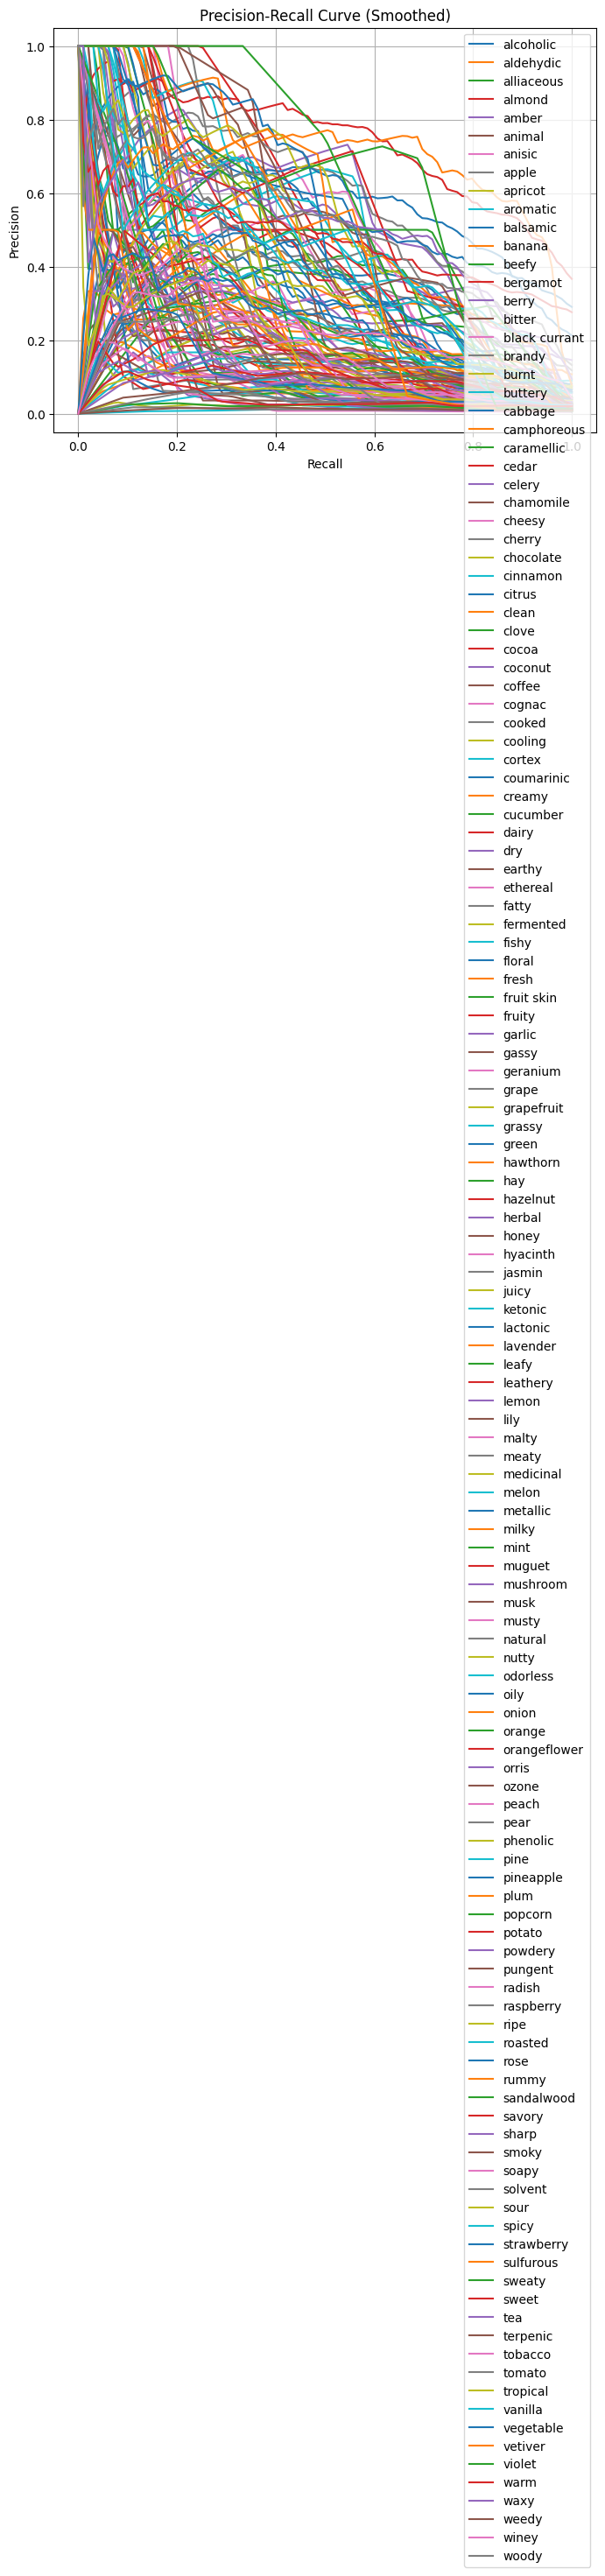

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d

plt.figure(figsize=(8, 6))

for i in range(y_true.shape[1]):
    if np.sum(y_true[:, i]) < 5:  # Ignore labels with very few positives
        continue

    precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])

    # Remove duplicate recall values (which cause interpolation errors)
    unique_recall, unique_indices = np.unique(recall, return_index=True)
    unique_precision = precision[unique_indices]

    if len(unique_recall) > 5:  # Only smooth if enough points
        interpolator = interp1d(unique_recall, unique_precision, kind='linear', fill_value='extrapolate')
        recall_smooth = np.linspace(unique_recall.min(), unique_recall.max(), 100)
        precision_smooth = interpolator(recall_smooth)
    else:
        recall_smooth, precision_smooth = unique_recall, unique_precision

    plt.plot(recall_smooth, precision_smooth, label=TASKS[i])

plt.title('Precision-Recall Curve (Smoothed)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


In [304]:
# Capture performance of model by matching y_test and y_probs using threshold
def capture_threshold_level_pr_recall(y_test, y_probs, optimal_threshold):

    performance_compare_all = []
    label_wise_performance = {idx: {'fp': 0, 'tp': 0, 'fn': 0, 'tn': 0} for idx in range(len(TASKS))}
    for idx in range(y_test.shape[0]):
        compare = []
        for l_idx in range(y_test[idx].shape[0]):
            t_val = y_test[idx][l_idx]
            p_val = 1 if y_probs[idx][l_idx]>= optimal_threshold[l_idx] else 0

            if t_val == p_val:
                compare.append(1)
                if t_val == 1:
                    label_wise_performance[l_idx]['tp'] += 1
                else:
                    label_wise_performance[l_idx]['tn'] += 1
            else:
                compare.append(0)
                if t_val == 1:
                    label_wise_performance[l_idx]['fn'] += 1
                else:
                    label_wise_performance[l_idx]['fp'] += 1

        performance_compare_all.append(compare)

    performance_compare_all = np.asarray(performance_compare_all)

    #Calculate precision, recall and f1 based on thresholds
    pr_recall_threshold = {}

    for k, v in label_wise_performance.items():
        l_key = TASKS[k]
        precision = v['tp']/(v['tp'] + v['fp']) if (v['tp'] + v['fp']) > 0 else 0
        recall = v['tp']/(v['tp'] + v['fn']) if (v['tp'] + v['fn']) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        final_v = {'precision':round(precision,2), 'recall': round(recall,2), 'f1': round(f1,2)}
        pr_recall_threshold[l_key] = final_v

    return pr_recall_threshold, label_wise_performance

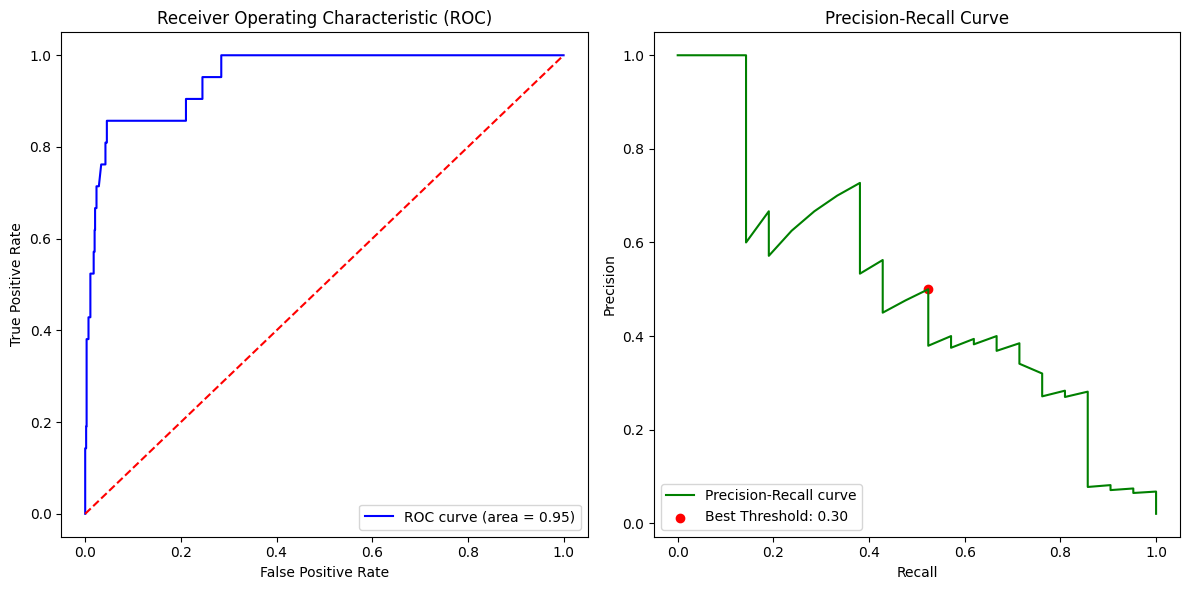

Best Threshold based on F1 Score: 0.30137152584340116


In [307]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset for demonstration
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train a logistic regression model
# model_ = LogisticRegression()
# model.fit(X_train, y_train)

lidx = 0

# Get predicted probabilities
# y_probs = fp_model.predict_proba(X_test)[lidx][:, 1]
y_prob = y_pred[:, lidx]
y_t = y_true[:, lidx]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_t, y_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_t, y_prob)

# Find the best threshold based on F1 score
f1_scores = [f1_score(y_t, (y_prob >= threshold).astype(int)) for threshold in pr_thresholds]
best_threshold_index = np.argmax(f1_scores)
best_threshold_f1 = pr_thresholds[best_threshold_index]

# Plotting ROC Curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plotting Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label='Precision-Recall curve')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label='Best Threshold: {:.2f}'.format(best_threshold_f1))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Output the best threshold found based on F1 score
print("Best Threshold based on F1 Score:", best_threshold_f1)


### GNN based odour mapping performance comparison

In [308]:
import sklearn
import json


if shrunk_dataset:
    model.restore(f"./ensemble_models_shrunkdataset2_updated2_10_100/experiments_{n_models}/checkpoint2.pt")
else:
    model.restore(f"./ensemble_models5/experiments_{n_models}/checkpoint2.pt")

predictions = model.predict(test_dataset)


all_dgl_graphs = [convert_to_dgl(g) for g in test_dataset.X]
g = dgl.batch(all_dgl_graphs)
node_feats_dataset: torch.Tensor = torch.tensor(g.ndata['x'], requires_grad = True)
edge_feats_dataset: torch.Tensor = torch.tensor(g.edata['edge_attr'], requires_grad = True)
model.model.load_graph_obj(g)
outputs = model.model(node_feats_dataset, edge_feats_dataset, torch.tensor([1])).detach().numpy()
outputs = np.squeeze(outputs)

y_pred = predictions#np.where(predictions>0.5, True, False).astype(np.int32) #.flatten()
y_true = test_dataset.y.astype(np.int32) #.flatten()
y_pred_gnn = deepcopy(y_pred)


# classification_report = sklearn.metrics.classification_report(y_true= y_true, y_pred = y_pred, target_names=TASKS, zero_division=True)


# split_list = classification_report.split('\n')
# odour_dict = {}
# for idx, s in enumerate(split_list):
#     if idx >= 2:
#         odour_properties = s.split()
#         try:
#             odour_dict[odour_properties[0]] = {'precision': odour_properties[1], 'recall': odour_properties[2],'f1_score': odour_properties[3], 'support': odour_properties[4]}
#         except:
#             pass

# odour_dict = dict(sorted(list(odour_dict.items()), key=lambda x: float(x[1]['f1_score']), reverse= True))


# high_accuracy_odours = []
# for k in odour_dict:
#     if float(odour_dict[k]['f1_score'])>= threshold:
#         high_accuracy_odours.append(k)



In [309]:
from sklearn.metrics import roc_auc_score

# y_pred_positive = np.transpose([pred[:, 1] for pred in y_pred])

# Compute the ROC AUC score for each label
# roc_auc_scores = roc_auc_score(y, y_pred_positive, average=None)

roc_auc_scores_gnn = roc_auc_score(y_true, y_pred, average=None)

In [310]:
'''
ruc_auc for fingerprint model: array([0.832     , 0.82049689, 0.85648148, 0.79444444, 0.8651772 ,
       0.85907859, 0.94960278, 0.97831978, 0.87002342, 0.95185185,
       0.7354798 , 0.81084071])
'''

'\nruc_auc for fingerprint model: array([0.832     , 0.82049689, 0.85648148, 0.79444444, 0.8651772 ,\n       0.85907859, 0.94960278, 0.97831978, 0.87002342, 0.95185185,\n       0.7354798 , 0.81084071])\n'

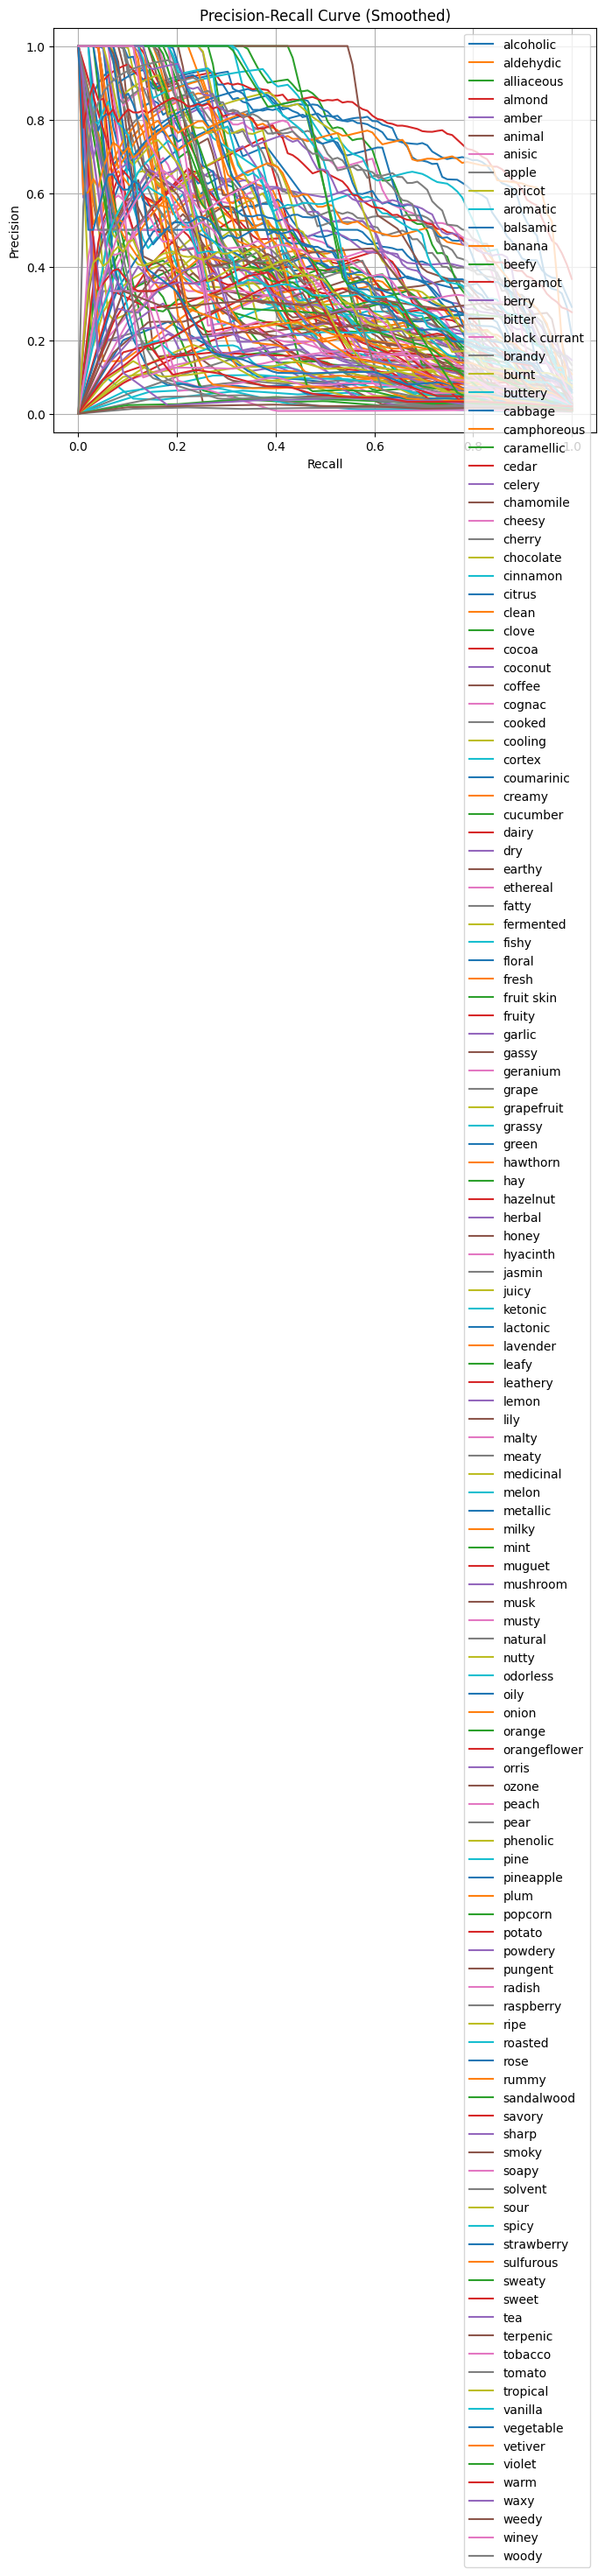

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d

plt.figure(figsize=(8, 6))

for i in range(y_true.shape[1]):
    if np.sum(y_true[:, i]) < 5:  # Ignore labels with very few positives
        continue

    precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])

    # Remove duplicate recall values (which cause interpolation errors)
    unique_recall, unique_indices = np.unique(recall, return_index=True)
    unique_precision = precision[unique_indices]

    if len(unique_recall) > 5:  # Only smooth if enough points
        interpolator = interp1d(unique_recall, unique_precision, kind='linear', fill_value='extrapolate')
        recall_smooth = np.linspace(unique_recall.min(), unique_recall.max(), 100)
        precision_smooth = interpolator(recall_smooth)
    else:
        recall_smooth, precision_smooth = unique_recall, unique_precision

    plt.plot(recall_smooth, precision_smooth, label=TASKS[i])

plt.title('Precision-Recall Curve (Smoothed)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


### Compare performance

In [312]:
import numpy as np
from sklearn.metrics import average_precision_score


def compare_models_by_label(y_true, y_pred_a, y_pred_b, TASKS, min_positives=5):
    """
    Computes Average Precision for two models (A and B) on each label and compares them.
    Skips labels with fewer than `min_positives` positive samples.
    """
    n_labels = y_true.shape[1]
    results = []

    for i in range(n_labels):
        # Skip labels with too few positives
        if np.sum(y_true[:, i]) < min_positives:
            continue

        # Compute Average Precision for each model
        ap_a = average_precision_score(y_true[:, i], y_pred_a[:, i])
        ap_b = average_precision_score(y_true[:, i], y_pred_b[:, i])

        # Determine which model wins for this label
        winner = "Model A" if ap_a > ap_b else "Model B"

        results.append({
            "label": TASKS[i],
            "ap_model_a": ap_a,
            "ap_model_b": ap_b,
            "winner": winner
        })

    return results

# Example usage:
results = compare_models_by_label(y_true, y_pred_fp, y_pred_gnn, TASKS=TASKS, min_positives=5)

results_dict = []
for r in results:
    # print(f"Label: {r['label']}")
    # print(f"  Model A AP: {r['ap_model_a']:.4f}")
    # print(f"  Model B AP: {r['ap_model_b']:.4f}")
    # print(f"  Winner:     {r['winner']}")
    # print("---")
    results_dict.append({'label': r['label'], 'fp_model_AP': round((r['ap_model_a']), 2), 'gnn_model_AP':  round((r['ap_model_b']), 2), 'winner': r['winner']})



In [313]:
print(json.dumps(results_dict, indent=1))

[
 {
  "label": "alcoholic",
  "fp_model_AP": 0.51,
  "gnn_model_AP": 0.54,
  "winner": "Model B"
 },
 {
  "label": "aldehydic",
  "fp_model_AP": 0.39,
  "gnn_model_AP": 0.48,
  "winner": "Model B"
 },
 {
  "label": "alliaceous",
  "fp_model_AP": 0.38,
  "gnn_model_AP": 0.39,
  "winner": "Model B"
 },
 {
  "label": "almond",
  "fp_model_AP": 0.24,
  "gnn_model_AP": 0.33,
  "winner": "Model B"
 },
 {
  "label": "amber",
  "fp_model_AP": 0.29,
  "gnn_model_AP": 0.34,
  "winner": "Model B"
 },
 {
  "label": "animal",
  "fp_model_AP": 0.27,
  "gnn_model_AP": 0.33,
  "winner": "Model B"
 },
 {
  "label": "anisic",
  "fp_model_AP": 0.34,
  "gnn_model_AP": 0.26,
  "winner": "Model A"
 },
 {
  "label": "apple",
  "fp_model_AP": 0.47,
  "gnn_model_AP": 0.53,
  "winner": "Model B"
 },
 {
  "label": "apricot",
  "fp_model_AP": 0.24,
  "gnn_model_AP": 0.34,
  "winner": "Model B"
 },
 {
  "label": "aromatic",
  "fp_model_AP": 0.11,
  "gnn_model_AP": 0.06,
  "winner": "Model A"
 },
 {
  "label": "ba

In [314]:
# Macro-average Precision -- more relevant for tracking performance of all labels irrespective of frequency of distribution
macro_ap_model_a = 0
macro_ap_model_b = 0
count = 0

for i in range(y_true.shape[1]):
    if np.sum(y_true[:, i]) < 5:
        continue
    macro_ap_model_a += average_precision_score(y_true[:, i], y_pred_fp[:, i])
    macro_ap_model_b += average_precision_score(y_true[:, i], y_pred_gnn[:, i])
    count += 1

macro_ap_model_a /= count
macro_ap_model_b /= count

print(f"Macro-avg AP — Model A: {macro_ap_model_a:.4f}, Model B: {macro_ap_model_b:.4f}")


Macro-avg AP — Model A: 0.3044, Model B: 0.3779


### Hapticol

In [243]:
#Getting all hapticsol smells

from bs4 import BeautifulSoup

# Sample HTML input as a string (abbreviated for brevity)
html_content = '''
<select id="select-yui_3_17_2_1_1637546567617_22184-field" name="select-yui_3_17_2_1_1637546567617_22184-field" aria-required="true">
                  
                    <option value="Lumberjack">Lumberjack</option>
                  
                    <option value="Empty Bottle">Empty Bottle</option>
                  
                    <option value="2 x 4">2 x 4</option>
                  
                    <option value="Absinthe">Absinthe</option>
                  
                    <option value="Acai Berry">Acai Berry</option>
                  
                    <option value="AF #1">AF #1</option>
                  
                    <option value="AF Woods Mens">AF Woods Mens</option>
                  
                    <option value="African Musk">African Musk</option>
                  
                    <option value="Alaskan Wild Berries">Alaskan Wild Berries</option>
                  
                    <option value="Almond Biscotti">Almond Biscotti</option>
                  
                    <option value="Almond Cookie">Almond Cookie</option>
                  
                    <option value="Almond">Almond</option>
                  
                    <option value="Almond Vanilla">Almond Vanilla</option>
                  
                    <option value="Aloe Agave">Aloe Agave</option>
                  
                    <option value="Aloha Orchid">Aloha Orchid</option>
                  
                    <option value="Alpine Martini">Alpine Martini</option>
                  
                    <option value="Amaretto Coffee">Amaretto Coffee</option>
                  
                    <option value="Amaretto">Amaretto</option>
                  
                    <option value="Amaretto Nog">Amaretto Nog</option>
                  
                    <option value="Amazon Rain Forest">Amazon Rain Forest</option>
                  
                    <option value="Amber">Amber</option>
                  
                    <option value="Amber Musk">Amber Musk</option>
                  
                    <option value="Amber Oak">Amber Oak</option>
                  
                    <option value="Amber Romance">Amber Romance</option>
                  
                    <option value="Amber Sands">Amber Sands</option>
                  
                    <option value="Amber Sunset">Amber Sunset</option>
                  
                    <option value="Amish Harvest">Amish Harvest</option>
                  
                    <option value="Angel for TM">Angel for TM</option>
                  
                    <option value="Angel Hearts">Angel Hearts</option>
                  
                    <option value="Angel Whisper">Angel Whisper</option>
                  
                    <option value="Angel Wings">Angel Wings</option>
                  
                    <option value="Angelic">Angelic</option>
                  
                    <option value="Antique Cider">Antique Cider</option>
                  
                    <option value="Apple &amp; Orange Blossom">Apple &amp; Orange Blossom</option>
                  
                    <option value="Apple Barrel Cider">Apple Barrel Cider</option>
                  
                    <option value="Apple Berry">Apple Berry</option>
                  
                    <option value="Apple Blossom">Apple Blossom</option>
                  
                    <option value="Apple Butter">Apple Butter</option>
                  
                    <option value="Apple Butter Snickerdoodle">Apple Butter Snickerdoodle</option>
                  
                    <option value="Apple Chai Tea">Apple Chai Tea</option>
                  
                    <option value="Apple Cider">Apple Cider</option>
                  
                    <option value="Apple Cinnamon">Apple Cinnamon</option>
                  
                    <option value="Apple Creek">Apple Creek</option>
                  
                    <option value="Apple Crisp">Apple Crisp</option>
                  
                    <option value="Apple Crumb Cake">Apple Crumb Cake</option>
                  
                    <option value="Apple Dumpling">Apple Dumpling</option>
                  
                    <option value="Apple Fritter">Apple Fritter</option>
                  
                    <option value="Apple Jack &amp; Peel">Apple Jack &amp; Peel</option>
                  
                    <option value="Apple Jack">Apple Jack</option>
                  
                    <option value="Apple Mandarin">Apple Mandarin</option>
                  
                    <option value="Apple Mango">Apple Mango</option>
                  
                    <option value="Apple Mint">Apple Mint</option>
                  
                    <option value="Apple Mulberry">Apple Mulberry</option>
                  
                    <option value="Apple Orange">Apple Orange</option>
                  
                    <option value="Apple Pear">Apple Pear</option>
                  
                    <option value="Apple Pie for Missy">Apple Pie for Missy</option>
                  
                    <option value="Apple Pie">Apple Pie</option>
                  
                    <option value="Apple Pie Moonshine">Apple Pie Moonshine</option>
                  
                    <option value="Apple Pumpkin">Apple Pumpkin</option>
                  
                    <option value="Apple Schnapps">Apple Schnapps</option>
                  
                    <option value="Apple Spice Cake">Apple Spice Cake</option>
                  
                    <option value="Apple Spice">Apple Spice</option>
                  
                    <option value="Apple Strudel">Apple Strudel</option>
                  
                    <option value="Apple Sugar">Apple Sugar</option>
                  
                    <option value="Apples &amp; Cream">Apples &amp; Cream</option>
                  
                    <option value="Apples &amp; Oak for Patty">Apples &amp; Oak for Patty</option>
                  
                    <option value="Apples &amp; Oak">Apples &amp; Oak</option>
                  
                    <option value="Applewood Smoked Bacon">Applewood Smoked Bacon</option>
                  
                    <option value="Apricot">Apricot</option>
                  
                    <option value="April Rain">April Rain</option>
                  
                    <option value="April Showers">April Showers</option>
                  
                    <option value="Aqua Blossom">Aqua Blossom</option>
                  
                    <option value="Aromatic Orange &amp; Evergreen">Aromatic Orange &amp; Evergreen</option>
                  
                    <option value="Aruba Coconut">Aruba Coconut</option>
                  
                    <option value="At The Fair">At The Fair</option>
                  
                    <option value="Autumn Apple">Autumn Apple</option>
                  
                    <option value="Autumn Fruit">Autumn Fruit</option>
                  
                    <option value="Autumn Harvest">Autumn Harvest</option>
                  
                    <option value="Autumn in The Park">Autumn in The Park</option>
                  
                    <option value="Autumn Leaves">Autumn Leaves</option>
                  
                    <option value="Autumn Lodge">Autumn Lodge</option>
                  
                    <option value="Autumn Mist">Autumn Mist</option>
                  
                    <option value="Autumn Sunset">Autumn Sunset</option>
                  
                    <option value="Autumn Woods">Autumn Woods</option>
                  
                    <option value="Autumn Wreath">Autumn Wreath</option>
                  
                    <option value="Avocado &amp; Olive">Avocado &amp; Olive</option>
                  
                    <option value="Awake">Awake</option>
                  
                    <option value="Awareness">Awareness</option>
                  
                    <option value="Azure Skies">Azure Skies</option>
                  
                    <option value="Baby Magic">Baby Magic</option>
                  
                    <option value="Baby Powder Berry">Baby Powder Berry</option>
                  
                    <option value="Baby Powder">Baby Powder</option>
                  
                    <option value="Baby Powder Fresh">Baby Powder Fresh</option>
                  
                    <option value="Bacon">Bacon</option>
                  
                    <option value="Badedas">Badedas</option>
                  
                    <option value="Bahama Breeze">Bahama Breeze</option>
                  
                    <option value="Baja Coconut">Baja Coconut</option>
                  
                    <option value="Baja Lemon">Baja Lemon</option>
                  
                    <option value="Baja Lime">Baja Lime</option>
                  
                    <option value="Baja Mango">Baja Mango</option>
                  
                    <option value="Baked Alaska">Baked Alaska</option>
                  
                    <option value="Baked Apple Pie">Baked Apple Pie</option>
                  
                    <option value="Bakery Air">Bakery Air</option>
                  
                    <option value="Balance">Balance</option>
                  
                    <option value="Bali Mango">Bali Mango</option>
                  
                    <option value="Balsam &amp; Cedar">Balsam &amp; Cedar</option>
                  
                    <option value="Balsam &amp; Clove">Balsam &amp; Clove</option>
                  
                    <option value="Balsam Fir">Balsam Fir</option>
                  
                    <option value="Bamboo &amp; White Grapefruit">Bamboo &amp; White Grapefruit</option>
                  
                    <option value="Bamboo">Bamboo</option>
                  
                    <option value="Bamboo Jasmine">Bamboo Jasmine</option>
                  
                    <option value="Bamboo Lime">Bamboo Lime</option>
                  
                    <option value="Bamboo Rainforest">Bamboo Rainforest</option>
                  
                    <option value="Banana Coconut">Banana Coconut</option>
                  
                    <option value="Banana Crepes">Banana Crepes</option>
                  
                    <option value="Banana Leaf &amp; Acai">Banana Leaf &amp; Acai</option>
                  
                    <option value="Banana Nut Bread">Banana Nut Bread</option>
                  
                    <option value="Banana Pudding">Banana Pudding</option>
                  
                    <option value="Bananas Foster">Bananas Foster</option>
                  
                    <option value="Bananas Royale">Bananas Royale</option>
                  
                    <option value="Barbados Cherry Blossom">Barbados Cherry Blossom</option>
                  
                    <option value="Barber Shop">Barber Shop</option>
                  
                    <option value="Barnwood">Barnwood</option>
                  
                    <option value="Bartlett Pear">Bartlett Pear</option>
                  
                    <option value="Basil Sage Mint for Patty">Basil Sage Mint for Patty</option>
                  
                    <option value="Basil Sage Mint">Basil Sage Mint</option>
                  
                    <option value="Bayberry">Bayberry</option>
                  
                    <option value="Be Enchanted">Be Enchanted</option>
                  
                    <option value="Be Still">Be Still</option>
                  
                    <option value="Be Thankful">Be Thankful</option>
                  
                    <option value="Beach Flowers">Beach Flowers</option>
                  
                    <option value="Beach Holiday">Beach Holiday</option>
                  
                    <option value="Beach">Beach</option>
                  
                    <option value="Beach Walk">Beach Walk</option>
                  
                    <option value="Beach Wood">Beach Wood</option>
                  
                    <option value="Beauty">Beauty</option>
                  
                    <option value="Beef">Beef</option>
                  
                    <option value="Beef Jerky - Peppered">Beef Jerky - Peppered</option>
                  
                    <option value="Beef Jerky - Salted">Beef Jerky - Salted</option>
                  
                    <option value="Beef Jerky - Smoked">Beef Jerky - Smoked</option>
                  
                    <option value="Beef Jerky">Beef Jerky</option>
                  
                    <option value="Belle of India">Belle of India</option>
                  
                    <option value="Bergamot &amp; Tarragon">Bergamot &amp; Tarragon</option>
                  
                    <option value="Bergamot">Bergamot</option>
                  
                    <option value="Bergamot Rosewood">Bergamot Rosewood</option>
                  
                    <option value="Bergamot Tea">Bergamot Tea</option>
                  
                    <option value="Berry Blush">Berry Blush</option>
                  
                    <option value="Berry Breeze">Berry Breeze</option>
                  
                    <option value="Berry Cobbler">Berry Cobbler</option>
                  
                    <option value="Berry Crumble">Berry Crumble</option>
                  
                    <option value="Berry Sangria">Berry Sangria</option>
                  
                    <option value="Berry Trifle">Berry Trifle</option>
                  
                    <option value="Berry Vanilla">Berry Vanilla</option>
                  
                    <option value="Berry White">Berry White</option>
                  
                    <option value="Beyond Berry">Beyond Berry</option>
                  
                    <option value="Biker Babe">Biker Babe</option>
                  
                    <option value="Bird of Paradise Creamy">Bird of Paradise Creamy</option>
                  
                    <option value="Bird of Paradise">Bird of Paradise</option>
                  
                    <option value="Birthday Cake">Birthday Cake</option>
                  
                    <option value="Biscotti">Biscotti</option>
                  
                    <option value="Bite Me">Bite Me</option>
                  
                    <option value="Bittersweet">Bittersweet</option>
                  
                    <option value="Black Canyon">Black Canyon</option>
                  
                    <option value="Black Chamomile">Black Chamomile</option>
                  
                    <option value="Black Cherry">Black Cherry</option>
                  
                    <option value="Black Cherry Merlot">Black Cherry Merlot</option>
                  
                    <option value="Black Coconut">Black Coconut</option>
                  
                    <option value="Black Fig &amp; Honey">Black Fig &amp; Honey</option>
                  
                    <option value="Black Forest Truffle">Black Forest Truffle</option>
                  
                    <option value="Black Ices Freshener">Black Ices Freshener</option>
                  
                    <option value="Black Knight">Black Knight</option>
                  
                    <option value="Black Licorice">Black Licorice</option>
                  
                    <option value="Black Pepper">Black Pepper</option>
                  
                    <option value="Black Raspberry Vanilla">Black Raspberry Vanilla</option>
                  
                    <option value="Black Sand Beach">Black Sand Beach</option>
                  
                    <option value="Black Walnut">Black Walnut</option>
                  
                    <option value="Blackberry &amp; Bay">Blackberry &amp; Bay</option>
                  
                    <option value="Blackberry &amp; Lavender">Blackberry &amp; Lavender</option>
                  
                    <option value="Blackberry Amber">Blackberry Amber</option>
                  
                    <option value="Blackberry Cobbler">Blackberry Cobbler</option>
                  
                    <option value="Blackberry">Blackberry</option>
                  
                    <option value="Blackberry Jam">Blackberry Jam</option>
                  
                    <option value="Blackberry Lemonade">Blackberry Lemonade</option>
                  
                    <option value="Blackberry Oasis">Blackberry Oasis</option>
                  
                    <option value="Blackberry Pie">Blackberry Pie</option>
                  
                    <option value="Blackberry Sage">Blackberry Sage</option>
                  
                    <option value="Blackberry Vanilla">Blackberry Vanilla</option>
                  
                    <option value="Blended Whiskey">Blended Whiskey</option>
                  
                    <option value="Bliss">Bliss</option>
                  
                    <option value="Blonde Moment">Blonde Moment</option>
                  
                    <option value="BLT Club Sandwich">BLT Club Sandwich</option>
                  
                    <option value="Blue Hydrangea">Blue Hydrangea</option>
                  
                    <option value="Blue Kiwi">Blue Kiwi</option>
                  
                    <option value="Blue Raspberry">Blue Raspberry</option>
                  
                    <option value="Blue Summer Sky">Blue Summer Sky</option>
                  
                    <option value="Blueberry Cheesecake">Blueberry Cheesecake</option>
                  
                    <option value="Blueberry Cobbler">Blueberry Cobbler</option>
                  
                    <option value="Blueberry">Blueberry</option>
                  
                    <option value="Blueberry Honeysuckle">Blueberry Honeysuckle</option>
                  
                    <option value="Blueberry Muffin">Blueberry Muffin</option>
                  
                    <option value="Blueberry Pie">Blueberry Pie</option>
                  
                    <option value="Blueberry Pomegranate">Blueberry Pomegranate</option>
                  
                    <option value="Blueberry Scone">Blueberry Scone</option>
                  
                    <option value="Blueberry Strudel">Blueberry Strudel</option>
                  
                    <option value="Blueberry Toddy">Blueberry Toddy</option>
                  
                    <option value="Boardwalk Vanilla Cone">Boardwalk Vanilla Cone</option>
                  
                    <option value="Body">Body</option>
                  
                    <option value="Boston Cream Pie">Boston Cream Pie</option>
                  
                    <option value="Bourbon Pecan">Bourbon Pecan</option>
                  
                    <option value="Bourbon Slush">Bourbon Slush</option>
                  
                    <option value="Boysenberry">Boysenberry</option>
                  
                    <option value="Brando">Brando</option>
                  
                    <option value="Brandy Pear Tart">Brandy Pear Tart</option>
                  
                    <option value="Brazilian Orchid">Brazilian Orchid</option>
                  
                    <option value="Breathe">Breathe</option>
                  
                    <option value="Brenda's Strawberry Banana">Brenda's Strawberry Banana</option>
                  
                    <option value="Bright Sunshine">Bright Sunshine</option>
                  
                    <option value="Brilliant Citrus">Brilliant Citrus</option>
                  
                    <option value="Brown Sugar &amp; Creamy Pecans">Brown Sugar &amp; Creamy Pecans</option>
                  
                    <option value="Brown Sugar &amp; Fig">Brown Sugar &amp; Fig</option>
                  
                    <option value="Brown Sugar Cinnamon">Brown Sugar Cinnamon</option>
                  
                    <option value="Bubblegum">Bubblegum</option>
                  
                    <option value="Bubbly Pomegranate">Bubbly Pomegranate</option>
                  
                    <option value="Buckeye">Buckeye</option>
                  
                    <option value="Bum Bum">Bum Bum</option>
                  
                    <option value="Bundle Up">Bundle Up</option>
                  
                    <option value="Burnt Rubber">Burnt Rubber</option>
                  
                    <option value="Butt Naked">Butt Naked</option>
                  
                    <option value="Butter Pecan">Butter Pecan</option>
                  
                    <option value="Butterbeer">Butterbeer</option>
                  
                    <option value="Buttercream Crunch">Buttercream Crunch</option>
                  
                    <option value="Buttercream Icing">Buttercream Icing</option>
                  
                    <option value="Buttercream Mint">Buttercream Mint</option>
                  
                    <option value="Buttercream Pecan">Buttercream Pecan</option>
                  
                    <option value="Buttercream">Buttercream</option>
                  
                    <option value="Buttermint">Buttermint</option>
                  
                    <option value="Butternut Spice Cake">Butternut Spice Cake</option>
                  
                    <option value="Butterrum">Butterrum</option>
                  
                    <option value="Butterscotch">Butterscotch</option>
                  
                    <option value="Butterscotch Toffee">Butterscotch Toffee</option>
                  
                    <option value="Buttery Maple Syrup">Buttery Maple Syrup</option>
                  
                    <option value="Buzy B">Buzy B</option>
                  
                    <option value="By The Chimney">By The Chimney</option>
                  
                    <option value="Cabernet">Cabernet</option>
                  
                    <option value="Cabernet Franc">Cabernet Franc</option>
                  
                    <option value="Cafe Al Fresco">Cafe Al Fresco</option>
                  
                    <option value="Cafe Au Lait">Cafe Au Lait</option>
                  
                    <option value="Cake Bake">Cake Bake</option>
                  
                    <option value="Cake Mix">Cake Mix</option>
                  
                    <option value="Campfire">Campfire</option>
                  
                    <option value="Campfire Treat">Campfire Treat</option>
                  
                    <option value="Camu Camu">Camu Camu</option>
                  
                    <option value="Candied Pecans">Candied Pecans</option>
                  
                    <option value="Candy Apple">Candy Apple</option>
                  
                    <option value="Candy Cane Bliss">Candy Cane Bliss</option>
                  
                    <option value="Candy Cane">Candy Cane</option>
                  
                    <option value="Candy Corn">Candy Corn</option>
                  
                    <option value="Cantaloupe">Cantaloupe</option>
                  
                    <option value="Cantaloupe Lily">Cantaloupe Lily</option>
                  
                    <option value="Cappuccino Brulee">Cappuccino Brulee</option>
                  
                    <option value="Captivatingly Currant">Captivatingly Currant</option>
                  
                    <option value="Caramel Apple">Caramel Apple</option>
                  
                    <option value="Caramel Brownie Cheesecake">Caramel Brownie Cheesecake</option>
                  
                    <option value="Caramel Cheesecake">Caramel Cheesecake</option>
                  
                    <option value="Caramel">Caramel</option>
                  
                    <option value="Caramel Pear">Caramel Pear</option>
                  
                    <option value="Caramel Pecan Pie">Caramel Pecan Pie</option>
                  
                    <option value="Caramelized Pecans">Caramelized Pecans</option>
                  
                    <option value="Cardamom Rose Cedar">Cardamom Rose Cedar</option>
                  
                    <option value="Caribbean Escape">Caribbean Escape</option>
                  
                    <option value="Caribbean Salsa">Caribbean Salsa</option>
                  
                    <option value="Carnation">Carnation</option>
                  
                    <option value="Caroline's Rejuvenation">Caroline's Rejuvenation</option>
                  
                    <option value="Carried Away">Carried Away</option>
                  
                    <option value="Carrot Cake">Carrot Cake</option>
                  
                    <option value="Cashmere Glow">Cashmere Glow</option>
                  
                    <option value="Cassis">Cassis</option>
                  
                    <option value="Catawba">Catawba</option>
                  
                    <option value="Catching Rays">Catching Rays</option>
                  
                    <option value="CB Original">CB Original</option>
                  
                    <option value="Cedar &amp; Amber">Cedar &amp; Amber</option>
                  
                    <option value="Cedar &amp; Rose">Cedar &amp; Rose</option>
                  
                    <option value="Cedar &amp; Saffron">Cedar &amp; Saffron</option>
                  
                    <option value="Cedar &amp; Sage">Cedar &amp; Sage</option>
                  
                    <option value="Cedar">Cedar</option>
                  
                    <option value="Cedar Mistletoe">Cedar Mistletoe</option>
                  
                    <option value="Cedarwood">Cedarwood</option>
                  
                    <option value="Cedarwood Spice">Cedarwood Spice</option>
                  
                    <option value="Cedarwood Vanilla">Cedarwood Vanilla</option>
                  
                    <option value="Celestial">Celestial</option>
                  
                    <option value="Central Park Pralines">Central Park Pralines</option>
                  
                    <option value="Chamomile">Chamomile</option>
                  
                    <option value="Charcoal">Charcoal</option>
                  
                    <option value="Chardonnay">Chardonnay</option>
                  
                    <option value="Cheesecake">Cheesecake</option>
                  
                    <option value="Cherilicious">Cherilicious</option>
                  
                    <option value="Cherries on Snow">Cherries on Snow</option>
                  
                    <option value="Cherry Almond">Cherry Almond</option>
                  
                    <option value="Cherry Berry">Cherry Berry</option>
                  
                    <option value="Cherry Blossom">Cherry Blossom</option>
                  
                    <option value="Cherry Cinnamon">Cherry Cinnamon</option>
                  
                    <option value="Cherry Cobbler">Cherry Cobbler</option>
                  
                    <option value="Cherry Coconut">Cherry Coconut</option>
                  
                    <option value="Cherry Cordials">Cherry Cordials</option>
                  
                    <option value="Cherry Float">Cherry Float</option>
                  
                    <option value="Cherry Lemon">Cherry Lemon</option>
                  
                    <option value="Cherry Lemonade">Cherry Lemonade</option>
                  
                    <option value="Cherry Limeade">Cherry Limeade</option>
                  
                    <option value="Cherry Odor Eliminator">Cherry Odor Eliminator</option>
                  
                    <option value="Cherry Slush">Cherry Slush</option>
                  
                    <option value="Cherry Vanilla">Cherry Vanilla</option>
                  
                    <option value="China Rain">China Rain</option>
                  
                    <option value="Chocolate Almond Coconut Bar">Chocolate Almond Coconut Bar</option>
                  
                    <option value="Chocolate Amber">Chocolate Amber</option>
                  
                    <option value="Chocolate Chip Cookie Dough">Chocolate Chip Cookie Dough</option>
                  
                    <option value="Chocolate Chip Cookie">Chocolate Chip Cookie</option>
                  
                    <option value="Chocolate Covered Berries">Chocolate Covered Berries</option>
                  
                    <option value="Chocolate Covered Cherries">Chocolate Covered Cherries</option>
                  
                    <option value="Chocolate Fudge Cake">Chocolate Fudge Cake</option>
                  
                    <option value="Chocolate Fudge Icing">Chocolate Fudge Icing</option>
                  
                    <option value="Chocolate Layer Cake">Chocolate Layer Cake</option>
                  
                    <option value="Chocolate Mint">Chocolate Mint</option>
                  
                    <option value="Chocolate Raspberry">Chocolate Raspberry</option>
                  
                    <option value="Chocolate Vanilla">Chocolate Vanilla</option>
                  
                    <option value="Choke Cherry">Choke Cherry</option>
                  
                    <option value="Christmas Apple">Christmas Apple</option>
                  
                    <option value="Christmas at The Beach">Christmas at The Beach</option>
                  
                    <option value="Christmas Cabernet">Christmas Cabernet</option>
                  
                    <option value="Christmas Cookie">Christmas Cookie</option>
                  
                    <option value="Christmas Cottage">Christmas Cottage</option>
                  
                    <option value="Christmas Cupcake">Christmas Cupcake</option>
                  
                    <option value="Christmas Eve">Christmas Eve</option>
                  
                    <option value="Christmas">Christmas</option>
                  
                    <option value="Christmas Jingle">Christmas Jingle</option>
                  
                    <option value="Christmas Memories">Christmas Memories</option>
                  
                    <option value="Christmas Morning for Julie">Christmas Morning for Julie</option>
                  
                    <option value="Christmas Morning">Christmas Morning</option>
                  
                    <option value="Christmas Mulberry">Christmas Mulberry</option>
                  
                    <option value="Christmas Party">Christmas Party</option>
                  
                    <option value="Christmas Pear">Christmas Pear</option>
                  
                    <option value="Christmas Spice">Christmas Spice</option>
                  
                    <option value="Christmas Splendor">Christmas Splendor</option>
                  
                    <option value="Christmas Tree">Christmas Tree</option>
                  
                    <option value="Christmas Wreath">Christmas Wreath</option>
                  
                    <option value="Christmas Yuletide">Christmas Yuletide</option>
                  
                    <option value="Cinilla">Cinilla</option>
                  
                    <option value="Cinnaberry">Cinnaberry</option>
                  
                    <option value="Cinnabun">Cinnabun</option>
                  
                    <option value="Cinnamon &amp; Sugar">Cinnamon &amp; Sugar</option>
                  
                    <option value="Cinnamon &amp; Vanilla">Cinnamon &amp; Vanilla</option>
                  
                    <option value="Cinnamon Bark">Cinnamon Bark</option>
                  
                    <option value="Cinnamon Bread">Cinnamon Bread</option>
                  
                    <option value="Cinnamon Candy">Cinnamon Candy</option>
                  
                    <option value="Cinnamon Caramel Swirl">Cinnamon Caramel Swirl</option>
                  
                    <option value="Cinnamon Clove &amp; Spice">Cinnamon Clove &amp; Spice</option>
                  
                    <option value="Cinnamon Cranberry">Cinnamon Cranberry</option>
                  
                    <option value="Cinnamon French Toast">Cinnamon French Toast</option>
                  
                    <option value="Cinnamon Nutmeg Clove">Cinnamon Nutmeg Clove</option>
                  
                    <option value="Cinnamon Raisin Bread">Cinnamon Raisin Bread</option>
                  
                    <option value="Cinnamon Roll">Cinnamon Roll</option>
                  
                    <option value="Cinnamon Spice">Cinnamon Spice</option>
                  
                    <option value="Cinnamon Splendor">Cinnamon Splendor</option>
                  
                    <option value="Cinnamon Stick">Cinnamon Stick</option>
                  
                    <option value="Cinnamon Sugar">Cinnamon Sugar</option>
                  
                    <option value="Cinnamon Sugared Donut">Cinnamon Sugared Donut</option>
                  
                    <option value="Cinnamon Toast Crunch">Cinnamon Toast Crunch</option>
                  
                    <option value="Cinnamon Toast">Cinnamon Toast</option>
                  
                    <option value="Cinnamon Vanilla">Cinnamon Vanilla</option>
                  
                    <option value="Citronella Berry">Citronella Berry</option>
                  
                    <option value="Citronella">Citronella</option>
                  
                    <option value="Citronella Lemon">Citronella Lemon</option>
                  
                    <option value="Citronella Orange">Citronella Orange</option>
                  
                    <option value="Citronella Vanilla">Citronella Vanilla</option>
                  
                    <option value="Citrus &amp; Spice">Citrus &amp; Spice</option>
                  
                    <option value="Citrus Blast">Citrus Blast</option>
                  
                    <option value="Citrus Flip">Citrus Flip</option>
                  
                    <option value="Citrus Garland">Citrus Garland</option>
                  
                    <option value="Citrus Odor Eliminator">Citrus Odor Eliminator</option>
                  
                    <option value="Citrus Punch">Citrus Punch</option>
                  
                    <option value="Citrus Rain">Citrus Rain</option>
                  
                    <option value="Citrus Rose">Citrus Rose</option>
                  
                    <option value="Citrus Tango">Citrus Tango</option>
                  
                    <option value="Clausberry">Clausberry</option>
                  
                    <option value="Clean Breeze">Clean Breeze</option>
                  
                    <option value="Clean Cotton">Clean Cotton</option>
                  
                    <option value="Clean Mist">Clean Mist</option>
                  
                    <option value="Cleansing">Cleansing</option>
                  
                    <option value="Clove &amp; Cinnamon">Clove &amp; Cinnamon</option>
                  
                    <option value="Clove">Clove</option>
                  
                    <option value="Coco Puffs">Coco Puffs</option>
                  
                    <option value="Cocoa Mango">Cocoa Mango</option>
                  
                    <option value="Cocobolo Wood">Cocobolo Wood</option>
                  
                    <option value="Coconut &amp; Vanilla Bean">Coconut &amp; Vanilla Bean</option>
                  
                    <option value="Coconut Bay">Coconut Bay</option>
                  
                    <option value="Coconut Bourbon">Coconut Bourbon</option>
                  
                    <option value="Coconut Cream">Coconut Cream</option>
                  
                    <option value="Coconut Creme Brûlée">Coconut Creme Brûlée</option>
                  
                    <option value="Coconut">Coconut</option>
                  
                    <option value="Coconut Grove">Coconut Grove</option>
                  
                    <option value="Coconut Honeysuckle &amp; Passion Fruit">Coconut Honeysuckle &amp; Passion Fruit</option>
                  
                    <option value="Coconut Lime">Coconut Lime</option>
                  
                    <option value="Coconut Lime Verbena">Coconut Lime Verbena</option>
                  
                    <option value="Coconut Milk &amp; Lavender">Coconut Milk &amp; Lavender</option>
                  
                    <option value="Coconut Milk &amp; Papaya">Coconut Milk &amp; Papaya</option>
                  
                    <option value="Coconut Mint Drop">Coconut Mint Drop</option>
                  
                    <option value="Coconut Pineapple">Coconut Pineapple</option>
                  
                    <option value="Coconut Pumpkin Latte">Coconut Pumpkin Latte</option>
                  
                    <option value="Coffee - Fresh Ground">Coffee - Fresh Ground</option>
                  
                    <option value="Coffee - Turkish Blend">Coffee - Turkish Blend</option>
                  
                    <option value="Coffee Bean">Coffee Bean</option>
                  
                    <option value="Coffee Break">Coffee Break</option>
                  
                    <option value="Coffee Cake &amp; Spice">Coffee Cake &amp; Spice</option>
                  
                    <option value="Coffee Cake">Coffee Cake</option>
                  
                    <option value="Coffee Caramel Cream">Coffee Caramel Cream</option>
                  
                    <option value="Coffee Flan">Coffee Flan</option>
                  
                    <option value="Cognac &amp; Cream">Cognac &amp; Cream</option>
                  
                    <option value="Cola">Cola</option>
                  
                    <option value="Comfort">Comfort</option>
                  
                    <option value="Confidence">Confidence</option>
                  
                    <option value="Cookie Dough">Cookie Dough</option>
                  
                    <option value="Cookies For Santa">Cookies For Santa</option>
                  
                    <option value="Cool Citrus Basil">Cool Citrus Basil</option>
                  
                    <option value="Cool Coconut Colada">Cool Coconut Colada</option>
                  
                    <option value="Cool Tropical Breeze">Cool Tropical Breeze</option>
                  
                    <option value="Cool Water">Cool Water</option>
                  
                    <option value="Cooling">Cooling</option>
                  
                    <option value="Coral Delight">Coral Delight</option>
                  
                    <option value="Coriander Bergamot">Coriander Bergamot</option>
                  
                    <option value="Coriander Rosewood">Coriander Rosewood</option>
                  
                    <option value="Cornbread Pudding">Cornbread Pudding</option>
                  
                    <option value="Cornucopia For Liz">Cornucopia For Liz</option>
                  
                    <option value="Cornucopia">Cornucopia</option>
                  
                    <option value="Cottage Breeze">Cottage Breeze</option>
                  
                    <option value="Cotton Blossom">Cotton Blossom</option>
                  
                    <option value="Cotton Candy">Cotton Candy</option>
                  
                    <option value="Country Air">Country Air</option>
                  
                    <option value="Country Apple">Country Apple</option>
                  
                    <option value="Country Apples &amp; Berries">Country Apples &amp; Berries</option>
                  
                    <option value="Country Berry Hotcakes">Country Berry Hotcakes</option>
                  
                    <option value="Country Blueberry">Country Blueberry</option>
                  
                    <option value="Country Cinnamon">Country Cinnamon</option>
                  
                    <option value="Country Coconut">Country Coconut</option>
                  
                    <option value="Country Cranberry">Country Cranberry</option>
                  
                    <option value="Country Heather">Country Heather</option>
                  
                    <option value="Country Kitchen">Country Kitchen</option>
                  
                    <option value="Country Orange Spice">Country Orange Spice</option>
                  
                    <option value="Country Raspberry">Country Raspberry</option>
                  
                    <option value="Country Spice">Country Spice</option>
                  
                    <option value="Country Vanilla">Country Vanilla</option>
                  
                    <option value="Cozy Sweater">Cozy Sweater</option>
                  
                    <option value="Cran-Apple">Cran-Apple</option>
                  
                    <option value="Cran-Grape">Cran-Grape</option>
                  
                    <option value="Cran-Orange">Cran-Orange</option>
                  
                    <option value="Cranberry Bog">Cranberry Bog</option>
                  
                    <option value="Cranberry Chutney">Cranberry Chutney</option>
                  
                    <option value="Cranberry Cobbler">Cranberry Cobbler</option>
                  
                    <option value="Cranberry Cream">Cranberry Cream</option>
                  
                    <option value="Cranberry Crumble">Cranberry Crumble</option>
                  
                    <option value="Cranberry Crush for Diana">Cranberry Crush for Diana</option>
                  
                    <option value="Cranberry Crush">Cranberry Crush</option>
                  
                    <option value="Cranberry Mango">Cranberry Mango</option>
                  
                    <option value="Cranberry Muffin">Cranberry Muffin</option>
                  
                    <option value="Cranberry Orange &amp; Peach">Cranberry Orange &amp; Peach</option>
                  
                    <option value="Cranberry Orange Bread">Cranberry Orange Bread</option>
                  
                    <option value="Cranberry Pear Bellini">Cranberry Pear Bellini</option>
                  
                    <option value="Cranberry Pine">Cranberry Pine</option>
                  
                    <option value="Cranberry Relish">Cranberry Relish</option>
                  
                    <option value="Cranberry Tangerine">Cranberry Tangerine</option>
                  
                    <option value="Cranberry Twist">Cranberry Twist</option>
                  
                    <option value="Cranberry Woods">Cranberry Woods</option>
                  
                    <option value="Cranilla">Cranilla</option>
                  
                    <option value="Cream Cheese">Cream Cheese</option>
                  
                    <option value="Creme Brûlée for Carol">Creme Brûlée for Carol</option>
                  
                    <option value="Creme Brûlée">Creme Brûlée</option>
                  
                    <option value="Crisp Morning Air">Crisp Morning Air</option>
                  
                    <option value="Crisp Orchard Spice">Crisp Orchard Spice</option>
                  
                    <option value="Crown">Crown</option>
                  
                    <option value="Crumb Top">Crumb Top</option>
                  
                    <option value="Cucumber &amp; Cantaloupe">Cucumber &amp; Cantaloupe</option>
                  
                    <option value="Cucumber Blossom">Cucumber Blossom</option>
                  
                    <option value="Cucumber">Cucumber</option>
                  
                    <option value="Cucumber Lime">Cucumber Lime</option>
                  
                    <option value="Cucumber Melon">Cucumber Melon</option>
                  
                    <option value="Cucumber Oakmoss">Cucumber Oakmoss</option>
                  
                    <option value="Cucumber Pamplemousse">Cucumber Pamplemousse</option>
                  
                    <option value="Currant">Currant</option>
                  
                    <option value="Custard">Custard</option>
                  
                    <option value="Daffodil">Daffodil</option>
                  
                    <option value="Daisy">Daisy</option>
                  
                    <option value="Dancing Waters">Dancing Waters</option>
                  
                    <option value="Dark Kiss">Dark Kiss</option>
                  
                    <option value="Daybreak">Daybreak</option>
                  
                    <option value="Debbie's Odor Eliminator">Debbie's Odor Eliminator</option>
                  
                    <option value="Decadent Chocolate Roll">Decadent Chocolate Roll</option>
                  
                    <option value="Deck The Halls">Deck The Halls</option>
                  
                    <option value="Desert Sage">Desert Sage</option>
                  
                    <option value="Dewberry">Dewberry</option>
                  
                    <option value="Dewdrop">Dewdrop</option>
                  
                    <option value="Dirt">Dirt</option>
                  
                    <option value="Dirt Pudding">Dirt Pudding</option>
                  
                    <option value="Distillery">Distillery</option>
                  
                    <option value="Diva">Diva</option>
                  
                    <option value="Downy Clean Breeze">Downy Clean Breeze</option>
                  
                    <option value="Dragon Fruit">Dragon Fruit</option>
                  
                    <option value="Dragon's Blood">Dragon's Blood</option>
                  
                    <option value="Dream">Dream</option>
                  
                    <option value="Dreamsicle">Dreamsicle</option>
                  
                    <option value="Dreamweaver">Dreamweaver</option>
                  
                    <option value="Dreamy Summer Nights">Dreamy Summer Nights</option>
                  
                    <option value="Drift Away">Drift Away</option>
                  
                    <option value="Driftwood &amp; Sea Salt">Driftwood &amp; Sea Salt</option>
                  
                    <option value="Driftwood">Driftwood</option>
                  
                    <option value="Early Sunrise">Early Sunrise</option>
                  
                    <option value="Earth">Earth</option>
                  
                    <option value="Echo">Echo</option>
                  
                    <option value="Ecuadorian Rose">Ecuadorian Rose</option>
                  
                    <option value="Eggnog">Eggnog</option>
                  
                    <option value="Egyptian Dragon">Egyptian Dragon</option>
                  
                    <option value="Egyptian Mist">Egyptian Mist</option>
                  
                    <option value="Egyptian Musk">Egyptian Musk</option>
                  
                    <option value="Elderberry Wine">Elderberry Wine</option>
                  
                    <option value="Enchanted Oaks">Enchanted Oaks</option>
                  
                    <option value="English Ivy">English Ivy</option>
                  
                    <option value="Eucalyptus Blossom">Eucalyptus Blossom</option>
                  
                    <option value="Eucalyptus Breeze">Eucalyptus Breeze</option>
                  
                    <option value="Eucalyptus">Eucalyptus</option>
                  
                    <option value="Eucalyptus Garden">Eucalyptus Garden</option>
                  
                    <option value="Eucalyptus Leaf">Eucalyptus Leaf</option>
                  
                    <option value="Eucalyptus Lemongrass">Eucalyptus Lemongrass</option>
                  
                    <option value="Eucalyptus Mint">Eucalyptus Mint</option>
                  
                    <option value="Eucalyptus Rain">Eucalyptus Rain</option>
                  
                    <option value="Eucalyptus Spearmint">Eucalyptus Spearmint</option>
                  
                    <option value="Evergreen">Evergreen</option>
                  
                    <option value="Exhaust Gas">Exhaust Gas</option>
                  
                    <option value="Exotic Bloom">Exotic Bloom</option>
                  
                    <option value="Exotic Coconut">Exotic Coconut</option>
                  
                    <option value="Fairy Dust">Fairy Dust</option>
                  
                    <option value="Fall Lakeside Breeze">Fall Lakeside Breeze</option>
                  
                    <option value="Fall Leaves">Fall Leaves</option>
                  
                    <option value="Farmer's Market">Farmer's Market</option>
                  
                    <option value="Farmhouse Apple">Farmhouse Apple</option>
                  
                    <option value="Fierce">Fierce</option>
                  
                    <option value="Fig &amp; Melon">Fig &amp; Melon</option>
                  
                    <option value="Fig &amp; Olive">Fig &amp; Olive</option>
                  
                    <option value="Fig">Fig</option>
                  
                    <option value="Fig Kiwi">Fig Kiwi</option>
                  
                    <option value="Fir Clove">Fir Clove</option>
                  
                    <option value="Fireside for Amber">Fireside for Amber</option>
                  
                    <option value="Fireweed">Fireweed</option>
                  
                    <option value="Fireworks">Fireworks</option>
                  
                    <option value="First Down">First Down</option>
                  
                    <option value="Flirtatious">Flirtatious</option>
                  
                    <option value="Floral Breeze">Floral Breeze</option>
                  
                    <option value="Floral Odor Eliminator">Floral Odor Eliminator</option>
                  
                    <option value="Floral Rain">Floral Rain</option>
                  
                    <option value="Flowering Dogwood">Flowering Dogwood</option>
                  
                    <option value="Flowering Lichen">Flowering Lichen</option>
                  
                    <option value="Flowering Yucca">Flowering Yucca</option>
                  
                    <option value="Flowers In The Sun">Flowers In The Sun</option>
                  
                    <option value="Fluffy Towels">Fluffy Towels</option>
                  
                    <option value="Forest">Forest</option>
                  
                    <option value="Forest Pine">Forest Pine</option>
                  
                    <option value="Forever Sunshine">Forever Sunshine</option>
                  
                    <option value="Forget Me Not">Forget Me Not</option>
                  
                    <option value="Frankincense &amp; Myrrh">Frankincense &amp; Myrrh</option>
                  
                    <option value="Frappuccino">Frappuccino</option>
                  
                    <option value="French Fries">French Fries</option>
                  
                    <option value="French Lavender">French Lavender</option>
                  
                    <option value="French Merlot">French Merlot</option>
                  
                    <option value="French Oak">French Oak</option>
                  
                    <option value="French Vanilla">French Vanilla</option>
                  
                    <option value="French Vanilla Oak">French Vanilla Oak</option>
                  
                    <option value="Fresh &amp; Clean">Fresh &amp; Clean</option>
                  
                    <option value="Fresh Apple">Fresh Apple</option>
                  
                    <option value="Fresh Apples &amp; Berries">Fresh Apples &amp; Berries</option>
                  
                    <option value="Fresh Baked Bread">Fresh Baked Bread</option>
                  
                    <option value="Fresh Comfort">Fresh Comfort</option>
                  
                    <option value="Fresh Cut Bamboo">Fresh Cut Bamboo</option>
                  
                    <option value="Fresh Cut Grass">Fresh Cut Grass</option>
                  
                    <option value="Fresh Cut Roses">Fresh Cut Roses</option>
                  
                    <option value="Fresh Cut Wood">Fresh Cut Wood</option>
                  
                    <option value="Fresh Fruit">Fresh Fruit</option>
                  
                    <option value="Fresh Ginger Lime">Fresh Ginger Lime</option>
                  
                    <option value="Fresh Ginger Orange">Fresh Ginger Orange</option>
                  
                    <option value="Fresh Green Herbs">Fresh Green Herbs</option>
                  
                    <option value="Fresh Lavender">Fresh Lavender</option>
                  
                    <option value="Fresh Lemon">Fresh Lemon</option>
                  
                    <option value="Fresh Lime Basil">Fresh Lime Basil</option>
                  
                    <option value="Fresh Linen">Fresh Linen</option>
                  
                    <option value="Fresh Melon Margarita">Fresh Melon Margarita</option>
                  
                    <option value="Fresh Mint">Fresh Mint</option>
                  
                    <option value="Fresh Peach">Fresh Peach</option>
                  
                    <option value="Fresh Pear">Fresh Pear</option>
                  
                    <option value="Fresh Picked Apples">Fresh Picked Apples</option>
                  
                    <option value="Fresh Picked First Bloom">Fresh Picked First Bloom</option>
                  
                    <option value="Fresh Picked Pear">Fresh Picked Pear</option>
                  
                    <option value="Fresh Picked Strawberries">Fresh Picked Strawberries</option>
                  
                    <option value="Fresh Picked Tangerines">Fresh Picked Tangerines</option>
                  
                    <option value="Fresh Picked Wildberries">Fresh Picked Wildberries</option>
                  
                    <option value="Fresh Plum">Fresh Plum</option>
                  
                    <option value="Fresh Raspberry">Fresh Raspberry</option>
                  
                    <option value="Fresh Sparkling Snow">Fresh Sparkling Snow</option>
                  
                    <option value="Fresh Squeezed Oranges">Fresh Squeezed Oranges</option>
                  
                    <option value="Fresh Strawberry">Fresh Strawberry</option>
                  
                    <option value="Frosted Cranberry">Frosted Cranberry</option>
                  
                    <option value="Frosted Cupcake">Frosted Cupcake</option>
                  
                    <option value="Frosted Spruce">Frosted Spruce</option>
                  
                    <option value="Frosty Pear">Frosty Pear</option>
                  
                    <option value="Fruit Fusion">Fruit Fusion</option>
                  
                    <option value="Fruit Loops">Fruit Loops</option>
                  
                    <option value="Fruit Punch">Fruit Punch</option>
                  
                    <option value="Fruit Salad">Fruit Salad</option>
                  
                    <option value="Fruity Vanilla">Fruity Vanilla</option>
                  
                    <option value="Fudge Brownie">Fudge Brownie</option>
                  
                    <option value="Gain Hawaii Aloha">Gain Hawaii Aloha</option>
                  
                    <option value="Gain">Gain</option>
                  
                    <option value="Garden of Eden">Garden of Eden</option>
                  
                    <option value="Gardenia">Gardenia</option>
                  
                    <option value="Georgia Peach">Georgia Peach</option>
                  
                    <option value="German Chocolate Cake">German Chocolate Cake</option>
                  
                    <option value="Ginger Coffee">Ginger Coffee</option>
                  
                    <option value="Ginger Cookie Cottage">Ginger Cookie Cottage</option>
                  
                    <option value="Ginger">Ginger</option>
                  
                    <option value="Ginger Lime for Sharon">Ginger Lime for Sharon</option>
                  
                    <option value="Ginger Patchouli">Ginger Patchouli</option>
                  
                    <option value="Ginger Peach">Ginger Peach</option>
                  
                    <option value="Ginger Snap Chai">Ginger Snap Chai</option>
                  
                    <option value="Ginger Snap">Ginger Snap</option>
                  
                    <option value="Gingerbread">Gingerbread</option>
                  
                    <option value="Gingerbread Man">Gingerbread Man</option>
                  
                    <option value="Gingerbread Maple">Gingerbread Maple</option>
                  
                    <option value="Gingerbread Santa">Gingerbread Santa</option>
                  
                    <option value="Gingerbread Tree">Gingerbread Tree</option>
                  
                    <option value="Go-Go-Goji">Go-Go-Goji</option>
                  
                    <option value="Golden Amber">Golden Amber</option>
                  
                    <option value="Golden Clove">Golden Clove</option>
                  
                    <option value="Golden Delicious Apple">Golden Delicious Apple</option>
                  
                    <option value="Golden Sands">Golden Sands</option>
                  
                    <option value="Good Day Sunshine">Good Day Sunshine</option>
                  
                    <option value="Grandma's Garden">Grandma's Garden</option>
                  
                    <option value="Grandma's Kitchen">Grandma's Kitchen</option>
                  
                    <option value="Grandpa's Garden">Grandpa's Garden</option>
                  
                    <option value="Granny Smith">Granny Smith</option>
                  
                    <option value="Granny's Pecan Pie">Granny's Pecan Pie</option>
                  
                    <option value="Grape Berry">Grape Berry</option>
                  
                    <option value="Grape Bubblegum">Grape Bubblegum</option>
                  
                    <option value="Grape Champagne">Grape Champagne</option>
                  
                    <option value="Grape Jelly Bean">Grape Jelly Bean</option>
                  
                    <option value="Grape Jelly">Grape Jelly</option>
                  
                    <option value="Grapefruit &amp; Ginger">Grapefruit &amp; Ginger</option>
                  
                    <option value="Grapefruit Vanilla">Grapefruit Vanilla</option>
                  
                    <option value="Grapevine &amp; Oak">Grapevine &amp; Oak</option>
                  
                    <option value="Gravity">Gravity</option>
                  
                    <option value="Green Apple">Green Apple</option>
                  
                    <option value="Green Clover &amp; Aloe">Green Clover &amp; Aloe</option>
                  
                    <option value="Green">Green</option>
                  
                    <option value="Green Grass">Green Grass</option>
                  
                    <option value="Green Tea">Green Tea</option>
                  
                    <option value="Green Valley Meadows">Green Valley Meadows</option>
                  
                    <option value="Guiness">Guiness</option>
                  
                    <option value="Gun Metal">Gun Metal</option>
                  
                    <option value="Gunpowder">Gunpowder</option>
                  
                    <option value="Hansel &amp; Gretel's House">Hansel &amp; Gretel's House</option>
                  
                    <option value="Happiness">Happiness</option>
                  
                    <option value="Harvest Moon">Harvest Moon</option>
                  
                    <option value="Harvest">Harvest</option>
                  
                    <option value="Harvest Welcome">Harvest Welcome</option>
                  
                    <option value="Havana Cabana">Havana Cabana</option>
                  
                    <option value="Hawaiian Dream">Hawaiian Dream</option>
                  
                    <option value="Hayride">Hayride</option>
                  
                    <option value="Hazelnut Coffee">Hazelnut Coffee</option>
                  
                    <option value="Hazelnut Cream">Hazelnut Cream</option>
                  
                    <option value="Hazelnut">Hazelnut</option>
                  
                    <option value="Heart">Heart</option>
                  
                    <option value="Hearts &amp; Flowers">Hearts &amp; Flowers</option>
                  
                    <option value="Heather">Heather</option>
                  
                    <option value="Heather's Lavender">Heather's Lavender</option>
                  
                    <option value="Heaven">Heaven</option>
                  
                    <option value="Heavenly Honeysuckle">Heavenly Honeysuckle</option>
                  
                    <option value="Hemingway">Hemingway</option>
                  
                    <option value="Herbal Essence">Herbal Essence</option>
                  
                    <option value="Hibiscus &amp; White Amber">Hibiscus &amp; White Amber</option>
                  
                    <option value="Hibiscus">Hibiscus</option>
                  
                    <option value="Hickory">Hickory</option>
                  
                    <option value="Hidden Lake">Hidden Lake</option>
                  
                    <option value="High Octane">High Octane</option>
                  
                    <option value="Hippy Corset">Hippy Corset</option>
                  
                    <option value="Holiday Bayberry">Holiday Bayberry</option>
                  
                    <option value="Holiday Cheer">Holiday Cheer</option>
                  
                    <option value="Holiday Garland">Holiday Garland</option>
                  
                    <option value="Holly Berry &amp; Ivy">Holly Berry &amp; Ivy</option>
                  
                    <option value="Holly Berry">Holly Berry</option>
                  
                    <option value="Holly Berry Wreath">Holly Berry Wreath</option>
                  
                    <option value="Home for The Holidays">Home for The Holidays</option>
                  
                    <option value="Home Sweet Home">Home Sweet Home</option>
                  
                    <option value="Homespun Sugar">Homespun Sugar</option>
                  
                    <option value="Honey &amp; Oatmeal">Honey &amp; Oatmeal</option>
                  
                    <option value="Honey Blossom">Honey Blossom</option>
                  
                    <option value="Honey Cornbread">Honey Cornbread</option>
                  
                    <option value="Honey">Honey</option>
                  
                    <option value="Honey Mango">Honey Mango</option>
                  
                    <option value="Honey Pear Cider">Honey Pear Cider</option>
                  
                    <option value="Honey, Do!">Honey, Do!</option>
                  
                    <option value="Honeydew Blossom">Honeydew Blossom</option>
                  
                    <option value="Honeydew Melon">Honeydew Melon</option>
                  
                    <option value="Honeydew Pear">Honeydew Pear</option>
                  
                    <option value="Honeysuckle">Honeysuckle</option>
                  
                    <option value="Honeysuckle Rose">Honeysuckle Rose</option>
                  
                    <option value="Hot Buckeye Maple Toddy">Hot Buckeye Maple Toddy</option>
                  
                    <option value="Hot Buttered Popcorn">Hot Buttered Popcorn</option>
                  
                    <option value="Hot Chocolate">Hot Chocolate</option>
                  
                    <option value="Hot Fudge Cake">Hot Fudge Cake</option>
                  
                    <option value="Hot Vermont Maple Toddy">Hot Vermont Maple Toddy</option>
                  
                    <option value="Huckleberry">Huckleberry</option>
                  
                    <option value="Huckleberry Pie">Huckleberry Pie</option>
                  
                    <option value="Huge Rich Chocolate">Huge Rich Chocolate</option>
                  
                    <option value="Hummer (M)">Hummer (M)</option>
                  
                    <option value="Hyacinth">Hyacinth</option>
                  
                    <option value="Hydrangea">Hydrangea</option>
                  
                    <option value="Iced Cookies">Iced Cookies</option>
                  
                    <option value="Iced Gingerbread">Iced Gingerbread</option>
                  
                    <option value="Iced Orange Pineapple">Iced Orange Pineapple</option>
                  
                    <option value="Iced Pineapple">Iced Pineapple</option>
                  
                    <option value="In The Sun">In The Sun</option>
                  
                    <option value="Incense">Incense</option>
                  
                    <option value="India Moon">India Moon</option>
                  
                    <option value="Inner Peace">Inner Peace</option>
                  
                    <option value="Irish Cream">Irish Cream</option>
                  
                    <option value="Irresistible Apple">Irresistible Apple</option>
                  
                    <option value="Island Bouquet">Island Bouquet</option>
                  
                    <option value="Island Breeze">Island Breeze</option>
                  
                    <option value="Island Colada">Island Colada</option>
                  
                    <option value="Island Fresh">Island Fresh</option>
                  
                    <option value="Island Getaway">Island Getaway</option>
                  
                    <option value="Island Guava">Island Guava</option>
                  
                    <option value="Island Mango &amp; Coconut">Island Mango &amp; Coconut</option>
                  
                    <option value="Island Mango">Island Mango</option>
                  
                    <option value="Island Spa">Island Spa</option>
                  
                    <option value="Italian Cream Cake">Italian Cream Cake</option>
                  
                    <option value="Jack Frost">Jack Frost</option>
                  
                    <option value="Jade">Jade</option>
                  
                    <option value="Jamaican Breeze">Jamaican Breeze</option>
                  
                    <option value="Japanese Cherry Blossom">Japanese Cherry Blossom</option>
                  
                    <option value="Japanese Lotus Blossom">Japanese Lotus Blossom</option>
                  
                    <option value="Jasmine &amp; Melon">Jasmine &amp; Melon</option>
                  
                    <option value="Jasmine">Jasmine</option>
                  
                    <option value="Jasmine Orchidea">Jasmine Orchidea</option>
                  
                    <option value="Jelly Bean">Jelly Bean</option>
                  
                    <option value="Jelly Donut">Jelly Donut</option>
                  
                    <option value="Jergen's Cinnamon">Jergen's Cinnamon</option>
                  
                    <option value="Jeweled Citrus">Jeweled Citrus</option>
                  
                    <option value="Jolly Good Grapefruit">Jolly Good Grapefruit</option>
                  
                    <option value="Juicy Apple">Juicy Apple</option>
                  
                    <option value="Juicy Cherry">Juicy Cherry</option>
                  
                    <option value="Juicy Grapefruit">Juicy Grapefruit</option>
                  
                    <option value="Juicy Orange">Juicy Orange</option>
                  
                    <option value="Juicy Passion Fruit Punch">Juicy Passion Fruit Punch</option>
                  
                    <option value="Juicy Peach">Juicy Peach</option>
                  
                    <option value="Juicy Watermelon">Juicy Watermelon</option>
                  
                    <option value="Julie's Christmas">Julie's Christmas</option>
                  
                    <option value="Juniper Breeze">Juniper Breeze</option>
                  
                    <option value="Juniperberry">Juniperberry</option>
                  
                    <option value="Kandy Bar">Kandy Bar</option>
                  
                    <option value="Kelly's Sugar Cookie">Kelly's Sugar Cookie</option>
                  
                    <option value="Kentucky Bourbon Ball">Kentucky Bourbon Ball</option>
                  
                    <option value="Kettle Corn">Kettle Corn</option>
                  
                    <option value="Key Lime Biscotti">Key Lime Biscotti</option>
                  
                    <option value="Key Lime">Key Lime</option>
                  
                    <option value="Key Lime Pie">Key Lime Pie</option>
                  
                    <option value="Killer Viller">Killer Viller</option>
                  
                    <option value="Kim's Bayberry">Kim's Bayberry</option>
                  
                    <option value="Kitchen Apple Mint">Kitchen Apple Mint</option>
                  
                    <option value="Kitchen">Kitchen</option>
                  
                    <option value="Kitchen Lemon">Kitchen Lemon</option>
                  
                    <option value="Kitchen Mandarin">Kitchen Mandarin</option>
                  
                    <option value="Kiwi Berries">Kiwi Berries</option>
                  
                    <option value="Kiwi">Kiwi</option>
                  
                    <option value="Kiwi Lime">Kiwi Lime</option>
                  
                    <option value="Kiwi Melon">Kiwi Melon</option>
                  
                    <option value="Kumquat">Kumquat</option>
                  
                    <option value="KY Butter Rum">KY Butter Rum</option>
                  
                    <option value="Lake Sunset">Lake Sunset</option>
                  
                    <option value="Lakeside Birch">Lakeside Birch</option>
                  
                    <option value="Lavender &amp; Satin">Lavender &amp; Satin</option>
                  
                    <option value="Lavender Blossom">Lavender Blossom</option>
                  
                    <option value="Lavender Breeze">Lavender Breeze</option>
                  
                    <option value="Lavender English">Lavender English</option>
                  
                    <option value="Lavender Fair">Lavender Fair</option>
                  
                    <option value="Lavender Fields">Lavender Fields</option>
                  
                    <option value="Lavender">Lavender</option>
                  
                    <option value="Lavender Marshmallow">Lavender Marshmallow</option>
                  
                    <option value="Lavender Pound Cake">Lavender Pound Cake</option>
                  
                    <option value="Lavender Rose">Lavender Rose</option>
                  
                    <option value="Lavender Sage">Lavender Sage</option>
                  
                    <option value="Lavender Smooth">Lavender Smooth</option>
                  
                    <option value="Lavender Special">Lavender Special</option>
                  
                    <option value="Lavender Spice">Lavender Spice</option>
                  
                    <option value="Lavender Sunset">Lavender Sunset</option>
                  
                    <option value="Lavender Vanilla">Lavender Vanilla</option>
                  
                    <option value="Leather">Leather</option>
                  
                    <option value="Leaves">Leaves</option>
                  
                    <option value="Lemon Blossom">Lemon Blossom</option>
                  
                    <option value="Lemon Chiffon">Lemon Chiffon</option>
                  
                    <option value="Lemon Cinnamint">Lemon Cinnamint</option>
                  
                    <option value="Lemon Cupcake">Lemon Cupcake</option>
                  
                    <option value="Lemon Custard">Lemon Custard</option>
                  
                    <option value="Lemon Grapefruit">Lemon Grapefruit</option>
                  
                    <option value="Lemon Kitchen Spice">Lemon Kitchen Spice</option>
                  
                    <option value="Lemon Lavender">Lemon Lavender</option>
                  
                    <option value="Lemon Meringue">Lemon Meringue</option>
                  
                    <option value="Lemon Pine">Lemon Pine</option>
                  
                    <option value="Lemon Poppy Seed">Lemon Poppy Seed</option>
                  
                    <option value="Lemon Pound Cake">Lemon Pound Cake</option>
                  
                    <option value="Lemon Tart">Lemon Tart</option>
                  
                    <option value="Lemon Twist">Lemon Twist</option>
                  
                    <option value="Lemonade">Lemonade</option>
                  
                    <option value="Lemongrass Coconut">Lemongrass Coconut</option>
                  
                    <option value="Lemongrass Eucalyptus">Lemongrass Eucalyptus</option>
                  
                    <option value="Lemongrass">Lemongrass</option>
                  
                    <option value="Lemongrass Grapefruit">Lemongrass Grapefruit</option>
                  
                    <option value="Lemongrass Kiwi Cassis">Lemongrass Kiwi Cassis</option>
                  
                    <option value="Lemongrass Sage">Lemongrass Sage</option>
                  
                    <option value="Lemongrass Vanilla">Lemongrass Vanilla</option>
                  
                    <option value="Lemongrass Verbena">Lemongrass Verbena</option>
                  
                    <option value="Lettuce">Lettuce</option>
                  
                    <option value="Lick Me All Over">Lick Me All Over</option>
                  
                    <option value="Lilac Blossom">Lilac Blossom</option>
                  
                    <option value="Lilac">Lilac</option>
                  
                    <option value="Lilac Rain">Lilac Rain</option>
                  
                    <option value="Lilacs &amp; Violets">Lilacs &amp; Violets</option>
                  
                    <option value="Lily of the Valley">Lily of the Valley</option>
                  
                    <option value="Lime Blossom Tea">Lime Blossom Tea</option>
                  
                    <option value="Limoncello Sparkle">Limoncello Sparkle</option>
                  
                    <option value="Line Dried Cotton">Line Dried Cotton</option>
                  
                    <option value="Lisa's Sugar Cookie">Lisa's Sugar Cookie</option>
                  
                    <option value="Liza Jane">Liza Jane</option>
                  
                    <option value="Lotus Blossom">Lotus Blossom</option>
                  
                    <option value="Lotus Santal">Lotus Santal</option>
                  
                    <option value="Love on the Beach">Love on the Beach</option>
                  
                    <option value="Loves Me Loves Me Not">Loves Me Loves Me Not</option>
                  
                    <option value="Lovespell">Lovespell</option>
                  
                    <option value="Lucky In Love">Lucky In Love</option>
                  
                    <option value="Lumberjack">Lumberjack</option>
                  
                    <option value="Luna">Luna</option>
                  
                    <option value="Lunar Eclipse">Lunar Eclipse</option>
                  
                    <option value="Luscious Plum">Luscious Plum</option>
                  
                    <option value="Lush Berries">Lush Berries</option>
                  
                    <option value="MacIntosh Apple">MacIntosh Apple</option>
                  
                    <option value="MacIntosh Spice">MacIntosh Spice</option>
                  
                    <option value="Magical Frosted Forest">Magical Frosted Forest</option>
                  
                    <option value="Magnolia">Magnolia</option>
                  
                    <option value="Magnolia Peach Raspberry">Magnolia Peach Raspberry</option>
                  
                    <option value="Mahogany">Mahogany</option>
                  
                    <option value="Mahogany Wood">Mahogany Wood</option>
                  
                    <option value="Maine Balsam">Maine Balsam</option>
                  
                    <option value="Major League Chew">Major League Chew</option>
                  
                    <option value="Man Town">Man Town</option>
                  
                    <option value="Mandarin Chestnut">Mandarin Chestnut</option>
                  
                    <option value="Mandarin Cranberry">Mandarin Cranberry</option>
                  
                    <option value="Mandarin Orange">Mandarin Orange</option>
                  
                    <option value="Mandarin Spice Cake">Mandarin Spice Cake</option>
                  
                    <option value="Mango">Mango</option>
                  
                    <option value="Mango Madness">Mango Madness</option>
                  
                    <option value="Mango Mandarin">Mango Mandarin</option>
                  
                    <option value="Mango Melon">Mango Melon</option>
                  
                    <option value="Mango Papaya">Mango Papaya</option>
                  
                    <option value="Mango Paradise">Mango Paradise</option>
                  
                    <option value="Mango Peach Salsa">Mango Peach Salsa</option>
                  
                    <option value="Mango Pomegranate">Mango Pomegranate</option>
                  
                    <option value="Maple Bourbon">Maple Bourbon</option>
                  
                    <option value="Maple Bread Pudding">Maple Bread Pudding</option>
                  
                    <option value="Maple Butter Cheesecake">Maple Butter Cheesecake</option>
                  
                    <option value="Maple Buttery">Maple Buttery</option>
                  
                    <option value="Maple Pancakes">Maple Pancakes</option>
                  
                    <option value="Maple Pecan">Maple Pecan</option>
                  
                    <option value="Maple Pumpkin">Maple Pumpkin</option>
                  
                    <option value="Maple Sugar">Maple Sugar</option>
                  
                    <option value="Maple Toddy">Maple Toddy</option>
                  
                    <option value="Maple Vanilla">Maple Vanilla</option>
                  
                    <option value="Maple Walnut">Maple Walnut</option>
                  
                    <option value="Maraschino Cherry">Maraschino Cherry</option>
                  
                    <option value="Margarita">Margarita</option>
                  
                    <option value="Margarita Moonshine">Margarita Moonshine</option>
                  
                    <option value="Market Blossoms">Market Blossoms</option>
                  
                    <option value="Marshmallow">Marshmallow</option>
                  
                    <option value="Marshmallow Pumpkin Latte">Marshmallow Pumpkin Latte</option>
                  
                    <option value="Marvin's Garden">Marvin's Garden</option>
                  
                    <option value="Meadow Mist">Meadow Mist</option>
                  
                    <option value="Meadow Showers">Meadow Showers</option>
                  
                    <option value="Mediterranean Spa">Mediterranean Spa</option>
                  
                    <option value="Mellow">Mellow</option>
                  
                    <option value="Melon Cream">Melon Cream</option>
                  
                    <option value="Melon Splash">Melon Splash</option>
                  
                    <option value="Merlot">Merlot</option>
                  
                    <option value="Meyer Lemon">Meyer Lemon</option>
                  
                    <option value="Midnight Jasmine">Midnight Jasmine</option>
                  
                    <option value="Midnight Lilac">Midnight Lilac</option>
                  
                    <option value="Midnight Pomegranate">Midnight Pomegranate</option>
                  
                    <option value="MidSummer's Night">MidSummer's Night</option>
                  
                    <option value="Mind &amp; Spirit">Mind &amp; Spirit</option>
                  
                    <option value="Mint Field">Mint Field</option>
                  
                    <option value="Mint Julep">Mint Julep</option>
                  
                    <option value="Mistletoe &amp; Fig">Mistletoe &amp; Fig</option>
                  
                    <option value="Mistletoe Kiss">Mistletoe Kiss</option>
                  
                    <option value="Mistletoe">Mistletoe</option>
                  
                    <option value="Mixed Fruit">Mixed Fruit</option>
                  
                    <option value="Mocha Cappuccino">Mocha Cappuccino</option>
                  
                    <option value="Mocha Cream">Mocha Cream</option>
                  
                    <option value="Mochadoodle">Mochadoodle</option>
                  
                    <option value="Mojito Ice">Mojito Ice</option>
                  
                    <option value="Mojo">Mojo</option>
                  
                    <option value="Monkey Bombs">Monkey Bombs</option>
                  
                    <option value="Moonlight Path">Moonlight Path</option>
                  
                    <option value="Moonlit Garden">Moonlit Garden</option>
                  
                    <option value="Morning Coffee">Morning Coffee</option>
                  
                    <option value="Morning Dew For Gerry">Morning Dew For Gerry</option>
                  
                    <option value="Morning Dew">Morning Dew</option>
                  
                    <option value="Morning Mist">Morning Mist</option>
                  
                    <option value="Mountain Berry">Mountain Berry</option>
                  
                    <option value="Mountain Breeze">Mountain Breeze</option>
                  
                    <option value="Mountain Fresh">Mountain Fresh</option>
                  
                    <option value="Mountain Lake">Mountain Lake</option>
                  
                    <option value="Mountain Lodge">Mountain Lodge</option>
                  
                    <option value="Mountain Mist">Mountain Mist</option>
                  
                    <option value="Mulberry Delight">Mulberry Delight</option>
                  
                    <option value="Mulberry">Mulberry</option>
                  
                    <option value="Mulberry Glace">Mulberry Glace</option>
                  
                    <option value="Mulberry Patch">Mulberry Patch</option>
                  
                    <option value="Mulled Cider">Mulled Cider</option>
                  
                    <option value="Mulled Wine">Mulled Wine</option>
                  
                    <option value="Mums &amp; Marigolds">Mums &amp; Marigolds</option>
                  
                    <option value="Muscadine Grape">Muscadine Grape</option>
                  
                    <option value="Musk">Musk</option>
                  
                    <option value="Muskwood">Muskwood</option>
                  
                    <option value="My Dear Watson">My Dear Watson</option>
                  
                    <option value="My Home">My Home</option>
                  
                    <option value="My Only Sunshine">My Only Sunshine</option>
                  
                    <option value="My Wish">My Wish</option>
                  
                    <option value="Nag Champa">Nag Champa</option>
                  
                    <option value="Napa Valley Harvest">Napa Valley Harvest</option>
                  
                    <option value="Napa Valley Sun">Napa Valley Sun</option>
                  
                    <option value="Nectarine Mint">Nectarine Mint</option>
                  
                    <option value="Neverland">Neverland</option>
                  
                    <option value="Niagara Falls Mist">Niagara Falls Mist</option>
                  
                    <option value="North Pole">North Pole</option>
                  
                    <option value="North Woods Balsam">North Woods Balsam</option>
                  
                    <option value="November Rain">November Rain</option>
                  
                    <option value="Nutcracker">Nutcracker</option>
                  
                    <option value="Nutcracker Suite">Nutcracker Suite</option>
                  
                    <option value="Nutmeg">Nutmeg</option>
                  
                    <option value="Nutty Caramel Crisp">Nutty Caramel Crisp</option>
                  
                    <option value="Nutty Taffy Apple">Nutty Taffy Apple</option>
                  
                    <option value="Oak Moss">Oak Moss</option>
                  
                    <option value="Oatmeal Cookie">Oatmeal Cookie</option>
                  
                    <option value="Oatmeal Spice Cake">Oatmeal Spice Cake</option>
                  
                    <option value="Ocean Breeze">Ocean Breeze</option>
                  
                    <option value="Ocean">Ocean</option>
                  
                    <option value="Ocean Star">Ocean Star</option>
                  
                    <option value="Ocean Sunset">Ocean Sunset</option>
                  
                    <option value="Oceana">Oceana</option>
                  
                    <option value="Oceanside">Oceanside</option>
                  
                    <option value="Odor Mask/Eliminator">Odor Mask/Eliminator</option>
                  
                    <option value="Old Fashioned Vanilla White Cake">Old Fashioned Vanilla White Cake</option>
                  
                    <option value="Old Spice">Old Spice</option>
                  
                    <option value="Olde Town Bake Shop">Olde Town Bake Shop</option>
                  
                    <option value="OMG Olive">OMG Olive</option>
                  
                    <option value="Orange &amp; Goji Berry">Orange &amp; Goji Berry</option>
                  
                    <option value="Orange Blossom">Orange Blossom</option>
                  
                    <option value="Orange Buttercream">Orange Buttercream</option>
                  
                    <option value="Orange Chiffon Cake">Orange Chiffon Cake</option>
                  
                    <option value="Orange Clove">Orange Clove</option>
                  
                    <option value="Orange Danish">Orange Danish</option>
                  
                    <option value="Orange Dreamsicle">Orange Dreamsicle</option>
                  
                    <option value="Orange Drop Cookie">Orange Drop Cookie</option>
                  
                    <option value="Orange Evergreen">Orange Evergreen</option>
                  
                    <option value="Orange Ginger">Orange Ginger</option>
                  
                    <option value="Orange Gingerbread">Orange Gingerbread</option>
                  
                    <option value="Orange Goblin Cupcake">Orange Goblin Cupcake</option>
                  
                    <option value="Orange Honey">Orange Honey</option>
                  
                    <option value="Orange Lotus">Orange Lotus</option>
                  
                    <option value="Orange Mango Smoothie">Orange Mango Smoothie</option>
                  
                    <option value="Orange Marmalade">Orange Marmalade</option>
                  
                    <option value="Orange Patchouli">Orange Patchouli</option>
                  
                    <option value="Orange Slices">Orange Slices</option>
                  
                    <option value="Orange Spice">Orange Spice</option>
                  
                    <option value="Orange Tulips">Orange Tulips</option>
                  
                    <option value="Orange Vanilla">Orange Vanilla</option>
                  
                    <option value="Orange Zest">Orange Zest</option>
                  
                    <option value="Orchard Pear">Orchard Pear</option>
                  
                    <option value="Orchid">Orchid</option>
                  
                    <option value="Oreo Cookie">Oreo Cookie</option>
                  
                    <option value="Over The River">Over The River</option>
                  
                    <option value="Palo Verde">Palo Verde</option>
                  
                    <option value="Paradise Punch">Paradise Punch</option>
                  
                    <option value="Paradise Spice">Paradise Spice</option>
                  
                    <option value="Party">Party</option>
                  
                    <option value="Passion Fruit">Passion Fruit</option>
                  
                    <option value="Passion Fruit Martini">Passion Fruit Martini</option>
                  
                    <option value="Passionate Kisses">Passionate Kisses</option>
                  
                    <option value="Patchouli Amber">Patchouli Amber</option>
                  
                    <option value="Patchouli Blossom">Patchouli Blossom</option>
                  
                    <option value="Patchouli Cedarwood">Patchouli Cedarwood</option>
                  
                    <option value="Patchouli">Patchouli</option>
                  
                    <option value="Patchouli Raspberry">Patchouli Raspberry</option>
                  
                    <option value="Patchwork Quilt">Patchwork Quilt</option>
                  
                    <option value="Peace of Mind">Peace of Mind</option>
                  
                    <option value="Peach &amp; Sweet Berries">Peach &amp; Sweet Berries</option>
                  
                    <option value="Peach Bellini">Peach Bellini</option>
                  
                    <option value="Peach Berry">Peach Berry</option>
                  
                    <option value="Peach Blossom">Peach Blossom</option>
                  
                    <option value="Peach Cinnamon">Peach Cinnamon</option>
                  
                    <option value="Peach Clove">Peach Clove</option>
                  
                    <option value="Peach Cobbler">Peach Cobbler</option>
                  
                    <option value="Peach Crisp">Peach Crisp</option>
                  
                    <option value="Peach Hard Candy">Peach Hard Candy</option>
                  
                    <option value="Peach Lavender">Peach Lavender</option>
                  
                    <option value="Peach Lemonade">Peach Lemonade</option>
                  
                    <option value="Peach Magnolia">Peach Magnolia</option>
                  
                    <option value="Peach Melon">Peach Melon</option>
                  
                    <option value="Peach Pear">Peach Pear</option>
                  
                    <option value="Peach Proseco">Peach Proseco</option>
                  
                    <option value="Peaches &amp; Berries">Peaches &amp; Berries</option>
                  
                    <option value="Peaches &amp; Cream">Peaches &amp; Cream</option>
                  
                    <option value="Peaches &amp; Peonies">Peaches &amp; Peonies</option>
                  
                    <option value="Peanut Butter Cookie">Peanut Butter Cookie</option>
                  
                    <option value="Peanut Butter">Peanut Butter</option>
                  
                    <option value="Peanut Butter Oatmeal Cookie">Peanut Butter Oatmeal Cookie</option>
                  
                    <option value="Pear &amp; Vanilla Bean">Pear &amp; Vanilla Bean</option>
                  
                    <option value="Pear Blossom">Pear Blossom</option>
                  
                    <option value="Pear Delight">Pear Delight</option>
                  
                    <option value="Pear Glace">Pear Glace</option>
                  
                    <option value="Pear Vanilla">Pear Vanilla</option>
                  
                    <option value="Pearberry">Pearberry</option>
                  
                    <option value="Pearly Gates">Pearly Gates</option>
                  
                    <option value="Pecan &amp; Pralines">Pecan &amp; Pralines</option>
                  
                    <option value="Pecan Delight">Pecan Delight</option>
                  
                    <option value="Pecan">Pecan</option>
                  
                    <option value="Peony">Peony</option>
                  
                    <option value="Peppercorn">Peppercorn</option>
                  
                    <option value="Peppered Bacon">Peppered Bacon</option>
                  
                    <option value="Peppermint Bark">Peppermint Bark</option>
                  
                    <option value="Peppermint Cream">Peppermint Cream</option>
                  
                    <option value="Peppermint">Peppermint</option>
                  
                    <option value="Peppermint Hot Chocolate">Peppermint Hot Chocolate</option>
                  
                    <option value="Peppermint Stick">Peppermint Stick</option>
                  
                    <option value="Peppermint Sugar">Peppermint Sugar</option>
                  
                    <option value="Peppermint Swirls">Peppermint Swirls</option>
                  
                    <option value="Perfume">Perfume</option>
                  
                    <option value="Pheromones">Pheromones</option>
                  
                    <option value="Picnic">Picnic</option>
                  
                    <option value="Pie Crust">Pie Crust</option>
                  
                    <option value="Pima Cotton">Pima Cotton</option>
                  
                    <option value="Pina Colada">Pina Colada</option>
                  
                    <option value="Pineapple Cake">Pineapple Cake</option>
                  
                    <option value="Pineapple Cilantro">Pineapple Cilantro</option>
                  
                    <option value="Pineapple Coconut">Pineapple Coconut</option>
                  
                    <option value="Pineapple Cream">Pineapple Cream</option>
                  
                    <option value="Pineapple">Pineapple</option>
                  
                    <option value="Pineapple Mango Coconut">Pineapple Mango Coconut</option>
                  
                    <option value="Pineapple Paradise">Pineapple Paradise</option>
                  
                    <option value="Pineapple Upside Down Cake">Pineapple Upside Down Cake</option>
                  
                    <option value="Pink Bubblegum">Pink Bubblegum</option>
                  
                    <option value="Pink Grapefruit">Pink Grapefruit</option>
                  
                    <option value="Pink Grapefruit Jasmine">Pink Grapefruit Jasmine</option>
                  
                    <option value="Pink Ice Perfume">Pink Ice Perfume</option>
                  
                    <option value="Pink Lemonade">Pink Lemonade</option>
                  
                    <option value="Pink Peony">Pink Peony</option>
                  
                    <option value="Pink Sands">Pink Sands</option>
                  
                    <option value="Pink Sugar">Pink Sugar</option>
                  
                    <option value="Pizza">Pizza</option>
                  
                    <option value="Plumeria">Plumeria</option>
                  
                    <option value="Pomegranate Cider">Pomegranate Cider</option>
                  
                    <option value="Pomegranate">Pomegranate</option>
                  
                    <option value="Pomegranate Juniper">Pomegranate Juniper</option>
                  
                    <option value="Pomegranate Noir">Pomegranate Noir</option>
                  
                    <option value="Pomegranate Seeds &amp; Coconut Milk">Pomegranate Seeds &amp; Coconut Milk</option>
                  
                    <option value="Pomegranate Spice">Pomegranate Spice</option>
                  
                    <option value="Pralines &amp; Cream">Pralines &amp; Cream</option>
                  
                    <option value="Primitive Gatherings">Primitive Gatherings</option>
                  
                    <option value="Pumpkin Apple">Pumpkin Apple</option>
                  
                    <option value="Pumpkin Berry Crumble">Pumpkin Berry Crumble</option>
                  
                    <option value="Pumpkin Buttercream">Pumpkin Buttercream</option>
                  
                    <option value="Pumpkin Caramel Latte">Pumpkin Caramel Latte</option>
                  
                    <option value="Pumpkin Carrot Streusel">Pumpkin Carrot Streusel</option>
                  
                    <option value="Pumpkin Cheesecake">Pumpkin Cheesecake</option>
                  
                    <option value="Pumpkin Cookie Crunch">Pumpkin Cookie Crunch</option>
                  
                    <option value="Pumpkin Cornbread">Pumpkin Cornbread</option>
                  
                    <option value="Pumpkin Cupcake">Pumpkin Cupcake</option>
                  
                    <option value="Pumpkin Ginger Bark">Pumpkin Ginger Bark</option>
                  
                    <option value="Pumpkin Hollow">Pumpkin Hollow</option>
                  
                    <option value="Pumpkin Loaf">Pumpkin Loaf</option>
                  
                    <option value="Pumpkin MacIntosh">Pumpkin MacIntosh</option>
                  
                    <option value="Pumpkin Maple">Pumpkin Maple</option>
                  
                    <option value="Pumpkin Orange Bread">Pumpkin Orange Bread</option>
                  
                    <option value="Pumpkin Peanut Brittle">Pumpkin Peanut Brittle</option>
                  
                    <option value="Pumpkin Pecan Waffles">Pumpkin Pecan Waffles</option>
                  
                    <option value="Pumpkin Pie">Pumpkin Pie</option>
                  
                    <option value="Pumpkin Pie Moonshine">Pumpkin Pie Moonshine</option>
                  
                    <option value="Pumpkin Roll">Pumpkin Roll</option>
                  
                    <option value="Pumpkin Souffle">Pumpkin Souffle</option>
                  
                    <option value="Pumpkin Spice">Pumpkin Spice</option>
                  
                    <option value="Pumpkin Spice Latte">Pumpkin Spice Latte</option>
                  
                    <option value="Pumpkin Vanilla">Pumpkin Vanilla</option>
                  
                    <option value="Pumpkin Wreath">Pumpkin Wreath</option>
                  
                    <option value="PW Bamboo">PW Bamboo</option>
                  
                    <option value="PW Cucumber">PW Cucumber</option>
                  
                    <option value="PW Eucalyptus">PW Eucalyptus</option>
                  
                    <option value="PW Lavender">PW Lavender</option>
                  
                    <option value="PW Lilac">PW Lilac</option>
                  
                    <option value="PW Lily of The Valley+">PW Lily of The Valley+</option>
                  
                    <option value="PW Magnolia">PW Magnolia</option>
                  
                    <option value="PW Mango">PW Mango</option>
                  
                    <option value="PW Maple Syrup">PW Maple Syrup</option>
                  
                    <option value="PW Morning Dew">PW Morning Dew</option>
                  
                    <option value="PW Oak Moss">PW Oak Moss</option>
                  
                    <option value="PW Pipe Tobacco">PW Pipe Tobacco</option>
                  
                    <option value="PW Sea Breeze">PW Sea Breeze</option>
                  
                    <option value="PW Spiced Rum">PW Spiced Rum</option>
                  
                    <option value="Race Fuel">Race Fuel</option>
                  
                    <option value="Rain Forest">Rain Forest</option>
                  
                    <option value="Rain">Rain</option>
                  
                    <option value="Rainbow">Rainbow</option>
                  
                    <option value="Rainkissed Leaves">Rainkissed Leaves</option>
                  
                    <option value="Raspberry Creamy">Raspberry Creamy</option>
                  
                    <option value="Raspberry">Raspberry</option>
                  
                    <option value="Raspberry Fudge">Raspberry Fudge</option>
                  
                    <option value="Raspberry Glace">Raspberry Glace</option>
                  
                    <option value="Raspberry Ice">Raspberry Ice</option>
                  
                    <option value="Raspberry Jam">Raspberry Jam</option>
                  
                    <option value="Raspberry Kiwi">Raspberry Kiwi</option>
                  
                    <option value="Raspberry Lemonade for Patty">Raspberry Lemonade for Patty</option>
                  
                    <option value="Raspberry Lemonade">Raspberry Lemonade</option>
                  
                    <option value="Raspberry Peach Lemonade">Raspberry Peach Lemonade</option>
                  
                    <option value="Raspberry Rain">Raspberry Rain</option>
                  
                    <option value="Raspberry Sunshine">Raspberry Sunshine</option>
                  
                    <option value="Raspberry Tangerine">Raspberry Tangerine</option>
                  
                    <option value="Raspberry Truffles">Raspberry Truffles</option>
                  
                    <option value="Rattlesnake Island">Rattlesnake Island</option>
                  
                    <option value="Red Apple Wreath">Red Apple Wreath</option>
                  
                    <option value="Red Bandana">Red Bandana</option>
                  
                    <option value="Red Berry &amp; Cedar">Red Berry &amp; Cedar</option>
                  
                    <option value="Red Currant">Red Currant</option>
                  
                    <option value="Red Delicious Apple">Red Delicious Apple</option>
                  
                    <option value="Red Hot Cinnamon">Red Hot Cinnamon</option>
                  
                    <option value="Red Orange">Red Orange</option>
                  
                    <option value="Red Papaya">Red Papaya</option>
                  
                    <option value="Red Raspberry">Red Raspberry</option>
                  
                    <option value="Red Velvet">Red Velvet</option>
                  
                    <option value="Reed Diffuser Oil">Reed Diffuser Oil</option>
                  
                    <option value="Rejuvenation">Rejuvenation</option>
                  
                    <option value="Relaxation">Relaxation</option>
                  
                    <option value="Relieve">Relieve</option>
                  
                    <option value="Rena's Spiced Orange">Rena's Spiced Orange</option>
                  
                    <option value="Revitalize">Revitalize</option>
                  
                    <option value="Rhubarb">Rhubarb</option>
                  
                    <option value="Rhubarb Pie">Rhubarb Pie</option>
                  
                    <option value="Rice Milk">Rice Milk</option>
                  
                    <option value="Rich Baking Vanilla">Rich Baking Vanilla</option>
                  
                    <option value="Riding Mower">Riding Mower</option>
                  
                    <option value="Rio Rumberry">Rio Rumberry</option>
                  
                    <option value="Roasted Coffee">Roasted Coffee</option>
                  
                    <option value="Rockin' Raspberry">Rockin' Raspberry</option>
                  
                    <option value="Rocky Mountain Breeze">Rocky Mountain Breeze</option>
                  
                    <option value="Rocky Mountain Pine">Rocky Mountain Pine</option>
                  
                    <option value="Romance">Romance</option>
                  
                    <option value="Root Beer">Root Beer</option>
                  
                    <option value="Root Beer Moonshine">Root Beer Moonshine</option>
                  
                    <option value="Root">Root</option>
                  
                    <option value="Rose Jasmine">Rose Jasmine</option>
                  
                    <option value="Rose Petals">Rose Petals</option>
                  
                    <option value="Rosemary &amp; Mint">Rosemary &amp; Mint</option>
                  
                    <option value="Rosemary">Rosemary</option>
                  
                    <option value="Rosewood">Rosewood</option>
                  
                    <option value="Royal Rose">Royal Rose</option>
                  
                    <option value="Rum">Rum</option>
                  
                    <option value="Run For The Roses">Run For The Roses</option>
                  
                    <option value="Sacral">Sacral</option>
                  
                    <option value="Sacred Self">Sacred Self</option>
                  
                    <option value="Sage &amp; Citrus">Sage &amp; Citrus</option>
                  
                    <option value="Sage">Sage</option>
                  
                    <option value="Salmonberry">Salmonberry</option>
                  
                    <option value="Salted Caramel Corn Fragrance">Salted Caramel Corn Fragrance</option>
                  
                    <option value="Salted Caramel">Salted Caramel</option>
                  
                    <option value="Salted Caramel Pumpkin">Salted Caramel Pumpkin</option>
                  
                    <option value="Salted Cucumber Tonic">Salted Cucumber Tonic</option>
                  
                    <option value="Salty Mariner">Salty Mariner</option>
                  
                    <option value="Salty Sea Air">Salty Sea Air</option>
                  
                    <option value="Sandal">Sandal</option>
                  
                    <option value="Sandalwood">Sandalwood</option>
                  
                    <option value="Sandalwood Vanilla">Sandalwood Vanilla</option>
                  
                    <option value="Sandalwood Ylang">Sandalwood Ylang</option>
                  
                    <option value="Sassafras">Sassafras</option>
                  
                    <option value="Satin Sheets">Satin Sheets</option>
                  
                    <option value="Sawdust">Sawdust</option>
                  
                    <option value="Scarlet Geranium">Scarlet Geranium</option>
                  
                    <option value="Scotch Pine">Scotch Pine</option>
                  
                    <option value="Sea Blossoms">Sea Blossoms</option>
                  
                    <option value="Sea Breeze">Sea Breeze</option>
                  
                    <option value="Sea Harbor">Sea Harbor</option>
                  
                    <option value="Sea Island Cotton">Sea Island Cotton</option>
                  
                    <option value="Sea Mist">Sea Mist</option>
                  
                    <option value="Sea Salt &amp; Orchid">Sea Salt &amp; Orchid</option>
                  
                    <option value="Sea Salt">Sea Salt</option>
                  
                    <option value="Seaside">Seaside</option>
                  
                    <option value="Seaside Getaway">Seaside Getaway</option>
                  
                    <option value="Season's Blessings">Season's Blessings</option>
                  
                    <option value="Secret Waterfall">Secret Waterfall</option>
                  
                    <option value="Sentimental Cider">Sentimental Cider</option>
                  
                    <option value="Sex on the Beach">Sex on the Beach</option>
                  
                    <option value="Sharpie">Sharpie</option>
                  
                    <option value="Sheer Freesia">Sheer Freesia</option>
                  
                    <option value="Shimmering Sage Leaf">Shimmering Sage Leaf</option>
                  
                    <option value="Shortbread">Shortbread</option>
                  
                    <option value="Silent Fury">Silent Fury</option>
                  
                    <option value="Silver Bells">Silver Bells</option>
                  
                    <option value="Simmering Cider">Simmering Cider</option>
                  
                    <option value="Simply Irresistible">Simply Irresistible</option>
                  
                    <option value="Skinny Dippin">Skinny Dippin</option>
                  
                    <option value="Sleep">Sleep</option>
                  
                    <option value="Sleigh">Sleigh</option>
                  
                    <option value="Smells of Christmas">Smells of Christmas</option>
                  
                    <option value="Smoked Cognac">Smoked Cognac</option>
                  
                    <option value="Smooth Bourbon">Smooth Bourbon</option>
                  
                    <option value="Snickerdoodle">Snickerdoodle</option>
                  
                    <option value="Snow Cream">Snow Cream</option>
                  
                    <option value="Snow Kissed Mint">Snow Kissed Mint</option>
                  
                    <option value="Snowday">Snowday</option>
                  
                    <option value="Snowed In">Snowed In</option>
                  
                    <option value="Soft Blanket">Soft Blanket</option>
                  
                    <option value="Solar Plexus">Solar Plexus</option>
                  
                    <option value="Soothe">Soothe</option>
                  
                    <option value="Sorberry">Sorberry</option>
                  
                    <option value="Southern Praline">Southern Praline</option>
                  
                    <option value="Sparkling Cinnamon">Sparkling Cinnamon</option>
                  
                    <option value="Sparkling Lemon">Sparkling Lemon</option>
                  
                    <option value="Sparkling Pine">Sparkling Pine</option>
                  
                    <option value="Sparkling Snow">Sparkling Snow</option>
                  
                    <option value="Sparkling Woods">Sparkling Woods</option>
                  
                    <option value="Spearmint">Spearmint</option>
                  
                    <option value="Spearmint Vanilla">Spearmint Vanilla</option>
                  
                    <option value="Spellbound">Spellbound</option>
                  
                    <option value="Spice Cake">Spice Cake</option>
                  
                    <option value="Spice Cupboard">Spice Cupboard</option>
                  
                    <option value="Spice Pomander">Spice Pomander</option>
                  
                    <option value="Spiceberry">Spiceberry</option>
                  
                    <option value="Spiced Apple">Spiced Apple</option>
                  
                    <option value="Spiced Cinnamon">Spiced Cinnamon</option>
                  
                    <option value="Spiced Cranberry">Spiced Cranberry</option>
                  
                    <option value="Spiced Evergreen">Spiced Evergreen</option>
                  
                    <option value="Spiced Mandarin">Spiced Mandarin</option>
                  
                    <option value="Spiced Mint">Spiced Mint</option>
                  
                    <option value="Spiced Mulberry">Spiced Mulberry</option>
                  
                    <option value="Spiced Odor Eliminator">Spiced Odor Eliminator</option>
                  
                    <option value="Spiced Pear">Spiced Pear</option>
                  
                    <option value="Spiced Plum">Spiced Plum</option>
                  
                    <option value="Spiced Pumpkin">Spiced Pumpkin</option>
                  
                    <option value="Spiced Raspberry">Spiced Raspberry</option>
                  
                    <option value="Spiced Vanilla">Spiced Vanilla</option>
                  
                    <option value="Spicy Christmas">Spicy Christmas</option>
                  
                    <option value="Spicy Cranberry Orange">Spicy Cranberry Orange</option>
                  
                    <option value="Spirit Song">Spirit Song</option>
                  
                    <option value="Spring">Spring</option>
                  
                    <option value="Spring Meadow">Spring Meadow</option>
                  
                    <option value="Spring Rain">Spring Rain</option>
                  
                    <option value="Spring Time in Paris">Spring Time in Paris</option>
                  
                    <option value="Starry Night">Starry Night</option>
                  
                    <option value="Stetson">Stetson</option>
                  
                    <option value="Sticky Cinnamon Bun">Sticky Cinnamon Bun</option>
                  
                    <option value="Storm Watch">Storm Watch</option>
                  
                    <option value="Strawberries &amp; Cream">Strawberries &amp; Cream</option>
                  
                    <option value="Strawberry Banana">Strawberry Banana</option>
                  
                    <option value="Strawberry Buttercream">Strawberry Buttercream</option>
                  
                    <option value="Strawberry Champagne">Strawberry Champagne</option>
                  
                    <option value="Strawberry Cheesecake">Strawberry Cheesecake</option>
                  
                    <option value="Strawberry Cobbler">Strawberry Cobbler</option>
                  
                    <option value="Strawberry Cupcake">Strawberry Cupcake</option>
                  
                    <option value="Strawberry Daiquiri">Strawberry Daiquiri</option>
                  
                    <option value="Strawberry Jam">Strawberry Jam</option>
                  
                    <option value="Strawberry Kiwi">Strawberry Kiwi</option>
                  
                    <option value="Strawberry Lemon Ice">Strawberry Lemon Ice</option>
                  
                    <option value="Strawberry Lemonade">Strawberry Lemonade</option>
                  
                    <option value="Strawberry Melon for Nick">Strawberry Melon for Nick</option>
                  
                    <option value="Strawberry Melon">Strawberry Melon</option>
                  
                    <option value="Strawberry Pina Colada">Strawberry Pina Colada</option>
                  
                    <option value="Strawberry Rhubarb">Strawberry Rhubarb</option>
                  
                    <option value="Strawberry Shortcake">Strawberry Shortcake</option>
                  
                    <option value="Strawberry Vanilla">Strawberry Vanilla</option>
                  
                    <option value="Strawberry Vine">Strawberry Vine</option>
                  
                    <option value="Strawberry Watermelon">Strawberry Watermelon</option>
                  
                    <option value="Stress Relief">Stress Relief</option>
                  
                    <option value="Stress Reliever">Stress Reliever</option>
                  
                    <option value="Sugar &amp; Spice">Sugar &amp; Spice</option>
                  
                    <option value="Sugar Berry">Sugar Berry</option>
                  
                    <option value="Sugar Cane &amp; Vanilla">Sugar Cane &amp; Vanilla</option>
                  
                    <option value="Sugar Cookie">Sugar Cookie</option>
                  
                    <option value="Sugar Cream Pie">Sugar Cream Pie</option>
                  
                    <option value="Sugar Plum">Sugar Plum</option>
                  
                    <option value="Sugar">Sugar</option>
                  
                    <option value="Sugared Lemon Zest">Sugared Lemon Zest</option>
                  
                    <option value="Sugared Plums">Sugared Plums</option>
                  
                    <option value="Summer Breeze">Summer Breeze</option>
                  
                    <option value="Summer Citrus">Summer Citrus</option>
                  
                    <option value="Summer Escape">Summer Escape</option>
                  
                    <option value="Summer Nights">Summer Nights</option>
                  
                    <option value="Summer Orange">Summer Orange</option>
                  
                    <option value="Summer Scoop">Summer Scoop</option>
                  
                    <option value="Summer Sea">Summer Sea</option>
                  
                    <option value="Summer Splash">Summer Splash</option>
                  
                    <option value="Summer Storm">Summer Storm</option>
                  
                    <option value="Summer Wish">Summer Wish</option>
                  
                    <option value="Sun &amp; Sand">Sun &amp; Sand</option>
                  
                    <option value="Sun &amp; Sea">Sun &amp; Sea</option>
                  
                    <option value="Sun Ripened Raspberry">Sun Ripened Raspberry</option>
                  
                    <option value="Sunflower Days">Sunflower Days</option>
                  
                    <option value="Sunflower">Sunflower</option>
                  
                    <option value="Sunkissed Citrus">Sunkissed Citrus</option>
                  
                    <option value="Sunkissed Leaves">Sunkissed Leaves</option>
                  
                    <option value="Sunlight &amp; Apple Trees">Sunlight &amp; Apple Trees</option>
                  
                    <option value="Sunset Breeze">Sunset Breeze</option>
                  
                    <option value="Sunwashed Linen">Sunwashed Linen</option>
                  
                    <option value="Sweet Blue Raspberry">Sweet Blue Raspberry</option>
                  
                    <option value="Sweet Cinnamon">Sweet Cinnamon</option>
                  
                    <option value="Sweet Cinnamon Pumpkin">Sweet Cinnamon Pumpkin</option>
                  
                    <option value="Sweet Cornbread">Sweet Cornbread</option>
                  
                    <option value="Sweet Cowboy">Sweet Cowboy</option>
                  
                    <option value="Sweet Cream">Sweet Cream</option>
                  
                    <option value="Sweet Lavender">Sweet Lavender</option>
                  
                    <option value="Sweet Maple Orange">Sweet Maple Orange</option>
                  
                    <option value="Sweet Melon">Sweet Melon</option>
                  
                    <option value="Sweet Milk">Sweet Milk</option>
                  
                    <option value="Sweet Orange">Sweet Orange</option>
                  
                    <option value="Sweet Patchouli">Sweet Patchouli</option>
                  
                    <option value="Sweet Pea &amp; Vanilla">Sweet Pea &amp; Vanilla</option>
                  
                    <option value="Sweet Pea">Sweet Pea</option>
                  
                    <option value="Sweet Pine">Sweet Pine</option>
                  
                    <option value="Sweet Potato Pecan">Sweet Potato Pecan</option>
                  
                    <option value="Sweet Potato Souffle">Sweet Potato Souffle</option>
                  
                    <option value="Sweet Rain">Sweet Rain</option>
                  
                    <option value="Sweet Strawberry">Sweet Strawberry</option>
                  
                    <option value="Sweet Sunrise Mimosa">Sweet Sunrise Mimosa</option>
                  
                    <option value="Sweet Yellow Pear">Sweet Yellow Pear</option>
                  
                    <option value="Sweetheart for Patty">Sweetheart for Patty</option>
                  
                    <option value="Sweetheart">Sweetheart</option>
                  
                    <option value="Tahitian Tiare Flower">Tahitian Tiare Flower</option>
                  
                    <option value="Tangelo Spice">Tangelo Spice</option>
                  
                    <option value="Tangerine">Tangerine</option>
                  
                    <option value="Tangy Citron">Tangy Citron</option>
                  
                    <option value="Tart Cranberry">Tart Cranberry</option>
                  
                    <option value="Tart Red Raspberry">Tart Red Raspberry</option>
                  
                    <option value="Tea Rose">Tea Rose</option>
                  
                    <option value="Teak Bamboo">Teak Bamboo</option>
                  
                    <option value="Teakwood">Teakwood</option>
                  
                    <option value="Third Eye">Third Eye</option>
                  
                    <option value="Throat">Throat</option>
                  
                    <option value="Thunderstorm">Thunderstorm</option>
                  
                    <option value="Tilleul Linden">Tilleul Linden</option>
                  
                    <option value="Tiramisu">Tiramisu</option>
                  
                    <option value="Toasted Pistachio">Toasted Pistachio</option>
                  
                    <option value="Toasted Smores">Toasted Smores</option>
                  
                    <option value="Tobacco Apple Blend">Tobacco Apple Blend</option>
                  
                    <option value="Tobacco Black Cherry Blend">Tobacco Black Cherry Blend</option>
                  
                    <option value="Tobacco Bourbon Blend">Tobacco Bourbon Blend</option>
                  
                    <option value="Tobacco Cherry Blend">Tobacco Cherry Blend</option>
                  
                    <option value="Tobacco Coconut Blend">Tobacco Coconut Blend</option>
                  
                    <option value="Tobacco Coffee Blend">Tobacco Coffee Blend</option>
                  
                    <option value="Tobacco">Tobacco</option>
                  
                    <option value="Tobacco Mint Blend">Tobacco Mint Blend</option>
                  
                    <option value="Tobacco Patchouli">Tobacco Patchouli</option>
                  
                    <option value="Tobacco Vanilla Blend">Tobacco Vanilla Blend</option>
                  
                    <option value="Top Shelf Margarita">Top Shelf Margarita</option>
                  
                    <option value="Treasured Memories">Treasured Memories</option>
                  
                    <option value="Treehouse Memories">Treehouse Memories</option>
                  
                    <option value="Trix">Trix</option>
                  
                    <option value="Tropical Colada">Tropical Colada</option>
                  
                    <option value="Tropical Delight">Tropical Delight</option>
                  
                    <option value="Tropical Paradise">Tropical Paradise</option>
                  
                    <option value="Tropical Passion">Tropical Passion</option>
                  
                    <option value="Tropical Punch">Tropical Punch</option>
                  
                    <option value="Tropical Rain">Tropical Rain</option>
                  
                    <option value="Tropical Rose">Tropical Rose</option>
                  
                    <option value="Tropical Spice">Tropical Spice</option>
                  
                    <option value="True Rose">True Rose</option>
                  
                    <option value="Tuberose">Tuberose</option>
                  
                    <option value="Tulip">Tulip</option>
                  
                    <option value="Turquoise Sky">Turquoise Sky</option>
                  
                    <option value="Tuscany Vineyard">Tuscany Vineyard</option>
                  
                    <option value="Twigs &amp; Berries">Twigs &amp; Berries</option>
                  
                    <option value="Twilight Garden">Twilight Garden</option>
                  
                    <option value="Twilight Woods">Twilight Woods</option>
                  
                    <option value="Twisted Peppermint">Twisted Peppermint</option>
                  
                    <option value="Unwind">Unwind</option>
                  
                    <option value="Vanilla &amp; Fresh Berries">Vanilla &amp; Fresh Berries</option>
                  
                    <option value="Vanilla Bacon Milkshake">Vanilla Bacon Milkshake</option>
                  
                    <option value="Vanilla Bean">Vanilla Bean</option>
                  
                    <option value="Vanilla Bean Noel">Vanilla Bean Noel</option>
                  
                    <option value="Vanilla Black Cardamom">Vanilla Black Cardamom</option>
                  
                    <option value="Vanilla Bourbon">Vanilla Bourbon</option>
                  
                    <option value="Vanilla Boysenberry">Vanilla Boysenberry</option>
                  
                    <option value="Vanilla Chai">Vanilla Chai</option>
                  
                    <option value="Vanilla Coconut">Vanilla Coconut</option>
                  
                    <option value="Vanilla Coffee">Vanilla Coffee</option>
                  
                    <option value="Vanilla Creamy">Vanilla Creamy</option>
                  
                    <option value="Vanilla Cupcake">Vanilla Cupcake</option>
                  
                    <option value="Vanilla Custard">Vanilla Custard</option>
                  
                    <option value="Vanilla Fields">Vanilla Fields</option>
                  
                    <option value="Vanilla Fudge">Vanilla Fudge</option>
                  
                    <option value="Vanilla Grapefruit">Vanilla Grapefruit</option>
                  
                    <option value="Vanilla Hazelnut">Vanilla Hazelnut</option>
                  
                    <option value="Vanilla Lime">Vanilla Lime</option>
                  
                    <option value="Vanilla Lime Twist">Vanilla Lime Twist</option>
                  
                    <option value="Vanilla Liqueur">Vanilla Liqueur</option>
                  
                    <option value="Vanilla Mint">Vanilla Mint</option>
                  
                    <option value="Vanilla Peach">Vanilla Peach</option>
                  
                    <option value="Vanilla Rum Cake">Vanilla Rum Cake</option>
                  
                    <option value="Vanilla Silk">Vanilla Silk</option>
                  
                    <option value="Vanilla Snowflake">Vanilla Snowflake</option>
                  
                    <option value="Vanilla Suede">Vanilla Suede</option>
                  
                    <option value="Vanilla Sugar">Vanilla Sugar</option>
                  
                    <option value="Vanilla Walnut">Vanilla Walnut</option>
                  
                    <option value="Vanilla Woods">Vanilla Woods</option>
                  
                    <option value="Vapor Rub">Vapor Rub</option>
                  
                    <option value="Velvet Tuberose">Velvet Tuberose</option>
                  
                    <option value="Velvet Woods">Velvet Woods</option>
                  
                    <option value="Verbena &amp; Lemon">Verbena &amp; Lemon</option>
                  
                    <option value="Verbena">Verbena</option>
                  
                    <option value="Vermont Maple Syrup">Vermont Maple Syrup</option>
                  
                    <option value="Verry Berry">Verry Berry</option>
                  
                    <option value="Very Hollywood (W)">Very Hollywood (W)</option>
                  
                    <option value="Victorian Bouquet">Victorian Bouquet</option>
                  
                    <option value="Victorian Christmas">Victorian Christmas</option>
                  
                    <option value="Victorian Garden">Victorian Garden</option>
                  
                    <option value="Victorian Rose">Victorian Rose</option>
                  
                    <option value="Victorian Vanilla">Victorian Vanilla</option>
                  
                    <option value="Vine Ripened Melon">Vine Ripened Melon</option>
                  
                    <option value="Vineyard">Vineyard</option>
                  
                    <option value="Volcano">Volcano</option>
                  
                    <option value="Waikiki Melon">Waikiki Melon</option>
                  
                    <option value="Walnut Cream">Walnut Cream</option>
                  
                    <option value="Walnut">Walnut</option>
                  
                    <option value="Warm Mango Sunset">Warm Mango Sunset</option>
                  
                    <option value="Warm Raspberry">Warm Raspberry</option>
                  
                    <option value="Warm Vanilla Chestnut">Warm Vanilla Chestnut</option>
                  
                    <option value="Warm Vanilla Suede">Warm Vanilla Suede</option>
                  
                    <option value="Warm Vanilla Sugar">Warm Vanilla Sugar</option>
                  
                    <option value="Wassail">Wassail</option>
                  
                    <option value="Water Lily">Water Lily</option>
                  
                    <option value="Watermelon">Watermelon</option>
                  
                    <option value="Weathered Crow">Weathered Crow</option>
                  
                    <option value="Wedding Cake">Wedding Cake</option>
                  
                    <option value="Wedding Day">Wedding Day</option>
                  
                    <option value="Welcome Home">Welcome Home</option>
                  
                    <option value="Whiskey River">Whiskey River</option>
                  
                    <option value="White Berries">White Berries</option>
                  
                    <option value="White Berry Balsam">White Berry Balsam</option>
                  
                    <option value="White Birch &amp; Vanilla">White Birch &amp; Vanilla</option>
                  
                    <option value="White Cake">White Cake</option>
                  
                    <option value="White Cherry &amp; Thyme">White Cherry &amp; Thyme</option>
                  
                    <option value="White Chocolate Oreo">White Chocolate Oreo</option>
                  
                    <option value="White Christmas">White Christmas</option>
                  
                    <option value="White Citrus">White Citrus</option>
                  
                    <option value="White Diamonds">White Diamonds</option>
                  
                    <option value="White Gardenia">White Gardenia</option>
                  
                    <option value="White Grape">White Grape</option>
                  
                    <option value="White Grapefruit">White Grapefruit</option>
                  
                    <option value="White Poinsettia">White Poinsettia</option>
                  
                    <option value="White Russian">White Russian</option>
                  
                  <optgroup label=""></optgroup>
                </select>
'''

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract all option values
options = [option.text for option in soup.find_all('option')]

# Print the extracted options

all_odours_from_hapticsol = []
for option in options:
  all_odours_from_hapticsol.append(option)


In [244]:
# import requests
# from bs4 import BeautifulSoup
# import json
# import time

# # Define the search agents for various forums and platforms
# search_engines = [
#     "https://www.reddit.com/r/travel/search?q={query}&restrict_sr=1",
#     "https://www.tripadvisor.com/Search?q={query}",
#     "https://www.flyertalk.com/forum/search.php?search={query}",
# ]

# # Define the query for the search
# product_name = "Micro CILIA"
# analogous_situations = [
#     "carrying electronic devices on flights",
#     "traveling with liquid-based products",
#     "passenger experiences with unusual items",
# ]

# # Function to scrape data from each search engine
# def scrape_data(query):
#     results = []
#     for engine in search_engines:
#         url = engine.format(query=query)
#         headers = {'User-Agent': 'Mozilla/5.0'}
#         response = requests.get(url, headers=headers)
#         soup = BeautifulSoup(response.text, 'html.parser')

#         # Extract relevant information based on the platform's structure
#         if "reddit" in url:
#             posts = soup.find_all('div', class_='Post')
#             for post in posts:
#                 title = post.find('h3').text
#                 link = post.find('a')['href']
#                 results.append({'title': title, 'link': link})
        
#         elif "tripadvisor" in url:
#             posts = soup.find_all('div', class_='result-title')
#             for post in posts:
#                 title = post.text.strip()
#                 link = post.find('a')['href']
#                 results.append({'title': title, 'link': link})
        
#         elif "flyertalk" in url:
#             posts = soup.find_all('h3', class_='thread-title')
#             for post in posts:
#                 title = post.text.strip()
#                 link = post.find('a')['href']
#                 results.append({'title': title, 'link': link})

#         time.sleep(1)  # Be respectful with request timing

#     return results

# # Main orchestration function
# def main():
#     all_results = []
    
#     for situation in analogous_situations:
#         query = f"{situation} {product_name}"
#         print(f"Searching for: {query}")
#         results = scrape_data(query)
#         all_results.extend(results)

#     # Save results to a JSON file for further analysis
#     with open('passenger_experiences.json', 'w') as f:
#         json.dump(all_results, f, indent=4)

# if __name__ == "__main__":
#     main()

In [245]:
# import openai
# import asyncio
# import aiohttp
# import config

# # Set your OpenAI API key
# openai.api_key = config.openai_key #'YOUR_API_KEY'

# # Define a list of prompts for different forums or topics
# prompts = [
#     "What challenges have travelers faced when carrying unusual electronic devices on flights?",
#     "Can you provide examples of passengers who encountered issues with transporting fragrance-related products?",
#     "What are common obstacles faced by passengers traveling with innovative tech gadgets?",
#     "Share experiences of travelers who had to explain novel devices to airline staff."
# ]

# # Asynchronous function to query the GPT-4 API
# async def query_gpt4(prompt):
#     async with aiohttp.ClientSession() as session:
#         response = await session.post(
#             'https://api.openai.com/v1/chat/completions',
#             headers={
#                 'Authorization': f'Bearer {openai.api_key}',
#                 'Content-Type': 'application/json'
#             },
#             json={
#                 "model": "gpt-4",
#                 "messages": [{"role": "user", "content": prompt}],
#                 "max_tokens": 1500
#             }
#         )
#         return await response.json()

# # Gather responses from multiple prompts asynchronously
# async def gather_responses():
#     tasks = [query_gpt4(prompt) for prompt in prompts]
#     responses = await asyncio.gather(*tasks)
#     return responses

# # Compile the report from responses
# def compile_report(responses):
#     report = {}
#     for i, response in enumerate(responses):
#         content = response['choices'][0]['message']['content']
#         report[f"Prompt {i+1}"] = content
#     return report

# # Main execution using asyncio.run()
# if __name__ == "__main__":
#     responses = asyncio.run(gather_responses())
#     report = compile_report(responses)

#     # Print the compiled report
#     for prompt, content in report.items():
#         print(f"{prompt}:\n{content}\n")

In [246]:
# all_results

In [247]:
# import json

In [248]:
# json.dump(all_odours_from_hapticsol, open('odors_from_hapticsol.json', 'w', encoding = 'utf8'))

### Plotplot PCA plots

In [108]:
topk = 10
topk_labels = []
count = 0
for k,v in convex_hull_3d_points.items():
    if count<topk:
        topk_labels.append(k)
    count += 1

single_labels = []
valid_embedding_points = []
valid_embedding_points_3d = []

for idx, ls in enumerate(combined_alllabels):
    try:
        probas = []
        for lval in ls:
            probas.append((lval, combined_allpredictions[idx][TASKS.index(lval)]))
        sorted_probas = sorted(probas, key=lambda x: x[1], reverse=True)
        max_proba = sorted_probas[0]
        high_conc_label = max_proba[0]

        if high_conc_label in topk_labels and high_conc_label not in {'tropical'}:
            single_labels.append(max_proba[0])
            valid_embedding_points.append(principal_components[idx][:2])
            valid_embedding_points_3d.append(principal_components[idx][:3])
    except:
        pass
    

In [109]:
len(set(topk_labels))

10

In [110]:
countlabels = {}
for val in single_labels:
    if val not in countlabels:
        countlabels[val] = 0
    countlabels[val] += 1

print(countlabels)

{'green': 690, 'fruity': 1323, 'sweet': 397, 'floral': 623, 'woody': 356, 'spicy': 75, 'ethereal': 18, 'waxy': 69}


In [111]:
import numpy as np
import plotly.express as px

# Example data
# points = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
# labels = ['A', 'B', 'A', 'C']

points = valid_embedding_points
labels = single_labels

# Convert to a DataFrame for easier plotting with Plotly
import pandas as pd
df = pd.DataFrame(points, columns=['x', 'y'])
df['label'] = labels

# Determine the minimum count across labels
min_count = df['label'].value_counts().min()

# Resample each label group to have an equal number of samples
df_balanced = df.groupby('label', group_keys=False).apply(lambda x: x.sample(min_count))

# Plot
fig = px.scatter(df_balanced, x='x', y='y', color='label', title="2D Points with Distinguishable Colors")
fig.show()


In [112]:
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


# Example data
# points = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
# labels = ['A', 'B', 'A', 'C']

points = valid_embedding_points_3d
labels = single_labels

# Convert to a DataFrame for easier plotting with Plotly
df = pd.DataFrame(points, columns=['x', 'y', 'z'])
df['label'] = labels

# Determine the minimum count across labels
min_count = df['label'].value_counts().min()

# Resample each label group to have an equal number of samples
df_balanced = df.groupby('label', group_keys=False).apply(lambda x: x.sample(min_count))

# 3D Plot
fig = px.scatter_3d(df_balanced, x='x', y='y', z='z', color='label', title="3D Points with Distinguishable Colors")
fig.show()

### Intensity based plots

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


convex_hull_3d_points = {'sweet': 36, 'fruity': 33, 'green': 26, 'floral': 24, 'waxy': 18, 'apple': 14, 'tropical': 13, 'woody': 11, 'ethereal': 11, 'spicy': 11, 'pineapple': 10, 'powdery': 9, 'rose': 9, 'cherry': 9, 'pear': 9, 'fatty': 8, 'phenolic': 7, 'banana': 7, 'herbal': 6, 'fresh': 6, 'berry': 5, 'anisic': 5, 'coumarinic': 5, 'hawthorn': 5, 'vanilla': 5, 'citrus': 5, 'geranium': 4, 'hay': 4, 'melon': 4, 'sulfurous': 4, 'aldehydic': 3, 'almond': 3, 'honey': 3, 'medicinal': 3, 'smoky': 3, 'ripe': 3, 'burnt': 3, 'oily': 3, 'onion': 3, 'roasted': 3, 'odorless': 3, 'orris': 2, 'violet': 2, 'metallic': 2, 'leathery': 2, 'pungent': 2, 'nutty': 2, 'ketonic': 2, 'cucumber': 2, 'orange': 2, 'cooked': 2, 'meaty': 2, 'balsamic': 2, 'alliaceous': 2, 'fishy': 2, 'cheesy': 2, 'raspberry': 1, 'alcoholic': 1, 'solvent': 1, 'camphoreous': 1, 'aromatic': 1, 'bitter': 1, 'cinnamon': 1, 'winey': 1, 'dry': 1, 'animal': 1, 'tobacco': 1, 'jasmin': 1, 'fermented': 1, 'caramellic': 1, 'garlic': 1, 'savory': 1, 'boozy': 1}
topk = len(convex_hull_3d_points)#35
topk_labels = []
count = 0
for k,v in convex_hull_3d_points.items():
    if count<topk:
        topk_labels.append(k)
    count += 1

topk_labels.pop(topk_labels.index('tropical'))

def generate_points_intensities(label_name):
    intensities = []
    valid_embedding_points = []
    valid_embedding_points_3d = []

    for idx, ls in enumerate(combined_alllabels):
        try:
            if label_name in ls:
                intensity = combined_allpredictions[idx][TASKS.index(label_name)]
                intensities.append(intensity)
                valid_embedding_points.append(principal_components[idx][:2])
                valid_embedding_points_3d.append(principal_components[idx][:3])
        except:
            pass
            print(traceback.format_exc())
    
    
    return np.asarray(valid_embedding_points), np.asarray(valid_embedding_points_3d), intensities


points2d, points3d, intensities = generate_points_intensities('woody')


def generate_intensities_from_complete_data(complete_data_df):
    df_to_capture_intensities = []
    for idx1, row in complete_data_df.iterrows():
        # max_odour_name = row['ID']
        # max_p = row[f'p_{max_odour_name}']
        for idx2, od in enumerate(TASKS):
            rdict = {'coords': row['coords'], 'label': od, 'intensity': row[f'p_{od}']}
            df_to_capture_intensities.append(rdict)
    
    return pd.DataFrame(df_to_capture_intensities)

def generate_intensities_from_xyz_df(complete_data_df):
    df_to_capture_intensities = []
    for idx1, row in complete_data_df.iterrows():
        # max_odour_name = row['ID']
        # max_p = row[f'p_{max_odour_name}']
        for idx2, od in enumerate(TASKS):
            rdict = {'x': row['x'], 'y': row['y'], 'z': row['z'], 'label': od, 'intensity': row[f'p_{od}']}
            df_to_capture_intensities.append(rdict)
    
    return pd.DataFrame(df_to_capture_intensities)



# Create a custom color map that fades to transparency
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=1)
colors = cmap(norm(np.linspace(0, 1, 256)))

# Adding an alpha channel that decreases linearly
alphas = np.linspace(1, 0, 256)
colors[:, -1] = alphas

# Create a new colormap with the transparent fade effect
transparent_cmap = mcolors.ListedColormap(colors)



import plotly.graph_objects as go

# Example data
X = np.random.rand(100)
Y = np.random.rand(100)
Z = np.random.rand(100)
dispersion = np.random.rand(100)

# Create a custom colorscale with RGBA values
n_colors = 256
viridis = plt.cm.viridis_r(np.linspace(0, 1, n_colors))

# Add decreasing alpha values for transparency
alphas = np.linspace(1, 0, n_colors)
viridis[:, -1] = alphas  # Adjust the alpha channel

# Convert to Plotly's colorscale format
transparent_colorscale = [
    [i / (n_colors - 1), f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})']
    for i, (r, g, b, a) in enumerate(viridis)
]


def generate_base_colors(labels):
    # Remove duplicates and sort labels
    unique_labels = sorted(set(labels))
    num_labels = len(unique_labels)
    
    # Generate a colormap
    colormap = plt.get_cmap('tab20', num_labels)  # 'tab20' has 20 distinct colors
    
    # Create a dictionary with colors
    base_colors = {}
    for i, label in enumerate(unique_labels):
        base_colors[label] = [int(c * 255) for c in colormap(i)]
    
    return base_colors

In [114]:
# import numpy as np
# import plotly.graph_objects as go

# points = points2d


# # Create the scatter plot
# scatter = go.Scatter(
#     x=points[:, 0],
#     y=points[:, 1],
#     mode='markers',
#     marker=dict(
#         size=10,  # Adjust marker size as needed
#         color=intensities,
#         colorscale='Viridis_r',  # Choose a colorscale
#         showscale=True  # Show the color scale
#     )
# )

# # Create the figure
# fig = go.Figure(data=[scatter])

# # Set titles and labels
# fig.update_layout(
#     title='2D Points Heatmap',
#     xaxis_title='X Axis',
#     yaxis_title='Y Axis',
#     xaxis=dict(scaleanchor='y', scaleratio=1)  # Ensure aspect ratio is 1:1
# )

# # Show the figure
# fig.show()

In [115]:
data = []
dframe = []
for l in topk_labels:
    points2d, points3d, intensities = generate_points_intensities(l)
    for idx, p in enumerate(points3d):
        dframedict = {'label': l}
        dframedict['x'] = p[0]
        dframedict['y'] = p[1]
        dframedict['z'] = p[2]
        dframedict['intensity'] = intensities[idx]
        dframe.append(dframedict)

intensity_topk_3d = pd.DataFrame(dframe)

intensity_topk_3d.to_csv(r'intensity_topk_3d_30.csv', index=False)

In [116]:
## Do same for PPI

data = []
dframe = []
for l in merged_ppiIdx_eea_59_points:
    points2d, points3d, intensities = generate_points_intensities(l)
    for idx, p in enumerate(points3d):
        dframedict = {'label': l}
        dframedict['x'] = p[0]
        dframedict['y'] = p[1]
        dframedict['z'] = p[2]
        dframedict['intensity'] = intensities[idx]
        dframe.append(dframedict)

intensity_topk_3d = pd.DataFrame(dframe)

intensity_topk_3d.to_csv(r'intensity_ppi_3d.csv', index=False)

In [117]:
intensity_df_3d = []
for idx, row in combined_data_w_preds_w_pca.iterrows():
    dfdict = {}
    dfdict['x'] = row['coords'][0]
    dfdict['y'] = row['coords'][1]
    dfdict['z'] = row['coords'][2]
    for k, v in dict(row).items():
        if k.startswith('p_'):
            dfdict[k.split('p_')[1]] = v
    intensity_df_3d.append(dfdict)

intensity_df_3d = pd.DataFrame(intensity_df_3d) #.drop(columns=['label','max_intensity', 'f1', 'coords'])





import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def plot_3d_vectors(df):
    # Prepare the Plotly figure
    fig = go.Figure()
    
    # Get the label columns (assuming 'x', 'y', 'z' are first three columns)
    labels = df.columns[3:]
    
    # Iterate through each label to process intensity values and 3D coordinates
    for label in labels:
        # Extract the 3D points and intensity values for the current label
        intensities = df[label].values
        points = df[['x', 'y', 'z']].values
        
        # Normalize intensities to range [0, 1]
        normalized_intensities = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
        
        # Compute the weighted mean of the points
        weighted_mean = np.average(points, axis=0, weights=normalized_intensities)
        
        # Center the points by subtracting the weighted mean
        centered_points = points - weighted_mean
        
        # Apply PCA to the centered points to find the direction of maximum variance
        pca = PCA(n_components=1)
        pca.fit(centered_points)
        
        # Get the principal component (the direction vector)
        direction = pca.components_[0]
        
        # Find the starting and ending points based on the lowest and highest intensities
        start_point = points[np.argmin(normalized_intensities)]
        end_point = points[np.argmax(normalized_intensities)]
        
        # Plot the vector using Plotly
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines+markers',
            marker=dict(size=4, color=np.max(normalized_intensities), colorscale='Viridis'),
            line=dict(width=5, color=np.max(normalized_intensities), colorscale='Viridis'),
            name=f'Label: {label}'
        ))
    
    # Set 3D axis titles and show the plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="3D Vectors of Growing Intensity",
        showlegend=True
    )
    
    fig.show()

# Usage
plot_3d_vectors(intensity_df_3d)


### Calculate epicenters by weighted avg

In [118]:
import pandas as pd
import numpy as np

def calculate_intensity_epicenters_weighted(df):
    epicenters = []

    # Iterate through each unique label
    for label in df['label'].unique():
        # Filter the dataframe for the current label
        label_df = df[df['label'] == label]
        # Calculate the weighted averages of x, y, z using the intensity as weights
        weight_sum = label_df['intensity'].sum()
        x_epicenter = (label_df['x'] * label_df['intensity']).sum() / weight_sum
        y_epicenter = (label_df['y'] * label_df['intensity']).sum() / weight_sum
        z_epicenter = (label_df['z'] * label_df['intensity']).sum() / weight_sum
        # Append the result as a dictionary to the epicenters list
        epicenters.append({
            'label': label,
            'x': x_epicenter,
            'y': y_epicenter,
            'z': z_epicenter
        })

    # Convert the list of dictionaries to a dataframe and return it
    epicenter_df = pd.DataFrame(epicenters)
    return epicenter_df


def calculate_intensity_epicenters_weighted_nD(df):
    epicenters = []
    # Iterate through each unique label
    for label in df['label'].unique():
        # Filter the dataframe for the current label
        label_df = df[df['label'] == label]
        # Calculate the weighted averages of x, y, z using the intensity as weights
        weight_sum = label_df['intensity'].sum()
        nD_epicenter = (label_df['coords'] * label_df['intensity']).sum() / weight_sum
        # y_epicenter = (label_df['y'] * label_df['intensity']).sum() / weight_sum
        # z_epicenter = (label_df['z'] * label_df['intensity']).sum() / weight_sum
        # Append the result as a dictionary to the epicenters list
        epicenters.append({
            'label': label,
            'epicenter': nD_epicenter
        })
    # Convert the list of dictionaries to a dataframe and return it
    epicenter_df = pd.DataFrame(epicenters)
    return epicenter_df



# Example usage
# Assuming 'df' is your existing dataframe
# Load the data
# file_path = 'intensity_topk_3d_all.csv'
# df = pd.read_csv(file_path)
# intensity_epicenters_df = calculate_intensity_epicenters_weighted(df)
# print(intensity_epicenters_df.head())


# Example usage
# Assuming 'df' is your existing dataframe
# Load the data
file_path = 'intensity_topk_3d_all.csv'
intensity_topk_3d_all = pd.read_csv(file_path)
intensity_epicenters_df = calculate_intensity_epicenters_weighted(intensity_topk_3d_all)
print(intensity_epicenters_df.head())

intensity_ppi_3d = pd.read_csv('intensity_ppi_3d.csv', index_col=False)

intensity_epicenters_df_ppi = calculate_intensity_epicenters_weighted(intensity_ppi_3d)


    label         x         y         z
0   sweet -3.654788  1.106519 -2.266331
1  fruity -3.937926 -4.076819 -0.467374
2   green -3.726859 -2.785268  1.620532
3  floral -6.101893  3.224382 -0.692040
4    waxy -3.650045  0.665711  7.008423


### Calculate epicenters by modelling

In [119]:
# from scipy.optimize import minimize
# import numpy as np

# import pandas as pd

# # Load the data
# file_path = 'intensity_topk_3d_all.csv'
# df = pd.read_csv(file_path)

# # Function to calculate the negative intensity at a given point, to be minimized
# def neg_intensity(point, x, y, z, intensity):
#     # Calculate the squared distance from the point to each (x, y, z)
#     distances = np.sqrt((x - point[0])**2 + (y - point[1])**2 + (z - point[2])**2)
    
#     # Model intensity as inversely proportional to the distance
#     modeled_intensity = np.exp(-distances)
    
#     # Sum of squared differences between the actual intensity and the modeled intensity
#     return np.sum((intensity - modeled_intensity)**2)

# # List to store the results
# epicenters = []

# # Group the dataframe by label
# grouped = df.groupby('label')

# # Iterate through each label and calculate the intensity epicenter
# for label, group in grouped:
#     x = group['x'].values
#     y = group['y'].values
#     z = group['z'].values
#     intensity = group['intensity'].values
    
#     # Initial guess for the epicenter is the mean of the coordinates
#     initial_guess = [x.mean(), y.mean(), z.mean()]
    
#     # Minimize the negative intensity function
#     result = minimize(neg_intensity, initial_guess, args=(x, y, z, intensity))
    
#     # Store the label and epicenter coordinates
#     epicenters.append({
#         'label': label,
#         'x_epicenter': result.x[0],
#         'y_epicenter': result.x[1],
#         'z_epicenter': result.x[2]
#     })

# # Convert the results to a DataFrame
# epicenters_df = pd.DataFrame(epicenters)

# # Save the results to a CSV file
# output_file_path = 'intensity_epicenters.csv'
# epicenters_df.to_csv(output_file_path, index=False)

# epicenters_df.head(), output_file_path


### Sort labels based on f1-score

In [71]:
import sklearn
import json


if shrunk_dataset:
    model.restore(f"./ensemble_models_shrunkdataset2_updated2_10_100/experiments_{n_models}/checkpoint2.pt")
else:
    model.restore(f"./ensemble_models5/experiments_{n_models}/checkpoint2.pt")

predictions = model.predict(test_dataset)


all_dgl_graphs = [convert_to_dgl(g) for g in test_dataset.X]
g = dgl.batch(all_dgl_graphs)
node_feats_dataset: torch.Tensor = torch.tensor(g.ndata['x'], requires_grad = True)
edge_feats_dataset: torch.Tensor = torch.tensor(g.edata['edge_attr'], requires_grad = True)
model.model.load_graph_obj(g)
outputs = model.model(node_feats_dataset, edge_feats_dataset, torch.tensor([1])).detach().numpy()
outputs = np.squeeze(outputs)

y_pred = predictions#np.where(predictions>0.5, True, False).astype(np.int32) #.flatten()
y_true = test_dataset.y.astype(np.int32) #.flatten()


# classification_report = sklearn.metrics.classification_report(y_true= y_true, y_pred = y_pred, target_names=TASKS, zero_division=True)


# split_list = classification_report.split('\n')
# odour_dict = {}
# for idx, s in enumerate(split_list):
#     if idx >= 2:
#         odour_properties = s.split()
#         try:
#             odour_dict[odour_properties[0]] = {'precision': odour_properties[1], 'recall': odour_properties[2],'f1_score': odour_properties[3], 'support': odour_properties[4]}
#         except:
#             pass

# odour_dict = dict(sorted(list(odour_dict.items()), key=lambda x: float(x[1]['f1_score']), reverse= True))


# high_accuracy_odours = []
# for k in odour_dict:
#     if float(odour_dict[k]['f1_score'])>= threshold:
#         high_accuracy_odours.append(k)



In [76]:
'''
ruc_auc for fingerprint model: array([0.832     , 0.82049689, 0.85648148, 0.79444444, 0.8651772 ,
       0.85907859, 0.94960278, 0.97831978, 0.87002342, 0.95185185,
       0.7354798 , 0.81084071])
'''

'\nruc_auc for fingerprint model: array([0.832     , 0.82049689, 0.85648148, 0.79444444, 0.8651772 ,\n       0.85907859, 0.94960278, 0.97831978, 0.87002342, 0.95185185,\n       0.7354798 , 0.81084071])\n'

alcoholic: Optimal Threshold = 0.5238232612609863, F1 Score = 0.33333333328888887
burnt: Optimal Threshold = 0.8392776846885681, F1 Score = 0.9166666666170138
citrus: Optimal Threshold = 0.7733367681503296, F1 Score = 0.74999999995
earthy: Optimal Threshold = 0.7688570022583008, F1 Score = 0.7368421052144044
green: Optimal Threshold = 0.5958028435707092, F1 Score = 0.9285714285216837
mint: Optimal Threshold = 0.6905773282051086, F1 Score = 0.99999999995
odorless: Optimal Threshold = 0.45399582386016846, F1 Score = 0.7999999999502221
phenolic: Optimal Threshold = 0.48623979091644287, F1 Score = 0.87499999995
spicy: Optimal Threshold = 0.882627546787262, F1 Score = 0.8571428570938775
sulfurous: Optimal Threshold = 0.8557809591293335, F1 Score = 0.8888888888388888
sweet: Optimal Threshold = 0.9175082445144653, F1 Score = 0.8169014084009523
woody: Optimal Threshold = 0.6794103980064392, F1 Score = 0.7619047618575964


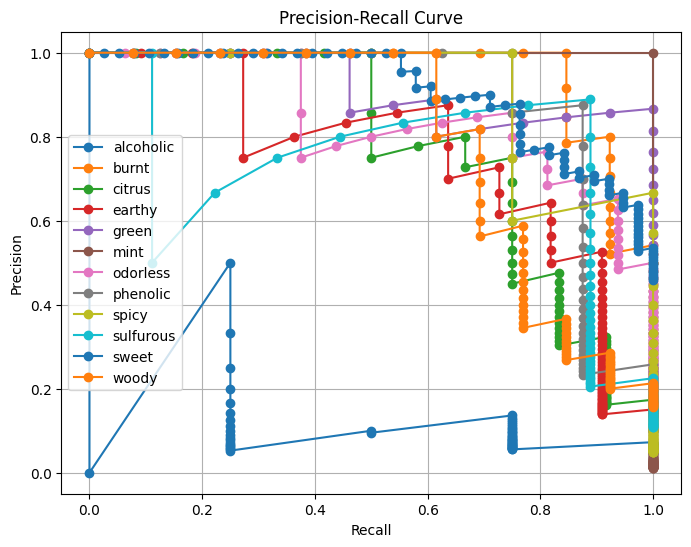

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Sample data for y_true and y_pred
# Replace these with your actual data
# y_true = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 0, 1]])
# y_pred = np.array([[0.9, 0.1, 0.8], [0.2, 0.7, 0.6], [0.8, 0.9, 0.1], [0.1, 0.4, 0.9]])

# Function to find optimal decision boundary


def find_optimal_decision_boundary(y_true, y_pred):
    optimal_thresholds = []
    optimal_thresholds_dict = {}
    for i in range(y_true.shape[1]):  # Iterate over each class
        precision, recall, thresholds = precision_recall_curve(y_true[:, i], y_pred[:, i])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
        optimal_idx = np.argmax(f1_scores)  # Find the index of the maximum F1 score
        optimal_thresholds.append(thresholds[optimal_idx])
        optimal_thresholds_dict[i] = thresholds[optimal_idx]
        print(f"{TASKS[i]}: Optimal Threshold = {thresholds[optimal_idx]}, F1 Score = {f1_scores[optimal_idx]}")
    return optimal_thresholds, optimal_thresholds_dict

# Find and print the optimal thresholds
optimal_thresholds, optimal_thresholds_dict_gnn = find_optimal_decision_boundary(y_true, y_pred)

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i in range(y_true.shape[1]):
    precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])
    plt.plot(recall, precision, marker='o', label=TASKS[i])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

In [79]:
gnn_performance, gnn_label_wise_counts = capture_threshold_level_pr_recall(y_test= y_true, y_probs= y_pred,optimal_threshold= optimal_thresholds_dict_gnn)

In [248]:
fp_performance

{'alcoholic': {'precision': 1.0, 'recall': 0.25, 'f1': 0.4},
 'burnt': {'precision': 0.57, 'recall': 0.57, 'f1': 0.57},
 'citrus': {'precision': 0.55, 'recall': 0.67, 'f1': 0.6},
 'earthy': {'precision': 0.29, 'recall': 0.67, 'f1': 0.4},
 'green': {'precision': 0.32, 'recall': 0.73, 'f1': 0.44},
 'mint': {'precision': 0.25, 'recall': 0.5, 'f1': 0.33},
 'odorless': {'precision': 0.83, 'recall': 0.94, 'f1': 0.88},
 'phenolic': {'precision': 0.55, 'recall': 1.0, 'f1': 0.71},
 'spicy': {'precision': 1.0, 'recall': 0.57, 'f1': 0.73},
 'sulfurous': {'precision': 0.89, 'recall': 0.89, 'f1': 0.89},
 'sweet': {'precision': 0.43, 'recall': 0.76, 'f1': 0.55},
 'woody': {'precision': 0.33, 'recall': 0.56, 'f1': 0.42}}

In [249]:
gnn_performance

{'alcoholic': {'precision': 0.5, 'recall': 0.25, 'f1': 0.33},
 'burnt': {'precision': 1.0, 'recall': 0.85, 'f1': 0.92},
 'citrus': {'precision': 0.75, 'recall': 0.75, 'f1': 0.75},
 'earthy': {'precision': 0.88, 'recall': 0.64, 'f1': 0.74},
 'green': {'precision': 0.87, 'recall': 1.0, 'f1': 0.93},
 'mint': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0},
 'odorless': {'precision': 0.86, 'recall': 0.75, 'f1': 0.8},
 'phenolic': {'precision': 0.88, 'recall': 0.88, 'f1': 0.88},
 'spicy': {'precision': 1.0, 'recall': 0.75, 'f1': 0.86},
 'sulfurous': {'precision': 0.89, 'recall': 0.89, 'f1': 0.89},
 'sweet': {'precision': 0.88, 'recall': 0.76, 'f1': 0.82},
 'woody': {'precision': 1.0, 'recall': 0.62, 'f1': 0.76}}

In [250]:
gnn_label_wise_counts

{0: {'fp': 1, 'tp': 1, 'fn': 3, 'tn': 78},
 1: {'fp': 0, 'tp': 11, 'fn': 2, 'tn': 70},
 2: {'fp': 3, 'tp': 9, 'fn': 3, 'tn': 68},
 3: {'fp': 1, 'tp': 7, 'fn': 4, 'tn': 71},
 4: {'fp': 2, 'tp': 13, 'fn': 0, 'tn': 68},
 5: {'fp': 0, 'tp': 1, 'fn': 0, 'tn': 82},
 6: {'fp': 2, 'tp': 12, 'fn': 4, 'tn': 65},
 7: {'fp': 1, 'tp': 7, 'fn': 1, 'tn': 74},
 8: {'fp': 0, 'tp': 3, 'fn': 1, 'tn': 79},
 9: {'fp': 1, 'tp': 8, 'fn': 1, 'tn': 73},
 10: {'fp': 4, 'tp': 29, 'fn': 9, 'tn': 41},
 11: {'fp': 0, 'tp': 8, 'fn': 5, 'tn': 70}}

In [264]:
fp_label_wise_counts

{0: {'fp': 0, 'tp': 1, 'fn': 3, 'tn': 125},
 1: {'fp': 6, 'tp': 8, 'fn': 6, 'tn': 109},
 2: {'fp': 5, 'tp': 6, 'fn': 3, 'tn': 115},
 3: {'fp': 15, 'tp': 6, 'fn': 3, 'tn': 105},
 4: {'fp': 17, 'tp': 8, 'fn': 3, 'tn': 101},
 5: {'fp': 9, 'tp': 3, 'fn': 3, 'tn': 114},
 6: {'fp': 10, 'tp': 50, 'fn': 3, 'tn': 66},
 7: {'fp': 5, 'tp': 6, 'fn': 0, 'tn': 118},
 8: {'fp': 0, 'tp': 4, 'fn': 3, 'tn': 122},
 9: {'fp': 1, 'tp': 8, 'fn': 1, 'tn': 119},
 10: {'fp': 33, 'tp': 25, 'fn': 8, 'tn': 63},
 11: {'fp': 18, 'tp': 9, 'fn': 7, 'tn': 95}}

In [257]:
for ix, val in enumerate(y_true):
    if val[TASKS.index('earthy')] == 1:
        print(y_pred[ix][TASKS.index('earthy')])
        print(evaluate_odors_similarity2(list(test_dataset.ids)[ix]))

0.012545594
{'alcoholic': 50.7355, 'burnt': -24.211300000000005, 'citrus': -18.611400000000003, 'earthy': 32.4562, 'green': 32.652300000000004, 'mint': -4.275600000000001, 'phenolic': 13.784500000000001, 'spicy': 19.852400000000003, 'sulfurous': -12.199900000000001, 'sweet': 34.0523, 'woody': 20.0165}
0.5840722
{'alcoholic': 15.18895, 'burnt': -1.4419300000000002, 'citrus': -4.63494, 'earthy': 14.070020000000001, 'green': 11.23203, 'mint': 1.33304, 'phenolic': 6.04105, 'spicy': 7.62504, 'sulfurous': -3.60699, 'sweet': 11.432030000000001, 'woody': 7.96405}
0.9363342
{'alcoholic': -1.6630000000000003, 'burnt': 3.3282000000000003, 'citrus': 1.9956000000000003, 'earthy': 0.6652000000000001, 'green': 2.9978000000000002, 'mint': 1.3304000000000002, 'phenolic': 2.463, 'spicy': 1.9304000000000001, 'sulfurous': 6.3326, 'sweet': 3.9978000000000002, 'woody': 2.3630000000000004}
0.9833747
{'alcoholic': 54.45738000000001, 'burnt': -25.329132, 'citrus': -19.127256000000003, 'earthy': 30.004248000000

In [45]:
for ix, val in enumerate(y_true):
    if val[TASKS.index('alcoholic')] == 1:
        print(y_pred[ix][TASKS.index('alcoholic')])

0.219413
0.52382326


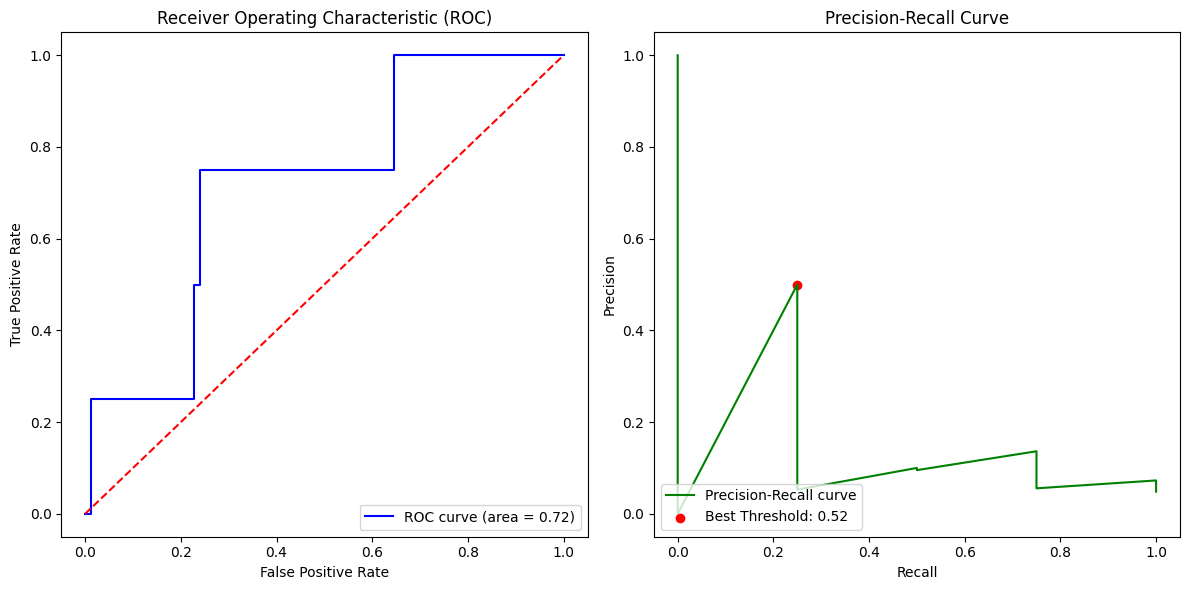

Best Threshold based on F1 Score: 0.52382326


In [624]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset for demonstration
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train a logistic regression model
# model_ = LogisticRegression()
# model.fit(X_train, y_train)

lidx = 0

# Get predicted probabilities
# y_probs = fp_model.predict_proba(X_test)[lidx][:, 1]
y_probs = y_pred[:, lidx]
y_t = y_true[:, lidx]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_t, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_t, y_probs)

# Find the best threshold based on F1 score
f1_scores = [f1_score(y_t, (y_probs >= threshold).astype(int)) for threshold in pr_thresholds]
best_threshold_index = np.argmax(f1_scores)
best_threshold_f1 = pr_thresholds[best_threshold_index]

# Plotting ROC Curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plotting Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label='Precision-Recall curve')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label='Best Threshold: {:.2f}'.format(best_threshold_f1))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Output the best threshold found based on F1 score
print("Best Threshold based on F1 Score:", best_threshold_f1)


In [121]:
# ## Add f1 score to code

# weighted_epicenters = pd.read_csv(r'intensity_epicenters_weighted.csv', index_col = False)
weighted_epicenters_ppi = intensity_epicenters_df_ppi#pd.read_csv(r'intensity_ppi_3d.csv', index_col = False)

# # nlist = []
# # for idx, row in weighted_epicenters.iterrows():
# #     dfdict = dict(row)
# #     lval = row['label']
# #     f1 = odour_dict[lval]['f1_score']
# #     dfdict['f1'] = f1
# #     nlist.append(dfdict)

# # ndf = pd.DataFrame(nlist)

# # ndf.to_csv(r'weighted_epicenters_f1score.csv', index = False)


nlist = []
for idx, row in weighted_epicenters_ppi.iterrows():
    try:
        dfdict = dict(row)
        lval = row['label']
        f1 = odour_dict[lval]['f1_score']
        dfdict['f1'] = f1
        nlist.append(dfdict)
    except:
        pass

ndf = pd.DataFrame(nlist)

ndf.to_csv(r'weighted_epicenters_ppi_f1score.csv', index = False)
    


In [122]:
# for f in flavour_buckets2:
#     if len(set(flavour_buckets2[f]).intersection(set(high_accuracy_odours)))==0:
#         print(f'no odour from {f} present!')

### Intensity based vector plots - w/wo thresholding

In [123]:
weighted_epicenters_f1score = pd.read_csv(r'weighted_epicenters_f1score.csv', index_col = False)

In [124]:
threshold = 0.6


intensity_df_3d = []
for idx, row in combined_data_w_preds_w_pca.iterrows():
    dfdict = {}
    dfdict['x'] = row['coords'][0]
    dfdict['y'] = row['coords'][1]
    dfdict['z'] = row['coords'][2]
    for k, v in dict(row).items():
        try:
            if k.startswith('p_') and weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == k.split('p_')[1]]['f1'].values[0]> threshold:
                dfdict[k.split('p_')[1]] = v
        except:
            pass
    intensity_df_3d.append(dfdict)

intensity_df_3d = pd.DataFrame(intensity_df_3d) #.drop(columns=['label','max_intensity', 'f1', 'coords'])

In [125]:
intensity_topk_3d_all

label          x         y         z  intensity
0       sweet  -4.941845 -6.566453 -4.787123   0.784366
1       sweet   3.522468  3.758121 -8.017443   0.837560
2       sweet   2.510074  3.496642 -7.073522   0.572717
3       sweet  12.993735 -0.391113 -8.064482   0.752424
4       sweet  -2.260268  8.922180 -1.243648   0.844431
...       ...        ...       ...       ...        ...
21127  savory   2.887145 -8.037498  2.021403   0.534920
21128  savory  15.261863 -5.523346  1.643639   0.536148
21129  savory  11.507632  2.003086  0.105970   0.568940
21130  savory  14.863644 -4.650235 -3.111906   0.505052
21131  savory   9.536899 -5.975000 -3.969762   0.512332

[21132 rows x 5 columns]

In [126]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def plot_3d_vectors(df):
    # Prepare the Plotly figure
    fig = go.Figure()
    
    # Get the label columns (assuming 'x', 'y', 'z' are first three columns)
    labels = df.columns[3:]
    
    # Iterate through each label to process intensity values and 3D coordinates
    for label in labels:
        # Extract the 3D points and intensity values for the current label
        intensities = df[label].values
        points = df[['x', 'y', 'z']].values
        
        # Normalize intensities to range [0, 1]
        normalized_intensities = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
        
        # Compute the weighted mean of the points
        weighted_mean = np.average(points, axis=0, weights=normalized_intensities)
        
        # Center the points by subtracting the weighted mean
        centered_points = points - weighted_mean
        
        # Apply PCA to the centered points to find the direction of maximum variance
        pca = PCA(n_components=1)
        pca.fit(centered_points)
        
        # Get the principal component (the direction vector)
        direction = pca.components_[0]
        
        # Find the starting and ending points based on the lowest and highest intensities
        start_point = points[np.argmin(normalized_intensities)]
        end_point = points[np.argmax(normalized_intensities)]
        
        # Plot the vector using Plotly
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines+markers',
            marker=dict(size=4, color=np.max(normalized_intensities), colorscale='Viridis'),
            line=dict(width=5, color=np.max(normalized_intensities), colorscale='Viridis'),
            name=f'Label: {label}'
        ))
    
    # Set 3D axis titles and show the plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="3D Vectors of Growing Intensity",
        showlegend=True
    )
    
    fig.show()

# Usage
plot_3d_vectors(intensity_df_3d)



import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def plot_3d_vectors(df):
    # Prepare the Plotly figure
    fig = go.Figure()
    
    # Get the label columns (assuming 'x', 'y', 'z' are last three columns)
    labels = df.columns[3:]  # Exclude 'x', 'y', 'z'
    
    # Iterate through each label to process intensity values and 3D coordinates
    for label in labels:
        # Extract the 3D points and intensity values for the current label
        intensities = df[label].values
        points = df[['x', 'y', 'z']].values
        
        # Normalize intensities to range [0, 1]
        normalized_intensities = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
        
        # Ensure intensities aren't all the same to avoid weird vector results
        if np.min(normalized_intensities) == np.max(normalized_intensities):
            continue  # Skip label if all intensities are the same
        
        # Find the starting and ending points based on the lowest and highest intensities
        start_point = points[np.argmin(normalized_intensities)]
        end_point = points[np.argmax(normalized_intensities)]
        
        # Calculate vector direction
        vector = end_point - start_point
        vector_length = np.linalg.norm(vector)
        if vector_length == 0:
            continue  # Skip if vector length is zero
        
        # Normalize the vector
        vector_normalized = vector / vector_length
        
        # Calculate arrowhead (10% of the vector length)
        arrow_length = vector_length * 0.1
        arrowhead = end_point - vector_normalized * arrow_length
        
        # Plot the main vector line using Plotly
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(width=5, color='blue'),
            name=f'Label: {label} vector'
        ))
        
        # Plot the arrowhead
        fig.add_trace(go.Scatter3d(
            x=[end_point[0], arrowhead[0]],
            y=[end_point[1], arrowhead[1]],
            z=[end_point[2], arrowhead[2]],
            mode='lines',
            line=dict(width=7, color='blue'),
            name=f'Label: {label} arrowhead'
        ))
        
        # Plot the start point (low intensity) with a red marker
        fig.add_trace(go.Scatter3d(
            x=[start_point[0]],
            y=[start_point[1]],
            z=[start_point[2]],
            mode='markers',
            marker=dict(size=8, color='red'),
            name=f'Label: {label} start'
        ))
        
        # Plot the end point (high intensity) with a green marker
        fig.add_trace(go.Scatter3d(
            x=[end_point[0]],
            y=[end_point[1]],
            z=[end_point[2]],
            mode='markers',
            marker=dict(size=8, color='green'),
            name=f'Label: {label} end'
        ))

    # Set 3D axis titles and show the plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="3D Vectors Indicating Direction with Arrowheads",
        showlegend=True
    )
    
    fig.show()

# Usage
plot_3d_vectors(intensity_df_3d)


In [127]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

def get_start_end_points(df, label):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Get the point where intensity starts being greater than 0
    non_zero_intensity_points = df_label[df_label['intensity'] > 0]
    start_point = non_zero_intensity_points.iloc[0][['x', 'y', 'z']].values
    
    # Get the point of maximum intensity
    max_intensity_point = df_label.loc[df_label['intensity'].idxmax(), ['x', 'y', 'z']].values
    
    return start_point, max_intensity_point, df_label


def get_direction_vector(df, label, scaling_factor=5):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Extract coordinates and intensity values
    X = df_label[['x', 'y', 'z']].values
    y = df_label['intensity'].values
    
    # Perform linear regression: intensity = β0 + βx*x + βy*y + βz*z
    reg = LinearRegression()
    reg.fit(X, y)
    
    # The coefficients (βx, βy, βz) represent the direction vector
    direction_vector = reg.coef_
    
    # Normalize the direction vector to get a unit vector
    norm = np.linalg.norm(direction_vector)
    unit_vector = direction_vector / norm
    
    # Scale the vector to make it visible
    scaled_vector = unit_vector * scaling_factor
    
    return scaled_vector, df_label


def plot_vectors(df, labels):
    fig = go.Figure()

    for label in labels:
        # Get the start and end points for the vector
        start_point, end_point, df_label = get_start_end_points(df, label)
        
        # Plot the vector as a line
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(width=6),
            name=f'{label}'
        ))
        
        # Add an arrowhead (a sphere at the end of the vector) to represent direction
        fig.add_trace(go.Scatter3d(
            x=[end_point[0]],
            y=[end_point[1]],
            z=[end_point[2]],
            mode='markers',
            marker=dict(size=8, color='red', opacity=1),
            name=f'{label}'
        ))
    
    # Update layout for 3D plot
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'  # This ensures the aspect ratio fits the data ranges
    ))
    
    # Show the plot
    fig.show()



def get_filtered_direction_vector(df, label, low_percentile=0.1, high_percentile=0.9):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Extract coordinates and intensity values
    X = df_label[['x', 'y', 'z']].values
    y = df_label['intensity'].values
    
    # Find the low and high percentile thresholds for intensity
    low_threshold = np.percentile(y, low_percentile * 100)
    high_threshold = np.percentile(y, high_percentile * 100)
    
    # Filter the data to only include points within this intensity range
    valid_indices = (y >= low_threshold) & (y <= high_threshold)
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]
    
    # Perform linear regression on the filtered data: intensity = β0 + βx*x + βy*y + βz*z
    reg = LinearRegression()
    reg.fit(X_valid, y_valid)
    
    # The coefficients (βx, βy, βz) represent the direction vector
    direction_vector = reg.coef_
    
    # Normalize the direction vector to get a unit vector
    norm = np.linalg.norm(direction_vector)
    unit_vector = direction_vector / norm
    
    # Find the start point (10th percentile intensity) and end point (90th percentile intensity)
    start_point = X_valid[np.argmin(y_valid)]  # Point where intensity starts increasing
    end_point = X_valid[np.argmax(y_valid)]  # Point where intensity is highest
    
    return unit_vector, start_point, end_point, df_label


def plot_filtered_vectors(df, labels, low_percentile=0.1, high_percentile=0.9, scaling_factor=1):
    fig = go.Figure()

    for label in labels:
        # Get the direction vector, start, and end points for the label
        vector, start_point, end_point, df_label = get_filtered_direction_vector(
            df, label, low_percentile=low_percentile, high_percentile=high_percentile)
        
        # Scale the vector for visibility
        scaled_vector = vector * scaling_factor
        
        # Adjust the end point based on the direction vector
        end_point_scaled = start_point + scaled_vector
        
        # Plot the vector as a scaled line
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point_scaled[0]],
            y=[start_point[1], end_point_scaled[1]],
            z=[start_point[2], end_point_scaled[2]],
            mode='lines',
            line=dict(width=6),
            name=f'{label}'
        ))
        
        # Add a marker at the end of the vector to represent the direction
        fig.add_trace(go.Scatter3d(
            x=[end_point_scaled[0]],
            y=[end_point_scaled[1]],
            z=[end_point_scaled[2]],
            mode='markers',
            marker=dict(size=8, color='red', opacity=1),
            name=f'{label}'
        ))
    
    # Update layout for 3D plot
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'  # This ensures the aspect ratio fits the data ranges
    ))
    
    # Show the plot
    fig.show()





# List of unique labels
labels = intensity_topk_3d_all['label'].unique()

# Plot the vectors for all labels
# plot_vectors(intensity_topk_3d_all, labels)
plot_filtered_vectors(intensity_topk_3d_all, labels, low_percentile=0.1, high_percentile=0.9, scaling_factor=10)


In [128]:
plot_vectors(intensity_topk_3d_all, labels)


### Using simple weighted avg to find most intense point

In [131]:
weighted_epicenters = pd.read_csv(r'intensity_epicenters_weighted.csv', index_col = False)

In [132]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z'
df = weighted_epicenters

# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_data['x'],
        y=label_data['y'],
        z=label_data['z'],
        mode='markers',
        marker=dict(
            size=10,  # Adjust size for better visibility
            color=label_data['color'],
        ),
        name=label
    ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


### Using simple weighted avg to analyze most intense points - With Thresholding

In [133]:
weighted_epicenters_f1score = pd.read_csv(r'weighted_epicenters_ppi_f1score.csv', index_col = False)

In [134]:
weighted_epicenters_f1score

label          x         y         z    f1
0        fruity  -3.937926  4.076819  0.467374  0.88
1        savory  11.258740  5.190311 -5.259294  0.38
2        floral  -6.101893 -3.224382  0.692040  0.81
3          waxy  -3.650045 -0.665711 -7.008423  0.73
4         sweet  -3.654788 -1.106519  2.266331  0.83
5         green  -3.726859  2.785268 -1.620532  0.78
6        citrus  -4.831814 -2.636811 -3.816502  0.71
7         fresh  -5.431318 -1.202029 -1.657632  0.56
8        herbal  -4.103592 -0.895083  1.892273  0.66
9          rose  -7.252239 -4.095362 -0.646564  0.72
10        woody  -2.974782 -6.069525  0.837122  0.64
11        apple  -5.582752  8.410667  0.055103  0.61
12         oily  -2.672930  0.563508 -5.687290  0.57
13        winey  -4.080348  5.707910 -1.940375  0.52
14       creamy  -0.968560 -1.044416  0.565515  0.50
15         mint  -1.208454 -1.358525  5.036553  0.67
16        spicy  -1.756590 -3.825325  4.012344  0.52
17   caramellic   3.391415  3.744676  5.300794  0.70
18     ethereal   1.095631  7.640770  2.607175  0.65
19     tropical  -3.117319  7.452878 -1.421102  0.45
20    aldehydic  -4.875195 -1.904336 -4.847533  0.62
21        dairy  -2.651735  2.860515 -5.137049  0.30
22   grapefruit  -1.547912  2.524598 -2.138228  0.00
23        berry  -7.377369 -0.653603  4.044956  0.24
24    pineapple  -5.023228  9.390344 -0.451308  0.70
25      powdery  -3.999696 -6.708451  4.128400  0.32
26      buttery   0.775242  3.632774  0.421728  0.48
27        milky  -2.760089  0.691577 -4.964552  0.39
28        peach  -4.466465  1.229753 -4.642313  0.40
29       earthy   1.242823  0.595787  0.665621  0.47
30     hazelnut   9.347972  2.020272  1.048975  0.46
31       cognac  -2.076362  5.972040 -2.179701  0.22
32    vegetable   2.916352  5.652689 -3.872044  0.50
33       orange  -5.157996 -1.064385 -7.567616  0.39
34        burnt  10.499367  0.544931  3.320487  0.48
35      vanilla   0.557199 -5.957254  8.055932  0.64
36       cooked  13.997576  5.688869 -9.342214  0.19
37  camphoreous   0.223441 -4.515977  3.887986  0.66
38     metallic   1.271052 -2.444945 -1.932862  0.32
39      pungent   6.902006  6.505369 -0.178973  0.48
40          dry  -0.781367 -9.399045 -1.001238  0.05
41      coconut  -2.334058 -0.688728 -1.130049  0.64
42     lactonic  -3.139828 -0.658557 -2.037772  0.47
43       almond  -0.812119 -1.996940  7.960977  0.54
44       potato   7.877297  3.184041 -0.404669  0.54
45    chamomile  -5.353758  5.422754  5.717938  0.67
46      cooling   0.123399 -2.596212  4.704635  0.48
47        leafy  -5.850434  1.561260 -1.788754  0.28
48       coffee  11.509280  0.967705  1.634718  0.36
49        clean  -6.611358 -7.895873  2.343802  0.00
50       muguet  -6.688805 -5.541472 -1.036400  0.44
51     phenolic   4.573512 -7.860712  6.736385  0.64
52         warm  -3.428091 -2.961823  4.611232  0.09
53       cheesy   4.417257  7.068209 -0.172121  0.63
54       jasmin  -7.040011  0.058709 -0.768891  0.09
55     balsamic  -4.889934 -4.568328  2.778735  0.60
56        honey  -5.629824 -3.980867  2.878571  0.54

In [135]:
'''
Might be similar based on distance?
- Fruity, green
- roasted meaty
- balsamic, honey
- Fatty, oil, waxy
- smoky, leathery?
'''

ambiguous_labels = ['herbal', 'aldehydic', 'geranium', 'waxy', 'anisic']

In [136]:
weighted_epicenters_f1score[weighted_epicenters_f1score['label']=='garlic']

Empty DataFrame
Columns: [label, x, y, z, f1]
Index: []

In [137]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z', 'f1'
df = weighted_epicenters_f1score

# Ask for the threshold value
threshold_to_show_faded = 0.6

threshold_to_eliminate = 0.3

labels_to_drop = ambiguous_labels


# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    label_data['opacity'] = label_data['f1'].apply(lambda f1: 0.2 if f1 < threshold_to_show_faded else 1.0)
    f1_score = label_data['f1'].to_list()[0]

    if float(f1_score)> threshold_to_eliminate and label not in labels_to_drop:

        fig.add_trace(go.Scatter3d(
            x=label_data['x'],
            y=label_data['y'],
            z=label_data['z'],
            mode='markers',
            marker=dict(
                size=10,  # Adjust size for better visibility
                color=label_data['color'],
                opacity=label_data['opacity'].tolist()[0]  # Convert Series to list
            ),
            name= f'{label} {f1_score}'
        ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


In [138]:
all_labels = list(weighted_epicenters_f1score['label'])

all_distances = {}
for l1 in all_labels:
    for l2 in all_labels:
        if l1 != l2 and ((l1, l2) not in all_distances) and ((l2, l1) not in all_distances):
            v1 = np.array(weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == l1][['x', 'y', 'z']].values)
            v2 = np.array(weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == l2][['x', 'y', 'z']].values)
            all_distances[(l1, l2)] = np.linalg.norm(v1-v2)

all_distances = dict(sorted(list(all_distances.items()), key=lambda x: x[1]))



distance_conversion = []
for k,v in all_distances.items():
    dfdict = {'label1': k[0], 'label2': k[1], 'distance': v}
    distance_conversion.append(dfdict)

dists_3d_df = pd.DataFrame(distance_conversion)

dists_3d_df.to_csv(r'vector_distances_bw_labels_ppi_3d.csv', index=False)

In [139]:
vec_dists_3d = pd.read_csv(r'vector_distances_bw_labels_3d.csv', index_col = False)

threshold_distance_cutoff = 1.8

vec_dists_3d_dict_all = {}
vec_dists_3d_dict_cut = {}
c = {}
rank_all = 1
rank_cut = 1
cutoff_rank = None
cutoff_rank_cut = None
cutoff_rank_all = None
for idx, row in vec_dists_3d.iterrows():
    l1 = row['label1']
    l2 = row['label2']
    if row['distance']> threshold_distance_cutoff and cutoff_rank_all is None and cutoff_rank_cut is None:
        cutoff_rank_cut = rank_cut
        cutoff_rank_all = rank_all
    if l1 not in ambiguous_labels and l2 not in ambiguous_labels:
        vec_dists_3d_dict_cut[(l1, l2)] = {'distance': row['distance'], 'rank': rank_cut}
        rank_cut += 1
    vec_dists_3d_dict_all[(l1, l2)] = {'distance': row['distance'], 'rank': rank_all}
    rank_all += 1
    

In [140]:
## Check closest labels to a particular one

label_to_check = 'sulfurous'

drop_ambiguous_labels = True


if drop_ambiguous_labels:
    vec_dists_3d_dict = vec_dists_3d_dict_cut
    cutoff_rank = cutoff_rank_cut
else:
    vec_dists_3d_dict = vec_dists_3d_dict_all
    cutoff_rank = cutoff_rank_all

print('CUT OFF: ', cutoff_rank)

for k,v in vec_dists_3d_dict.items():
    l1 = k[0]
    l2 = k[1]
    if l1 == label_to_check or l2 == label_to_check:
        print(f'{k}: {v}')


CUT OFF:  16
('meaty', 'sulfurous'): {'distance': 2.4427906505427748, 'rank': 33}
('savory', 'sulfurous'): {'distance': 3.4108410826193634, 'rank': 66}
('roasted', 'sulfurous'): {'distance': 3.44944261108672, 'rank': 70}
('pungent', 'sulfurous'): {'distance': 3.720021913667785, 'rank': 91}
('onion', 'sulfurous'): {'distance': 3.920475771092348, 'rank': 99}
('alliaceous', 'sulfurous'): {'distance': 4.88448801575923, 'rank': 175}
('garlic', 'sulfurous'): {'distance': 5.3090255736879, 'rank': 203}
('cheesy', 'sulfurous'): {'distance': 5.4488694801692095, 'rank': 217}
('nutty', 'sulfurous'): {'distance': 5.541194309034467, 'rank': 227}
('ripe', 'sulfurous'): {'distance': 6.495478530831295, 'rank': 308}
('cooked', 'sulfurous'): {'distance': 8.211151777426892, 'rank': 481}
('burnt', 'sulfurous'): {'distance': 8.322812114065576, 'rank': 490}
('alcoholic', 'sulfurous'): {'distance': 8.734822307001462, 'rank': 543}
('solvent', 'sulfurous'): {'distance': 9.643038257200176, 'rank': 633}
('ferment

In [141]:
import pandas as pd
import numpy as np

def calculate_intensity_epicenters_weighted(df):
    epicenters = []

    # Iterate through each unique label
    for label in df['label'].unique():
        # Filter the dataframe for the current label
        label_df = df[df['label'] == label]
        # Calculate the weighted averages of x, y, z using the intensity as weights
        weight_sum = label_df['intensity'].sum()
        x_epicenter = (label_df['x'] * label_df['intensity']).sum() / weight_sum
        y_epicenter = (label_df['y'] * label_df['intensity']).sum() / weight_sum
        z_epicenter = (label_df['z'] * label_df['intensity']).sum() / weight_sum
        # Append the result as a dictionary to the epicenters list
        epicenters.append({
            'label': label,
            'x': x_epicenter,
            'y': y_epicenter,
            'z': z_epicenter
        })

    # Convert the list of dictionaries to a dataframe and return it
    epicenter_df = pd.DataFrame(epicenters)
    return epicenter_df


def calculate_intensity_epicenters_weighted_nD(df):
    epicenters = []
    # Iterate through each unique label
    for label in df['label'].unique():
        # Filter the dataframe for the current label
        label_df = df[df['label'] == label]
        # Calculate the weighted averages of x, y, z using the intensity as weights
        weight_sum = label_df['intensity'].sum()
        nD_epicenter = (label_df['coords'] * label_df['intensity']).sum() / weight_sum
        # y_epicenter = (label_df['y'] * label_df['intensity']).sum() / weight_sum
        # z_epicenter = (label_df['z'] * label_df['intensity']).sum() / weight_sum
        # Append the result as a dictionary to the epicenters list
        epicenters.append({
            'label': label,
            'epicenter': nD_epicenter
        })
    # Convert the list of dictionaries to a dataframe and return it
    epicenter_df = pd.DataFrame(epicenters)
    return epicenter_df



# Example usage
# Assuming 'df' is your existing dataframe
# Load the data
# file_path = 'intensity_topk_3d_all.csv'
# df = pd.read_csv(file_path)
# intensity_epicenters_df = calculate_intensity_epicenters_weighted(df)
# print(intensity_epicenters_df.head())


# Example usage
# Assuming 'df' is your existing dataframe
# Load the data
file_path = 'intensity_topk_3d_all.csv'
intensity_topk_3d_all = pd.read_csv(file_path)
intensity_epicenters_df = calculate_intensity_epicenters_weighted(intensity_topk_3d_all)
print(intensity_epicenters_df.head())

intensity_ppi_3d = pd.read_csv('intensity_ppi_3d.csv', index_col=False)

intensity_epicenters_df_ppi = calculate_intensity_epicenters_weighted(intensity_ppi_3d)


    label         x         y         z
0   sweet -3.654788  1.106519 -2.266331
1  fruity -3.937926 -4.076819 -0.467374
2   green -3.726859 -2.785268  1.620532
3  floral -6.101893  3.224382 -0.692040
4    waxy -3.650045  0.665711  7.008423


In [142]:
###Compare distance between 2 labels with context of rank

label_1 = 'fruity'
label_2 = 'floral'

drop_ambiguous_labels = True


if drop_ambiguous_labels:
    vec_dists_3d_dict = vec_dists_3d_dict_cut
    cutoff_rank = cutoff_rank_cut
else:
    vec_dists_3d_dict = vec_dists_3d_dict_all
    cutoff_rank = cutoff_rank_all


if (label_1, label_2) not in vec_dists_3d_dict:
    final_pair = (label_2, label_1)
else:
    final_pair = (label_1, label_2)
distval = vec_dists_3d_dict[final_pair]['distance']
rank = vec_dists_3d_dict[final_pair]['rank']

print('Distance: ', distval, ', rank: ', rank, f'\ncutoff rank for threshold distance {threshold_distance_cutoff}: ', cutoff_rank)


Distance:  7.618448394625845 , rank:  424 
cutoff rank for threshold distance 1.8:  16


In [143]:
### Create similar labels dict based on cut-off distance

drop_ambiguous_labels = True


if drop_ambiguous_labels:
    vec_dists_3d_dict = vec_dists_3d_dict_cut
    cutoff_rank = cutoff_rank_cut
else:
    vec_dists_3d_dict = vec_dists_3d_dict_all
    cutoff_rank = cutoff_rank_all

similar_odours = []
for k,v in vec_dists_3d_dict.items():
    if cutoff_rank>v['rank']:
        l1 = k[0]
        l2 = k[1]

        if similar_odours == []:
            similar_odours.append({l1, l2})
        else:
            match_found = False
            for idx, dc in enumerate(similar_odours):
                if l1 in dc or l2 in dc:
                    dc.add(l1)
                    dc.add(l2)
                    match_found = True
                    break
            if not match_found:
                similar_odours.append({l1, l2})
                

dict_similar_odour_sets = {}
for s in similar_odours:
    tlist = []
    for od in s:
        f1 = weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == od]['f1'].values[0]
        tlist.append((od, f1))
    
    sorted_tlist = sorted(tlist, key=lambda x: x[1], reverse= True)
    dict_similar_odour_sets[sorted_tlist[0][0]] = [v[0] for v in sorted_tlist[1:]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
weighted_epicenters_f1score

label          x         y         z  max_intensity    f1    color
0    alcoholic   0.975271 -6.219407 -1.068734       0.921012  0.63  #636EFA
1    aldehydic  -4.875195  1.904336  4.847533       0.822104  0.62  #EF553B
2   alliaceous  11.880534 -5.210002  6.787724       0.884662  0.62  #00CC96
3       almond  -0.812119  1.996940 -7.960977       0.868666  0.54  #AB63FA
4       animal   1.039776  6.083018 -1.534515       0.762888  0.62  #FFA15A
..         ...        ...       ...       ...            ...   ...      ...
66     vanilla   0.557199  5.957254 -8.055932       0.910957  0.64  #FF6692
67      violet  -8.720026  5.015366 -0.153757       0.724413  0.59  #B6E880
68        waxy  -3.650045  0.665711  7.008423       0.838698  0.73  #FF97FF
69       winey  -4.080348 -5.707910  1.940375       0.744146  0.52  #FECB52
70       woody  -2.974782  6.069525 -0.837122       0.949858  0.64  #636EFA

[71 rows x 7 columns]

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z', 'f1'
df = weighted_epicenters_f1score

# Ask for the threshold value
threshold_to_show_faded = 0.58

threshold_to_eliminate = 0.3

labels_to_drop = []
for k,v in dict_similar_odour_sets.items():
    labels_to_drop.extend(v)

labels_to_drop.extend(ambiguous_labels)


# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    label_data['opacity'] = label_data['f1'].apply(lambda f1: 0.2 if f1 < threshold_to_show_faded else 1.0)
    f1_score = label_data['f1'].to_list()[0]

    if float(f1_score)> threshold_to_eliminate and label not in labels_to_drop:

        fig.add_trace(go.Scatter3d(
            x=label_data['x'],
            y=label_data['y'],
            z=label_data['z'],
            mode='markers',
            marker=dict(
                size=10,  # Adjust size for better visibility
                color=label_data['color'],
                opacity=label_data['opacity'].tolist()[0]  # Convert Series to list
            ),
            name= f'{label} {f1_score}'
        ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


### Try to breakdown odours to simplified primaries

In [144]:
### Primary odours from GPT

primary_odors = [
    {'Odor': 'Camphoraceous', 'Description': 'Resembling camphor, such as eucalyptus or camphor balm.'},
    {'Odor': 'Musky', 'Description': 'Similar to animal musk, often associated with a sensual or warm aroma.'},
    {'Odor': 'Floral', 'Description': 'Resembling the scent of flowers, such as rose or jasmine.'},
    {'Odor': 'Pepperminty', 'Description': 'Resembling mint, such as peppermint oil or spearmint.'},
    {'Odor': 'Ethereal', 'Description': 'Resembling volatile solvents, such as dry cleaning fluid or acetone.'},
    {'Odor': 'Pungent', 'Description': 'Sharp and stinging, such as vinegar or ammonia.'},
    {'Odor': 'Putrid', 'Description': 'Resembling decay or rotting, such as rotten eggs (sulfurous) or decaying meat.'},
    {'Odor': 'Fruity (non-citrus)', 'Description': 'Resembling the scent of non-citrus fruits, such as apple or strawberry.'},
    {'Odor': 'Citrusy', 'Description': 'Resembling citrus fruits, such as lemon or orange.'},
    {'Odor': 'Woody/Resinous', 'Description': 'Emulating the scent of wood or plant resin, such as pine or cedarwood.'},
    {'Odor': 'Earthy', 'Description': 'Resembling moist soil or mushrooms, such as geosmin (the smell after rain) or truffles.'},
    {'Odor': 'Sweet', 'Description': 'A sugary, pleasing scent, such as vanilla or caramel.'},
    {'Odor': 'Chemical', 'Description': 'Synthetic or lab-related scents, such as bleach or gasoline.'},
    {'Odor': 'Popcorn (toasted/nutty)', 'Description': 'Resembling toasted corn or nuts, such as freshly popped popcorn or roasted nuts.'}
]

primary_odors_list = [
    'Camphoraceous',
    'Musky',
    'Floral',
    'Pepperminty',
    'Ethereal',
    'Pungent',
    'Putrid',
    'Fruity (non-citrus)',
    'Citrusy',
    'Woody/Resinous',
    'Earthy',
    'Sweet',
    'Chemical',
    'Popcorn (toasted/nutty)'
]

In [145]:
### Using GPT
import os
from langchain_openai import ChatOpenAI
from typing import List
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
import config

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = config.openai_key

# Initialize the GPT-4o model
model = ChatOpenAI(model="gpt-4o", temperature=0)

system_message = f''' You are a worldclass expert in fragrance and odor sciences. 
The user will give you a odour name, and your job is to break it down into it's constituent base odors along with their respective intensities\n.
Here are the list of base odours to use: {primary_odors_list}\n
The intensity values can be either: 'High', 'Medium' or 'Low'.'''

In [147]:
class OdourData(BaseModel):
    Odour: str = Field(description="The constituent odour name")
    Intensity: str = Field(description="The intensity of the constituent odour present")

def get_input_query_details_lchain_op(user_question):

    parser = JsonOutputParser(pydantic_object=OdourData)

    prompt = PromptTemplate( 
        template = system_message + '''{format_instructions}\nuser_question:\n{user_question}
        ''',
        description="Support Case Summary",
        input_variables=["user_question"],
        partial_variables={"format_instructions": parser.get_format_instructions()},)

    chain = prompt | model | parser

    return chain.invoke({"user_question" : user_question})

# output = get_input_query_details_lchain_op('animalic')

# print('test output: ', output)

In [148]:
# all_odours_in_pairwise_compare = set()
# for k,v in vec_dists_3d_dict.items():
#     all_odours_in_pairwise_compare.add(k[0])
#     all_odours_in_pairwise_compare.add(k[1])

In [149]:
# odour_breakdown_df_gpt = []
# for o in TASKS:
#     rdict = {'Main Odour': o}
#     breakdown_list = get_input_query_details_lchain_op(o)
#     for oval in breakdown_list:
#         rdict[oval['Odour']] = oval['Intensity']
#     odour_breakdown_df_gpt.append(rdict)

# odour_breakdown_df_gpt = pd.DataFrame(odour_breakdown_df_gpt)


In [150]:
# odour_breakdown_df_gpt

In [151]:
# odour_breakdown_df_gpt.to_csv(r'odour_breakdown_gpt_all.csv', index= False)

In [152]:
odour_breakdown_df_gpt = pd.read_csv(r'odour_breakdown_gpt.csv', index_col = False)
odour_breakdown_df_gpt.fillna('', inplace=True)
odour_breakdown_df_gpt.rename(columns={'Main Odour':'label'}, inplace=True)

In [153]:
odour_breakdown_df_gpt_epicenter_f1 = pd.merge(odour_breakdown_df_gpt, weighted_epicenters_f1score, on='label', how='inner')

In [154]:
# Assuming df is your dataframe
odour_breakdown_df_gpt_epicenter_f1.replace({'Medium': 0.66, 'High': 1.0, 'Low': 0.33, '': 0.0}, inplace=True)

In [155]:

processed_main_odours = {
'Sweet': 'sweet',
 'Floral': 'floral',
 'Woody/Resinous': 'woody',
 'Fruity (non-citrus)': 'fruity',
 'Musky': 'musky',
 'Earthy': 'earthy',
 'Putrid': 'putrid',
 'Pungent': 'pungent',
 'Chemical': 'chemical',
 'Popcorn (toasted/nutty)': 'nutty',
 'Citrusy': 'citrus',
 'Camphoraceous': 'camphoreous',
 'Ethereal': 'ethereal',
 'Nutty': 'nutty',
 'Spicy': 'spicy',
 'Green': 'green',
 'Watery': 'watery',
 'Fresh': 'fresh'
 }

processed_main_odours_invert = {v:k for k,v in processed_main_odours.items()}

In [156]:
odours_to_eliminate = processed_main_odours.copy()
del odours_to_eliminate['Chemical']
del odours_to_eliminate['Watery']
odours_to_eliminate_list = [v for _, v in odours_to_eliminate.items()]
eliminated_keys_list = [k for k, _ in odours_to_eliminate.items()]

In [157]:
# odour_breakdown_df_gpt_epicenter_f1_without_primary_in_labels = odour_breakdown_df_gpt_epicenter_f1[~odour_breakdown_df_gpt_epicenter_f1['label'].isin(odours_to_eliminate_list)]

odour_cols_in_table = list(odour_breakdown_df_gpt_epicenter_f1.columns)[1:-6]
odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity = []

for idx, row in odour_breakdown_df_gpt_epicenter_f1.iterrows():
    dfdict = dict(row)
    lval = dfdict['label']
    if lval in odours_to_eliminate_list:
        for odour_col in odour_cols_in_table:
            if odour_col == processed_main_odours_invert[lval]:
                dfdict[odour_col] == 1.0
            else:
                dfdict[odour_col] = 0.0
    
    odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity.append(dfdict)


odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity = pd.DataFrame(odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity)

In [158]:
odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity

label  Sweet  Floral  Woody/Resinous  Fruity (non-citrus)  Musky  \
0       vanilla   1.00    0.66            0.33                 0.00   0.00   
1         berry   0.66    0.33            0.00                 1.00   0.00   
2         burnt   0.00    0.00            0.00                 0.00   0.00   
3          rose   0.66    1.00            0.33                 0.33   0.00   
4        citrus   0.00    0.00            0.00                 0.00   0.00   
5           dry   0.00    0.00            0.66                 0.00   0.33   
6         fresh   0.00    0.00            0.00                 0.00   0.00   
7    caramellic   1.00    0.00            0.00                 0.33   0.00   
8   camphoreous   0.00    0.00            0.00                 0.00   0.00   
9        jasmin   0.66    1.00            0.00                 0.33   0.00   
10       orange   0.33    0.00            0.00                 0.66   0.00   
11    pineapple   0.66    0.00            0.00                 1.00   0.00   
12      pungent   0.00    0.00            0.00                 0.00   0.00   
13        honey   1.00    0.66            0.33                 0.33   0.00   
14         oily   0.00    0.00            0.00                 0.00   0.00   
15       cheesy   0.33    0.00            0.00                 0.00   0.00   
16     balsamic   0.66    0.00            1.00                 0.00   0.00   
17      powdery   0.33    0.66            0.00                 0.00   0.33   
18        spicy   0.00    0.00            0.00                 0.00   0.00   
19       fruity   0.00    0.00            0.00                 1.00   0.00   
20        sweet   1.00    0.00            0.00                 0.00   0.00   
21     ethereal   0.00    0.00            0.00                 0.00   0.00   
22        winey   0.33    0.00            0.66                 1.00   0.00   
23        apple   0.66    0.33            0.00                 1.00   0.00   
24       cooked   0.33    0.00            0.00                 0.00   0.00   
25       almond   1.00    0.00            0.33                 0.00   0.00   
26        green   0.00    0.00            0.00                 0.00   0.00   
27        woody   0.00    0.00            1.00                 0.00   0.00   
28     metallic   0.00    0.00            0.00                 0.00   0.00   
29       savory   0.33    0.00            0.66                 0.00   0.00   
30     phenolic   0.00    0.00            0.33                 0.00   0.00   
31       floral   0.00    1.00            0.00                 0.00   0.00   

    Earthy  Putrid  Pungent  Chemical  ...  Nutty  Spicy  Green  Watery  \
0     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
1     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
2     0.33    0.00     1.00      0.66  ...   0.00    0.0    0.0     0.0   
3     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
4     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
5     1.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
6     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
7     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
8     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
9     0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
10    0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
11    0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
12    0.00    0.00     1.00      0.00  ...   0.00    0.0    0.0     0.0   
13    0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
14    0.00    0.00     0.33      1.00  ...   0.00    0.0    0.0     0.0   
15    0.33    0.66     1.00      0.00  ...   0.00    0.0    0.0     0.0   
16    0.33    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
17    0.00    0.00     0.00      0.00  ...   0.00    0.0    0.0     0.0   
18    0.00

In [159]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# 'x', 'y', 'z' are the coordinate columns
# Each label has its own column with intensity values

# Example structure of the DataFrame:
# df = pd.DataFrame({
#    'x': [...],
#    'y': [...],
#    'z': [...],
#    'label1': [...],
#    'label2': [...],
#    ...
# })

# Function to compute best-fit vector using PCA

df = odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity.drop(columns=['label','max_intensity', 'f1', 'color'])


def fit_vector_3d(x, y, z, intensities):
    # Center the data
    coords = np.vstack((x, y, z)).T
    coords_mean = np.mean(coords, axis=0)
    coords_centered = coords - coords_mean
    
    # Weight the coordinates by the intensity values
    weighted_coords = coords_centered * intensities[:, np.newaxis]
    
    # Apply PCA to find the principal direction
    pca = PCA(n_components=1)
    pca.fit(weighted_coords)
    
    # The first principal component is the direction of maximum variance
    direction_vector = pca.components_[0]
    return coords_mean, direction_vector

# Initialize plotly figure
fig = go.Figure()

# List of labels (odour columns)
labels = [col for col in df.columns if col not in ['x', 'y', 'z']]

# Iterate over each label
for label in labels:
    # Get x, y, z coordinates and intensity values for the label
    x_vals = df['x'].values
    y_vals = df['y'].values
    z_vals = df['z'].values
    intensities = df[label].values
    
    # Get the best fit vector using PCA
    origin, direction = fit_vector_3d(x_vals, y_vals, z_vals, intensities)
    
    # Plot the intensity points
    fig.add_trace(go.Scatter3d(
        x=x_vals, y=y_vals, z=z_vals,
        mode='markers',
        marker=dict(size=4, color=intensities, colorscale='Viridis', opacity=0.8),
        name=f'{label} Intensity Points'
    ))
    
    # Plot the fitted vector (direction of increasing intensity)
    scale = 5  # Scaling factor to make vectors visible
    fig.add_trace(go.Scatter3d(
        x=[origin[0], origin[0] + scale * direction[0]],
        y=[origin[1], origin[1] + scale * direction[1]],
        z=[origin[2], origin[2] + scale * direction[2]],
        mode='lines',
        line=dict(color='blue', width=5),
        name=f'{label} Fitted Vector'
    ))

# Layout for the 3D plot
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
),
    title="3D Best-Fit Vectors of Intensity Change for Different Labels",
    showlegend=False)

# Show the plot
fig.show()


KeyError: "['max_intensity'] not found in axis"

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def plot_3d_vectors(df):
    # Prepare the Plotly figure
    fig = go.Figure()
    
    # Get the label columns (assuming 'x', 'y', 'z' are first three columns)
    labels = df.columns[3:]
    
    # Iterate through each label to process intensity values and 3D coordinates
    for label in labels:
        # Extract the 3D points and intensity values for the current label
        intensities = df[label].values
        points = df[['x', 'y', 'z']].values
        
        # Normalize intensities to range [0, 1]
        normalized_intensities = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
        
        # Compute the weighted mean of the points
        weighted_mean = np.average(points, axis=0, weights=normalized_intensities)
        
        # Center the points by subtracting the weighted mean
        centered_points = points - weighted_mean
        
        # Apply PCA to the centered points to find the direction of maximum variance
        pca = PCA(n_components=1)
        pca.fit(centered_points)
        
        # Get the principal component (the direction vector)
        direction = pca.components_[0]
        
        # Find the starting and ending points based on the lowest and highest intensities
        start_point = points[np.argmin(normalized_intensities)]
        end_point = points[np.argmax(normalized_intensities)]
        
        # Plot the vector using Plotly
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines+markers',
            marker=dict(size=4, color=np.max(normalized_intensities), colorscale='Viridis'),
            line=dict(width=5, color=np.max(normalized_intensities), colorscale='Viridis'),
            name=f'Label: {label}'
        ))
    
    # Set 3D axis titles and show the plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="3D Vectors of Growing Intensity",
        showlegend=True
    )
    
    fig.show()

# Usage
plot_3d_vectors(df)


In [ ]:
df

Sweet  Floral  Woody/Resinous  Fruity (non-citrus)  Musky  Earthy  Putrid  \
0    1.00    0.66            0.33                  0.0   0.00    0.00    0.00   
1    0.66    0.33            0.00                  1.0   0.00    0.00    0.00   
2    0.00    0.00            0.33                  0.0   1.00    0.66    0.33   
3    0.00    0.00            0.00                  0.0   0.00    0.33    0.00   
4    0.00    0.00            0.66                  0.0   0.00    0.66    0.00   
..    ...     ...             ...                  ...    ...     ...     ...   
61   0.33    0.00            0.66                  0.0   0.00    1.00    0.00   
62   0.00    0.00            0.00                  0.0   0.00    0.00    0.00   
63   0.00    0.00            0.00                  0.0   0.00    0.33    0.00   
64   0.00    0.00            0.33                  0.0   0.66    0.00    0.33   
65   0.00    1.00            0.00                  0.0   0.00    0.00    0.00   

    Pungent  Chemical  Popcorn (toasted/nutty)  ...  Camphoraceous  Ethereal  \
0      0.00      0.00                     0.00  ...            0.0      0.00   
1      0.00      0.00                     0.00  ...            0.0      0.00   
2      0.00      0.00                     0.00  ...            0.0      0.00   
3      1.00      0.66                     0.66  ...            0.0      0.00   
4      0.33      0.00                     1.00  ...            0.0      0.00   
..      ...       ...                      ...  ...            ...       ...   
61     0.00      0.00                     0.00  ...            0.0      0.00   
62     0.66      1.00                     0.00  ...            0.0      0.66   
63     0.00      0.00                     0.00  ...            0.0      0.00   
64     0.66      0.00                     0.00  ...            0.0      0.00   
65     0.00      0.00                     0.00  ...            0.0      0.00   

    Nutty  Spicy  Green  Watery  Fresh          x         y         z  
0     0.0    0.0    0.0    0.00    0.0   0.557199  5.957254 -8.055932  
1     0.0    0.0    0.0    0.00    0.0  -7.377369  0.653603 -4.044956  
2     0.0    0.0    0.0    0.00    0.0   1.039776  6.083018 -1.534515  
3     0.0    0.0    0.0    0.00    0.0  10.499367 -0.544931 -3.320487  
4     0.0    0.0    0.0    0.00    0.0   9.381232 -3.306568  0.537867  
..    ...    ...    ...     ...    ...        ...       ...       ...  
61    0.0    0.0    0.0    0.00    0.0  -0.684009  5.261697 -9.747927  
62    0.0    0.0    0.0    0.00    0.0   0.486174 -5.849100 -5.382361  
63    0.0    0.0    1.0    0.66    1.0  -5.314772 -3.117721  6.759304  
64    0.0    0.0    0.0    0.00    0.0  -1.739158 -0.813398  6.758897  
65    0.0    0.0    0.0    0.00    0.0  -6.101893  3.224382 -0.692040  

[66 rows x 21 columns]

In [ ]:
df.columns[:-3]

Index(['Sweet', 'Floral', 'Woody/Resinous', 'Fruity (non-citrus)', 'Musky',
       'Earthy', 'Putrid', 'Pungent', 'Chemical', 'Popcorn (toasted/nutty)',
       'Citrusy', 'Camphoraceous', 'Ethereal', 'Nutty', 'Spicy', 'Green',
       'Watery', 'Fresh'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def plot_3d_vectors(df):
    # Prepare the Plotly figure
    fig = go.Figure()
    
    # Get the label columns (assuming 'x', 'y', 'z' are first three columns)
    labels = df.columns[:-3]
    
    # Iterate through each label to process intensity values and 3D coordinates
    for label in labels:
        # Extract the 3D points and intensity values for the current label
        intensities = df[label].values
        points = df[['x', 'y', 'z']].values
        
        # Normalize intensities to range [0, 1]
        normalized_intensities = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
        
        # Compute the weighted mean of the points
        weighted_mean = np.average(points, axis=0, weights=normalized_intensities)
        
        # Center the points by subtracting the weighted mean
        centered_points = points - weighted_mean
        
        # Apply PCA to the centered points to find the direction of maximum variance
        pca = PCA(n_components=1)
        pca.fit(centered_points)
        
        # Get the principal component (the direction vector)
        direction = pca.components_[0]
        
        # Find the starting and ending points based on the lowest and highest intensities
        start_point = points[np.argmin(normalized_intensities)]
        end_point = points[np.argmax(normalized_intensities)]
        
        # Plot the vector line using Plotly
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(width=5, color=np.max(normalized_intensities), colorscale='Viridis'),
            name=f'Label: {label} vector'
        ))
        
        # Plot the start point (low intensity) with a red marker
        fig.add_trace(go.Scatter3d(
            x=[start_point[0]],
            y=[start_point[1]],
            z=[start_point[2]],
            mode='markers',
            marker=dict(size=8, color='red'),
            name=f'Label: {label} start'
        ))
        
        # Plot the end point (high intensity) with a green marker
        fig.add_trace(go.Scatter3d(
            x=[end_point[0]],
            y=[end_point[1]],
            z=[end_point[2]],
            mode='markers',
            marker=dict(size=8, color='green'),
            name=f'Label: {label} end'
        ))

    # Set 3D axis titles and show the plot
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="3D Vectors of Growing Intensity with Distinct Start/End Points",
        showlegend=True
    )
    
    fig.show()

# Usage
plot_3d_vectors(df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


df = odour_breakdown_df_gpt_epicenter_f1_modified_primary_intensity.drop(columns=['label','max_intensity', 'f1', 'color'])


def get_start_end_points(df, label):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Get the point where intensity starts being greater than 0
    non_zero_intensity_points = df_label[df_label['intensity'] > 0]
    start_point = non_zero_intensity_points.iloc[0][['x', 'y', 'z']].values
    
    # Get the point of maximum intensity
    max_intensity_point = df_label.loc[df_label['intensity'].idxmax(), ['x', 'y', 'z']].values
    
    return start_point, max_intensity_point, df_label


def get_direction_vector(df, label, scaling_factor=5):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Extract coordinates and intensity values
    X = df_label[['x', 'y', 'z']].values
    y = df_label['intensity'].values
    
    # Perform linear regression: intensity = β0 + βx*x + βy*y + βz*z
    reg = LinearRegression()
    reg.fit(X, y)
    
    # The coefficients (βx, βy, βz) represent the direction vector
    direction_vector = reg.coef_
    
    # Normalize the direction vector to get a unit vector
    norm = np.linalg.norm(direction_vector)
    unit_vector = direction_vector / norm
    
    # Scale the vector to make it visible
    scaled_vector = unit_vector * scaling_factor
    
    return scaled_vector, df_label


def plot_vectors(df, labels):
    fig = go.Figure()

    for label in labels:
        # Get the start and end points for the vector
        start_point, end_point, df_label = get_start_end_points(df, label)
        
        # Plot the vector as a line
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(width=6),
            name=f'{label}'
        ))
        
        # Add an arrowhead (a sphere at the end of the vector) to represent direction
        fig.add_trace(go.Scatter3d(
            x=[end_point[0]],
            y=[end_point[1]],
            z=[end_point[2]],
            mode='markers',
            marker=dict(size=8, color='red', opacity=1),
            name=f'{label}'
        ))
    
    # Update layout for 3D plot
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'  # This ensures the aspect ratio fits the data ranges
    ))
    
    # Show the plot
    fig.show()



def get_filtered_direction_vector(df, label, low_percentile=0.1, high_percentile=0.9):
    # Filter the dataframe for the given label
    df_label = df[df['label'] == label]
    
    # Extract coordinates and intensity values
    X = df_label[['x', 'y', 'z']].values
    y = df_label['intensity'].values
    
    # Find the low and high percentile thresholds for intensity
    low_threshold = np.percentile(y, low_percentile * 100)
    high_threshold = np.percentile(y, high_percentile * 100)
    
    # Filter the data to only include points within this intensity range
    valid_indices = (y >= low_threshold) & (y <= high_threshold)
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]
    
    # Perform linear regression on the filtered data: intensity = β0 + βx*x + βy*y + βz*z
    reg = LinearRegression()
    reg.fit(X_valid, y_valid)
    
    # The coefficients (βx, βy, βz) represent the direction vector
    direction_vector = reg.coef_
    
    # Normalize the direction vector to get a unit vector
    norm = np.linalg.norm(direction_vector)
    unit_vector = direction_vector / norm
    
    # Find the start point (10th percentile intensity) and end point (90th percentile intensity)
    start_point = X_valid[np.argmin(y_valid)]  # Point where intensity starts increasing
    end_point = X_valid[np.argmax(y_valid)]  # Point where intensity is highest
    
    return unit_vector, start_point, end_point, df_label


def plot_filtered_vectors(df, labels, low_percentile=0.1, high_percentile=0.9, scaling_factor=1):
    fig = go.Figure()

    for label in labels:
        # Get the direction vector, start, and end points for the label
        vector, start_point, end_point, df_label = get_filtered_direction_vector(
            df, label, low_percentile=low_percentile, high_percentile=high_percentile)
        
        # Scale the vector for visibility
        scaled_vector = vector * scaling_factor
        
        # Adjust the end point based on the direction vector
        end_point_scaled = start_point + scaled_vector
        
        # Plot the vector as a scaled line
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point_scaled[0]],
            y=[start_point[1], end_point_scaled[1]],
            z=[start_point[2], end_point_scaled[2]],
            mode='lines',
            line=dict(width=6),
            name=f'{label}'
        ))
        
        # Add a marker at the end of the vector to represent the direction
        fig.add_trace(go.Scatter3d(
            x=[end_point_scaled[0]],
            y=[end_point_scaled[1]],
            z=[end_point_scaled[2]],
            mode='markers',
            marker=dict(size=8, color='red', opacity=1),
            name=f'{label}'
        ))
    
    # Update layout for 3D plot
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'  # This ensures the aspect ratio fits the data ranges
    ))
    
    # Show the plot
    fig.show()





# List of unique labels
# labels = intensity_topk_3d_all['label'].unique()

labels = set(df.columns)
labels.remove('x')
labels.remove('y')
labels.remove('z')

labels = list(labels)

rearranged_df = []
for o in labels:
    for i in range(len(list(df['x']))):
        dfdict = {}
        dfdict['label'] = o
        dfdict['intensity'] = list(df[o])[i]
        dfdict['x'] = list(df['x'])[i]
        dfdict['y'] = list(df['y'])[i]
        dfdict['z'] = list(df['z'])[i]
        rearranged_df.append(dfdict)

finaldf = pd.DataFrame(rearranged_df)


# Plot the vectors for all labels
plot_vectors(finaldf, labels)
# plot_filtered_vectors(intensity_topk_3d_all, labels, low_percentile=0.1, high_percentile=0.9, scaling_factor=10)


In [ ]:
# odour_names = set(df.columns)
# odour_names.remove('x')
# odour_names.remove('y')
# odour_names.remove('z')

# rearranged_df = []
# for o in odour_names:
#     for i in range(len(list(df['x']))):
#         dfdict = {}
#         dfdict['label'] = o
#         dfdict['intensity'] = list(df[o])[i]
#         dfdict['x'] = list(df['x'])[i]
#         dfdict['y'] = list(df['y'])[i]
#         dfdict['z'] = list(df['z'])[i]
#         rearranged_df.append(dfdict)

# finaldf = pd.DataFrame(rearranged_df)

In [ ]:
finaldf

label  intensity          x         y         z
0     Ethereal        0.0   0.557199  5.957254 -8.055932
1     Ethereal        0.0  -7.377369  0.653603 -4.044956
2     Ethereal        0.0   1.039776  6.083018 -1.534515
3     Ethereal        0.0  10.499367 -0.544931 -3.320487
4     Ethereal        0.0   9.381232 -3.306568  0.537867
...        ...        ...        ...       ...       ...
1183  Chemical        0.0  -0.684009  5.261697 -9.747927
1184  Chemical        1.0   0.486174 -5.849100 -5.382361
1185  Chemical        0.0  -5.314772 -3.117721  6.759304
1186  Chemical        0.0  -1.739158 -0.813398  6.758897
1187  Chemical        0.0  -6.101893  3.224382 -0.692040

[1188 rows x 5 columns]

In [ ]:
odour_names = set(df.columns)
odour_names.remove('x')
odour_names.remove('y')
odour_names.remove('z')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

def fit_3d_line_and_plot(df, scale_factor=1.0):
    labels = [col for col in df.columns if col not in ['x', 'y', 'z']]  # Extract labels
    fig = go.Figure()

    for label in labels:
        # Extract coordinates and intensity values for each label
        X = df[['x', 'y', 'z']].values
        y = df[label].values

        # Fit linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Coefficients represent the direction of the maximum intensity increase
        direction_vector = model.coef_

        # Normalize the direction vector
        direction_vector = direction_vector / np.linalg.norm(direction_vector)

        # Find points with minimum and maximum intensity for this label
        min_intensity_idx = np.argmin(y)
        max_intensity_idx = np.argmax(y)

        # Start point at the minimum intensity location
        start_point = df.loc[min_intensity_idx, ['x', 'y', 'z']].values
        
        # Calculate the intensity range to scale the vector
        intensity_range = y[max_intensity_idx] - y[min_intensity_idx]

        # Scale the direction vector by the intensity range and scale_factor
        end_point = start_point + direction_vector * intensity_range * scale_factor

        # Add the vector to the plot
        fig.add_trace(go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            name=label,
            line=dict(width=4),
        ))

    # Set plot labels and show
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ), title="Direction of Highest Intensity Increase for Each Label")

    fig.show()

# Usage example with an adjustable scale factor:
fit_3d_line_and_plot(df, scale_factor=10.0)


### Modelling different chemical similarity approaches

In [160]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
import plotly.graph_objs as go

# Assuming df is your dataframe with columns 'ID' and 'SMILES'
# Example dataframe


shortened_df_list = []
for idx, row in combined_data_w_preds.iterrows():
    max_odour_name = row['max_odour_name']
    row['ID'] = max_odour_name
    row['SMILES'] = row['nonStereoSMILES']
    shortened_df_list.append(row)
    # shortened_df_list.append({'ID': max_odour_name, 'SMILES': row['nonStereoSMILES']})

df = pd.DataFrame(shortened_df_list)

# Convert SMILES to RDKit Molecule objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Generate ECFP4 fingerprints and convert to numpy arrays
df['Fingerprint'] = df['Molecule'].apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048))
fingerprints = np.array([np.asarray(fp) for fp in df['Fingerprint']])

# Calculate Tanimoto similarity matrix
tanimoto_sim = 1 - pairwise_distances(fingerprints, metric="jaccard")

# Dimensionality reduction using t-SNE for 3D visualization
tsne = TSNE(n_components=3, metric="precomputed", init='random')
df['TSNE_3D'] = list(tsne.fit_transform(1 - tanimoto_sim))  # Use dissimilarity for t-SNE

# Separate the 3D coordinates for plotting
df[['x', 'y', 'z']] = pd.DataFrame(df['TSNE_3D'].to_list(), index=df.index)

# # Map each ID to a unique color
# unique_ids = df['ID'].unique()
# color_map = {id: color for id, color in zip(unique_ids, px.colors.qualitative.Plotly)}
# df['color'] = df['ID'].map(color_map)

# # Plotting using Plotly
# fig = go.Figure(data=[go.Scatter3d(
#     x=df['x'], y=df['y'], z=df['z'],
#     mode='markers',
#     text=df['ID'],  # Show the ID on hover
#     marker=dict(size=5, color=df['color'], opacity=0.8)
# )])

# fig.update_layout(
#     scene=dict(
#         xaxis_title='TSNE Component 1',
#         yaxis_title='TSNE Component 2',
#         zaxis_title='TSNE Component 3'
#     ),
#     title="3D Visualization of Chemical Compounds with Unique Colors"
# )

# fig.show()

In [161]:
df_to_calc_epicenter = []
for idx1, row in df.iterrows():
    # max_odour_name = row['ID']
    # max_p = row[f'p_{max_odour_name}']
    for idx2, od in enumerate(TASKS):
        rdict = {'x': row['x'], 'y': row['y'], 'z': row['z'], 'label': od, 'intensity': row[f'p_{od}']}
        df_to_calc_epicenter.append(rdict)

intensity_fingerprints_df = pd.DataFrame(df_to_calc_epicenter)

get_fingerprints_epicenter = calculate_intensity_epicenters_weighted(intensity_fingerprints_df)
get_fingerprints_epicenter = get_fingerprints_epicenter[get_fingerprints_epicenter['label'].isin(topk_labels)]

In [162]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z'
df = get_fingerprints_epicenter

# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_data['x'],
        y=label_data['y'],
        z=label_data['z'],
        mode='markers',
        marker=dict(
            size=10,  # Adjust size for better visibility
            color=label_data['color'], 
        ),
        name=label
    ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


### Chemplot

In [68]:
import os
import json
from rdkit import DataStructs
from rdkit.Chem import AllChem

import rdkit.Chem as rdc
from rdkit.ML.Cluster import Butina

mol_data = []
all_smiles = []
max_labels = []
for idx, row in combined_data_w_preds.iterrows():
    mol_data.append(rdkit.Chem.MolFromSmiles(row['nonStereoSMILES']))
    all_smiles.append(row['nonStereoSMILES'])
    max_labels.append(row['max_odour_name'])

fingerprint_list = []
for m in mol_data:
    fingerprint_list.append(AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=8192))

[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerat

In [69]:
from chemplot import Plotter

'''
seaborn
umap
bokeh
'''

cp = Plotter.from_smiles(all_smiles, target= max_labels, target_type="C", sim_type="structural")

[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerator
[10:37:18] DEPRECATION WARNING: please use MorganGenerat

In [70]:
tsne_df = cp.tsne()

In [71]:
tsne_df.columns

Index(['t-SNE-1', 't-SNE-2', 't-SNE-3', 'target'], dtype='object')

In [73]:
combined_data_w_xyz = []
count = 0
for idx, row in combined_data_w_preds.iterrows():
    dfdict = dict(row)
    dfdict['x'] = list(tsne_df['t-SNE-1'])[count]
    dfdict['y'] = list(tsne_df['t-SNE-2'])[count]
    dfdict['z'] = list(tsne_df['t-SNE-3'])[count]
    combined_data_w_xyz.append(dfdict)
    count+= 1

combined_data_w_xyz = pd.DataFrame(combined_data_w_xyz)

In [74]:
intensity_df = generate_intensities_from_xyz_df(combined_data_w_xyz)
fingerprints_epicenter_df_chemplot = calculate_intensity_epicenters_weighted(intensity_df)

In [75]:
fingerprints_epicenter_df_chemplot

label         x         y         z
0     alcoholic  5.701266 -0.155518  0.285149
1     aldehydic  5.038049 -2.349630  3.028943
2    alliaceous -0.476864 -3.097606  1.507266
3        almond -4.052752  2.250086 -4.572044
4         amber -3.638736  0.923293  3.688443
..          ...       ...       ...       ...
133        warm -1.685419  0.862004  0.213183
134        waxy  8.455962 -2.726997  0.607782
135       weedy  1.412390 -0.853353  1.357401
136       winey  8.246605  0.288763 -4.627417
137       woody -3.878356  0.777005  3.846564

[138 rows x 4 columns]

In [91]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z'
df = fingerprints_epicenter_df_chemplot

# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_data['x'],
        y=label_data['y'],
        z=label_data['z'],
        mode='markers',
        marker=dict(
            size=10,  # Adjust size for better visibility
            color=label_data['color'], 
        ),
        name=label
    ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


### Comparing fingerprint epicenters and odour epicenters

In [92]:
df1 = fingerprints_epicenter_df_chemplot
df2 = weighted_epicenters

In [93]:
import pandas as pd
import numpy as np

# Assuming df1 and df2 are your DataFrames
# df1: Mixed odor perception and chemical similarity
# df2: Tanimoto similarity

# Function to isolate odor perception
def isolate_odor_perception(df1, df2):
    # Ensure the dataframes are aligned by label or another common feature
    df1_sorted = df1.sort_values(by='label').reset_index(drop=True)
    df2_sorted = df2.sort_values(by='label').reset_index(drop=True)
    
    # Subtract the Tanimoto similarity component from the mixed data
    odor_perception_df = df1_sorted.copy()
    odor_perception_df[['x', 'y', 'z']] = df1_sorted[['x', 'y', 'z']] - df2_sorted[['x', 'y', 'z']]
    
    return odor_perception_df

# Apply the function
odor_perception_df = isolate_odor_perception(df1, df2)

# Optionally, plot the results
import plotly.express as px

fig = px.scatter_3d(
    odor_perception_df, x='x', y='y', z='z', 
    color='label',
    labels={'x':'X Axis', 'y':'Y Axis', 'z':'Z Axis'}
)
fig.show()


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.cross_decomposition import PCA
# import plotly.express as px

# # Assume data1 and data2 are pandas DataFrames with columns ['x', 'y', 'z', 'label']
# # Load your data
# data1 = df1
# data2 = df2

# # Ensure data alignment
# data1 = data1.sort_values(by='label').reset_index(drop=True)
# data2 = data2.sort_values(by='label').reset_index(drop=True)

# # Subtract data2 from data1 to isolate odor perception
# residuals = data1[['x', 'y', 'z']].values - data2[['x', 'y', 'z']].values

# # Perform PCA to reduce dimensionality and isolate odor perception
# pca = PCA(n_components=3)
# odor_perception_space = pca.fit_transform(residuals)

# # Normalize the resulting components
# odor_perception_space = (odor_perception_space - odor_perception_space.mean(axis=0)) / odor_perception_space.std(axis=0)

# # Create a new DataFrame for plotting
# isolated_data = pd.DataFrame(odor_perception_space, columns=['x', 'y', 'z'])
# isolated_data['label'] = data1['label']

# # Plot using Plotly
# fig = px.scatter_3d(isolated_data, x='x', y='y', z='z', color='label', title="Isolated Odor Perception Relationship")
# fig.show()


In [ ]:
# all_labels = list(odor_perception_df['label'])

# all_distances = {}
# threshold_distances = {}
# for l1 in all_labels:
#     for l2 in all_labels:
#         # intensity1 = list(weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == l1]['f1'])[0]
#         # intensity2 = list(weighted_epicenters_f1score[weighted_epicenters_f1score['label'] == l2]['f1'])[0]
#         if l1 != l2 and ((l1, l2) not in all_distances) and ((l2, l1) not in all_distances):
#             v1 = np.array(odor_perception_df[odor_perception_df['label'] == l1][['x', 'y', 'z']].values)
#             v2 = np.array(odor_perception_df[odor_perception_df['label'] == l2][['x', 'y', 'z']].values)
#             all_distances[(l1, l2)] = np.linalg.norm(v1-v2)
#             # if intensity1>threshold_to_eliminate and intensity2>threshold_to_eliminate \
#             #     and ((l1, l2) not in threshold_distances) and ((l2, l1) not in threshold_distances):
#             #     threshold_distances[(l1, l2)] = np.linalg.norm(v1-v2)

# all_distances = dict(sorted(list(all_distances.items()), key=lambda x: x[1]))



# distance_conversion = []
# for k,v in all_distances.items():
#     dfdict = {'label1': k[0], 'label2': k[1], 'distance': v}
#     distance_conversion.append(dfdict)

# dists_3d_df = pd.DataFrame(distance_conversion)

# dists_3d_df.to_csv(r'vector_distances_bw_labels_odours.csv', index=False)

In [ ]:
vec_dists_3d = pd.read_csv(r'vector_distances_bw_labels_odours.csv', index_col = False)

threshold_distance_cutoff = 2.2

vec_dists_3d_dict_all = {}
vec_dists_3d_dict_cut = {}
c = {}
rank_all = 1
rank_cut = 1
cutoff_rank = None
cutoff_rank_cut = None
cutoff_rank_all = None

for idx, row in vec_dists_3d.iterrows():
    l1 = row['label1']
    l2 = row['label2']
    if row['distance']> threshold_distance_cutoff and cutoff_rank_all is None and cutoff_rank_cut is None:
        cutoff_rank_cut = rank_cut
        cutoff_rank_all = rank_all
    if l1 not in ambiguous_labels and l2 not in ambiguous_labels:
        vec_dists_3d_dict_cut[(l1, l2)] = {'distance': row['distance'], 'rank': rank_cut}
        rank_cut += 1
    vec_dists_3d_dict_all[(l1, l2)] = {'distance': row['distance'], 'rank': rank_all}
    rank_all += 1

In [ ]:
## Check closest labels to a particular one

label_to_check = 'fishy'

drop_ambiguous_labels = True


if drop_ambiguous_labels:
    vec_dists_3d_dict = vec_dists_3d_dict_cut
    cutoff_rank = cutoff_rank_cut
else:
    vec_dists_3d_dict = vec_dists_3d_dict_all
    cutoff_rank = cutoff_rank_all

print('CUT OFF: ', cutoff_rank)

for k,v in vec_dists_3d_dict.items():
    l1 = k[0]
    l2 = k[1]
    if l1 == label_to_check or l2 == label_to_check:
        print(f'{k}: {v}')


### Chemical structure map techniques1 - pca

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA

# Step 1: Convert SMILES to Molecular Fingerprints with Error Handling
def smiles_to_fingerprint(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError("Invalid SMILES string")
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        return np.array(fp)
    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {e}")
        return None

# Sample dataframe with 'SMILES' and 'nD_coords' columns
# df = pd.DataFrame({
#     'SMILES': ['CCO', 'CC', 'CCC', 'C1CCCCC1', 'CCN'],
#     'nD_coords': [np.random.rand(15) for _ in range(5)]  # Replace with actual nD coordinates
# })
df = combined_data_w_pca

# Convert SMILES to fingerprint matrix with error handling
df['fingerprint'] = df['nonStereoSMILES'].apply(smiles_to_fingerprint)

# Filter out rows where fingerprint conversion failed
df = df[df['fingerprint'].notnull()]

# If no valid fingerprints remain, stop the process
if df.empty:
    raise ValueError("No valid SMILES strings found")

fingerprint_matrix = np.vstack(df['fingerprint'].values)

# Step 2: Perform PCA on Chemical Structure Features to Reduce to 15 Dimensions
pca_structure = PCA(n_components=15)
reduced_chemical_structure = pca_structure.fit_transform(fingerprint_matrix)

# Step 3: Perform PCA on Reduced Chemical Structure Features to Identify Important Components
pca_combined = PCA()
pca_combined.fit(reduced_chemical_structure)
explained_variance = pca_combined.explained_variance_ratio_

# Select components explaining a significant variance (threshold can be adjusted)
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
chemical_components = pca_combined.components_[:num_components]

# Step 4: Project nD Coordinates onto Orthogonal Complement of Chemical Space
coords_matrix = np.vstack(df['nD_coords'].values)
coords_centered = coords_matrix - coords_matrix.mean(axis=0)

# Project chemical components onto nD space
projected_chemical = coords_centered @ chemical_components.T @ chemical_components

# Calculate odor perception component
odor_perception_component = coords_centered - projected_chemical

# Add the odor perception component back to the dataframe
df['odor_perception_coords'] = list(odor_perception_component)

# print(df[['nonStereoSMILES', 'nD_coords', 'odor_perception_coords']])


### Chemical structure map techniques2- graph based subtraction

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.metrics import pairwise_distances
from sklearn.manifold import SpectralEmbedding
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Step 1: Convert SMILES to Molecular Fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return fp

# Step 2: Compute Tanimoto Similarity
def compute_similarity(fp1, fp2):
    return DataStructs.TanimotoSimilarity(fp1, fp2)

# Sample dataframe with 'SMILES' and 'nD_coords' columns
# df = pd.DataFrame({
#     'SMILES': ['CCO', 'CC', 'CCC', 'C1CCCCC1', 'CCN'],
#     'nD_coords': [np.random.rand(15) for _ in range(5)]  # Replace with actual nD coordinates
# })

df = combined_data_w_pca
# Convert SMILES to fingerprint matrix with error handling
df['fingerprint'] = df['nonStereoSMILES'].apply(smiles_to_fingerprint)

# Filter out rows where fingerprint conversion failed
df = df[df['fingerprint'].notnull()]

# If no valid fingerprints remain, stop the process
if df.empty:
    raise ValueError("No valid SMILES strings found")

# Step 3: Construct Similarity Matrix
fingerprints = df['fingerprint'].values
similarity_matrix = np.zeros((len(fingerprints), len(fingerprints)))

for i in range(len(fingerprints)):
    for j in range(i, len(fingerprints)):
        sim = compute_similarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = sim
        similarity_matrix[j, i] = sim

# Step 4: Construct Graph and Compute Laplacian
G = nx.from_numpy_matrix(similarity_matrix)
laplacian = nx.laplacian_matrix(G).toarray()

# Step 5: Apply Spectral Embedding (Laplacian Eigenmaps)
embedding = SpectralEmbedding(n_components=15, affinity='precomputed')
structure_component = embedding.fit_transform(similarity_matrix)

# Step 6: Subtract Structural Component from Combined Space
coords_matrix = np.vstack(df['nD_coords'].values)
coords_centered = coords_matrix - coords_matrix.mean(axis=0)

# Assuming structure_component is already aligned with coords_matrix
# If not, you might need to apply a Procrustes transformation

odor_perception_component = coords_centered - structure_component

# Add the odor perception component back to the dataframe
df['odor_perception_coords'] = list(odor_perception_component)

In [ ]:
df[['nonStereoSMILES', 'nD_coords', 'odor_perception_coords']].head()

### Chemical structure map technique3 - graph based non-negative maxtrix factorization

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# Step 1: Convert SMILES to Molecular Fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return fp  # Return the fingerprint as an RDKit object

# Sample dataframe with 'SMILES' and 'nD_coords' columns
# df = pd.DataFrame({
#     'SMILES': ['CCO', 'CC', 'CCC', 'C1CCCCC1', 'CCN'],
#     'nD_coords': [np.random.rand(15) for _ in range(5)]  # Replace with actual nD coordinates
# })

df = combined_data_w_pca

# Convert SMILES to fingerprint matrix with error handling
df['fingerprint'] = df['nonStereoSMILES'].apply(smiles_to_fingerprint)

# Filter out rows where fingerprint conversion failed
df = df[df['fingerprint'].notnull()]

# If no valid fingerprints remain, stop the process
if df.empty:
    raise ValueError("No valid SMILES strings found")

# Step 2: Construct Similarity Matrix
fingerprints = df['fingerprint'].values
similarity_matrix = np.zeros((len(fingerprints), len(fingerprints)))

for i in range(len(fingerprints)):
    for j in range(i, len(fingerprints)):
        sim = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = sim
        similarity_matrix[j, i] = sim

# Normalize the similarity matrix to ensure it can be used for NMF
normalized_similarity = normalize(similarity_matrix, norm='l1')

# Step 3: Apply NMF to Decompose the Combined Space
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(normalized_similarity)  # W is the latent feature matrix
H = nmf_model.components_  # H is the coefficient matrix

# Step 4: Interpret Components
# The first component should capture the dominant feature, often the chemical structure
# The second component is expected to capture the residual, which might relate to odor perception

# Assign the NMF components back to the dataframe
df['chemical_structure_component'] = W[:, 0]
df['odor_perception_component'] = W[:, 1]


In [ ]:
df[['nonStereoSMILES', 'chemical_structure_component', 'odor_perception_component']].head()

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

# Step 1: Convert SMILES to Molecular Fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return fp  # Return the fingerprint as an RDKit object

# Sample dataframe with 'SMILES' and 'nD_coords' columns
# df = pd.DataFrame({
#     'SMILES': ['CCO', 'CC', 'CCC', 'C1CCCCC1', 'CCN'],
#     'nD_coords': [np.random.rand(15) for _ in range(5)]  # Replace with actual nD coordinates
# })

df = combined_data_w_pca

# Convert SMILES to fingerprint matrix with error handling
df['fingerprint'] = df['nonStereoSMILES'].apply(smiles_to_fingerprint)

# Filter out rows where fingerprint conversion failed
df = df[df['fingerprint'].notnull()]

# If no valid fingerprints remain, stop the process
if df.empty:
    raise ValueError("No valid SMILES strings found")

# Step 2: Construct Similarity Matrix
fingerprints = df['fingerprint'].values
similarity_matrix = np.zeros((len(fingerprints), len(fingerprints)))

for i in range(len(fingerprints)):
    for j in range(i, len(fingerprints)):
        sim = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = sim
        similarity_matrix[j, i] = sim

# Normalize the similarity matrix to ensure it can be used for NMF
normalized_similarity = normalize(similarity_matrix, norm='l1')

# Step 3: Apply NMF to Decompose the Combined Space
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(normalized_similarity)  # W is the latent feature matrix
H = nmf_model.components_  # H is the coefficient matrix

# Step 4: Map Components to nD Coordinates
# Reconstruct the odor perception coordinates based on the NMF components

# Extract components
chemical_structure_component = W[:, 0]  # Component for chemical structure
odor_perception_component = W[:, 1]      # Component for odor perception

# Reconstruct the nD space using the components
reconstructed_nD = np.dot(W, H)

# Isolate the odor perception component from the reconstructed nD space
odor_perception_coords = np.zeros_like(df['nD_coords'].values)

for i in range(len(df)):
    # Here we use the reconstructed coordinates and isolate the odor perception part
    odor_perception_coords[i] = reconstructed_nD[i] - (chemical_structure_component[i] * H[0, :])

df['odor_perception_coords'] = list(odor_perception_coords)

# print(df[['nonStereoSMILES', 'nD_coords', 'odor_perception_coords']])


In [ ]:
df[['nonStereoSMILES', 'nD_coords', 'odor_perception_coords']].head()

### Technique4

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import networkx as nx
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.manifold import SpectralEmbedding

# Convert SMILES to Molecular Fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return fp

# Sample dataframe with 'SMILES' and 'nD_coords' columns
# df = pd.DataFrame({
#     'SMILES': ['CCO', 'CC', 'CCC', 'C1CCCCC1', 'CCN'],
#     'nD_coords': [np.random.rand(15) for _ in range(5)]  # Replace with actual nD coordinates
# })

df = df[df['fingerprint'].notnull()]

# Convert SMILES to fingerprint matrix with error handling
df['fingerprint'] = df['nonStereoSMILES'].apply(smiles_to_fingerprint)

# Filter out rows where fingerprint conversion failed
df = df[df['fingerprint'].notnull()]

# Construct Similarity Graph
G = nx.Graph()
for i, fp_i in enumerate(df['fingerprint']):
    for j, fp_j in enumerate(df['fingerprint']):
        if i != j:
            sim = DataStructs.TanimotoSimilarity(fp_i, fp_j)
            G.add_edge(i, j, weight=sim)

# Compute Spectral Embedding
num_components = 15  # Number of dimensions in the original space
similarity_matrix = nx.to_numpy_array(G, nodelist=df.index)
embedding = SpectralEmbedding(n_components=num_components, affinity='precomputed')
embedding_matrix = embedding.fit_transform(similarity_matrix)

# Normalize the embedding matrix to ensure all values are non-negative
scaler = MinMaxScaler()
normalized_embedding_matrix = scaler.fit_transform(embedding_matrix)

# Apply NMF to Decompose the Normalized Space
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(normalized_embedding_matrix)  # W is the latent feature matrix
H = nmf_model.components_  # H is the component matrix

# Project the original coordinates into the new NMF space
coords_matrix = np.vstack(df['nD_coords'].values)
reconstructed_nD = np.dot(W, H)

# Isolate the odor perception component from the reconstructed nD space
odor_perception_coords = np.zeros_like(df['nD_coords'].values)

for i in range(len(df)):
    # Reconstruct the coordinates to isolate the odor perception part
    odor_perception_coords[i] = reconstructed_nD[i] - np.dot(W[i, :], H[:, :])

df['odor_perception_coords'] = list(odor_perception_coords)

print(df[['nonStereoSMILES', 'nD_coords', 'odor_perception_coords']])


### Technique5

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform

# Load data
# df = pd.DataFrame({
#     'nonStereoSMILES': [...],  # Replace with actual SMILES values
#     'coords': [...]  # Replace with actual 3D coordinates (numpy arrays)
# })

df = combined_data_w_pca

# Function to compute Morgan fingerprints
def compute_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        return np.array(fp)
    else:
        return None

# Compute fingerprints for all compounds
df['fingerprint'] = df['nonStereoSMILES'].apply(compute_fingerprint)
fingerprints = np.vstack(df['fingerprint'].dropna().values)

# Compute pairwise Tanimoto similarity matrix
similarity_matrix = 1 - pairwise_distances(fingerprints, metric='jaccard')
distance_matrix = squareform(1 - similarity_matrix)

# PCA on 3D coordinates
coords = np.vstack(df['coords'].values)
pca = PCA(n_components=3)
pca_coords = pca.fit_transform(coords)

# Subtract the chemical structure component (graph-based component) from PCA-reduced coordinates
# For simplicity, we'll assume that the first principal component captures odor perception
# This assumption should be validated with domain knowledge
odor_component = pca_coords[:, 0]  # Taking the first principal component

# Normalize chemical structure component and subtract from the coordinates
chemical_structure_component = np.mean(similarity_matrix, axis=1)
chemical_structure_component = (chemical_structure_component - np.mean(chemical_structure_component)) / np.std(chemical_structure_component)

# Isolated odor perception representation
isolated_odor_perception = odor_component - chemical_structure_component

# Add the isolated odor perception component back to the dataframe
df['isolated_odor_perception'] = isolated_odor_perception

# Now, df['isolated_odor_perception'] contains the extracted odor perception representation for each compound


In [ ]:
df.head()

### Technique6- supervised learning

In [ ]:
combined_data_w_pca.head()

import pandas as pd

df = combined_data_w_pca

# New list of column names for columns indexed 2 to 139
new_column_names = [f'label{idx+1}' for idx,_ in enumerate(TASKS)]  # Example new names

# Ensure the new list has the correct length
if len(new_column_names) != 138:
    raise ValueError("The length of new_column_names must be 138.")

# Current column names
current_columns = df.columns

# Replace names for index 2 to 139
df.columns = list(current_columns[:2]) + new_column_names + list(current_columns[140:])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px

# Load your dataframe
# df = pd.read_csv('your_data.csv') # Uncomment and modify as needed
# For demonstration, let's assume df is already loaded with columns 'nonStereoSMILES' and 'coords'



# Normalize the 3D coordinates
scaler = StandardScaler()
coords = np.array(df['coords'].tolist())
coords_normalized = scaler.fit_transform(coords)

# Dimensionality Reduction with PCA
pca = PCA(n_components=3)  # Reduce to 3 components for visualization
coords_pca = pca.fit_transform(coords_normalized)

# Optional: Clustering to see if there are distinct groups
# kmeans = KMeans(n_clusters=3)  # Number of clusters can be adjusted
# clusters = kmeans.fit_predict(coords_pca)
# df['Cluster'] = clusters

# Assuming the multi-label columns are named 'label1', 'label2', ..., 'labelN'
label_columns = [col for col in df.columns if col.startswith('label')]
y = df[label_columns].values

# Split data for training
X_train, X_test, y_train, y_test = train_test_split(coords_normalized, y, test_size=0.3, random_state=42)

# Multi-Label Classification
base_model = LogisticRegression(max_iter=1000)
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Multi-label Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_columns))

# Extract feature importance (for understanding which components are important for the labels)
# Note: For multi-label, feature importance extraction might be more complex and needs interpretation based on model coefficients.
coefficients = model.estimators_[0].coef_
importance = np.abs(coefficients).mean(axis=0)  # Average importance across labels
print(f'Feature Importances: {importance}')

# Visualization of PCA components
df['PCA1'] = coords_pca[:, 0]
df['PCA2'] = coords_pca[:, 1]
df['PCA3'] = coords_pca[:, 2]

# Visualization for one of the labels (e.g., 'label1')
# df['Label1'] = df['label1'].apply(lambda x: 'Present' if x.any() else 'Absent')
df['Label1'] = df['label1'].apply(lambda x: 'Present' if x != 0 else 'Absent')

fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='Label1', title='PCA of 3D Coordinates with Label1')
fig.show()

# Save the results (optional)
# df.to_csv('processed_data.csv', index=False)

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted odor perception vs. PCA component
plt.figure(figsize=(12, 6))

# Scatter plot of PCA components vs. predicted odor perception
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PCA1'], df['predicted_odor_perception'], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('Predicted Odor Perception')
plt.title('PCA Component 1 vs. Predicted Odor Perception')

plt.subplot(1, 2, 2)
plt.scatter(df_pca['PCA2'], df['predicted_odor_perception'], alpha=0.5)
plt.xlabel('PCA Component 2')
plt.ylabel('Predicted Odor Perception')
plt.title('PCA Component 2 vs. Predicted Odor Perception')

plt.tight_layout()
plt.show()


### Create intensity df with new coordinates

In [ ]:
'''
combined_allpredictions'''

odour_pca_coords = list(df['odor_perception_coords'])

###Create for 3D

def generate_points_intensities_odour_component(label_name):
    intensities = []
    valid_embedding_points = []
    valid_embedding_points_3d = []

    for idx, ls in enumerate(combined_alllabels):
        try:
            if label_name in ls:
                intensity = combined_allpredictions[idx][TASKS.index(label_name)]
                intensities.append(intensity)
                valid_embedding_points.append(odour_pca_coords[idx][:2])
                valid_embedding_points_3d.append(odour_pca_coords[idx][:3])
        except:
            pass
            print(traceback.format_exc())
    
    
    return np.asarray(valid_embedding_points), np.asarray(valid_embedding_points_3d), intensities


points2d, points3d, intensities = generate_points_intensities_odour_component('woody')

    

In [ ]:
data = []
dframe = []
for l in topk_labels:
    points2d, points3d, intensities = generate_points_intensities_odour_component(l)
    for idx, p in enumerate(points3d):
        dframedict = {'label': l}
        dframedict['x'] = p[0]
        dframedict['y'] = p[1]
        dframedict['z'] = p[2]
        dframedict['intensity'] = intensities[idx]
        dframe.append(dframedict)

odour_intensity_topk = pd.DataFrame(dframe)

odour_intensity_topk.to_csv(r'odour_intensity_topk_3d_all.csv', index=False)

In [ ]:
odour_intensity_topk = pd.read_csv(r'odour_intensity_topk_3d_all.csv', index_col= False)

intensity_epicenters_odours = calculate_intensity_epicenters_weighted(odour_intensity_topk)
intensity_epicenters_odours.to_csv(r'intensity_epicenters_weighted_odours.csv', index=False)


In [ ]:
intensity_epicenters_odours.head()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named df and has columns 'label', 'x', 'y', 'z'
df = intensity_epicenters_odours

# Generate unique colors for each label
unique_labels = df['label'].unique()
color_map = {label: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, label in enumerate(unique_labels)}

# Assign colors based on labels
df['color'] = df['label'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure()

for label in unique_labels:
    label_data = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_data['x'],
        y=label_data['y'],
        z=label_data['z'],
        mode='markers',
        marker=dict(
            size=10,  # Adjust size for better visibility
            color=label_data['color'],
        ),
        name=label
    ))

# Set layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    legend_title='Labels',
    title='3D Scatter Plot of Points with Unique Labels',
    template='plotly_white'
)

fig.show()


### Datapoint heatmap for n labels with intensity

In [ ]:
labels_to_plot = {'orange', 'citrus', 'waxy'}

# Load the data
file_path = 'intensity_topk_3d_all.csv'
data = pd.read_csv(file_path)

# Create sub-DataFrame
df = data[data['label'].isin(list(labels_to_plot))]


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sample data creation for the sake of example (comment this out if df is already loaded)
# df = pd.DataFrame({
#     'x': np.random.rand(100),
#     'y': np.random.rand(100),
#     'z': np.random.rand(100),
#     'intensity': np.random.rand(100),
#     'label': np.random.choice(['label1', 'label2', 'label3'], 100)
# })

# Unique labels in the dataframe
unique_labels = df['label'].unique()

# Generate a distinct color for each label using a colormap
cmap = plt.get_cmap('tab20')  # Using 'tab20' colormap for distinct colors
colors = [mcolors.to_hex(cmap(i / len(unique_labels))) for i in range(len(unique_labels))]

# Create the 3D plot
fig = go.Figure()

for i, label in enumerate(unique_labels):
    label_df = df[df['label'] == label]
    rgba_colors = [
        f"rgba{mcolors.to_rgba(colors[i])[:3] + (opacity,)}"
        for opacity in label_df['intensity']
    ]
    fig.add_trace(go.Scatter3d(
        x=label_df['x'],
        y=label_df['y'],
        z=label_df['z'],
        mode='markers',
        marker=dict(
            size=5,
            color=rgba_colors,
            opacity=1,  # Overall opacity (not used for individual point transparency)
        ),
        name=label
    ))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='3D Plot with Stronger Intensity-Based Transparency and Unique Colors per Label'
)

fig.show()

### Select labels - index based

In [ ]:
import re

def convert_string_to_dict(string):
    # Use regular expression to separate alphabetic and numeric parts
    match = re.match(r'([a-zA-Z]+)(\d+)', string)
    if match:
        # Extract alphabetic and numeric parts
        key = match.group(1)
        value = int(match.group(2))
        return {key: value}
    else:
        print("String format is not valid.")
        return None

In [ ]:
odour_column_names = list(perfurmershub2labels_updated.keys())

c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=list(range(len(custom_input_csv))))

# Increase figure size
plt.figure(figsize=(40, 32))

intensity_regression_dataset = []

for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
      for idx, i_label in enumerate(compound_names):
        rowdict = {}
        for o in odour_column_names:
          rowdict[o] = 0
        odour_intensities = i_label.split(',')
        valdict = {}
        for val in odour_intensities:
          dictval = convert_string_to_dict(val)
          if dictval is not None:
            valdict.update(dictval)
          else:
            valdict = {}
            break

        for k,v in valdict.items():
          rowdict[k] = v

        for val in list(range(number_of_components)):
          var = chr(val+97)
          rowdict[var] = pca_result[intersection_indices, val][idx]

        # rowdict['x'] = pca_result[intersection_indices, 0][idx]
        # rowdict['y'] = pca_result[intersection_indices, 1][idx]
        # rowdict['z'] = pca_result[intersection_indices, 2][idx]
        if valdict:
          intensity_regression_dataset.append(rowdict)
        plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 1][idx], i_label, ha='right', va='bottom')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 2)
plt.savefig("intensity_with_combined_graph_3d.png", format="png") #, dpi=resolution_value)
plt.show()

In [ ]:
intensity_regression_dataset = pd.DataFrame(intensity_regression_dataset)

In [ ]:
list(intensity_regression_dataset.columns)

In [ ]:
intensity_regression_dataset[intensity_regression_dataset['Phenolic']>0][['Phenolic', 'x', 'y', 'z']]

In [ ]:
intensity_regression_dataset[intensity_regression_dataset['Phenolic']>0][['Phenolic', 'a', 'b', 'c']]

In [ ]:
intensity_regression_dataset.to_csv(r'openpom/data/intensity_dataset_15d.csv', index= False)

In [ ]:
c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=list(range(len(oj_dataset))))

# Increase figure size
plt.figure(figsize=(10, 8))

for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      intensity_values = []
      for idx, i_label in enumerate(compound_names):
        fruity_intensity = i_label[i_label.index('Phenolic')+len('Phenolic'):].split(',')[0]
        intensity_values.append(int(fruity_intensity))
        # plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 1][idx], i_label, ha='right', va='bottom')
      # plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=intensity_values, cmap='hot')
      plt.hexbin(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], C=intensity_values, gridsize=50, cmap='hot_r', reduce_C_function=np.mean)
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.colorbar()
plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 2)
plt.savefig("phenolic_heatmap.png", format="png") #, dpi=resolution_value)
plt.show()

In [ ]:
c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=list(range(len(oj_dataset))))

# Increase figure size
plt.figure(figsize=(40, 32))

for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
      for idx, i_label in enumerate(compound_names):
        plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 2][idx], i_label, ha='right', va='bottom')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 2)
plt.savefig("odour_intensity_plot2.png", format="png") #, dpi=resolution_value)
plt.show()

In [ ]:
c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=[0,1,2,3,4,5,6])
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
      for idx, i_label in enumerate(compound_names):
        lval = i_label.split(';')[0]
        plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 1][idx], lval, ha='right', va='bottom')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
%ls

In [ ]:
c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=[0,1,2,3,4,5,6])
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
      for idx, i_label in enumerate(compound_details_woody):
        lval = i_label.split(';')[0]
        plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 2][idx], lval, ha='right', va='bottom')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(combined_alllabels, flavour_bracket=[0,1,2,3,4,5,6,7,8,9,10])
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    exact_odor_list = val['exact_odors']
    intersection_eodor = []
    intersection_eodor2 = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
      intersection_eodor2.append(','.join(exact_odor_list[idx]))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
      for idx, i_label in enumerate(compound_names):
        plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 2][idx], i_label, ha='right', va='bottom')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Regression dataset - intensity data against nDim embedding coordinates

In [ ]:
import pandas as pd
import os
import json

In [ ]:
intensity_regression_dataset = pd.read_csv(r'openpom/data/'+'intensity_dataset_v4_z.csv', index_col= False)
intensity_regression_dataset = pd.read_csv(r'openpom/data/'+'intensity_dataset_15d.csv', index_col= False)

In [ ]:
odours = list(intensity_regression_dataset.columns)[:24]
feature_names = list(intensity_regression_dataset.columns)[24:]

In [ ]:
def normalize(x, xmin, xmax):
    return (x - xmin) / (xmax - xmin)

# # Given data
# xmin = -11.465149879455566
# xmax = 11.509297370910645
# ymin = -11.599024772644043
# ymax = 9.19375228881836
# zmin = -9.130516
# zmax = 12.1995945
normalized_feat_dims = {}
for feat in feature_names:
  feat_values = list(intensity_regression_dataset[feat])
  min_val = min(feat_values)
  max_val = max(feat_values)
  normalized_feat_dims[feat] = {'min': min_val, 'max': max_val}


normalized_dataset = []
odour_counts = {}
for idx, row in intensity_regression_dataset.iterrows():
  rowdict = {}
  for k, v in dict(row).items():
    if k not in list(normalized_feat_dims.keys()):
      rowdict[k] = v/100
      if v!= 0:
        if k in odour_counts:
          odour_counts[k] += 1
        else:
          odour_counts[k] = 1
    else:
      rowdict[k] = normalize(v, normalized_feat_dims[k]['min'], normalized_feat_dims[k]['max'])
      # if k == 'x':
      #   rowdict[k] = normalize(v, xmin, xmax)
      # if k == 'y':
      #   rowdict[k] = normalize(v, ymin, ymax)
      # if k == 'z':
      #   rowdict[k] = normalize(v, zmin, zmax)
  normalized_dataset.append(rowdict)

normalized_df = pd.DataFrame(normalized_dataset)

In [ ]:
odour_counts = dict(sorted(list(odour_counts.items()), key=lambda x: x[1], reverse=True))

### ML Modelling of Intensity Data - Linear Regression and Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Step 1: Load data
# Assuming you have loaded your dataset into a DataFrame called 'data'
# It should have columns 'x', 'y', 'a', 'b', 'c', 'd', etc.

# Step 2: Feature and target selection

data = deepcopy(intensity_regression_dataset)#(normalized_df)#(intensity_regression_dataset)
y = data[['a', 'b']]  # Features (coordinates)
X = data[list(perfurmershub2labels_updated.keys())]#['a', 'b', 'c', 'd']]  # Targets (values of variables)

# Normalize X and Y to scale the input features and targets
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(Y)) / (np.max(y) - np.min(y))

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model selection and training
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Step 4: Model selection and training
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('LINEAR REGRESSION: ')
print("Mean Squared Error:", mse)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)

# Step 5: Evaluation
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('RANDOM FOREST: ')
print("Mean Squared Error:", mse)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)

### Gradient Boosting techniques

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your dataset into X and y

# #Flattened y
# y_flattened = y.values.flatten()
# data = deepcopy(intensity_regression_dataset)
data = deepcopy(normalized_df)#(intensity_regression_dataset)
y = data[['a', 'b']]  # Features (coordinates)
y1 = data[['a']]
y2 = data[['b']]
X = data[list(perfurmershub2labels_updated.keys())]#['a', 'b', 'c', 'd']]  # Targets (values of variables)

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor1 = GradientBoostingRegressor()

gb_regressor2 = GradientBoostingRegressor()

# Train the model
gb_regressor1.fit(X_train1, y_train1)

# Train the model
gb_regressor2.fit(X_train2, y_train2)

# Make predictions
y_pred1 = gb_regressor1.predict(X_test1)
y_pred2 = gb_regressor2.predict(X_test2)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
r_squared1 = r2_score(y_test1, y_pred1)

print('For y1: ')
print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared (R2):", r_squared1)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
r_squared2 = r2_score(y_test2, y_pred2)


print('For y2: ')
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared (R2):", r_squared2)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV



data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['x', 'y']]  # Features (coordinates)
# y1 = data[['x']]
# y2 = data[['y']]
y1 = data[['Phenolic']]#[list(perfurmershub2labels_updated.keys())]
y2 = data[['Rose']]

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1]
}

# Create GradientBoostingRegressor objects
gbr1 = GradientBoostingRegressor()
gbr2 = GradientBoostingRegressor()

# Create grid search objects
gbr1_gscv = GridSearchCV(gbr1, param_grid, cv=8)
gbr2_gscv = GridSearchCV(gbr2, param_grid, cv=8)

# Fit models
gbr1_gscv.fit(X_train1, y_train1)
gbr2_gscv.fit(X_train2, y_train2)

# Print best parameters
print("Best parameters for gbr1: ", gbr1_gscv.best_params_)
print("Best parameters for gbr2: ", gbr2_gscv.best_params_)
# Predict
y_pred1 = gbr1_gscv.predict(X_test1)
y_pred2 = gbr2_gscv.predict(X_test2)

# Test metrics
mse1 = mean_squared_error(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)

print("MSE for first target: ", mse1)
print("MAE for first target: ", mae1)
print("MSE for second target: ", mse2)
print("MAE for first target: ", mae2)

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

estimators = []
model1 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
estimators.append(('gbr', model1))
model2 = SVR()
estimators.append(('svr', model2))
model3 = DecisionTreeRegressor()
estimators.append(('dtr', model3))

ensemble = VotingRegressor(estimators)
ensemble.fit(X_train2, y_train2)

y_pred1 = ensemble.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)
print("MSE for first target: ", mse)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['x', 'y']]  # Features (coordinates)
# y1 = data[['x']]
# y2 = data[['y']]
y = data[['Phenolic']]#[list(perfurmershub2labels_updated.keys())]

# Assuming X and y are your input and target variables respectively
# In this case, we generate a random regression problem
# X, y = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=24, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultiOutputRegressor(RandomForestRegressor(random_state=0))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each output: {mse}")

### StackRegressor Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# data = deepcopy(normalized_df)#(intensity_regression_dataset)
# y = data[['x', 'y']]  # Features (coordinates)
# y1 = data[['x']]
# y2 = data[['y']]
# X = data[list(perfurmershub2labels_updated.keys())]#['a', 'b', 'c', 'd']]  # Targets (values of variables)


data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['a', 'b']]  # Features (coordinates)
# y1 = data[['x']]
# y2 = data[['y']]
y1 = data[['Phenolic']]#[list(perfurmershub2labels_updated.keys())]
y2 = data[['Rose']]

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
# Set up the models to be used in the stack, adjust parameters as needed
level0 = list()
level0.append(('lasso', Lasso()))
level0.append(('gbr', GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)))
level0.append(('rf', RandomForestRegressor()))

# Set up meta learner model
level1 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)

# Define the stacking ensemble
stack_regressor_model1 = StackingRegressor(estimators=level0, final_estimator=level1)
stack_regressor_model2 = StackingRegressor(estimators=level0, final_estimator=level1)

# Fit the model on all available data
stack_regressor_model1.fit(X_train1, y_train1)

# Fit the model on all available data
stack_regressor_model2.fit(X_train2, y_train2)

# Predict for training set
train_pred1 = stack_regressor_model1.predict(X_train1)

train_pred2 = stack_regressor_model2.predict(X_train2)

# Predict for one example
y_pred1 = stack_regressor_model1.predict(X_test1)

y_pred2 = stack_regressor_model2.predict(X_test2)

# Compute performance metrics for training set
mse_train = mean_squared_error(y_train1, train_pred1)
mae_train = mean_absolute_error(y_train2, train_pred2)
r2_train = r2_score(y_train1, train_pred1)

# Compute performance metrics for test set
mse_test1 = mean_squared_error(y_test1, y_pred1)
mae_test1 = mean_absolute_error(y_test1, y_pred1)

mse_test2 = mean_squared_error(y_test2, y_pred2)
mae_test2 = mean_absolute_error(y_test2, y_pred2)


r2_test = r2_score(y_test1, y_pred1)
r2_test2 = r2_score(y_test2, y_pred2)

print("Train set metrics:")
print(" - MSE: ", mse_train)
print(" - R2 Score: ", r2_train)

print("\nTest set metrics:")
print(" - MSE1 : ", mse_test1)
print("- MAE1: ", mae_test1)
print(" - R2 Score: ", r2_test)
print("\n")
print(" - MSE2 : ", mse_test2)
print("- MAE2: ", mae_test2)
print(" - R2 Score: ", r2_test2)

### Residual plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Fit the model
# model = create_model()
# model.fit(X_train, Y_train, epochs=100, verbose=0)

# # Make predictions
# Y_pred = model.predict(X_test)
y_pred1 = pd.DataFrame(stack_regressor_model1.predict(X_test1), columns=y1.columns, index=y_test1.index)

for col in y_test1.columns:
    residuals = y_test1[col] - y_pred1[col]
    plt.figure(figsize=(6,4))
    sns.residplot(x=y_pred1[col], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.title('Residuals vs Fitted values of ' + col)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

# # Plot the residuals
# plt.figure(figsize=(10,6))
# sns.residplot(x='Fitted', y='Residuals', data=df_resid, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
# plt.title('Residuals vs Fitted values')
# plt.show()

### Regression using NNs - keras_model1

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true contains true labels and y_pred contains predicted labels
# y_true and y_pred should be numpy arrays or lists



# Assuming that X is the input (2D graph points) and Y is the target (intensity of 24 odours)

data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['a', 'b']]  # Features (coordinates)
Y = data[list(perfurmershub2labels_updated.keys())]#[['Wood', 'Green', 'Citrus', 'Fruity']]##[['Fruity']] #[list(perfurmershub2labels_updated.keys())]

print(len(list(perfurmershub2labels_updated.keys())))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # 80% training and 20% test

# # Now we train the model with X_train and Y_train
# model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)


# Create sequential model
keras_model1 = Sequential()

# Add input layer
keras_model1.add(Dense(32, input_dim=2, kernel_initializer='normal', activation='relu'))

# Add hidden layer
keras_model1.add(Dense(16, activation='relu'))

# Add output layer
keras_model1.add(Dense(24, activation='linear'))

# Compile the model
keras_model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Fit the model
keras_model1.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

# And evaluate with X_test and Y_test
scores = keras_model1.evaluate(X_test, Y_test)

print("\n%s: %.2f%%" % (keras_model1.metrics_names[1], scores[1]*100)) # Prints MSE
print("\n%s: %.2f%%" % (keras_model1.metrics_names[2], scores[2]*100)) # Prints MAE

# Predict intensities for new graph points
# new_points = np.array([[2.3, 4.5], [5.2, 6.7]])  # substitute this with your new points
# predicted_intensities = model.predict(new_points)

In [ ]:

# Calculate precision and recall for each class

Y_pred = keras_model1.predict(X_test)
# precision = precision_score(Y_test, Y_pred, average=None)
# recall = recall_score(Y_test, Y_pred, average=None)


# Calculate mean absolute error (MAE) and mean squared error (MSE) for each output
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')

# Print MAE and MSE for each output
mse_mae = {}
for i in range(len(mae)):
  mse_mae[list(perfurmershub2labels_updated.keys())[i]] = {'mse': mse[i], 'mae': mae[i]}
    # print(f'Output {list(perfurmershub2labels_updated.keys())[i]}: MAE = {mae[i]}, MSE = {mse[i]}')

In [ ]:
sorted_by_mse = dict(sorted(list(mse_mae.items()), key=lambda x: x[1]['mse']))
sorted_by_mae = dict(sorted(list(mse_mae.items()), key=lambda x: x[1]['mae']))

### Regression using NNs - keras_model2

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true contains true labels and y_pred contains predicted labels
# y_true and y_pred should be numpy arrays or lists



# Assuming that X is the input (2D graph points) and Y is the target (intensity of 24 odours)

data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['a', 'b', 'c']]  # Features (coordinates)
Y = data[list(perfurmershub2labels_updated.keys())]#[['Wood', 'Green', 'Citrus', 'Fruity']]##[['Fruity']] #[list(perfurmershub2labels_updated.keys())]

print(len(list(perfurmershub2labels_updated.keys())))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # 80% training and 20% test

# # Now we train the model with X_train and Y_train
# model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)


# Create sequential model
keras_model2 = Sequential()

# Add input layer
keras_model2.add(Dense(32, input_dim=3, kernel_initializer='normal', activation='relu'))

# Add hidden layer
keras_model2.add(Dense(16, activation='relu'))

# Add output layer
keras_model2.add(Dense(24, activation='linear'))

# Compile the model
keras_model2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Fit the model
keras_model2.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

# And evaluate with X_test and Y_test
scores = keras_model2.evaluate(X_test, Y_test)

print("\n%s: %.2f%%" % (keras_model2.metrics_names[1], scores[1]*100)) # Prints MSE
print("\n%s: %.2f%%" % (keras_model2.metrics_names[2], scores[2]*100)) # Prints MAE

# Predict intensities for new graph points
# new_points = np.array([[2.3, 4.5], [5.2, 6.7]])  # substitute this with your new points
# predicted_intensities = model.predict(new_points)

In [ ]:

# Calculate precision and recall for each class

Y_pred = keras_model2.predict(X_test)
# precision = precision_score(Y_test, Y_pred, average=None)
# recall = recall_score(Y_test, Y_pred, average=None)


# Calculate mean absolute error (MAE) and mean squared error (MSE) for each output
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')

# Print MAE and MSE for each output
mse_mae = {}
for i in range(len(mae)):
  mse_mae[list(perfurmershub2labels_updated.keys())[i]] = {'mse': mse[i], 'mae': mae[i]}
    # print(f'Output {list(perfurmershub2labels_updated.keys())[i]}: MAE = {mae[i]}, MSE = {mse[i]}')

In [ ]:
sorted_by_mse = dict(sorted(list(mse_mae.items()), key=lambda x: x[1]['mse']))
sorted_by_mae = dict(sorted(list(mse_mae.items()), key=lambda x: x[1]['mae']))

In [ ]:
sorted_by_mse

In [ ]:
sorted_by_mae

In [ ]:
odour_counts

### Keras_model1 singleodour

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from copy import deepcopy
from sklearn.model_selection import train_test_split


# Assuming that X is the input (2D graph points) and Y is the target (intensity of 24 odours)

data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['a', 'b']]  # Features (coordinates)
Y = data[['Phenolic']]#[list(perfurmershub2labels_updated.keys())]#[['Wood', 'Green', 'Citrus', 'Fruity']]##[['Fruity']] #[list(perfurmershub2labels_updated.keys())]

print(len(list(perfurmershub2labels_updated.keys())))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # 80% training and 20% test

# # Now we train the model with X_train and Y_train
# model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)


# Create sequential model
keras_model1 = Sequential()

# Add input layer
keras_model1.add(Dense(32, input_dim=2, kernel_initializer='normal', activation='relu'))

# Add hidden layer
keras_model1.add(Dense(16, activation='relu'))

# Add output layer
keras_model1.add(Dense(1, activation='sigmoid'))

# Compile the model
keras_model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Fit the model
keras_model1.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

# And evaluate with X_test and Y_test
scores = keras_model1.evaluate(X_test, Y_test)

print("\n%s: %.2f%%" % (keras_model1.metrics_names[1], scores[1]*100)) # Prints MSE
print("\n%s: %.2f%%" % (keras_model1.metrics_names[2], scores[2]*100)) # Prints MAE

# Predict intensities for new graph points
# new_points = np.array([[2.3, 4.5], [5.2, 6.7]])  # substitute this with your new points
# predicted_intensities = model.predict(new_points)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Fit the model
# model = create_model()
# model.fit(X_train, Y_train, epochs=100, verbose=0)

# # Make predictions
# Y_pred = model.predict(X_test)
Y_pred = pd.DataFrame(keras_model1.predict(X_test), columns=Y.columns, index=Y_test.index)

for col in Y_test.columns:
    residuals = Y_test[col] - Y_pred[col]
    plt.figure(figsize=(6,4))
    sns.residplot(x=Y_pred[col], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.title('Residuals vs Fitted values of ' + col)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

# # Plot the residuals
# plt.figure(figsize=(10,6))
# sns.residplot(x='Fitted', y='Residuals', data=df_resid, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
# plt.title('Residuals vs Fitted values')
# plt.show()

###Regression using NNs - Others

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from copy import deepcopy

# Assume that your data is in a CSV file and the first 24 columns
# are the input variables and the last 2 columns are the output variables.
# df = pd.read_csv('your_data_file.csv')

# # Split the data into input (X) and output (Y)
# X = df.iloc[:, :24]
# Y = df.iloc[:, 24:]

data = deepcopy(normalized_df)#(intensity_regression_dataset)
X = data[['a', 'b']]  # Features (coordinates)
y = data[['Balsamic']]#[list(perfurmershub2labels_updated.keys())]



# Split the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Define the model
keras_model0 = Sequential()
keras_model0.add(Dense(30, input_dim=2, activation='relu'))
# model.add(Dense(100, activation='relu'))
keras_model0.add(Dense(1, activation='linear'))  # 2 output variables

custom_adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the model
keras_model0.compile(loss='mean_squared_error', optimizer=custom_adam)

# Train the model
keras_model0.fit(X_train, Y_train, epochs=60, batch_size=10, verbose=1)

# Evaluate the model
score = keras_model0.evaluate(X_test, Y_test, verbose=1)

print('Test loss:', score)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

Y_pred = model.predict(X_test)
mse1_test = mean_squared_error(Y_test, Y_pred)
r2_test = r2_score(Y_test, Y_pred)

print(mse1_test)
print(r2_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Fit the model
# model = create_model()
# model.fit(X_train, Y_train, epochs=100, verbose=0)

# # Make predictions
# Y_pred = model.predict(X_test)
Y_pred = pd.DataFrame(keras_model1.predict(X_test), columns=Y.columns, index=Y_test.index)

for col in Y_test.columns:
    residuals = Y_test[col] - Y_pred[col]
    plt.figure(figsize=(6,4))
    sns.residplot(x=Y_pred[col], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.title('Residuals vs Fitted values of ' + col)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

# # Plot the residuals
# plt.figure(figsize=(10,6))
# sns.residplot(x='Fitted', y='Residuals', data=df_resid, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
# plt.title('Residuals vs Fitted values')
# plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = model.predict(X_test)
r2_test = r2_score(Y_test, Y_pred)
print(r2_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

data = deepcopy(normalized_df)#(normalized_df)
X = data[['x', 'y']]  # Features (coordinates)
Y = data[list(perfurmershub2labels_updated.keys())]

# Normalize X and Y to scale the input features and targets
# X = (X - np.min(X)) / (np.max(X) - np.min(X))
# Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

# Assume X and Y are your data

# # Normalize X and Y to scale the input features and targets
# X = (X - np.min(X)) / (np.max(X) - np.min(X))
# Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating the model
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(24, activation='sigmoid'))   # Adapt for your case of 24 outputs

# Compiling the model
optimizer = Adam(learning_rate=(1e-3))
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Training the model
model.fit(X_train, Y_train, epochs=200, verbose=1)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("R2 Score: ", r2)

# kfold = KFold(n_splits=10)    # 10-fold cross-validation
# results = cross_val_score(wrapped_model, X, Y, cv=kfold)
# print("Model: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras import backend as K
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from copy import deepcopy


data = deepcopy(normalized_df)#(intensity_regression_dataset)#(normalized_df)
X = data[['x', 'y']]  # Features (coordinates)
Y = data[list(perfurmershub2labels_updated.keys())]

# Normalize X and Y to scale the input features and targets
# X = (X - np.min(X)) / (np.max(X) - np.min(X))
# Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

# # Normalizing the inputs
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(24, activation='linear'))   # Adapt for your case of 24 outputs

    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

kfold = KFold(n_splits=10, shuffle=True)
mse_results = []
mae_results = []

split_no = 1

# KFold Cross Validation approach
for train_ix, val_ix in kfold.split(X, Y):
    # define model
    keras_model2 = create_model()
    # select rows for train and validation
    # print(train_ix, val_ix)
    X_train, Y_train, X_val, Y_val = X.iloc[train_ix], Y.iloc[train_ix], X.iloc[val_ix], Y.iloc[val_ix]
    # fit model
    keras_model2.fit(X_train, Y_train, epochs=100, verbose=0)
    # evaluate the model
    mse, mae = keras_model2.evaluate(X_val, Y_val, verbose=0)
    print('Split: %d, MSE=%.3f, MAE=%.3f' % (split_no, mse, mae))
    mae_results.append(mae)
    mse_results.append(mse)
    # clear session
    K.clear_session()
    split_no += 1

# summarize mae and mse for each split
print('Estimated Mean MAE: %.3f (%.3f)' % (np.mean(mae_results), np.std(mae_results)))
print('Estimated Mean MSE: %.3f (%.3f)' % (np.mean(mse_results), np.std(mse_results)))

### Generate model outputs functions (predictions)


In [ ]:
def generate_data(model, num_points= 40, odour = 'Wood'):
  index_of_odour = list(perfurmershub2labels_updated.keys()).index(odour)
  inputs_to_model = []
  fraction = (1/num_points)
  intensities = []
  for i in range(num_points):
    intensity = i*fraction
    intensities.append(intensity)
    ndict = {}
    for j in range(len(list(perfurmershub2labels_updated.keys()))):
      if j != index_of_odour:
        ndict[list(perfurmershub2labels_updated.keys())[j]] = 0
      else:
        ndict[list(perfurmershub2labels_updated.keys())[j]] = intensity
    # print(ndict)
    # input_data_df = pd.DataFrame([ndict])
    inputs_to_model.append(ndict)
    # inputs_to_model.append(input_data_df)

  # outputs = []
  # for p in inputs_to_model:
  #   outputs.append(model.predict(p))
  outputs = model.predict(pd.DataFrame(inputs_to_model))

  return {'outputs': outputs, 'intensities': intensities}



def generate_data_inverse(model, num_points = 20, odour = 'Wood'):
  index_of_odour = list(perfurmershub2labels_updated.keys()).index(odour)
  print(index_of_odour)
  inputs_to_model = []
  fraction = (1/num_points)
  x = []
  y = []
  to_predict = []
  for i in range(num_points):
    for j in range(num_points):
      x_point = fraction*i
      y_point = fraction*j
      # odour_intensities = model.predict(pd.DataFrame([{'x': x_point, 'y': y_point}]))
      to_predict.append({'a': x_point, 'b': y_point})
      x.append(x_point)
      y.append(y_point)
  odour_intensities = model.predict(pd.DataFrame(to_predict))


  values = []
  for v in odour_intensities:
    v = (v - np.min(v)) / (np.max(v) - np.min(v))
    values.append(v[index_of_odour])
  return x, y, values


def generate_data_inverse_singleodour1(model, num_points = 20):
  # index_of_odour = list(perfurmershub2labels_updated.keys()).index(odour)
  inputs_to_model = []
  fraction = (1/num_points)
  x = []
  y = []
  to_predict = []
  for i in range(num_points):
    for j in range(num_points):
      x_point = fraction*i
      y_point = fraction*j
      # odour_intensities = model.predict(pd.DataFrame([{'x': x_point, 'y': y_point}]))
      to_predict.append({'a': x_point, 'b': y_point})
      x.append(x_point)
      y.append(y_point)
  odour_intensities = model.predict(pd.DataFrame(to_predict))
  values = []
  for v in odour_intensities:
    values.append(v)
  return x, y, values

def generate_data_inverse_singleodour2(model, num_points = 20):
  # index_of_odour = list(perfurmershub2labels_updated.keys()).index(odour)
  inputs_to_model = []
  fraction = (1/num_points)
  x = []
  y = []
  to_predict = []
  for i in range(num_points):
    for j in range(num_points):
      x_point = fraction*i
      y_point = fraction*j
      # odour_intensities = model.predict(pd.DataFrame([{'x': x_point, 'y': y_point}]))
      to_predict.append({'a': x_point, 'b': y_point})
      x.append(x_point)
      y.append(y_point)
  odour_intensities = model.predict(pd.DataFrame(to_predict))
  values = []
  for v in odour_intensities:
    values.append(v[0])
  return x, y, values


def generate_data_inverse_old(model, num_points = 20, odour = 'Wood'):
  index_of_odour = list(perfurmershub2labels_updated.keys()).index(odour)
  print(index_of_odour)
  inputs_to_model = []
  fraction = (1/num_points)
  x = []
  y = []
  to_predict = []
  values = []
  for i in range(num_points):
    for j in range(num_points):
      x_point = fraction*i
      y_point = fraction*j
      odour_intensities = model.predict(pd.DataFrame([{'a': x_point, 'b': y_point}]))
      values.append(odour_intensities[0][index_of_odour])
      # to_predict.append({'x': x_point, 'y': y_point})
      x.append(x_point)
      y.append(y_point)
  # odour_intensities = model.predict(pd.DataFrame(to_predict))
  # values = []
  # for v in odour_intensities:
  #   values.append(v[index_of_odour])
  return x, y, values


In [ ]:
# outputs = generate_data_inverse_singleodour(model=stack_regressor_model1, num_points = 20)
# # outputs_y = generate_data(model=stack_regressor_model2, odour = 'Green', num_points = 100)

# # # outputs = generate_data(model=keras_model2, odour = 'Green', num_points = 100)

# outputs = generate_data_inverse_singleodour1(model=gbr1_gscv, num_points = 20)


### Individual heatmaps

In [ ]:
final_data = []
for i in range(len(outputs_x['outputs'])):
  datapoint = {'x': outputs_x['outputs'][i][0], 'y': outputs_y['outputs'][i][0], 'intensity': outputs_x['intensities'][i]}
  final_data.append(datapoint)

final_data_keras = []
for i in range(len(outputs['outputs'])):
  datapoint = {'x': outputs['outputs'][i][0][0], 'y': outputs['outputs'][i][0][1], 'intensity': outputs['intensities'][i]}
  final_data_keras.append(datapoint)

In [ ]:


# Generate sample data (replace this with your own data)
# For demonstration purposes, I'll generate random data
# num_points = 100
# x = np.random.rand(num_points)
# y = np.random.rand(num_points)
# values = np.random.rand(num_points)  # Random values between 0 and 1
x = []
y = []
values = []
for v in final_data:
  x.append(v['x'])
  y.append(v['y'])
  values.append(v['intensity'])


x_keras = []
y_keras = []
values_keras = []
for v in final_data_keras:
  x_keras.append(v['x'])
  y_keras.append(v['y'])
  values_keras.append(v['intensity'])

In [ ]:
#FRUITY
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#Phenonlic
# Create a 2D histogram
x,y, values = generate_data_inverse(model=keras_model1, num_points= 20, odour='Phenolic')
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#Phenonlic
# Create a 2D histogram
x,y, values = generate_data_inverse_singleodour1(model=gbr1_gscv, num_points= 20)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#WOOD

# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)

# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#GREEN
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#BALSAMIC
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

In [ ]:
#BALSAMIC
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


# Plot the heatmap
plt.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of 2D Points')
plt.show()

### Group heatmaps

In [ ]:
intensity_predictions = {}
for odourval in list(perfurmershub2labels_updated.keys()):
  x,y, values = generate_data_inverse(model=keras_model1, odour=odourval, num_points= 20)
  intensity_predictions[odourval] = {'x': x, 'y': y, 'values': values}

In [ ]:
intensity_dataset = {}
for idx, row in intensity_regression_dataset.iterrows():
  row_dict = dict(row)
  x_val = row_dict['a']
  y_val = row_dict['b']
  for odour in list(perfurmershub2labels_updated.keys()):
    if row_dict[odour] != 0:
      intensity_val = row_dict[odour]
      if odour not in intensity_dataset:
        intensity_dataset[odour] = {'a':[x_val], 'b':[y_val],'values': [intensity_val]}
      else:
        intensity_dataset[odour]['a'].append(x_val)
        intensity_dataset[odour]['b'].append(y_val)
        intensity_dataset[odour]['values'].append(intensity_val)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # Generate some example data
# x = np.linspace(0, 2*np.pi, 100)
# y = np.sin(x)

# Create a figure and axis objects
fig, axs = plt.subplots(4, 6, figsize=(18, 12))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

odour_list = list(intensity_predictions.keys())

for i, ax in enumerate(axs):
    odour_val = odour_list[i]
    x = intensity_predictions[odour_val]['a']
    y = intensity_predictions[odour_val]['b']
    values = intensity_predictions[odour_val]['values']
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)


    # Plot the heatmap
    ax.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
    # ax.plot(x, y)  # Plot the example data
    ax.set_title(str(odour_val).upper()+'\n'+ 'mse:'+str(round(sorted_by_mse[str(odour_val)]['mse']*100, 1))+'%;mae:'+str(round(sorted_by_mae[str(odour_val)]['mae']*100,1))+'%;cnt:'+str(odour_counts[str(odour_val)]))  # Set subplot title
    ax.set_xlabel('X-axis')  # Set label for X-axis
    ax.set_ylabel('Y-axis')  # Set label for Y-axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("intensity_heatmap_on_pca2d_kerasmodel3.png", format="png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # Generate some example data
# x = np.linspace(0, 2*np.pi, 100)
# y = np.sin(x)

# Create a figure and axis objects
fig, axs = plt.subplots(4, 12, figsize=(36, 12))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

odour_list = list(intensity_dataset.keys())

intensity_dataset_predictions = {}
for odour in odour_list:
  intensity_dataset_predictions[odour+'_pred'] = intensity_predictions[odour]
  intensity_dataset_predictions[odour+'_dataset'] = intensity_dataset[odour]

odour_list = list(intensity_dataset_predictions.keys())

for i, ax in enumerate(axs):
    odour_val = odour_list[i]
    x = intensity_dataset_predictions[odour_val]['x']
    y = intensity_dataset_predictions[odour_val]['y']
    values = intensity_dataset_predictions[odour_val]['values']
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, weights=values)
    # Plot the heatmap
    ax.imshow(heatmap.T, extent=[0, 1, 0, 1], origin='lower', cmap='hot_r', interpolation='nearest')
    # ax.plot(x, y)  # Plot the example data
    if '_pred' in odour_val:
      original_odour = odour_val.split('_pred')[0]
      ax.set_title(str(odour_val)+'\n'+ 'mse:'+str(round(sorted_by_mse[str(original_odour)]['mse']*100, 1))+'%;mae:'+str(round(sorted_by_mae[str(original_odour)]['mae']*100,1)))  # Set subplot title
    else:
      original_odour = odour_val.split('_dataset')[0]
      ax.set_title(str(odour_val)+'\n'+ 'count:'+str(odour_counts[str(original_odour)]))
    ax.set_xlabel('X-axis')  # Set label for X-axis
    ax.set_ylabel('Y-axis')  # Set label for Y-axis


plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("intensity_heatmap_on_pca2d_dataset_predictions3.png", format="png")
plt.show()

### Individual label test

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=ethereal_smell)
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=ethereal_smell)
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=custom_odours_2)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(individual_indices).intersection(set(indices)))
    # intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=custom_odours_2)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=custom_odours_2)
for cval, val in c_index_map.items():
    indices = val['indices']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 1], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Primary odours

In [ ]:

# colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_odours)
for cval, val in c_index_map.items():
    indices = val['indices']
    exact_odor_list = val['exact_odors']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    intersection_eodor = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])


    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(clist)
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      # intersection_indices = indices
      print('BRACKET: ', label)
      label_coord_dict = {}
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1] ,label=f'Label {label}', c=clist, cmap='viridis')
      for idx in range(len(pca_result[intersection_indices, 0])):
        odour_value = intersection_eodor[idx]
        # print('label: ', label, 'odour_value: ', odour_value)
        x_coord = pca_result[intersection_indices, 0][idx]
        y_coord = pca_result[intersection_indices, 1][idx]
        all_ls = odour_value.split(',')
        for al in all_ls:
          if al in label_coord_dict:
            label_coord_dict[al].append([x_coord, y_coord])
          else:
            label_coord_dict[al] = [[x_coord, y_coord]]
        # print(label_coord_dict)
      ranked_keys, key_centroids = rank_keys_by_cluster_distance(label_coord_dict)
      # print('ranked_keys: ', ranked_keys)
      print('key_centeroids: ', key_centroids)


#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)
      # for idx, i_label in enumerate(intersection_eodor):
      #   plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 1][idx], i_label, ha='right', va='bottom')

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 5)

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Embeddings')
plt.show()

In [ ]:

# colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_odours)
for cval, val in c_index_map.items():
    indices = val['indices']
    exact_odor_list = val['exact_odors']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_eodor = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])

    # intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(clist)
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      # intersection_indices = indices
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1] ,label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)
      # for idx, i_label in enumerate(intersection_eodor):
      #   plt.text(pca_result[intersection_indices, 0][idx], pca_result[intersection_indices, 1][idx], i_label, ha='right', va='bottom')

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 5)

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Embeddings')
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_odours)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_odours)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Primary with remaining

In [ ]:
# colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
primary_remaining = other_smells(primary_odours, targets=TASKS)
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_remaining)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(clist)
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      # intersection_indices = indices
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1] ,label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 5)

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Embeddings')
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_remaining)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=primary_odours)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Crocker-Henderson

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson)
for cval, val in c_index_map.items():
    # print(val)
    indices = val['indices']
    exact_odor_list = val['exact_odors']
    # intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    intersection_indices = indices
    intersection_eodor = []
    for idc in intersection_indices:
      idx = indices.index(idc)
      intersection_eodor.extend(exact_odor_list[idx])
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    print('label: ', label)
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Label {label}', c=clist, cmap='viridis')

      label_coord_dict = {}
      for idx in range(len(pca_result[intersection_indices, 0])):
        odour_value = intersection_eodor[idx]
        # print('label: ', label, 'odour_value: ', odour_value)
        x_coord = pca_result[intersection_indices, 0][idx]
        y_coord = pca_result[intersection_indices, 1][idx]
        all_ls = odour_value.split(',')
        for al in all_ls:
          if al in label_coord_dict:
            label_coord_dict[al].append([x_coord, y_coord])
          else:
            label_coord_dict[al] = [[x_coord, y_coord]]
        # print(label_coord_dict)
      ranked_keys, key_centroids = rank_keys_by_cluster_distance(label_coord_dict)
      # print('ranked_keys: ', ranked_keys)
      print('key_centeroids: ', key_centroids)
      centroid_clusters = cluster_centroids(key_centroids, thresh= .7)
      print('centroid_clusters: ', centroid_clusters)

#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson)
for cval, val in c_index_map.items():
    print(val)
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Crocker with remaining

In [ ]:
crocker_henderson_updated = other_smells(crocker_henderson, TASKS)
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson_updated)
for cval, val in c_index_map.items():
    # print(val)
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      # for idx, ix in enumerate(pca_result[indices, 0]):
      #   for idy, iy in enumerate(pca_result[indices, 1]):
      #     #overlap
      #     if 2<ix<11 and 4<iy<7:
      #       print('overlap: ', all_labels_alldata[idx])
      #     elif -12.5<ix<-7.5 and 2<iy<10:
      #       print('unmapped corner: ', all_labels_alldata[idx])
      plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
#overlap between burnt, putrid
#y: 4,7
#x: 2,11

#remaining - left aside:
#x: -12.5, -7.5
#y: 2.5, 10



In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson_updated)
for cval, val in c_index_map.items():
    # print(val)
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=crocker_henderson_updated)
for cval, val in c_index_map.items():
    # print(val)
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Zwaardemaker

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Zwaardemaker with remaining

In [ ]:
zwaardemaker_updated = other_smells(zwaardemaker, TASKS)

c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker_updated)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker_updated)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
zwaardemaker_updated = other_smells(zwaardemaker, TASKS)

c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=zwaardemaker_updated)
for cval, val in c_index_map.items():
    indices = val['indices']
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[indices, 0], pca_result[indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

### Get centroids for all

In [ ]:
label_coord_dict = {}
for idx in range(len(pca_result[:, 0])):
  # print('label: ', label, 'odour_value: ', odour_value)
  x_coord = pca_result[:, 0][idx]
  y_coord = pca_result[:, 1][idx]
  all_ls = combined_alllabels[idx]
  for al in all_ls:
    if al in label_coord_dict:
      label_coord_dict[al].append([x_coord, y_coord])
    else:
      label_coord_dict[al] = [[x_coord, y_coord]]
print(label_coord_dict)
ranked_keys, key_centroids = rank_keys_by_cluster_distance(label_coord_dict)
# print('ranked_keys: ', ranked_keys)
print('key_centeroids: ', key_centroids)
centroid_clusters = cluster_centroids(key_centroids, thresh= .7)
print('centroid_clusters: ', centroid_clusters)

In [ ]:
label_coord_dict_subset = {}
for k,v in label_coord_dict.items():
  odour_dict = all_odours_considered
  all_odour_list = []
  for k1,v1 in odour_dict.items():
    all_odour_list.extend(v1)
    all_odour_list.append(k1)
  all_odour_list.extend(['sweet', 'fruity'])
  if k in all_odour_list:
    label_coord_dict_subset[k] = v

ranked_keys, key_centroids = rank_keys_by_cluster_distance(label_coord_dict_subset)

print('ranked_keys: ', ranked_keys)
print('key_centroids: ', key_centroids)

In [ ]:
import json
clustered_centroids = cluster_centroids(key_centroids, thresh=1.2)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify the number of clusters (you can adjust this based on your data)
n_clusters = 8

coordinates_list = []
labels = []
for k,v in key_centroids.items():
  coordinates_list.append(v)
  labels.append(k)

coordinates = np.array(coordinates_list)

data = np.column_stack((coordinates, labels))

# Extract only coordinates for clustering
X = coordinates

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print cluster labels for each data point
clustered_labels = {}
ordered_labels = []
for i, label in enumerate(labels):
  if str(cluster_labels[i]) not in clustered_labels:
    clustered_labels[str(cluster_labels[i])] = [{'label': label, 'coord': coordinates_list[labels.index(label)]}]
  else:
    clustered_labels[str(cluster_labels[i])].append({'label': label, 'coord': coordinates_list[labels.index(label)]})
    ordered_labels.append(label)


print('clustered_labels: ', json.dumps(clustered_labels, indent=4))

In [ ]:
# Plot the clusters
label_order = []
for val in cluster_labels:
  label_order.append(labels[val])

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add labels to the clusters
for i, txt in enumerate(cluster_labels):
    plt.annotate(txt, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('K-Means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


### Plot for all smell brackets

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=all_odours_custom_clustered)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    # intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 1], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=all_odours_custom_clustered)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    # intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()

In [ ]:
c_index_map = colour_indices_map(all_labels_alldata, flavour_bracket=all_odours_custom_clustered)
for cval, val in c_index_map.items():
    indices = val['indices']
    intersection_indices = list(set(indices_to_capture).intersection(set(indices)))
    # intersection_indices = indices
    # print('indices', indices)
    colour = val['c_val']
    rgba_colour = rgb_to_rgba_normalized(colour, alpha=0.8)
    clist = [rgba_colour for i in range(len(intersection_indices))]
    # print(colour)
    label = val['label']
    if label not in {'OOS', 'overlap'}:
      plt.scatter(pca_result[intersection_indices, 0], pca_result[intersection_indices, 2], label=f'Label {label}', c=clist, cmap='viridis')
#     plt.scatter(pca_result[0, 0], pca_result[0, 1], color=colors[i], marker='o', s=50)

plt.title('2D View of Embeddings with Colored Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(fontsize = 6)
plt.show()